In [74]:
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import preprocessing

#### 병변 위치 및 크기

In [43]:
def mask_img(mask_path, full_image_arr):
    mask = PIL.Image.open(mask_path)
    print(mask.size)
    
    mask_arr = np.array(mask)
    mask_arr = mask_arr[:,:]
    
    mask_mask = mask_arr == 255
    cols = np.sum(mask_mask, axis=0)
    rows = np.sum(mask_mask, axis=1)
    
    first_col = np.argmax(cols > 0)
    last_col = mask_arr.shape[1] - np.argmax(np.flip(cols, axis=0) > 0)
    center_col = int((first_col + last_col) / 2)
    
    first_row = np.argmax(rows > 0)
    last_row = mask_arr.shape[0] - np.argmax(np.flip(rows, axis=0) > 0)
    center_row = int((first_row + last_row) / 2)
    
    col_size = last_col - first_col
    row_size = last_row - first_row
    
    mask_size = [row_size, col_size]
    
    return center_row, center_col, mask_size

#### 병변 crop 이미지 만들기

In [44]:
def crop(mask_dir, img_dir, labels, until):
    crop_list = []
    Label1_list = []
    Label2_list = []
    Label3_list = []
    FN_list = []
    
    masks = os.listdir(mask_dir)
    
    for mask in tqdm(masks):
        base_img_file = mask[:-6] + ".png"
        full_img = PIL.Image.open(img_dir + "/" + base_img_file)
        
        compare = base_img_file[until:]
        Label1 = labels.loc[compare]['abnormality_type']
        Label2 = labels.loc[compare]['pathology']
        Label3 = labels.loc[compare]['class']
        
        full_img_arr = np.array(full_img)[:,:]
        mask_path = mask_dir + "/" + mask
        center_row, center_col, mask_size = mask_img(mask_path, full_img_arr)
        img_h, img_w = full_img_arr.shape
        
        mask_H = mask_size[0]
        mask_W = mask_size[1]
        
        if(mask_H > mask_W):
            mask = mask_H
        else:
            mask = mask_W
            
        start_row = np.max([center_row - mask/2, 0])
        if(start_row == 0):
            end_row = mask
        else:
            end_row = start_row + mask
            
        if(end_row > img_h):
            end_row = img_h
            start_row = img_h - mask
        
        start_col = np.max([center_col - mask/2, 0])
        if(start_col == 0):
            end_col = mask
        else:
            end_col = start_col + mask
            
        if(end_col > img_w):
            end_col = img_w
            start_col = img_w - mask
            
        end_row = int(end_row)
        end_col = int(end_col)
        start_row = int(start_row)
        start_col = int(start_col)
        
        roi_img = full_img_arr[start_row:end_row, start_col:end_col]
        
        roi_img = roi_img.astype('float32')
        
        roi_img = cv2.resize(roi_img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
        roi_img = roi_img.reshape((256, 256, 1))
        
        crop_list.append(roi_img)
        Label1_list.append(Label1)
        Label2_list.append(Label2)
        Label3_list.append(Label3)
        FN_list.append(base_img_file)
        
    return np.array(crop_list), np.array(Label1_list), np.array(Label2_list), np.array(Label3_list), np.array(FN_list)

#### Calc_test

In [45]:
test_labels = pd.read_pickle("test_label.pkl")
test_labels['IMAGE_NAME2'] = test_labels.index
test_labels = test_labels.drop_duplicates(['IMAGE_NAME2'])

mask_dir = "D:/mammography/mask/test_png/Calc"
img_dir = "D:/mammography/full/test_png/Calc"

test_calc_crop, test_calc_Label1, test_calc_Label2, test_calc_Label3, test_calc_FN = crop(mask_dir, img_dir, labels=test_labels, until=10)

  0%|▎                                                                                 | 1/326 [00:00<01:53,  2.87it/s]

(3016, 4616)


  1%|▌                                                                                 | 2/326 [00:00<01:57,  2.77it/s]

(3064, 4728)


  1%|▊                                                                                 | 3/326 [00:01<01:54,  2.82it/s]

(2744, 4688)


  1%|█                                                                                 | 4/326 [00:01<01:52,  2.86it/s]

(2744, 4688)


  2%|█▎                                                                                | 5/326 [00:01<01:54,  2.81it/s]

(2928, 4720)


  2%|█▌                                                                                | 6/326 [00:02<01:55,  2.78it/s]

(2928, 4720)


  2%|█▊                                                                                | 7/326 [00:02<02:17,  2.32it/s]

(3984, 5664)


  2%|██                                                                                | 8/326 [00:03<02:32,  2.08it/s]

(4040, 5664)


  3%|██▎                                                                               | 9/326 [00:03<02:20,  2.25it/s]

(3056, 4512)


  3%|██▍                                                                              | 10/326 [00:04<02:13,  2.37it/s]

(3080, 4544)


  3%|██▋                                                                              | 11/326 [00:04<02:08,  2.45it/s]

(3104, 4544)


  4%|██▉                                                                              | 12/326 [00:04<02:05,  2.51it/s]

(3104, 4544)


  4%|███▏                                                                             | 13/326 [00:05<02:03,  2.54it/s]

(3080, 4568)


  4%|███▍                                                                             | 14/326 [00:05<02:01,  2.56it/s]

(3080, 4568)


  5%|███▋                                                                             | 15/326 [00:05<01:57,  2.65it/s]

(2731, 4831)


  5%|███▉                                                                             | 16/326 [00:06<01:59,  2.60it/s]

(2791, 5491)


  5%|████▏                                                                            | 17/326 [00:06<02:23,  2.16it/s]

(3796, 6706)


  6%|████▍                                                                            | 18/326 [00:07<02:39,  1.93it/s]

(3586, 6871)


  6%|████▋                                                                            | 19/326 [00:08<02:29,  2.05it/s]

(2836, 5491)


  6%|████▉                                                                            | 20/326 [00:08<02:16,  2.24it/s]

(3080, 4536)


  6%|█████▏                                                                           | 21/326 [00:08<02:07,  2.39it/s]

(3080, 4536)


  7%|█████▍                                                                           | 22/326 [00:09<02:02,  2.49it/s]

(3056, 4464)


  7%|█████▋                                                                           | 23/326 [00:09<01:57,  2.57it/s]

(3056, 4464)


  7%|█████▉                                                                           | 24/326 [00:09<01:53,  2.66it/s]

(3008, 4480)


  8%|██████▏                                                                          | 25/326 [00:10<01:50,  2.73it/s]

(3008, 4480)


  8%|██████▍                                                                          | 26/326 [00:10<01:48,  2.77it/s]

(3000, 4440)


  8%|██████▋                                                                          | 27/326 [00:10<01:47,  2.77it/s]

(3000, 4440)


  9%|██████▉                                                                          | 28/326 [00:11<01:53,  2.63it/s]

(3061, 5176)


  9%|███████▏                                                                         | 29/326 [00:11<02:04,  2.38it/s]

(3541, 5491)


  9%|███████▍                                                                         | 30/326 [00:12<02:05,  2.35it/s]

(2926, 5296)


 10%|███████▋                                                                         | 31/326 [00:12<02:11,  2.25it/s]

(3168, 5880)


 10%|███████▉                                                                         | 32/326 [00:13<02:16,  2.16it/s]

(3280, 5896)


 10%|████████▏                                                                        | 33/326 [00:13<02:02,  2.38it/s]

(2506, 4741)


 10%|████████▍                                                                        | 34/326 [00:13<01:50,  2.63it/s]

(2296, 4711)


 11%|████████▋                                                                        | 35/326 [00:14<01:47,  2.71it/s]

(2461, 5341)


 11%|████████▉                                                                        | 36/326 [00:14<01:50,  2.62it/s]

(2926, 5491)


 11%|█████████▏                                                                       | 37/326 [00:15<01:51,  2.58it/s]

(2761, 5476)


 12%|█████████▍                                                                       | 38/326 [00:15<02:13,  2.15it/s]

(3984, 5784)


 12%|█████████▋                                                                       | 39/326 [00:16<02:31,  1.90it/s]

(4152, 5952)


 12%|█████████▉                                                                       | 40/326 [00:16<02:16,  2.09it/s]

(3016, 4552)


 13%|██████████▏                                                                      | 41/326 [00:17<02:06,  2.25it/s]

(3016, 4552)


 13%|██████████▍                                                                      | 42/326 [00:17<01:58,  2.39it/s]

(3032, 4528)


 13%|██████████▋                                                                      | 43/326 [00:17<01:53,  2.49it/s]

(3032, 4528)


 13%|██████████▉                                                                      | 44/326 [00:18<01:52,  2.50it/s]

(3032, 4624)


 14%|███████████▏                                                                     | 45/326 [00:18<01:52,  2.50it/s]

(2776, 5491)


 14%|███████████▍                                                                     | 46/326 [00:18<01:39,  2.82it/s]

(1996, 4651)
(4306, 6451)


 15%|███████████▉                                                                     | 48/326 [00:19<02:02,  2.27it/s]

(2720, 4704)


 15%|████████████▏                                                                    | 49/326 [00:20<01:53,  2.43it/s]

(2696, 4760)


 15%|████████████▍                                                                    | 50/326 [00:20<02:12,  2.09it/s]

(3736, 6301)


 16%|████████████▋                                                                    | 51/326 [00:21<02:18,  1.99it/s]

(3466, 6106)
(3976, 6871)


 16%|█████████████▏                                                                   | 53/326 [00:22<02:43,  1.67it/s]

(3751, 6466)


 17%|█████████████▍                                                                   | 54/326 [00:23<02:30,  1.80it/s]

(2911, 5866)


 17%|█████████████▋                                                                   | 55/326 [00:23<02:37,  1.72it/s]

(3646, 6841)


 17%|█████████████▉                                                                   | 56/326 [00:24<02:44,  1.64it/s]

(3796, 6481)


 17%|██████████████▏                                                                  | 57/326 [00:24<02:22,  1.89it/s]

(2936, 4584)


 18%|██████████████▍                                                                  | 58/326 [00:25<02:05,  2.14it/s]

(2864, 4536)


 18%|██████████████▋                                                                  | 59/326 [00:25<01:53,  2.36it/s]

(2880, 4496)


 18%|██████████████▉                                                                  | 60/326 [00:25<01:46,  2.51it/s]

(2920, 4520)


 19%|███████████████▏                                                                 | 61/326 [00:26<01:43,  2.57it/s]

(3056, 4624)


 19%|███████████████▍                                                                 | 62/326 [00:26<01:41,  2.61it/s]

(3088, 4688)


 19%|███████████████▋                                                                 | 63/326 [00:27<01:41,  2.60it/s]

(3072, 4640)


 20%|███████████████▉                                                                 | 64/326 [00:27<01:40,  2.60it/s]

(3080, 4624)


 20%|████████████████▏                                                                | 65/326 [00:27<01:34,  2.77it/s]

(2720, 4456)


 20%|████████████████▍                                                                | 66/326 [00:28<01:30,  2.86it/s]

(2896, 4456)


 21%|████████████████▋                                                                | 67/326 [00:28<01:28,  2.94it/s]

(2696, 4720)


 21%|████████████████▉                                                                | 68/326 [00:28<01:26,  2.97it/s]

(2624, 4680)


 21%|█████████████████▏                                                               | 69/326 [00:29<01:23,  3.07it/s]

(2456, 4688)


 21%|█████████████████▍                                                               | 70/326 [00:29<01:23,  3.06it/s]

(2648, 4680)


 22%|█████████████████▋                                                               | 71/326 [00:29<01:31,  2.80it/s]

(3286, 4966)


 22%|█████████████████▉                                                               | 72/326 [00:30<01:30,  2.81it/s]

(3104, 4392)


 22%|██████████████████▏                                                              | 73/326 [00:30<01:30,  2.79it/s]

(3080, 4488)


 23%|██████████████████▍                                                              | 74/326 [00:30<01:34,  2.66it/s]

(3320, 4464)


 23%|██████████████████▋                                                              | 75/326 [00:31<01:38,  2.54it/s]

(3272, 4624)


 23%|██████████████████▉                                                              | 76/326 [00:31<01:34,  2.64it/s]

(2968, 4496)


 24%|███████████████████▏                                                             | 77/326 [00:32<01:31,  2.72it/s]

(2920, 4504)


 24%|███████████████████▍                                                             | 78/326 [00:32<01:27,  2.82it/s]

(2936, 4480)


 24%|███████████████████▋                                                             | 79/326 [00:33<01:50,  2.23it/s]

(4056, 6032)
(4056, 6032)


 25%|████████████████████▏                                                            | 81/326 [00:34<02:17,  1.78it/s]

(4056, 6032)


 25%|████████████████████▎                                                            | 82/326 [00:35<02:24,  1.69it/s]

(4056, 6032)


 25%|████████████████████▌                                                            | 83/326 [00:35<02:28,  1.63it/s]

(4056, 6032)


 26%|████████████████████▊                                                            | 84/326 [00:36<02:35,  1.56it/s]

(4152, 5864)


 26%|█████████████████████                                                            | 85/326 [00:36<02:15,  1.78it/s]

(3112, 4608)


 26%|█████████████████████▎                                                           | 86/326 [00:37<02:00,  1.99it/s]

(3112, 4608)


 27%|█████████████████████▌                                                           | 87/326 [00:37<01:50,  2.16it/s]

(3088, 4624)


 27%|█████████████████████▊                                                           | 88/326 [00:37<01:44,  2.28it/s]

(3088, 4624)


 27%|██████████████████████                                                           | 89/326 [00:38<01:35,  2.49it/s]

(2431, 5071)


 28%|██████████████████████▎                                                          | 90/326 [00:38<01:33,  2.53it/s]

(2656, 5491)


 28%|██████████████████████▌                                                          | 91/326 [00:39<01:31,  2.56it/s]

(2656, 5281)


 28%|██████████████████████▊                                                          | 92/326 [00:39<01:29,  2.63it/s]

(3104, 4560)


 29%|███████████████████████                                                          | 93/326 [00:39<01:26,  2.69it/s]

(3104, 4560)


 29%|███████████████████████▎                                                         | 94/326 [00:40<01:25,  2.72it/s]

(3112, 4384)


 29%|███████████████████████▌                                                         | 95/326 [00:40<01:23,  2.77it/s]

(3112, 4384)


 29%|███████████████████████▊                                                         | 96/326 [00:40<01:23,  2.76it/s]

(3120, 4576)


 30%|████████████████████████                                                         | 97/326 [00:41<01:24,  2.72it/s]

(3112, 4616)


 30%|████████████████████████▎                                                        | 98/326 [00:41<01:26,  2.63it/s]

(3160, 4688)


 30%|████████████████████████▌                                                        | 99/326 [00:41<01:25,  2.66it/s]

(2596, 5386)


 31%|████████████████████████▌                                                       | 100/326 [00:42<01:23,  2.72it/s]

(2840, 4456)


 31%|████████████████████████▊                                                       | 101/326 [00:42<01:20,  2.79it/s]

(2792, 4512)


 31%|█████████████████████████                                                       | 102/326 [00:43<01:29,  2.49it/s]

(3076, 6256)


 32%|█████████████████████████▎                                                      | 103/326 [00:43<01:41,  2.19it/s]

(3181, 6751)
(3826, 6856)


 32%|█████████████████████████▊                                                      | 105/326 [00:44<01:37,  2.27it/s]

(2146, 4171)


 33%|██████████████████████████                                                      | 106/326 [00:45<01:31,  2.40it/s]

(2506, 5371)


 33%|██████████████████████████▎                                                     | 107/326 [00:45<01:25,  2.55it/s]

(2971, 4231)


 33%|██████████████████████████▌                                                     | 108/326 [00:45<01:26,  2.52it/s]

(2881, 5296)
(3976, 6841)


 33%|██████████████████████████▋                                                     | 109/326 [00:46<01:46,  2.03it/s]

(4351, 6421)


 34%|███████████████████████████▏                                                    | 111/326 [00:47<01:48,  1.98it/s]

(2440, 4672)


 34%|███████████████████████████▍                                                    | 112/326 [00:47<01:36,  2.22it/s]

(2608, 4664)


 35%|███████████████████████████▋                                                    | 113/326 [00:48<01:41,  2.09it/s]

(3226, 6271)


 35%|███████████████████████████▉                                                    | 114/326 [00:48<01:33,  2.27it/s]

(3032, 4520)


 35%|████████████████████████████▏                                                   | 115/326 [00:49<01:25,  2.46it/s]

(3112, 3880)


 36%|████████████████████████████▍                                                   | 116/326 [00:49<01:22,  2.54it/s]

(2641, 5116)


 36%|████████████████████████████▋                                                   | 117/326 [00:49<01:22,  2.52it/s]

(2671, 5476)


 36%|████████████████████████████▉                                                   | 118/326 [00:50<01:30,  2.30it/s]

(3256, 5971)


 37%|█████████████████████████████▏                                                  | 119/326 [00:50<01:34,  2.20it/s]

(3192, 5920)


 37%|█████████████████████████████▍                                                  | 120/326 [00:51<01:36,  2.13it/s]

(3192, 5920)


 37%|█████████████████████████████▋                                                  | 121/326 [00:51<01:39,  2.07it/s]

(3192, 5920)


 37%|█████████████████████████████▉                                                  | 122/326 [00:52<01:28,  2.29it/s]

(2552, 4752)


 38%|██████████████████████████████▏                                                 | 123/326 [00:52<01:22,  2.47it/s]

(2640, 4752)


 38%|██████████████████████████████▍                                                 | 124/326 [00:52<01:16,  2.65it/s]

(2251, 5341)


 38%|██████████████████████████████▋                                                 | 125/326 [00:53<01:12,  2.77it/s]

(2401, 5071)


 39%|██████████████████████████████▉                                                 | 126/326 [00:53<01:15,  2.66it/s]

(2836, 5491)


 39%|███████████████████████████████▏                                                | 127/326 [00:54<01:13,  2.71it/s]

(2904, 4744)


 39%|███████████████████████████████▍                                                | 128/326 [00:54<01:12,  2.75it/s]

(2888, 4680)


 40%|███████████████████████████████▋                                                | 129/326 [00:54<01:12,  2.73it/s]

(3120, 4608)


 40%|███████████████████████████████▉                                                | 130/326 [00:55<01:11,  2.74it/s]

(3088, 4480)


 40%|████████████████████████████████▏                                               | 131/326 [00:55<01:16,  2.55it/s]

(3151, 5401)


 40%|████████████████████████████████▍                                               | 132/326 [00:55<01:14,  2.59it/s]

(2611, 5341)


 41%|████████████████████████████████▋                                               | 133/326 [00:56<01:14,  2.58it/s]

(2671, 5491)


 41%|████████████████████████████████▉                                               | 134/326 [00:56<01:12,  2.66it/s]

(2936, 4664)


 41%|█████████████████████████████████▏                                              | 135/326 [00:57<01:09,  2.73it/s]

(2808, 4752)


 42%|█████████████████████████████████▎                                              | 136/326 [00:57<01:04,  2.96it/s]

(2288, 4752)


 42%|█████████████████████████████████▌                                              | 137/326 [00:57<01:02,  3.03it/s]

(2448, 4704)


 42%|█████████████████████████████████▊                                              | 138/326 [00:57<01:04,  2.90it/s]

(3144, 4672)


 43%|██████████████████████████████████                                              | 139/326 [00:58<01:05,  2.85it/s]

(3112, 4632)


 43%|██████████████████████████████████▎                                             | 140/326 [00:58<01:07,  2.77it/s]

(2701, 5416)


 43%|██████████████████████████████████▌                                             | 141/326 [00:59<01:09,  2.66it/s]

(2776, 5491)


 44%|██████████████████████████████████▊                                             | 142/326 [00:59<01:08,  2.68it/s]

(3072, 4544)


 44%|███████████████████████████████████                                             | 143/326 [00:59<01:08,  2.65it/s]

(3112, 4624)
(4080, 5896)


 44%|███████████████████████████████████▌                                            | 145/326 [01:01<01:32,  1.95it/s]

(4104, 5832)


 45%|███████████████████████████████████▊                                            | 146/326 [01:01<01:40,  1.79it/s]

(4104, 5832)


 45%|████████████████████████████████████                                            | 147/326 [01:02<01:30,  1.97it/s]

(2656, 5356)


 45%|████████████████████████████████████▎                                           | 148/326 [01:02<01:25,  2.09it/s]

(2881, 5311)


 46%|████████████████████████████████████▌                                           | 149/326 [01:03<01:29,  1.98it/s]

(3346, 6586)


 46%|████████████████████████████████████▊                                           | 150/326 [01:03<01:31,  1.93it/s]

(3346, 6226)


 46%|█████████████████████████████████████                                           | 151/326 [01:04<01:31,  1.91it/s]

(3504, 5856)


 47%|█████████████████████████████████████▎                                          | 152/326 [01:04<01:31,  1.90it/s]

(3504, 5856)


 47%|█████████████████████████████████████▌                                          | 153/326 [01:05<01:34,  1.83it/s]

(3896, 5832)


 47%|█████████████████████████████████████▊                                          | 154/326 [01:06<01:37,  1.77it/s]

(3896, 5832)


 48%|██████████████████████████████████████                                          | 155/326 [01:06<01:18,  2.17it/s]

(1951, 4156)


 48%|██████████████████████████████████████▎                                         | 156/326 [01:06<01:09,  2.43it/s]

(1996, 5491)


 48%|██████████████████████████████████████▌                                         | 157/326 [01:06<01:04,  2.61it/s]

(2936, 4440)


 48%|██████████████████████████████████████▊                                         | 158/326 [01:07<01:00,  2.76it/s]

(2944, 4232)


 49%|███████████████████████████████████████                                         | 159/326 [01:07<01:00,  2.75it/s]

(3056, 4584)


 49%|███████████████████████████████████████▎                                        | 160/326 [01:07<01:00,  2.75it/s]

(3056, 4584)


 49%|███████████████████████████████████████▌                                        | 161/326 [01:08<00:57,  2.86it/s]

(3032, 3944)


 50%|███████████████████████████████████████▊                                        | 162/326 [01:08<00:55,  2.94it/s]

(3032, 3944)


 50%|████████████████████████████████████████                                        | 163/326 [01:08<00:56,  2.90it/s]

(2824, 4736)


 50%|████████████████████████████████████████▏                                       | 164/326 [01:09<00:56,  2.89it/s]

(2744, 4680)


 51%|████████████████████████████████████████▍                                       | 165/326 [01:09<01:01,  2.63it/s]

(2956, 5491)


 51%|████████████████████████████████████████▋                                       | 166/326 [01:10<00:58,  2.73it/s]

(2920, 4544)


 51%|████████████████████████████████████████▉                                       | 167/326 [01:10<00:56,  2.80it/s]

(2952, 4376)


 52%|█████████████████████████████████████████▏                                      | 168/326 [01:10<00:57,  2.77it/s]

(2976, 4816)


 52%|█████████████████████████████████████████▍                                      | 169/326 [01:11<00:57,  2.72it/s]

(2960, 4800)


 52%|█████████████████████████████████████████▋                                      | 170/326 [01:11<00:55,  2.83it/s]

(2281, 5491)


 52%|█████████████████████████████████████████▉                                      | 171/326 [01:11<00:53,  2.87it/s]

(2326, 5491)


 53%|██████████████████████████████████████████▏                                     | 172/326 [01:12<01:00,  2.53it/s]

(3226, 5596)


 53%|██████████████████████████████████████████▍                                     | 173/326 [01:12<01:07,  2.27it/s]

(3121, 6661)


 53%|██████████████████████████████████████████▋                                     | 174/326 [01:13<01:14,  2.03it/s]

(4064, 5776)


 54%|██████████████████████████████████████████▉                                     | 175/326 [01:14<01:20,  1.87it/s]

(4088, 5816)


 54%|███████████████████████████████████████████▏                                    | 176/326 [01:14<01:14,  2.02it/s]

(2911, 5206)


 54%|███████████████████████████████████████████▍                                    | 177/326 [01:14<01:12,  2.05it/s]

(3256, 5491)


 55%|███████████████████████████████████████████▋                                    | 178/326 [01:15<01:04,  2.30it/s]

(2296, 5206)


 55%|███████████████████████████████████████████▉                                    | 179/326 [01:15<01:01,  2.39it/s]

(2656, 5491)


 55%|████████████████████████████████████████████▏                                   | 180/326 [01:15<00:56,  2.57it/s]

(2146, 5506)


 56%|████████████████████████████████████████████▍                                   | 181/326 [01:16<00:54,  2.64it/s]

(2992, 4632)


 56%|████████████████████████████████████████████▋                                   | 182/326 [01:16<00:54,  2.66it/s]

(3104, 4464)


 56%|████████████████████████████████████████████▉                                   | 183/326 [01:17<00:53,  2.67it/s]

(3088, 4592)


 56%|█████████████████████████████████████████████▏                                  | 184/326 [01:17<00:53,  2.67it/s]

(3088, 4592)


 57%|█████████████████████████████████████████████▍                                  | 185/326 [01:17<00:53,  2.63it/s]

(3104, 4600)


 57%|█████████████████████████████████████████████▋                                  | 186/326 [01:18<00:53,  2.60it/s]

(3104, 4600)


 57%|█████████████████████████████████████████████▉                                  | 187/326 [01:18<00:49,  2.81it/s]

(2371, 4801)


 58%|██████████████████████████████████████████████▏                                 | 188/326 [01:18<00:47,  2.88it/s]

(2446, 5146)


 58%|██████████████████████████████████████████████▍                                 | 189/326 [01:19<00:47,  2.89it/s]

(3104, 4272)


 58%|██████████████████████████████████████████████▋                                 | 190/326 [01:19<00:48,  2.83it/s]

(3120, 4424)


 59%|██████████████████████████████████████████████▊                                 | 191/326 [01:19<00:48,  2.80it/s]

(2800, 4744)


 59%|███████████████████████████████████████████████                                 | 192/326 [01:20<00:48,  2.77it/s]

(2856, 4696)


 59%|███████████████████████████████████████████████▎                                | 193/326 [01:20<00:47,  2.81it/s]

(2626, 4756)


 60%|███████████████████████████████████████████████▌                                | 194/326 [01:20<00:47,  2.79it/s]

(2521, 5266)


 60%|███████████████████████████████████████████████▊                                | 195/326 [01:21<00:49,  2.66it/s]

(2956, 5281)


 60%|████████████████████████████████████████████████                                | 196/326 [01:21<00:50,  2.56it/s]

(2956, 5281)


 60%|████████████████████████████████████████████████▎                               | 197/326 [01:22<00:58,  2.21it/s]

(3376, 6721)


 61%|████████████████████████████████████████████████▌                               | 198/326 [01:23<01:03,  2.01it/s]

(3376, 6721)


 61%|████████████████████████████████████████████████▊                               | 199/326 [01:23<00:55,  2.30it/s]

(2146, 5341)


 61%|█████████████████████████████████████████████████                               | 200/326 [01:23<00:47,  2.63it/s]

(1861, 5086)


 62%|█████████████████████████████████████████████████▎                              | 201/326 [01:23<00:45,  2.77it/s]

(2221, 5491)


 62%|█████████████████████████████████████████████████▌                              | 202/326 [01:24<00:48,  2.56it/s]

(3076, 5491)


 62%|█████████████████████████████████████████████████▊                              | 203/326 [01:24<00:48,  2.53it/s]

(2761, 5491)


 63%|██████████████████████████████████████████████████                              | 204/326 [01:25<00:55,  2.21it/s]

(4016, 5752)


 63%|██████████████████████████████████████████████████▎                             | 205/326 [01:25<01:02,  1.95it/s]

(4080, 5720)


 63%|██████████████████████████████████████████████████▌                             | 206/326 [01:26<00:55,  2.17it/s]

(2416, 5341)


 63%|██████████████████████████████████████████████████▊                             | 207/326 [01:26<00:53,  2.23it/s]

(2851, 5491)


 64%|███████████████████████████████████████████████████                             | 208/326 [01:27<00:48,  2.44it/s]

(2720, 4672)


 64%|███████████████████████████████████████████████████▎                            | 209/326 [01:27<00:45,  2.59it/s]

(2720, 4672)


 64%|███████████████████████████████████████████████████▌                            | 210/326 [01:27<00:42,  2.71it/s]

(2680, 4664)


 65%|███████████████████████████████████████████████████▊                            | 211/326 [01:28<00:40,  2.81it/s]

(2680, 4664)


 65%|████████████████████████████████████████████████████                            | 212/326 [01:28<00:40,  2.84it/s]

(2968, 4656)


 65%|████████████████████████████████████████████████████▎                           | 213/326 [01:28<00:39,  2.83it/s]

(2920, 4608)


 66%|████████████████████████████████████████████████████▌                           | 214/326 [01:29<00:39,  2.86it/s]

(2888, 4624)


 66%|████████████████████████████████████████████████████▊                           | 215/326 [01:29<00:38,  2.86it/s]

(2928, 4504)


 66%|█████████████████████████████████████████████████████                           | 216/326 [01:29<00:37,  2.92it/s]

(2840, 4584)


 67%|█████████████████████████████████████████████████████▎                          | 217/326 [01:30<00:37,  2.89it/s]

(2976, 4584)


 67%|█████████████████████████████████████████████████████▍                          | 218/326 [01:30<00:36,  2.97it/s]

(2356, 5086)


 67%|█████████████████████████████████████████████████████▋                          | 219/326 [01:30<00:37,  2.86it/s]

(2551, 5491)
(3961, 6871)


 68%|██████████████████████████████████████████████████████▏                         | 221/326 [01:32<00:49,  2.13it/s]

(3241, 5491)


 68%|██████████████████████████████████████████████████████▍                         | 222/326 [01:32<00:48,  2.13it/s]

(3196, 5431)


 68%|██████████████████████████████████████████████████████▋                         | 223/326 [01:32<00:43,  2.39it/s]

(1951, 5236)


 69%|██████████████████████████████████████████████████████▉                         | 224/326 [01:33<00:40,  2.50it/s]

(2476, 5236)


 69%|███████████████████████████████████████████████████████▏                        | 225/326 [01:33<00:38,  2.63it/s]

(3024, 4464)


 69%|███████████████████████████████████████████████████████▍                        | 226/326 [01:33<00:37,  2.69it/s]

(3016, 4480)


 70%|███████████████████████████████████████████████████████▋                        | 227/326 [01:34<00:35,  2.76it/s]

(3016, 4480)


 70%|███████████████████████████████████████████████████████▉                        | 228/326 [01:34<00:34,  2.83it/s]

(2992, 4416)


 70%|████████████████████████████████████████████████████████▏                       | 229/326 [01:34<00:34,  2.85it/s]

(3024, 4424)


 71%|████████████████████████████████████████████████████████▍                       | 230/326 [01:35<00:33,  2.87it/s]

(3024, 4424)


 71%|████████████████████████████████████████████████████████▋                       | 231/326 [01:35<00:36,  2.58it/s]

(3301, 5476)


 71%|████████████████████████████████████████████████████████▉                       | 232/326 [01:35<00:32,  2.93it/s]

(2161, 4126)


 71%|█████████████████████████████████████████████████████████▏                      | 233/326 [01:36<00:30,  3.09it/s]

(2161, 5026)


 72%|█████████████████████████████████████████████████████████▍                      | 234/326 [01:36<00:30,  3.06it/s]

(2656, 4861)


 72%|█████████████████████████████████████████████████████████▋                      | 235/326 [01:36<00:32,  2.78it/s]

(2926, 5491)


 72%|█████████████████████████████████████████████████████████▉                      | 236/326 [01:37<00:36,  2.46it/s]

(3296, 5984)


 73%|██████████████████████████████████████████████████████████▏                     | 237/326 [01:37<00:38,  2.28it/s]

(3176, 6032)


 73%|██████████████████████████████████████████████████████████▍                     | 238/326 [01:38<00:35,  2.50it/s]

(3056, 4064)


 73%|██████████████████████████████████████████████████████████▋                     | 239/326 [01:38<00:32,  2.66it/s]

(3024, 4216)


 74%|██████████████████████████████████████████████████████████▉                     | 240/326 [01:39<00:36,  2.34it/s]

(3656, 5952)


 74%|███████████████████████████████████████████████████████████▏                    | 241/326 [01:39<00:40,  2.09it/s]

(3856, 5792)


 74%|███████████████████████████████████████████████████████████▍                    | 242/326 [01:40<00:40,  2.08it/s]

(3271, 5491)


 75%|███████████████████████████████████████████████████████████▋                    | 243/326 [01:40<00:43,  1.91it/s]

(3601, 6661)
(3706, 6526)


 75%|████████████████████████████████████████████████████████████                    | 245/326 [01:41<00:40,  1.98it/s]

(2671, 5371)


 75%|████████████████████████████████████████████████████████████▎                   | 246/326 [01:42<00:39,  2.05it/s]

(2986, 5491)


 76%|████████████████████████████████████████████████████████████▌                   | 247/326 [01:42<00:32,  2.42it/s]

(1801, 4771)


 76%|████████████████████████████████████████████████████████████▊                   | 248/326 [01:42<00:28,  2.71it/s]

(1906, 5056)


 76%|█████████████████████████████████████████████████████████████                   | 249/326 [01:43<00:28,  2.72it/s]

(2506, 5491)


 77%|█████████████████████████████████████████████████████████████▎                  | 250/326 [01:43<00:27,  2.73it/s]

(2506, 5491)


 77%|█████████████████████████████████████████████████████████████▌                  | 251/326 [01:43<00:27,  2.75it/s]

(2832, 4576)


 77%|█████████████████████████████████████████████████████████████▊                  | 252/326 [01:44<00:26,  2.76it/s]

(2952, 4512)


 78%|██████████████████████████████████████████████████████████████                  | 253/326 [01:44<00:30,  2.37it/s]

(3768, 5576)


 78%|██████████████████████████████████████████████████████████████▎                 | 254/326 [01:45<00:33,  2.14it/s]

(3736, 5544)


 78%|██████████████████████████████████████████████████████████████▌                 | 255/326 [01:45<00:31,  2.26it/s]

(3160, 4552)


 79%|██████████████████████████████████████████████████████████████▊                 | 256/326 [01:46<00:34,  2.04it/s]

(3912, 5760)
(4064, 5744)


 79%|███████████████████████████████████████████████████████████████▎                | 258/326 [01:47<00:33,  2.02it/s]

(3280, 4800)


 79%|███████████████████████████████████████████████████████████████▌                | 259/326 [01:47<00:31,  2.16it/s]

(3064, 4720)


 80%|███████████████████████████████████████████████████████████████▊                | 260/326 [01:48<00:28,  2.35it/s]

(2800, 4624)


 80%|████████████████████████████████████████████████████████████████                | 261/326 [01:48<00:26,  2.45it/s]

(2952, 4592)


 80%|████████████████████████████████████████████████████████████████▎               | 262/326 [01:48<00:25,  2.55it/s]

(2920, 4576)


 81%|████████████████████████████████████████████████████████████████▌               | 263/326 [01:49<00:24,  2.59it/s]

(2936, 4624)


 81%|████████████████████████████████████████████████████████████████▊               | 264/326 [01:49<00:22,  2.81it/s]

(2656, 4336)


 81%|█████████████████████████████████████████████████████████████████               | 265/326 [01:49<00:20,  2.94it/s]

(2688, 4568)


 82%|█████████████████████████████████████████████████████████████████▎              | 266/326 [01:50<00:19,  3.04it/s]

(2688, 4568)


 82%|█████████████████████████████████████████████████████████████████▌              | 267/326 [01:50<00:19,  3.09it/s]

(2688, 4568)


 82%|█████████████████████████████████████████████████████████████████▊              | 268/326 [01:50<00:18,  3.11it/s]

(2371, 5131)


 83%|██████████████████████████████████████████████████████████████████              | 269/326 [01:51<00:19,  2.92it/s]

(2716, 5491)


 83%|██████████████████████████████████████████████████████████████████▎             | 270/326 [01:51<00:18,  3.07it/s]

(2176, 4411)


 83%|██████████████████████████████████████████████████████████████████▌             | 271/326 [01:51<00:18,  2.98it/s]

(2791, 4861)


 83%|██████████████████████████████████████████████████████████████████▋             | 272/326 [01:52<00:16,  3.33it/s]

(1831, 4576)


 84%|██████████████████████████████████████████████████████████████████▉             | 273/326 [01:52<00:17,  3.11it/s]

(2716, 5176)


 84%|███████████████████████████████████████████████████████████████████▏            | 274/326 [01:52<00:15,  3.31it/s]

(2206, 4426)


 84%|███████████████████████████████████████████████████████████████████▍            | 275/326 [01:52<00:15,  3.25it/s]

(2251, 5491)


 85%|███████████████████████████████████████████████████████████████████▋            | 276/326 [01:53<00:18,  2.73it/s]

(3168, 5952)


 85%|███████████████████████████████████████████████████████████████████▉            | 277/326 [01:53<00:19,  2.48it/s]

(3000, 5888)


 85%|████████████████████████████████████████████████████████████████████▏           | 278/326 [01:54<00:18,  2.60it/s]

(2672, 4704)


 86%|████████████████████████████████████████████████████████████████████▍           | 279/326 [01:54<00:17,  2.73it/s]

(2592, 4624)


 86%|████████████████████████████████████████████████████████████████████▋           | 280/326 [01:55<00:17,  2.60it/s]

(2911, 5491)


 86%|████████████████████████████████████████████████████████████████████▉           | 281/326 [01:55<00:16,  2.79it/s]

(2071, 5236)
(3871, 6511)


 87%|█████████████████████████████████████████████████████████████████████▍          | 283/326 [01:56<00:17,  2.44it/s]

(2506, 4591)


 87%|█████████████████████████████████████████████████████████████████████▋          | 284/326 [01:56<00:15,  2.65it/s]

(2506, 4591)


 87%|█████████████████████████████████████████████████████████████████████▉          | 285/326 [01:57<00:15,  2.67it/s]

(2611, 5311)


 88%|██████████████████████████████████████████████████████████████████████▏         | 286/326 [01:57<00:14,  2.68it/s]

(2611, 5311)


 88%|██████████████████████████████████████████████████████████████████████▍         | 287/326 [01:57<00:14,  2.72it/s]

(2581, 5221)


 88%|██████████████████████████████████████████████████████████████████████▋         | 288/326 [01:58<00:14,  2.65it/s]

(2746, 5491)


 89%|██████████████████████████████████████████████████████████████████████▉         | 289/326 [01:58<00:14,  2.64it/s]

(3096, 4584)


 89%|███████████████████████████████████████████████████████████████████████▏        | 290/326 [01:58<00:13,  2.65it/s]

(3096, 4584)


 89%|███████████████████████████████████████████████████████████████████████▍        | 291/326 [01:59<00:13,  2.60it/s]

(3208, 4552)


 90%|███████████████████████████████████████████████████████████████████████▋        | 292/326 [01:59<00:13,  2.54it/s]

(3208, 4552)


 90%|███████████████████████████████████████████████████████████████████████▉        | 293/326 [02:00<00:12,  2.64it/s]

(2856, 4568)


 90%|████████████████████████████████████████████████████████████████████████▏       | 294/326 [02:00<00:11,  2.72it/s]

(2848, 4504)


 90%|████████████████████████████████████████████████████████████████████████▍       | 295/326 [02:00<00:11,  2.80it/s]

(2371, 5401)


 91%|████████████████████████████████████████████████████████████████████████▋       | 296/326 [02:01<00:10,  2.78it/s]

(2506, 5491)


 91%|████████████████████████████████████████████████████████████████████████▉       | 297/326 [02:01<00:10,  2.87it/s]

(2720, 4776)


 91%|█████████████████████████████████████████████████████████████████████████▏      | 298/326 [02:01<00:09,  2.85it/s]

(2880, 4784)


 92%|█████████████████████████████████████████████████████████████████████████▎      | 299/326 [02:02<00:11,  2.39it/s]

(3640, 5872)
(3880, 5904)


 92%|█████████████████████████████████████████████████████████████████████████▊      | 301/326 [02:03<00:11,  2.19it/s]

(2791, 5386)


 93%|██████████████████████████████████████████████████████████████████████████      | 302/326 [02:03<00:10,  2.25it/s]

(2896, 5221)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 303/326 [02:04<00:09,  2.48it/s]

(2326, 5266)


 93%|██████████████████████████████████████████████████████████████████████████▌     | 304/326 [02:04<00:08,  2.56it/s]

(2611, 5206)


 94%|██████████████████████████████████████████████████████████████████████████▊     | 305/326 [02:04<00:08,  2.44it/s]

(3331, 5266)


 94%|███████████████████████████████████████████████████████████████████████████     | 306/326 [02:05<00:08,  2.32it/s]

(3421, 5251)
(4216, 6511)


 94%|███████████████████████████████████████████████████████████████████████████▎    | 307/326 [02:06<00:10,  1.86it/s]

(4006, 6466)


 95%|███████████████████████████████████████████████████████████████████████████▊    | 309/326 [02:07<00:09,  1.80it/s]

(3076, 5986)


 95%|████████████████████████████████████████████████████████████████████████████    | 310/326 [02:07<00:08,  1.83it/s]

(3346, 5971)


 95%|████████████████████████████████████████████████████████████████████████████▎   | 311/326 [02:08<00:07,  2.06it/s]

(2581, 5161)


 96%|████████████████████████████████████████████████████████████████████████████▌   | 312/326 [02:08<00:06,  2.15it/s]

(2956, 5311)
(3691, 6421)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 313/326 [02:09<00:06,  1.94it/s]

(4111, 6751)


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 315/326 [02:10<00:05,  1.92it/s]

(2596, 5296)


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 316/326 [02:10<00:04,  2.05it/s]

(2821, 5281)
(3691, 6841)


 98%|██████████████████████████████████████████████████████████████████████████████  | 318/326 [02:12<00:04,  1.70it/s]

(3841, 6601)


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 319/326 [02:12<00:03,  1.84it/s]

(3046, 5251)


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 320/326 [02:13<00:03,  1.90it/s]

(3406, 5341)
(4891, 6631)


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 321/326 [02:14<00:03,  1.57it/s]

(4966, 6841)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 323/326 [02:15<00:01,  1.63it/s]

(2581, 4906)


 99%|███████████████████████████████████████████████████████████████████████████████▌| 324/326 [02:15<00:01,  1.84it/s]

(2851, 5266)


100%|███████████████████████████████████████████████████████████████████████████████▊| 325/326 [02:15<00:00,  2.15it/s]

(2311, 4726)


100%|████████████████████████████████████████████████████████████████████████████████| 326/326 [02:16<00:00,  2.39it/s]

(2371, 5251)


In [46]:
print("Test calc patches shape:", test_calc_crop.shape)
print("Test calc Labels 1:", len(test_calc_Label1))
print("Test calc Labels 2:", len(test_calc_Label2))
print("Test calc Labels 3:", len(test_calc_Label3))
print("Test calc File Name:", len(test_calc_FN))

Test calc patches shape: (326, 256, 256, 1)
Test calc Labels 1: 326
Test calc Labels 2: 326
Test calc Labels 3: 326
Test calc File Name: 326


In [47]:
np.save(os.path.join("../npy_final", "test_calc_crop.npy"), test_calc_crop)
np.save(os.path.join("../npy_final", "test_calc_Label1.npy"), np.array(test_calc_Label1))
np.save(os.path.join("../npy_final", "test_calc_Label2.npy"), np.array(test_calc_Label2))
np.save(os.path.join("../npy_final", "test_calc_Label3.npy"), np.array(test_calc_Label3))
np.save(os.path.join("../npy_final", "test_calc_FN.npy"), test_calc_FN)

#### Mass_test

In [48]:
test_labels = pd.read_pickle("test_label.pkl")
test_labels['IMAGE_NAME2'] = test_labels.index
test_labels = test_labels.drop_duplicates(['IMAGE_NAME2'])

mask_dir = "D:/mammography/mask/test_png/Mass"
img_dir = "D:/mammography/full/test_png/Mass"

test_mass_crop, test_mass_Label1, test_mass_Label2, test_mass_Label3, test_mass_FN = crop(mask_dir, img_dir, labels=test_labels, until=10)

  0%|▏                                                                                 | 1/378 [00:00<01:10,  5.35it/s]

(1846, 4006)


  1%|▍                                                                                 | 2/378 [00:00<01:23,  4.50it/s]

(2011, 5491)


  1%|▋                                                                                 | 3/378 [00:00<01:52,  3.33it/s]

(3200, 5904)


  1%|▊                                                                                 | 4/378 [00:01<02:17,  2.72it/s]

(3352, 5952)


  1%|█                                                                                 | 5/378 [00:01<02:14,  2.77it/s]

(2641, 5116)


  2%|█▎                                                                                | 6/378 [00:02<02:14,  2.77it/s]

(2671, 5206)


  2%|█▌                                                                                | 7/378 [00:02<02:13,  2.79it/s]

(2936, 4608)


  2%|█▋                                                                                | 8/378 [00:02<02:14,  2.75it/s]

(2928, 4640)


  2%|█▉                                                                                | 9/378 [00:03<02:10,  2.83it/s]

(2936, 4296)


  3%|██▏                                                                              | 10/378 [00:03<01:59,  3.09it/s]

(2131, 4351)


  3%|██▎                                                                              | 11/378 [00:03<01:57,  3.12it/s]

(2311, 5206)


  3%|██▌                                                                              | 12/378 [00:04<02:21,  2.59it/s]

(3676, 5491)


  3%|██▊                                                                              | 13/378 [00:04<02:16,  2.67it/s]

(2896, 4568)


  4%|███                                                                              | 14/378 [00:05<02:06,  2.87it/s]

(2728, 3920)


  4%|███▏                                                                             | 15/378 [00:05<02:00,  3.02it/s]

(2728, 3920)


  4%|███▍                                                                             | 16/378 [00:05<01:55,  3.12it/s]

(2600, 4144)


  4%|███▋                                                                             | 17/378 [00:05<01:51,  3.23it/s]

(2600, 4144)
(4411, 6451)


  5%|███▊                                                                             | 18/378 [00:06<02:40,  2.24it/s]

(4486, 6436)


  5%|████▎                                                                            | 20/378 [00:07<03:01,  1.97it/s]

(2746, 5491)


  6%|████▌                                                                            | 21/378 [00:08<02:48,  2.12it/s]

(2431, 5491)


  6%|████▋                                                                            | 22/378 [00:08<02:41,  2.20it/s]

(2611, 5491)


  6%|████▉                                                                            | 23/378 [00:09<02:58,  1.99it/s]

(4024, 5824)


  6%|█████▏                                                                           | 24/378 [00:09<03:10,  1.86it/s]

(4000, 5768)


  7%|█████▎                                                                           | 25/378 [00:10<02:39,  2.21it/s]

(1789, 4386)


  7%|█████▌                                                                           | 26/378 [00:10<02:22,  2.47it/s]

(2155, 4373)
(4216, 6406)


  7%|█████▊                                                                           | 27/378 [00:11<02:57,  1.98it/s]

(4066, 6916)


  8%|██████▏                                                                          | 29/378 [00:12<02:57,  1.96it/s]

(2904, 4536)


  8%|██████▍                                                                          | 30/378 [00:12<02:40,  2.16it/s]

(2888, 4656)


  8%|██████▋                                                                          | 31/378 [00:13<02:55,  1.98it/s]

(4128, 5744)


  8%|██████▊                                                                          | 32/378 [00:13<02:42,  2.13it/s]

(2776, 5326)


  9%|███████                                                                          | 33/378 [00:14<02:38,  2.18it/s]

(3001, 5491)


  9%|███████▎                                                                         | 34/378 [00:14<02:24,  2.38it/s]

(2864, 4432)


  9%|███████▌                                                                         | 35/378 [00:14<02:14,  2.54it/s]

(2848, 4464)


 10%|███████▋                                                                         | 36/378 [00:15<02:09,  2.63it/s]

(2864, 4560)


 10%|███████▉                                                                         | 37/378 [00:15<02:05,  2.73it/s]

(2864, 4560)


 10%|████████▏                                                                        | 38/378 [00:15<02:02,  2.77it/s]

(2920, 4536)


 10%|████████▎                                                                        | 39/378 [00:16<02:02,  2.77it/s]

(2920, 4536)


 11%|████████▌                                                                        | 40/378 [00:16<02:00,  2.80it/s]

(2720, 4688)


 11%|████████▊                                                                        | 41/378 [00:16<02:01,  2.78it/s]

(2776, 4688)


 11%|█████████                                                                        | 42/378 [00:17<02:23,  2.34it/s]

(3984, 5704)


 11%|█████████▏                                                                       | 43/378 [00:17<02:15,  2.47it/s]

(2776, 4776)


 12%|█████████▍                                                                       | 44/378 [00:18<02:11,  2.54it/s]

(2832, 4784)


 12%|█████████▋                                                                       | 45/378 [00:18<02:32,  2.19it/s]

(3832, 5904)


 12%|█████████▊                                                                       | 46/378 [00:19<02:50,  1.95it/s]

(4088, 5896)


 12%|██████████                                                                       | 47/378 [00:19<02:34,  2.15it/s]

(2920, 4560)


 13%|██████████▎                                                                      | 48/378 [00:20<02:22,  2.32it/s]

(2896, 4560)


 13%|██████████▌                                                                      | 49/378 [00:20<02:13,  2.47it/s]

(2936, 4600)


 13%|██████████▋                                                                      | 50/378 [00:20<02:07,  2.57it/s]

(2896, 4560)


 13%|██████████▉                                                                      | 51/378 [00:21<02:31,  2.17it/s]

(3984, 5784)


 14%|███████████▏                                                                     | 52/378 [00:22<02:52,  1.89it/s]

(4152, 5952)


 14%|███████████▎                                                                     | 53/378 [00:22<02:57,  1.83it/s]

(3346, 6631)


 14%|███████████▌                                                                     | 54/378 [00:23<03:09,  1.71it/s]

(3631, 6781)
(5431, 6871)


 15%|████████████                                                                     | 56/378 [00:24<03:21,  1.60it/s]

(3120, 4728)


 15%|████████████▏                                                                    | 57/378 [00:25<02:57,  1.81it/s]

(3096, 4608)


 15%|████████████▍                                                                    | 58/378 [00:25<02:51,  1.86it/s]

(3211, 6196)


 16%|████████████▋                                                                    | 59/378 [00:26<02:51,  1.86it/s]

(3196, 6466)


 16%|████████████▊                                                                    | 60/378 [00:26<02:35,  2.05it/s]

(2928, 4816)


 16%|█████████████                                                                    | 61/378 [00:26<02:23,  2.21it/s]

(2944, 4824)


 16%|█████████████▎                                                                   | 62/378 [00:27<02:34,  2.05it/s]

(3571, 6076)


 17%|█████████████▌                                                                   | 63/378 [00:28<02:46,  1.90it/s]

(3586, 6496)


 17%|█████████████▋                                                                   | 64/378 [00:28<02:23,  2.19it/s]

(2352, 4680)


 17%|█████████████▉                                                                   | 65/378 [00:28<02:10,  2.41it/s]

(2528, 4720)


 17%|██████████████▏                                                                  | 66/378 [00:29<02:00,  2.59it/s]

(2704, 4808)


 18%|██████████████▎                                                                  | 67/378 [00:29<01:55,  2.69it/s]

(2704, 4816)


 18%|██████████████▌                                                                  | 68/378 [00:29<01:49,  2.84it/s]

(2371, 4996)


 18%|██████████████▊                                                                  | 69/378 [00:30<01:49,  2.83it/s]

(3104, 4504)


 19%|███████████████                                                                  | 70/378 [00:30<01:46,  2.90it/s]

(2920, 4280)


 19%|███████████████▏                                                                 | 71/378 [00:30<01:42,  3.00it/s]

(2936, 4088)


 19%|███████████████▍                                                                 | 72/378 [00:30<01:38,  3.09it/s]

(2936, 4088)


 19%|███████████████▋                                                                 | 73/378 [00:31<01:41,  3.00it/s]

(3056, 4416)


 20%|███████████████▊                                                                 | 74/378 [00:31<01:43,  2.94it/s]

(3056, 4416)


 20%|████████████████                                                                 | 75/378 [00:32<01:49,  2.76it/s]

(3176, 4576)


 20%|████████████████▎                                                                | 76/378 [00:32<01:53,  2.67it/s]

(3208, 4704)


 20%|████████████████▌                                                                | 77/378 [00:32<01:47,  2.79it/s]

(2446, 4966)


 21%|████████████████▋                                                                | 78/378 [00:33<01:47,  2.79it/s]

(2491, 5431)


 21%|████████████████▉                                                                | 79/378 [00:33<01:59,  2.49it/s]

(3076, 6316)


 21%|█████████████████▏                                                               | 80/378 [00:34<01:55,  2.58it/s]

(2761, 4756)


 21%|█████████████████▎                                                               | 81/378 [00:34<02:00,  2.46it/s]

(3106, 5491)


 22%|█████████████████▌                                                               | 82/378 [00:34<01:51,  2.66it/s]

(2440, 4728)


 22%|█████████████████▊                                                               | 83/378 [00:35<01:46,  2.78it/s]

(2504, 4704)


 22%|██████████████████                                                               | 84/378 [00:35<01:51,  2.63it/s]

(3091, 5386)


 22%|██████████████████▏                                                              | 85/378 [00:36<01:57,  2.50it/s]

(2820, 4686)


 23%|██████████████████▍                                                              | 86/378 [00:36<01:58,  2.46it/s]

(2781, 4621)


 23%|██████████████████▋                                                              | 87/378 [00:36<02:05,  2.32it/s]

(3186, 4686)


 23%|██████████████████▊                                                              | 88/378 [00:37<02:00,  2.41it/s]

(3040, 4528)


 24%|███████████████████                                                              | 89/378 [00:37<01:55,  2.50it/s]

(3008, 4584)


 24%|███████████████████▎                                                             | 90/378 [00:38<01:58,  2.43it/s]

(3091, 5491)


 24%|███████████████████▌                                                             | 91/378 [00:38<01:59,  2.41it/s]

(2926, 5491)


 24%|███████████████████▋                                                             | 92/378 [00:38<01:56,  2.45it/s]

(2761, 5371)


 25%|███████████████████▉                                                             | 93/378 [00:39<01:57,  2.43it/s]

(2941, 5491)


 25%|████████████████████▏                                                            | 94/378 [00:39<01:55,  2.46it/s]

(3112, 4640)


 25%|████████████████████▎                                                            | 95/378 [00:40<01:59,  2.37it/s]

(3196, 5491)


 25%|████████████████████▌                                                            | 96/378 [00:40<02:05,  2.24it/s]

(3406, 5491)


 26%|████████████████████▊                                                            | 97/378 [00:41<02:01,  2.31it/s]

(2986, 5311)


 26%|█████████████████████                                                            | 98/378 [00:41<01:57,  2.37it/s]

(2866, 5296)


 26%|█████████████████████▏                                                           | 99/378 [00:41<01:51,  2.51it/s]

(2880, 4552)


 26%|█████████████████████▏                                                          | 100/378 [00:42<01:46,  2.60it/s]

(2888, 4576)


 27%|█████████████████████▍                                                          | 101/378 [00:42<01:44,  2.66it/s]

(2896, 4528)


 27%|█████████████████████▌                                                          | 102/378 [00:42<01:40,  2.74it/s]

(2800, 4488)


 27%|█████████████████████▊                                                          | 103/378 [00:43<01:44,  2.63it/s]

(3031, 5386)


 28%|██████████████████████                                                          | 104/378 [00:43<01:47,  2.55it/s]

(2956, 5386)


 28%|██████████████████████▏                                                         | 105/378 [00:44<01:56,  2.35it/s]

(3046, 6331)


 28%|██████████████████████▍                                                         | 106/378 [00:44<02:02,  2.23it/s]

(2956, 6391)


 28%|██████████████████████▋                                                         | 107/378 [00:45<01:54,  2.36it/s]

(2896, 4368)


 29%|██████████████████████▊                                                         | 108/378 [00:45<01:48,  2.48it/s]

(2888, 4288)


 29%|███████████████████████                                                         | 109/378 [00:45<01:44,  2.57it/s]

(2800, 4712)


 29%|███████████████████████▎                                                        | 110/378 [00:46<01:43,  2.59it/s]

(2928, 4832)


 29%|███████████████████████▍                                                        | 111/378 [00:46<01:41,  2.62it/s]

(2731, 5146)


 30%|███████████████████████▋                                                        | 112/378 [00:46<01:41,  2.63it/s]

(2731, 5176)


 30%|███████████████████████▉                                                        | 113/378 [00:47<01:36,  2.75it/s]

(2624, 4720)


 30%|████████████████████████▏                                                       | 114/378 [00:47<01:34,  2.80it/s]

(2648, 4696)


 30%|████████████████████████▎                                                       | 115/378 [00:47<01:33,  2.82it/s]

(2536, 5296)


 31%|████████████████████████▌                                                       | 116/378 [00:48<01:56,  2.26it/s]

(3721, 6616)


 31%|████████████████████████▊                                                       | 117/378 [00:49<02:12,  1.97it/s]

(3826, 6391)
(3631, 6751)


 31%|█████████████████████████▏                                                      | 119/378 [00:50<02:37,  1.65it/s]

(3961, 6871)


 32%|█████████████████████████▍                                                      | 120/378 [00:51<02:38,  1.63it/s]

(3646, 6331)


 32%|█████████████████████████▌                                                      | 121/378 [00:51<02:36,  1.64it/s]

(4040, 5720)


 32%|█████████████████████████▊                                                      | 122/378 [00:52<02:37,  1.62it/s]

(4168, 5680)
(4186, 6871)


 33%|██████████████████████████▏                                                     | 124/378 [00:53<02:24,  1.76it/s]

(2632, 4760)


 33%|██████████████████████████▍                                                     | 125/378 [00:53<02:05,  2.01it/s]

(2624, 4744)


 33%|██████████████████████████▋                                                     | 126/378 [00:54<02:15,  1.86it/s]

(3880, 5968)


 34%|██████████████████████████▉                                                     | 127/378 [00:55<02:21,  1.77it/s]

(3816, 5888)


 34%|███████████████████████████                                                     | 128/378 [00:55<02:03,  2.02it/s]

(2944, 4472)


 34%|███████████████████████████▎                                                    | 129/378 [00:55<01:52,  2.21it/s]

(3008, 4512)


 34%|███████████████████████████▌                                                    | 130/378 [00:56<01:46,  2.34it/s]

(3080, 4776)


 35%|███████████████████████████▋                                                    | 131/378 [00:56<01:43,  2.39it/s]

(3144, 4712)


 35%|███████████████████████████▉                                                    | 132/378 [00:57<01:59,  2.07it/s]

(4126, 5491)


 35%|████████████████████████████▏                                                   | 133/378 [00:57<02:10,  1.88it/s]

(4126, 5491)


 35%|████████████████████████████▎                                                   | 134/378 [00:58<02:17,  1.78it/s]

(3541, 6766)


 36%|████████████████████████████▌                                                   | 135/378 [00:59<02:23,  1.70it/s]

(3736, 6451)


 36%|████████████████████████████▊                                                   | 136/378 [00:59<02:16,  1.77it/s]

(3232, 6000)


 36%|████████████████████████████▉                                                   | 137/378 [01:00<02:00,  1.99it/s]

(2896, 4576)


 37%|█████████████████████████████▏                                                  | 138/378 [01:00<01:49,  2.18it/s]

(2896, 4456)


 37%|█████████████████████████████▍                                                  | 139/378 [01:01<01:56,  2.06it/s]

(3624, 5872)


 37%|█████████████████████████████▋                                                  | 140/378 [01:01<02:01,  1.96it/s]

(3648, 5816)


 37%|█████████████████████████████▊                                                  | 141/378 [01:01<01:49,  2.16it/s]

(2888, 4616)


 38%|██████████████████████████████                                                  | 142/378 [01:02<01:52,  2.10it/s]

(3211, 6001)


 38%|██████████████████████████████▎                                                 | 143/378 [01:02<01:57,  2.00it/s]

(3361, 6166)


 38%|██████████████████████████████▍                                                 | 144/378 [01:03<01:45,  2.23it/s]

(2656, 4800)


 38%|██████████████████████████████▋                                                 | 145/378 [01:03<01:35,  2.43it/s]

(2624, 4784)


 39%|██████████████████████████████▉                                                 | 146/378 [01:03<01:30,  2.57it/s]

(2566, 5206)


 39%|███████████████████████████████                                                 | 147/378 [01:04<01:26,  2.67it/s]

(2476, 5281)


 39%|███████████████████████████████▎                                                | 148/378 [01:04<01:35,  2.40it/s]

(3256, 5976)


 39%|███████████████████████████████▌                                                | 149/378 [01:05<01:41,  2.25it/s]

(3184, 5952)


 40%|███████████████████████████████▋                                                | 150/378 [01:05<01:44,  2.17it/s]

(3184, 5864)


 40%|███████████████████████████████▉                                                | 151/378 [01:06<01:49,  2.07it/s]

(3584, 5744)


 40%|████████████████████████████████▏                                               | 152/378 [01:06<01:52,  2.01it/s]

(3400, 5768)


 40%|████████████████████████████████▍                                               | 153/378 [01:07<01:43,  2.18it/s]

(3112, 4640)
(3811, 6871)


 41%|████████████████████████████████▊                                               | 155/378 [01:08<01:48,  2.06it/s]

(3072, 4672)


 41%|█████████████████████████████████                                               | 156/378 [01:08<01:40,  2.21it/s]

(3056, 4592)


 42%|█████████████████████████████████▏                                              | 157/378 [01:09<01:48,  2.04it/s]

(3976, 5768)


 42%|█████████████████████████████████▍                                              | 158/378 [01:09<01:52,  1.96it/s]

(3800, 5440)


 42%|█████████████████████████████████▋                                              | 159/378 [01:10<01:56,  1.88it/s]

(3824, 5928)


 42%|█████████████████████████████████▊                                              | 160/378 [01:11<02:05,  1.74it/s]

(4032, 5960)


 43%|██████████████████████████████████                                              | 161/378 [01:11<01:55,  1.87it/s]

(2925, 4530)


 43%|██████████████████████████████████▎                                             | 162/378 [01:12<01:53,  1.91it/s]

(3277, 4556)


 43%|██████████████████████████████████▍                                             | 163/378 [01:12<01:39,  2.16it/s]

(2472, 4704)


 43%|██████████████████████████████████▋                                             | 164/378 [01:12<01:32,  2.32it/s]

(2680, 4776)


 44%|██████████████████████████████████▉                                             | 165/378 [01:13<01:27,  2.44it/s]

(2768, 4776)


 44%|███████████████████████████████████▏                                            | 166/378 [01:13<01:22,  2.56it/s]

(2792, 4560)


 44%|███████████████████████████████████▎                                            | 167/378 [01:13<01:20,  2.63it/s]

(2936, 4632)


 44%|███████████████████████████████████▌                                            | 168/378 [01:14<01:16,  2.76it/s]

(2464, 4792)


 45%|███████████████████████████████████▊                                            | 169/378 [01:14<01:15,  2.77it/s]

(2752, 4832)


 45%|███████████████████████████████████▉                                            | 170/378 [01:15<01:28,  2.34it/s]

(3916, 5791)


 45%|████████████████████████████████████▏                                           | 171/378 [01:15<01:38,  2.10it/s]

(3751, 5881)


 46%|████████████████████████████████████▍                                           | 172/378 [01:16<01:30,  2.26it/s]

(3016, 4656)


 46%|████████████████████████████████████▌                                           | 173/378 [01:16<01:23,  2.44it/s]

(2744, 4648)


 46%|████████████████████████████████████▊                                           | 174/378 [01:16<01:15,  2.69it/s]

(2206, 4786)


 46%|█████████████████████████████████████                                           | 175/378 [01:16<01:14,  2.74it/s]

(2416, 5341)
(4126, 6196)


 47%|█████████████████████████████████████▍                                          | 177/378 [01:18<01:40,  2.00it/s]

(3721, 5491)


 47%|█████████████████████████████████████▋                                          | 178/378 [01:18<01:30,  2.22it/s]

(2624, 4736)


 47%|█████████████████████████████████████▉                                          | 179/378 [01:18<01:21,  2.45it/s]

(2576, 4680)


 48%|██████████████████████████████████████                                          | 180/378 [01:19<01:15,  2.62it/s]

(2592, 4688)


 48%|██████████████████████████████████████▎                                         | 181/378 [01:19<01:11,  2.76it/s]

(2632, 4672)


 48%|██████████████████████████████████████▌                                         | 182/378 [01:19<01:13,  2.67it/s]

(2851, 5386)


 48%|██████████████████████████████████████▋                                         | 183/378 [01:20<01:19,  2.47it/s]

(3241, 5491)


 49%|██████████████████████████████████████▉                                         | 184/378 [01:21<01:30,  2.15it/s]

(3661, 6271)


 49%|███████████████████████████████████████▏                                        | 185/378 [01:21<01:38,  1.97it/s]

(3466, 6481)


 49%|███████████████████████████████████████▎                                        | 186/378 [01:22<01:30,  2.13it/s]

(2960, 4520)


 49%|███████████████████████████████████████▌                                        | 187/378 [01:22<01:24,  2.27it/s]

(2904, 4560)


 50%|███████████████████████████████████████▊                                        | 188/378 [01:22<01:18,  2.42it/s]

(2840, 4632)


 50%|████████████████████████████████████████                                        | 189/378 [01:23<01:16,  2.48it/s]

(2912, 4536)


 50%|████████████████████████████████████████▏                                       | 190/378 [01:23<01:11,  2.65it/s]

(2155, 4595)


 51%|████████████████████████████████████████▍                                       | 191/378 [01:23<01:07,  2.75it/s]

(2155, 4582)


 51%|████████████████████████████████████████▋                                       | 192/378 [01:24<01:08,  2.71it/s]

(3104, 4600)


 51%|████████████████████████████████████████▊                                       | 193/378 [01:24<01:08,  2.71it/s]

(2864, 4584)


 51%|█████████████████████████████████████████                                       | 194/378 [01:24<01:07,  2.72it/s]

(2880, 4560)


 52%|█████████████████████████████████████████▎                                      | 195/378 [01:25<01:07,  2.72it/s]

(2880, 4560)


 52%|█████████████████████████████████████████▍                                      | 196/378 [01:25<01:08,  2.67it/s]

(2791, 5206)


 52%|█████████████████████████████████████████▋                                      | 197/378 [01:25<01:03,  2.86it/s]

(2304, 4776)


 52%|█████████████████████████████████████████▉                                      | 198/378 [01:26<01:02,  2.88it/s]

(2616, 4736)


 53%|██████████████████████████████████████████                                      | 199/378 [01:26<01:02,  2.84it/s]

(2720, 4704)


 53%|██████████████████████████████████████████▎                                     | 200/378 [01:27<01:12,  2.46it/s]

(3376, 5728)


 53%|██████████████████████████████████████████▌                                     | 201/378 [01:27<01:23,  2.11it/s]

(4040, 5768)
(4016, 5752)


 54%|██████████████████████████████████████████▉                                     | 203/378 [01:28<01:24,  2.07it/s]

(2716, 5266)


 54%|███████████████████████████████████████████▏                                    | 204/378 [01:29<01:18,  2.21it/s]

(2551, 5281)


 54%|███████████████████████████████████████████▍                                    | 205/378 [01:29<01:13,  2.34it/s]

(2896, 4592)
(4080, 5608)


 55%|███████████████████████████████████████████▊                                    | 207/378 [01:30<01:30,  1.90it/s]

(4080, 5608)


 55%|████████████████████████████████████████████                                    | 208/378 [01:31<01:33,  1.81it/s]

(4008, 5688)
(4008, 5688)


 55%|████████████████████████████████████████████▏                                   | 209/378 [01:32<01:36,  1.75it/s]

(3286, 6871)


 56%|████████████████████████████████████████████▋                                   | 211/378 [01:33<01:39,  1.68it/s]

(3316, 6496)
(4306, 6871)


 56%|████████████████████████████████████████████▊                                   | 212/378 [01:34<01:49,  1.52it/s]

(4366, 6421)


 57%|█████████████████████████████████████████████▎                                  | 214/378 [01:35<01:38,  1.67it/s]

(2952, 4480)


 57%|█████████████████████████████████████████████▌                                  | 215/378 [01:35<01:26,  1.89it/s]

(2928, 4488)


 57%|█████████████████████████████████████████████▋                                  | 216/378 [01:36<01:20,  2.00it/s]

(2806, 5491)


 57%|█████████████████████████████████████████████▉                                  | 217/378 [01:36<01:13,  2.20it/s]

(2856, 4672)


 58%|██████████████████████████████████████████████▏                                 | 218/378 [01:36<01:08,  2.33it/s]

(2992, 4632)


 58%|██████████████████████████████████████████████▎                                 | 219/378 [01:37<01:06,  2.39it/s]

(3112, 4736)


 58%|██████████████████████████████████████████████▌                                 | 220/378 [01:37<01:05,  2.42it/s]

(3120, 4736)


 58%|██████████████████████████████████████████████▊                                 | 221/378 [01:37<01:00,  2.58it/s]

(2488, 4752)
(3736, 6511)


 59%|███████████████████████████████████████████████▏                                | 223/378 [01:39<01:17,  1.99it/s]

(3976, 5560)


 59%|███████████████████████████████████████████████▍                                | 224/378 [01:39<01:20,  1.92it/s]

(3976, 5560)


 60%|███████████████████████████████████████████████▌                                | 225/378 [01:40<01:21,  1.87it/s]

(3976, 5560)


 60%|███████████████████████████████████████████████▊                                | 226/378 [01:40<01:23,  1.83it/s]

(3936, 5560)


 60%|████████████████████████████████████████████████                                | 227/378 [01:41<01:23,  1.80it/s]

(3936, 5560)


 60%|████████████████████████████████████████████████▎                               | 228/378 [01:41<01:23,  1.79it/s]

(3936, 5560)


 61%|████████████████████████████████████████████████▍                               | 229/378 [01:42<01:24,  1.76it/s]

(3936, 5560)


 61%|████████████████████████████████████████████████▋                               | 230/378 [01:43<01:25,  1.73it/s]

(3944, 5696)


 61%|████████████████████████████████████████████████▉                               | 231/378 [01:43<01:23,  1.76it/s]

(3646, 5491)
(5071, 6736)


 62%|█████████████████████████████████████████████████▎                              | 233/378 [01:45<01:25,  1.69it/s]

(3056, 4624)


 62%|█████████████████████████████████████████████████▌                              | 234/378 [01:45<01:15,  1.91it/s]

(3120, 4664)
(4051, 6871)


 62%|█████████████████████████████████████████████████▉                              | 236/378 [01:46<01:19,  1.78it/s]

(3331, 5491)


 63%|██████████████████████████████████████████████████▏                             | 237/378 [01:46<01:09,  2.02it/s]

(2416, 5191)


 63%|██████████████████████████████████████████████████▎                             | 238/378 [01:47<01:04,  2.18it/s]

(2731, 5116)


 63%|██████████████████████████████████████████████████▌                             | 239/378 [01:47<01:02,  2.23it/s]

(3352, 4824)


 63%|██████████████████████████████████████████████████▊                             | 240/378 [01:48<01:01,  2.25it/s]

(3424, 4760)


 64%|███████████████████████████████████████████████████                             | 241/378 [01:48<00:57,  2.38it/s]

(3024, 4520)


 64%|███████████████████████████████████████████████████▏                            | 242/378 [01:49<00:59,  2.30it/s]

(3031, 5491)


 64%|███████████████████████████████████████████████████▍                            | 243/378 [01:49<00:55,  2.45it/s]

(2696, 4792)


 65%|███████████████████████████████████████████████████▋                            | 244/378 [01:49<00:53,  2.50it/s]

(2936, 4808)
(4171, 6661)


 65%|████████████████████████████████████████████████████                            | 246/378 [01:50<01:02,  2.10it/s]

(2911, 4966)


 65%|████████████████████████████████████████████████████▎                           | 247/378 [01:51<01:01,  2.12it/s]

(3106, 5491)


 66%|████████████████████████████████████████████████████▍                           | 248/378 [01:51<00:56,  2.30it/s]

(2592, 4832)


 66%|████████████████████████████████████████████████████▋                           | 249/378 [01:52<00:52,  2.46it/s]

(2624, 4728)


 66%|████████████████████████████████████████████████████▉                           | 250/378 [01:52<01:00,  2.13it/s]

(3301, 6721)


 66%|█████████████████████████████████████████████████████                           | 251/378 [01:53<01:04,  1.98it/s]

(3376, 6451)


 67%|█████████████████████████████████████████████████████▎                          | 252/378 [01:53<01:08,  1.84it/s]

(3496, 6631)


 67%|█████████████████████████████████████████████████████▌                          | 253/378 [01:54<01:10,  1.78it/s]

(3196, 6826)
(4321, 6226)


 67%|█████████████████████████████████████████████████████▊                          | 254/378 [01:55<01:15,  1.64it/s]

(4681, 6436)


 68%|██████████████████████████████████████████████████████▏                         | 256/378 [01:56<01:11,  1.71it/s]

(2984, 4512)


 68%|██████████████████████████████████████████████████████▍                         | 257/378 [01:56<01:02,  1.92it/s]

(3000, 4584)


 68%|██████████████████████████████████████████████████████▌                         | 258/378 [01:57<00:57,  2.08it/s]

(2611, 5491)


 69%|██████████████████████████████████████████████████████▊                         | 259/378 [01:57<00:54,  2.17it/s]

(2836, 5491)


 69%|███████████████████████████████████████████████████████                         | 260/378 [01:58<00:50,  2.32it/s]

(3056, 4536)


 69%|███████████████████████████████████████████████████████▏                        | 261/378 [01:58<00:48,  2.44it/s]

(3008, 4480)


 69%|███████████████████████████████████████████████████████▍                        | 262/378 [01:58<00:45,  2.55it/s]

(2744, 4632)


 70%|███████████████████████████████████████████████████████▋                        | 263/378 [01:59<00:42,  2.68it/s]

(2568, 4648)


 70%|███████████████████████████████████████████████████████▊                        | 264/378 [01:59<00:41,  2.75it/s]

(2928, 4680)


 70%|████████████████████████████████████████████████████████                        | 265/378 [01:59<00:40,  2.81it/s]

(2760, 4712)


 70%|████████████████████████████████████████████████████████▎                       | 266/378 [02:00<00:38,  2.88it/s]

(2696, 4704)


 71%|████████████████████████████████████████████████████████▌                       | 267/378 [02:00<00:38,  2.90it/s]

(2672, 4712)


 71%|████████████████████████████████████████████████████████▋                       | 268/378 [02:00<00:38,  2.88it/s]

(2840, 4704)


 71%|████████████████████████████████████████████████████████▉                       | 269/378 [02:01<00:39,  2.79it/s]

(2880, 4728)


 71%|█████████████████████████████████████████████████████████▏                      | 270/378 [02:01<00:40,  2.64it/s]

(2941, 5401)


 72%|█████████████████████████████████████████████████████████▎                      | 271/378 [02:02<00:43,  2.44it/s]

(3226, 5491)


 72%|█████████████████████████████████████████████████████████▌                      | 272/378 [02:02<00:49,  2.16it/s]

(3361, 6451)
(3361, 6871)


 72%|█████████████████████████████████████████████████████████▉                      | 274/378 [02:03<00:49,  2.12it/s]

(2976, 4528)


 73%|██████████████████████████████████████████████████████████▏                     | 275/378 [02:03<00:45,  2.28it/s]

(2976, 4552)


 73%|██████████████████████████████████████████████████████████▍                     | 276/378 [02:04<00:42,  2.38it/s]

(2521, 5626)


 73%|██████████████████████████████████████████████████████████▌                     | 277/378 [02:04<00:44,  2.29it/s]

(2566, 6781)


 74%|██████████████████████████████████████████████████████████▊                     | 278/378 [02:05<00:47,  2.12it/s]

(3271, 6481)


 74%|███████████████████████████████████████████████████████████                     | 279/378 [02:06<00:50,  1.94it/s]

(3511, 6511)


 74%|███████████████████████████████████████████████████████████▎                    | 280/378 [02:06<00:51,  1.89it/s]

(3691, 5491)


 74%|███████████████████████████████████████████████████████████▍                    | 281/378 [02:06<00:46,  2.10it/s]

(2656, 4981)


 75%|███████████████████████████████████████████████████████████▋                    | 282/378 [02:07<00:49,  1.93it/s]

(3406, 6691)


 75%|███████████████████████████████████████████████████████████▉                    | 283/378 [02:07<00:44,  2.12it/s]

(2731, 4936)


 75%|████████████████████████████████████████████████████████████                    | 284/378 [02:08<00:42,  2.23it/s]

(2611, 4530)


 75%|████████████████████████████████████████████████████████████▎                   | 285/378 [02:08<00:40,  2.28it/s]

(3001, 5176)


 76%|████████████████████████████████████████████████████████████▌                   | 286/378 [02:09<00:44,  2.09it/s]

(3968, 5464)


 76%|████████████████████████████████████████████████████████████▋                   | 287/378 [02:09<00:47,  1.92it/s]

(4072, 5680)


 76%|████████████████████████████████████████████████████████████▉                   | 288/378 [02:10<00:42,  2.11it/s]

(2840, 4536)


 76%|█████████████████████████████████████████████████████████████▏                  | 289/378 [02:10<00:39,  2.23it/s]

(2968, 4712)


 77%|█████████████████████████████████████████████████████████████▍                  | 290/378 [02:11<00:42,  2.05it/s]

(3736, 5728)


 77%|█████████████████████████████████████████████████████████████▌                  | 291/378 [02:11<00:44,  1.95it/s]

(3720, 5640)


 77%|█████████████████████████████████████████████████████████████▊                  | 292/378 [02:12<00:40,  2.12it/s]

(3128, 4728)


 78%|██████████████████████████████████████████████████████████████                  | 293/378 [02:12<00:39,  2.13it/s]

(3536, 5168)


 78%|██████████████████████████████████████████████████████████████▏                 | 294/378 [02:13<00:42,  1.96it/s]

(3526, 6211)


 78%|██████████████████████████████████████████████████████████████▍                 | 295/378 [02:13<00:43,  1.89it/s]

(3656, 5952)


 78%|██████████████████████████████████████████████████████████████▋                 | 296/378 [02:14<00:44,  1.83it/s]

(3856, 5792)


 79%|██████████████████████████████████████████████████████████████▊                 | 297/378 [02:14<00:40,  2.00it/s]

(2896, 5146)


 79%|███████████████████████████████████████████████████████████████                 | 298/378 [02:15<00:39,  2.04it/s]

(3151, 5491)


 79%|███████████████████████████████████████████████████████████████▎                | 299/378 [02:15<00:34,  2.28it/s]

(2461, 4921)


 79%|███████████████████████████████████████████████████████████████▍                | 300/378 [02:15<00:32,  2.39it/s]

(2596, 5296)


 80%|███████████████████████████████████████████████████████████████▋                | 301/378 [02:16<00:31,  2.46it/s]

(2761, 5266)


 80%|███████████████████████████████████████████████████████████████▉                | 302/378 [02:16<00:31,  2.40it/s]

(2971, 5491)


 80%|████████████████████████████████████████████████████████████████▏               | 303/378 [02:17<00:32,  2.30it/s]

(3241, 5551)
(3751, 6526)


 81%|████████████████████████████████████████████████████████████████▌               | 305/378 [02:18<00:31,  2.29it/s]

(2191, 4951)


 81%|████████████████████████████████████████████████████████████████▊               | 306/378 [02:18<00:28,  2.54it/s]

(2206, 5026)


 81%|████████████████████████████████████████████████████████████████▉               | 307/378 [02:18<00:26,  2.64it/s]

(2704, 4752)


 81%|█████████████████████████████████████████████████████████████████▏              | 308/378 [02:19<00:26,  2.67it/s]

(2824, 4704)


 82%|█████████████████████████████████████████████████████████████████▍              | 309/378 [02:19<00:28,  2.42it/s]

(3238, 4686)


 82%|█████████████████████████████████████████████████████████████████▌              | 310/378 [02:20<00:30,  2.20it/s]

(3781, 5386)


 82%|█████████████████████████████████████████████████████████████████▊              | 311/378 [02:20<00:29,  2.26it/s]

(2881, 5491)


 83%|██████████████████████████████████████████████████████████████████              | 312/378 [02:21<00:30,  2.18it/s]

(3346, 5491)


 83%|██████████████████████████████████████████████████████████████████▏             | 313/378 [02:21<00:27,  2.32it/s]

(3096, 4552)


 83%|██████████████████████████████████████████████████████████████████▍             | 314/378 [02:21<00:26,  2.44it/s]

(3096, 4552)


 83%|██████████████████████████████████████████████████████████████████▋             | 315/378 [02:22<00:25,  2.51it/s]

(3080, 4632)


 84%|██████████████████████████████████████████████████████████████████▉             | 316/378 [02:22<00:24,  2.57it/s]

(3080, 4632)


 84%|███████████████████████████████████████████████████████████████████             | 317/378 [02:23<00:23,  2.60it/s]

(3080, 4632)
(4891, 6541)


 84%|███████████████████████████████████████████████████████████████████▌            | 319/378 [02:24<00:28,  2.06it/s]

(2491, 5236)


 85%|███████████████████████████████████████████████████████████████████▋            | 320/378 [02:24<00:26,  2.16it/s]

(2821, 5491)


 85%|███████████████████████████████████████████████████████████████████▉            | 321/378 [02:25<00:25,  2.20it/s]

(2859, 4686)


 85%|████████████████████████████████████████████████████████████████████▏           | 322/378 [02:25<00:24,  2.25it/s]

(2690, 4686)


 85%|████████████████████████████████████████████████████████████████████▎           | 323/378 [02:26<00:26,  2.05it/s]

(3556, 6286)


 86%|████████████████████████████████████████████████████████████████████▌           | 324/378 [02:26<00:28,  1.89it/s]

(3841, 5986)


 86%|████████████████████████████████████████████████████████████████████▊           | 325/378 [02:27<00:25,  2.10it/s]

(2641, 5011)


 86%|████████████████████████████████████████████████████████████████████▉           | 326/378 [02:27<00:26,  2.00it/s]

(3271, 6241)


 87%|█████████████████████████████████████████████████████████████████████▏          | 327/378 [02:28<00:23,  2.18it/s]

(2824, 4696)


 87%|█████████████████████████████████████████████████████████████████████▍          | 328/378 [02:28<00:21,  2.29it/s]

(3000, 4632)


 87%|█████████████████████████████████████████████████████████████████████▋          | 329/378 [02:29<00:23,  2.05it/s]

(3511, 6466)
(3646, 6511)


 88%|██████████████████████████████████████████████████████████████████████          | 331/378 [02:30<00:23,  2.02it/s]

(2521, 5281)


 88%|██████████████████████████████████████████████████████████████████████▎         | 332/378 [02:30<00:20,  2.21it/s]

(2880, 4800)


 88%|██████████████████████████████████████████████████████████████████████▍         | 333/378 [02:30<00:18,  2.40it/s]

(2720, 4664)


 88%|██████████████████████████████████████████████████████████████████████▋         | 334/378 [02:31<00:17,  2.51it/s]

(2768, 4640)


 89%|██████████████████████████████████████████████████████████████████████▉         | 335/378 [02:31<00:17,  2.49it/s]

(2881, 5281)


 89%|███████████████████████████████████████████████████████████████████████         | 336/378 [02:31<00:17,  2.46it/s]

(2641, 5251)


 89%|███████████████████████████████████████████████████████████████████████▎        | 337/378 [02:32<00:16,  2.50it/s]

(3056, 4648)


 89%|███████████████████████████████████████████████████████████████████████▌        | 338/378 [02:32<00:15,  2.51it/s]

(3032, 4632)


 90%|███████████████████████████████████████████████████████████████████████▋        | 339/378 [02:33<00:15,  2.46it/s]

(3031, 5386)


 90%|███████████████████████████████████████████████████████████████████████▉        | 340/378 [02:33<00:15,  2.38it/s]

(3196, 5311)


 90%|████████████████████████████████████████████████████████████████████████▏       | 341/378 [02:33<00:14,  2.53it/s]

(2386, 5251)


 90%|████████████████████████████████████████████████████████████████████████▍       | 342/378 [02:34<00:13,  2.65it/s]

(2952, 4440)


 91%|████████████████████████████████████████████████████████████████████████▌       | 343/378 [02:34<00:12,  2.73it/s]

(2912, 4440)


 91%|████████████████████████████████████████████████████████████████████████▊       | 344/378 [02:35<00:14,  2.41it/s]

(3706, 5386)


 91%|█████████████████████████████████████████████████████████████████████████       | 345/378 [02:35<00:14,  2.20it/s]

(3781, 5296)


 92%|█████████████████████████████████████████████████████████████████████████▏      | 346/378 [02:36<00:15,  2.03it/s]

(3864, 5752)


 92%|█████████████████████████████████████████████████████████████████████████▍      | 347/378 [02:36<00:16,  1.87it/s]

(4128, 5768)


 92%|█████████████████████████████████████████████████████████████████████████▋      | 348/378 [02:37<00:16,  1.81it/s]

(3766, 5836)


 92%|█████████████████████████████████████████████████████████████████████████▊      | 349/378 [02:38<00:15,  1.85it/s]

(3376, 5446)


 93%|██████████████████████████████████████████████████████████████████████████      | 350/378 [02:38<00:13,  2.10it/s]

(2720, 4712)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 351/378 [02:38<00:11,  2.32it/s]

(2640, 4784)


 93%|██████████████████████████████████████████████████████████████████████████▍     | 352/378 [02:39<00:11,  2.19it/s]

(3288, 5872)


 93%|██████████████████████████████████████████████████████████████████████████▋     | 353/378 [02:39<00:12,  2.06it/s]

(3416, 6032)


 94%|██████████████████████████████████████████████████████████████████████████▉     | 354/378 [02:40<00:10,  2.19it/s]

(3096, 4728)


 94%|███████████████████████████████████████████████████████████████████████████▏    | 355/378 [02:40<00:10,  2.29it/s]

(3096, 4680)


 94%|███████████████████████████████████████████████████████████████████████████▎    | 356/378 [02:40<00:08,  2.59it/s]

(2191, 4681)


 94%|███████████████████████████████████████████████████████████████████████████▌    | 357/378 [02:41<00:07,  2.82it/s]

(2131, 5101)
(4426, 6511)


 95%|███████████████████████████████████████████████████████████████████████████▉    | 359/378 [02:42<00:09,  1.93it/s]

(3744, 5984)
(3984, 5912)


 96%|████████████████████████████████████████████████████████████████████████████▍   | 361/378 [02:43<00:10,  1.67it/s]

(4066, 6466)
(4096, 6616)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 363/378 [02:44<00:08,  1.84it/s]

(2296, 4906)


 96%|█████████████████████████████████████████████████████████████████████████████   | 364/378 [02:45<00:06,  2.01it/s]

(2686, 5401)
(4186, 6826)


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 365/378 [02:45<00:07,  1.73it/s]

(4126, 6871)


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 367/378 [02:47<00:06,  1.78it/s]

(3008, 4712)


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 368/378 [02:47<00:05,  1.97it/s]

(2952, 4672)


 98%|██████████████████████████████████████████████████████████████████████████████  | 369/378 [02:47<00:04,  2.14it/s]

(2952, 4720)


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 370/378 [02:48<00:03,  2.26it/s]

(2671, 5311)


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 371/378 [02:48<00:02,  2.43it/s]

(2688, 4728)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 372/378 [02:48<00:02,  2.57it/s]

(2696, 4728)


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 373/378 [02:49<00:01,  2.65it/s]

(2888, 4592)


 99%|███████████████████████████████████████████████████████████████████████████████▏| 374/378 [02:49<00:01,  2.71it/s]

(2888, 4520)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 375/378 [02:50<00:01,  2.66it/s]

(2968, 4752)


 99%|███████████████████████████████████████████████████████████████████████████████▌| 376/378 [02:50<00:00,  2.84it/s]

(2281, 4711)


100%|███████████████████████████████████████████████████████████████████████████████▊| 377/378 [02:50<00:00,  3.24it/s]

(2041, 3946)


100%|████████████████████████████████████████████████████████████████████████████████| 378/378 [02:50<00:00,  2.21it/s]

(2386, 5011)


In [49]:
print("Test mass patches shape:", test_mass_crop.shape)
print("Test mass Labels 1:", len(test_mass_Label1))
print("Test mass Labels 2:", len(test_mass_Label2))
print("Test mass Labels 3:", len(test_mass_Label3))
print("Test mass File Name:", len(test_mass_FN))

Test mass patches shape: (378, 256, 256, 1)
Test mass Labels 1: 378
Test mass Labels 2: 378
Test mass Labels 3: 378
Test mass File Name: 378


In [ ]:
diff = []
for i in range(0,test_mass_Label2.size,1):
    print(str(i) + ' ' + test_mass_Label2[i])
    if(test_mass_Label2[i][-13:]=='calcification'):
        test_mass_Label2[i] = 'mass'

In [310]:
diff = []
for i in range(0,test_mass_Label2.size,1):
    print(str(i) + ' ' + test_mass_Label2[i])
    if(test_mass_Label2[i][-13:]=='calcification'):
        diff.append(i)

0 MALIGNANT
1 MALIGNANT
2 BENIGN
3 BENIGN
4 MALIGNANT
5 BENIGN
6 MALIGNANT
7 MALIGNANT
8 MALIGNANT
9 BENIGN
10 MALIGNANT
11 BENIGN
12 BENIGN
13 BENIGN
14 BENIGN
15 MALIGNANT
16 BENIGN
17 BENIGN
18 BENIGN
19 BENIGN
20 MALIGNANT
21 BENIGN
22 MALIGNANT
23 BENIGN
24 BENIGN
25 MALIGNANT
26 BENIGN
27 BENIGN
28 MALIGNANT
29 BENIGN
30 BENIGN
31 MALIGNANT
32 MALIGNANT
33 BENIGN
34 BENIGN
35 BENIGN
36 BENIGN
37 BENIGN
38 MALIGNANT
39 BENIGN
40 BENIGN
41 BENIGN
42 BENIGN
43 MALIGNANT
44 BENIGN
45 BENIGN
46 BENIGN
47 BENIGN
48 MALIGNANT
49 BENIGN
50 BENIGN
51 BENIGN
52 MALIGNANT
53 MALIGNANT
54 MALIGNANT
55 BENIGN
56 BENIGN
57 MALIGNANT
58 MALIGNANT
59 MALIGNANT
60 BENIGN
61 BENIGN
62 MALIGNANT
63 MALIGNANT
64 MALIGNANT
65 MALIGNANT
66 MALIGNANT
67 BENIGN
68 MALIGNANT
69 MALIGNANT
70 BENIGN
71 BENIGN
72 BENIGN
73 MALIGNANT
74 BENIGN
75 MALIGNANT
76 BENIGN
77 BENIGN
78 BENIGN
79 BENIGN
80 BENIGN
81 MALIGNANT
82 BENIGN
83 BENIGN
84 MALIGNANT
85 MALIGNANT
86 BENIGN
87 BENIGN
88 BENIGN
89 BENIGN
90 BE

In [312]:
diff

[8, 154, 211, 291]

In [351]:
diff = []
for i in range(0,test_mass_Label3.size,1):
    print(str(i) + ' ' + test_mass_Label3[i])
    if(test_mass_Label3[i][-13:]=='calcification'):
        diff.append(i)

0 MALIGNANT_mass
1 MALIGNANT_mass
2 BENIGN_mass
3 BENIGN_mass
4 MALIGNANT_mass
5 BENIGN_mass
6 MALIGNANT_mass
7 MALIGNANT_mass
8 BENIGN_mass
9 BENIGN_mass
10 MALIGNANT_mass
11 BENIGN_mass
12 BENIGN_mass
13 BENIGN_mass
14 BENIGN_mass
15 MALIGNANT_mass
16 BENIGN_mass
17 BENIGN_mass
18 BENIGN_mass
19 BENIGN_mass
20 MALIGNANT_mass
21 BENIGN_mass
22 MALIGNANT_mass
23 BENIGN_mass
24 BENIGN_mass
25 MALIGNANT_mass
26 BENIGN_mass
27 BENIGN_mass
28 MALIGNANT_mass
29 BENIGN_mass
30 BENIGN_mass
31 MALIGNANT_mass
32 MALIGNANT_mass
33 BENIGN_mass
34 BENIGN_mass
35 BENIGN_mass
36 BENIGN_mass
37 BENIGN_mass
38 MALIGNANT_mass
39 BENIGN_mass
40 BENIGN_mass
41 BENIGN_mass
42 BENIGN_mass
43 MALIGNANT_mass
44 BENIGN_mass
45 BENIGN_mass
46 BENIGN_mass
47 BENIGN_mass
48 MALIGNANT_mass
49 BENIGN_mass
50 BENIGN_mass
51 BENIGN_mass
52 MALIGNANT_mass
53 MALIGNANT_mass
54 MALIGNANT_mass
55 BENIGN_mass
56 BENIGN_mass
57 MALIGNANT_mass
58 MALIGNANT_mass
59 MALIGNANT_mass
60 BENIGN_mass
61 BENIGN_mass
62 MALIGNANT_m

In [352]:
diff

[211, 291]

In [341]:
test_labels = pd.read_pickle("test_label.pkl")
test_labels['IMAGE_NAME2'] = test_labels.index
test_labels = test_labels.drop_duplicates(['IMAGE_NAME2'])

In [346]:
for i in diff :
    fn = test_mass_FN[i][10:]
    print(fn)

P_01502_LEFT_CC.png
P_01502_LEFT_MLO.png
P_00202_RIGHT_MLO.png
P_00202_RIGHT_CC.png


In [354]:
index = 291

test_mass_Label2[index] = 'MALIGNANT'
test_mass_Label3[index] = 'MALIGNANT_mass'

In [355]:
np.save(os.path.join("../npy_final", "test_mass_crop.npy"), test_mass_crop)
np.save(os.path.join("../npy_final", "test_mass_Label1.npy"), np.array(test_mass_Label1))
np.save(os.path.join("../npy_final", "test_mass_Label2.npy"), np.array(test_mass_Label2))
np.save(os.path.join("../npy_final", "test_mass_Label3.npy"), np.array(test_mass_Label3))
np.save(os.path.join("../npy_final", "test_mass_FN.npy"), test_mass_FN)

#### Calc_train

In [51]:
test_labels = pd.read_pickle("train_label.pkl")
test_labels['IMAGE_NAME2'] = test_labels.index
test_labels = test_labels.drop_duplicates(['IMAGE_NAME2'])

mask_dir = "D:/mammography/mask/train_png/Calc"
img_dir = "D:/mammography/full/train_png/Calc"

train_calc_crop, train_calc_Label1, train_calc_Label2, train_calc_Label3, train_calc_FN = crop(mask_dir, img_dir, labels=test_labels, until=14)

  0%|                                                                                 | 1/1546 [00:01<27:01,  1.05s/it]

(2761, 5056)


  0%|                                                                                 | 2/1546 [00:01<22:17,  1.15it/s]

(2836, 5386)


  0%|▏                                                                                | 3/1546 [00:01<19:01,  1.35it/s]

(2986, 5356)


  0%|▏                                                                                | 4/1546 [00:02<17:04,  1.51it/s]

(3166, 5491)


  0%|▎                                                                                | 5/1546 [00:02<15:02,  1.71it/s]

(3064, 4568)


  0%|▎                                                                                | 6/1546 [00:03<13:42,  1.87it/s]

(3064, 4568)


  0%|▎                                                                                | 7/1546 [00:03<12:33,  2.04it/s]

(3064, 4568)


  1%|▍                                                                                | 8/1546 [00:04<11:56,  2.15it/s]

(3056, 4528)


  1%|▍                                                                                | 9/1546 [00:04<11:23,  2.25it/s]

(3056, 4528)


  1%|▌                                                                               | 10/1546 [00:04<10:57,  2.34it/s]

(3056, 4528)


  1%|▌                                                                               | 11/1546 [00:05<10:47,  2.37it/s]

(3032, 4536)


  1%|▌                                                                               | 12/1546 [00:05<10:34,  2.42it/s]

(3032, 4536)


  1%|▋                                                                               | 13/1546 [00:05<10:17,  2.48it/s]

(3032, 4536)


  1%|▋                                                                               | 14/1546 [00:06<10:10,  2.51it/s]

(3032, 4536)


  1%|▊                                                                               | 15/1546 [00:06<10:03,  2.54it/s]

(3032, 4536)


  1%|▊                                                                               | 16/1546 [00:07<10:12,  2.50it/s]

(3048, 4576)


  1%|▉                                                                               | 17/1546 [00:07<10:10,  2.51it/s]

(3048, 4576)


  1%|▉                                                                               | 18/1546 [00:07<10:10,  2.50it/s]

(3048, 4576)


  1%|▉                                                                               | 19/1546 [00:08<10:08,  2.51it/s]

(3048, 4576)


  1%|█                                                                               | 20/1546 [00:08<10:14,  2.48it/s]

(3048, 4576)


  1%|█                                                                               | 21/1546 [00:09<10:33,  2.41it/s]

(3136, 4608)


  1%|█▏                                                                              | 22/1546 [00:09<10:40,  2.38it/s]

(3120, 4592)


  1%|█▏                                                                              | 23/1546 [00:10<10:33,  2.40it/s]

(2671, 5356)


  2%|█▏                                                                              | 24/1546 [00:10<10:57,  2.32it/s]

(2941, 5491)


  2%|█▎                                                                              | 25/1546 [00:11<12:09,  2.09it/s]

(3552, 5944)


  2%|█▎                                                                              | 26/1546 [00:11<13:05,  1.94it/s]

(3704, 5904)


  2%|█▍                                                                              | 27/1546 [00:12<13:28,  1.88it/s]

(3166, 6211)


  2%|█▍                                                                              | 28/1546 [00:12<12:34,  2.01it/s]

(3032, 4728)


  2%|█▌                                                                              | 29/1546 [00:13<12:01,  2.10it/s]

(3096, 4680)


  2%|█▌                                                                              | 30/1546 [00:13<10:15,  2.46it/s]

(1846, 4006)


  2%|█▌                                                                              | 31/1546 [00:13<09:41,  2.61it/s]

(2011, 5491)


  2%|█▋                                                                              | 32/1546 [00:14<10:59,  2.30it/s]

(3391, 5941)


  2%|█▋                                                                              | 33/1546 [00:14<13:00,  1.94it/s]

(3706, 6871)


  2%|█▊                                                                              | 34/1546 [00:15<11:31,  2.19it/s]

(2416, 4720)


  2%|█▊                                                                              | 35/1546 [00:15<10:47,  2.33it/s]

(2568, 4688)


  2%|█▊                                                                              | 36/1546 [00:16<10:32,  2.39it/s]

(2856, 4888)


  2%|█▉                                                                              | 37/1546 [00:16<10:33,  2.38it/s]

(3040, 4864)


  2%|█▉                                                                              | 38/1546 [00:16<11:14,  2.24it/s]

(3241, 5386)


  3%|██                                                                              | 39/1546 [00:17<11:51,  2.12it/s]

(3361, 5491)


  3%|██                                                                              | 40/1546 [00:17<10:55,  2.30it/s]

(2296, 5431)


  3%|██                                                                              | 41/1546 [00:18<12:02,  2.08it/s]

(3106, 6871)


  3%|██▏                                                                             | 42/1546 [00:19<13:02,  1.92it/s]

(3106, 6721)


  3%|██▏                                                                             | 43/1546 [00:19<12:04,  2.07it/s]

(3064, 4560)


  3%|██▎                                                                             | 44/1546 [00:19<11:12,  2.23it/s]

(3064, 4560)


  3%|██▎                                                                             | 45/1546 [00:20<10:51,  2.30it/s]

(3048, 4600)


  3%|██▍                                                                             | 46/1546 [00:20<10:26,  2.40it/s]

(3048, 4600)


  3%|██▍                                                                             | 47/1546 [00:21<10:27,  2.39it/s]

(3072, 4608)


  3%|██▍                                                                             | 48/1546 [00:21<10:20,  2.41it/s]

(3016, 4632)


  3%|██▌                                                                             | 49/1546 [00:21<10:37,  2.35it/s]

(3076, 5251)


  3%|██▌                                                                             | 50/1546 [00:22<12:01,  2.07it/s]

(3406, 6451)


  3%|██▋                                                                             | 51/1546 [00:23<13:30,  1.84it/s]

(3541, 6871)


  3%|██▋                                                                             | 52/1546 [00:23<12:44,  1.95it/s]

(2731, 5296)


  3%|██▋                                                                             | 53/1546 [00:24<12:02,  2.07it/s]

(3128, 4736)


  3%|██▊                                                                             | 54/1546 [00:24<11:22,  2.18it/s]

(3128, 4736)


  4%|██▊                                                                             | 55/1546 [00:24<10:49,  2.30it/s]

(3128, 4736)


  4%|██▉                                                                             | 56/1546 [00:25<10:39,  2.33it/s]

(3096, 4752)


  4%|██▉                                                                             | 57/1546 [00:25<10:13,  2.43it/s]

(3096, 4752)


  4%|███                                                                             | 58/1546 [00:25<10:02,  2.47it/s]

(3096, 4752)


  4%|███                                                                             | 59/1546 [00:26<11:48,  2.10it/s]

(3920, 5816)


  4%|███                                                                             | 60/1546 [00:27<12:41,  1.95it/s]

(3920, 5816)
(4048, 5864)


  4%|███▏                                                                            | 61/1546 [00:27<13:38,  1.81it/s]

(4048, 5864)


  4%|███▎                                                                            | 63/1546 [00:28<11:45,  2.10it/s]

(1561, 5011)


  4%|███▎                                                                            | 64/1546 [00:29<10:26,  2.36it/s]

(2191, 4996)


  4%|███▎                                                                            | 65/1546 [00:29<09:53,  2.50it/s]

(2864, 4560)


  4%|███▍                                                                            | 66/1546 [00:29<09:39,  2.55it/s]

(2880, 4592)


  4%|███▍                                                                            | 67/1546 [00:30<09:06,  2.71it/s]

(2440, 4816)


  4%|███▌                                                                            | 68/1546 [00:30<08:39,  2.84it/s]

(2440, 4784)


  4%|███▌                                                                            | 69/1546 [00:30<09:03,  2.72it/s]

(3064, 4664)


  5%|███▌                                                                            | 70/1546 [00:31<09:10,  2.68it/s]

(3088, 4688)
(3952, 5696)


  5%|███▋                                                                            | 72/1546 [00:32<12:02,  2.04it/s]

(3952, 5720)
(3766, 6331)


  5%|███▊                                                                            | 73/1546 [00:33<13:29,  1.82it/s]

(4111, 6166)


  5%|███▉                                                                            | 75/1546 [00:34<13:36,  1.80it/s]

(3016, 5491)


  5%|███▉                                                                            | 76/1546 [00:34<12:32,  1.95it/s]

(2776, 5461)


  5%|███▉                                                                            | 77/1546 [00:35<12:19,  1.99it/s]

(3046, 5491)


  5%|████                                                                            | 78/1546 [00:35<11:23,  2.15it/s]

(2896, 4528)


  5%|████                                                                            | 79/1546 [00:35<10:43,  2.28it/s]

(2928, 4560)


  5%|████▏                                                                           | 80/1546 [00:36<09:51,  2.48it/s]

(2536, 4426)


  5%|████▏                                                                           | 81/1546 [00:36<10:01,  2.44it/s]

(2746, 5326)


  5%|████▏                                                                           | 82/1546 [00:37<11:16,  2.16it/s]

(3632, 5984)


  5%|████▎                                                                           | 83/1546 [00:37<12:12,  2.00it/s]

(3520, 5960)


  5%|████▎                                                                           | 84/1546 [00:38<11:29,  2.12it/s]

(3080, 4616)


  5%|████▍                                                                           | 85/1546 [00:38<10:55,  2.23it/s]

(3064, 4584)


  6%|████▍                                                                           | 86/1546 [00:38<10:23,  2.34it/s]

(3064, 4584)


  6%|████▌                                                                           | 87/1546 [00:39<10:04,  2.41it/s]

(2984, 4632)


  6%|████▌                                                                           | 88/1546 [00:39<10:03,  2.41it/s]

(3096, 4672)


  6%|████▌                                                                           | 89/1546 [00:40<09:55,  2.45it/s]

(3096, 4672)


  6%|████▋                                                                           | 90/1546 [00:40<09:33,  2.54it/s]

(2744, 4752)


  6%|████▋                                                                           | 91/1546 [00:40<09:32,  2.54it/s]

(2776, 4768)


  6%|████▊                                                                           | 92/1546 [00:41<10:20,  2.34it/s]

(3256, 5491)


  6%|████▊                                                                           | 93/1546 [00:41<11:00,  2.20it/s]

(3361, 5491)


  6%|████▊                                                                           | 94/1546 [00:42<12:10,  1.99it/s]

(3928, 5752)


  6%|████▉                                                                           | 95/1546 [00:43<13:03,  1.85it/s]

(3992, 5768)


  6%|████▉                                                                           | 96/1546 [00:43<11:53,  2.03it/s]

(2992, 4696)


  6%|█████                                                                           | 97/1546 [00:43<10:55,  2.21it/s]

(2992, 4696)


  6%|█████                                                                           | 98/1546 [00:44<10:16,  2.35it/s]

(2992, 4696)


  6%|█████                                                                           | 99/1546 [00:44<09:50,  2.45it/s]

(2992, 4696)


  6%|█████                                                                          | 100/1546 [00:45<09:36,  2.51it/s]

(3008, 4608)


  7%|█████▏                                                                         | 101/1546 [00:45<09:20,  2.58it/s]

(3008, 4608)


  7%|█████▏                                                                         | 102/1546 [00:45<09:14,  2.60it/s]

(3008, 4608)


  7%|█████▎                                                                         | 103/1546 [00:46<09:08,  2.63it/s]

(3008, 4608)


  7%|█████▎                                                                         | 104/1546 [00:46<09:00,  2.67it/s]

(3008, 4608)


  7%|█████▎                                                                         | 105/1546 [00:46<09:03,  2.65it/s]

(3008, 4608)


  7%|█████▍                                                                         | 106/1546 [00:47<09:23,  2.56it/s]

(3072, 4608)


  7%|█████▍                                                                         | 107/1546 [00:47<09:14,  2.60it/s]

(3072, 4608)


  7%|█████▌                                                                         | 108/1546 [00:48<09:08,  2.62it/s]

(3072, 4608)


  7%|█████▌                                                                         | 109/1546 [00:48<09:06,  2.63it/s]

(3072, 4608)


  7%|█████▌                                                                         | 110/1546 [00:48<09:08,  2.62it/s]

(3072, 4608)


  7%|█████▋                                                                         | 111/1546 [00:49<09:11,  2.60it/s]

(3072, 4608)


  7%|█████▋                                                                         | 112/1546 [00:49<09:23,  2.54it/s]

(3040, 4640)


  7%|█████▊                                                                         | 113/1546 [00:50<09:12,  2.59it/s]

(3040, 4640)


  7%|█████▊                                                                         | 114/1546 [00:50<09:06,  2.62it/s]

(3040, 4640)


  7%|█████▉                                                                         | 115/1546 [00:50<09:01,  2.64it/s]

(3040, 4640)


  8%|█████▉                                                                         | 116/1546 [00:51<08:56,  2.66it/s]

(3040, 4640)


  8%|█████▉                                                                         | 117/1546 [00:51<08:57,  2.66it/s]

(3040, 4640)


  8%|██████                                                                         | 118/1546 [00:51<08:59,  2.65it/s]

(3040, 4640)


  8%|██████                                                                         | 119/1546 [00:52<09:12,  2.58it/s]

(3120, 4768)


  8%|██████▏                                                                        | 120/1546 [00:52<09:21,  2.54it/s]

(3032, 4792)


  8%|██████▏                                                                        | 121/1546 [00:53<09:04,  2.62it/s]

(2992, 4504)


  8%|██████▏                                                                        | 122/1546 [00:53<08:56,  2.65it/s]

(3008, 4464)


  8%|██████▎                                                                        | 123/1546 [00:53<10:08,  2.34it/s]

(3456, 5896)


  8%|██████▎                                                                        | 124/1546 [00:54<11:13,  2.11it/s]

(3536, 5936)


  8%|██████▍                                                                        | 125/1546 [00:54<10:23,  2.28it/s]

(2920, 4592)


  8%|██████▍                                                                        | 126/1546 [00:55<09:47,  2.42it/s]

(2784, 4624)


  8%|██████▍                                                                        | 127/1546 [00:55<09:13,  2.56it/s]

(2784, 4624)


  8%|██████▌                                                                        | 128/1546 [00:55<09:14,  2.56it/s]

(2581, 5491)


  8%|██████▌                                                                        | 129/1546 [00:56<09:19,  2.53it/s]

(3112, 4768)


  8%|██████▋                                                                        | 130/1546 [00:56<09:14,  2.55it/s]

(3112, 4768)


  8%|██████▋                                                                        | 131/1546 [00:57<09:21,  2.52it/s]

(3088, 4768)


  9%|██████▋                                                                        | 132/1546 [00:57<09:18,  2.53it/s]

(3088, 4768)


  9%|██████▊                                                                        | 133/1546 [00:57<09:11,  2.56it/s]

(3088, 4768)


  9%|██████▊                                                                        | 134/1546 [00:58<11:15,  2.09it/s]

(4104, 5776)
(4120, 5768)


  9%|██████▉                                                                        | 136/1546 [00:59<12:13,  1.92it/s]

(3076, 5236)
(3661, 6871)


  9%|███████                                                                        | 138/1546 [01:01<15:09,  1.55it/s]

(3856, 6856)


  9%|███████                                                                        | 139/1546 [01:01<15:06,  1.55it/s]

(3976, 5701)


  9%|███████▏                                                                       | 140/1546 [01:02<15:52,  1.48it/s]

(4276, 5986)


  9%|███████▏                                                                       | 141/1546 [01:02<12:53,  1.82it/s]

(1981, 3931)


  9%|███████▎                                                                       | 142/1546 [01:03<11:38,  2.01it/s]

(2416, 5431)
(4591, 6391)


  9%|███████▎                                                                       | 143/1546 [01:04<14:05,  1.66it/s]

(4636, 6841)


  9%|███████▍                                                                       | 145/1546 [01:05<14:03,  1.66it/s]

(2824, 4512)


  9%|███████▍                                                                       | 146/1546 [01:05<12:27,  1.87it/s]

(2506, 5491)


 10%|███████▌                                                                       | 147/1546 [01:06<11:52,  1.96it/s]

(3001, 5491)


 10%|███████▌                                                                       | 148/1546 [01:06<11:25,  2.04it/s]

(2671, 5491)


 10%|███████▌                                                                       | 149/1546 [01:07<10:38,  2.19it/s]

(2596, 5281)


 10%|███████▋                                                                       | 150/1546 [01:07<10:29,  2.22it/s]

(2806, 5491)


 10%|███████▋                                                                       | 151/1546 [01:07<09:41,  2.40it/s]

(2401, 5266)


 10%|███████▊                                                                       | 152/1546 [01:08<09:12,  2.52it/s]

(2461, 5371)
(4072, 5744)


 10%|███████▊                                                                       | 154/1546 [01:09<11:47,  1.97it/s]

(3992, 5744)


 10%|███████▉                                                                       | 155/1546 [01:10<12:56,  1.79it/s]

(3991, 6061)


 10%|███████▉                                                                       | 156/1546 [01:10<13:50,  1.67it/s]

(4104, 5704)


 10%|████████                                                                       | 157/1546 [01:11<14:15,  1.62it/s]

(4104, 5704)


 10%|████████                                                                       | 158/1546 [01:12<14:30,  1.59it/s]

(4136, 5720)


 10%|████████                                                                       | 159/1546 [01:12<14:43,  1.57it/s]

(4136, 5720)


 10%|████████▏                                                                      | 160/1546 [01:13<14:26,  1.60it/s]

(3556, 5821)


 10%|████████▏                                                                      | 161/1546 [01:14<14:22,  1.61it/s]

(3496, 6391)


 10%|████████▎                                                                      | 162/1546 [01:14<12:22,  1.86it/s]

(2576, 4744)


 11%|████████▎                                                                      | 163/1546 [01:14<10:50,  2.13it/s]

(2392, 4760)


 11%|████████▍                                                                      | 164/1546 [01:14<08:54,  2.59it/s]

(1546, 4126)


 11%|████████▍                                                                      | 165/1546 [01:15<08:09,  2.82it/s]

(1816, 5281)


 11%|████████▍                                                                      | 166/1546 [01:15<08:28,  2.71it/s]

(2701, 5416)


 11%|████████▌                                                                      | 167/1546 [01:16<09:06,  2.52it/s]

(2926, 5491)


 11%|████████▌                                                                      | 168/1546 [01:16<09:52,  2.32it/s]

(3391, 5491)


 11%|████████▋                                                                      | 169/1546 [01:16<09:24,  2.44it/s]

(2341, 5326)


 11%|████████▋                                                                      | 170/1546 [01:17<09:37,  2.38it/s]

(2941, 5491)


 11%|████████▋                                                                      | 171/1546 [01:17<09:56,  2.31it/s]

(3016, 5491)


 11%|████████▊                                                                      | 172/1546 [01:18<09:55,  2.31it/s]

(2971, 5401)


 11%|████████▊                                                                      | 173/1546 [01:18<10:09,  2.25it/s]

(3091, 5491)


 11%|████████▉                                                                      | 174/1546 [01:19<09:42,  2.36it/s]

(3016, 4592)


 11%|████████▉                                                                      | 175/1546 [01:19<09:19,  2.45it/s]

(3000, 4560)


 11%|████████▉                                                                      | 176/1546 [01:20<10:37,  2.15it/s]

(3896, 5632)


 11%|█████████                                                                      | 177/1546 [01:20<11:35,  1.97it/s]

(3920, 5688)


 12%|█████████                                                                      | 178/1546 [01:21<12:31,  1.82it/s]

(3346, 6661)
(3552, 6040)


 12%|█████████▏                                                                     | 180/1546 [01:22<13:15,  1.72it/s]

(3704, 5944)


 12%|█████████▏                                                                     | 181/1546 [01:22<11:19,  2.01it/s]

(2408, 4728)


 12%|█████████▎                                                                     | 182/1546 [01:23<10:17,  2.21it/s]

(2616, 4648)


 12%|█████████▎                                                                     | 183/1546 [01:23<09:45,  2.33it/s]

(2416, 5326)


 12%|█████████▍                                                                     | 184/1546 [01:24<09:50,  2.31it/s]

(2926, 5491)


 12%|█████████▍                                                                     | 185/1546 [01:24<09:23,  2.41it/s]

(2611, 5191)


 12%|█████████▌                                                                     | 186/1546 [01:24<09:31,  2.38it/s]

(2866, 5491)


 12%|█████████▌                                                                     | 187/1546 [01:25<09:03,  2.50it/s]

(2640, 4736)


 12%|█████████▌                                                                     | 188/1546 [01:25<08:46,  2.58it/s]

(2672, 4720)
(3631, 6871)


 12%|█████████▋                                                                     | 190/1546 [01:26<10:10,  2.22it/s]

(3088, 4544)


 12%|█████████▊                                                                     | 191/1546 [01:27<09:50,  2.29it/s]

(3080, 4560)


 12%|█████████▊                                                                     | 192/1546 [01:27<09:48,  2.30it/s]

(2701, 5491)


 12%|█████████▊                                                                     | 193/1546 [01:27<10:02,  2.25it/s]

(2971, 5491)


 13%|█████████▉                                                                     | 194/1546 [01:28<11:00,  2.05it/s]

(3776, 5928)
(4104, 5824)


 13%|██████████                                                                     | 196/1546 [01:29<11:30,  1.95it/s]

(3152, 4712)


 13%|██████████                                                                     | 197/1546 [01:30<10:43,  2.10it/s]

(3120, 4736)


 13%|██████████                                                                     | 198/1546 [01:30<10:06,  2.22it/s]

(3024, 4544)


 13%|██████████▏                                                                    | 199/1546 [01:30<09:26,  2.38it/s]

(3024, 4544)


 13%|██████████▏                                                                    | 200/1546 [01:31<09:03,  2.48it/s]

(2784, 4712)


 13%|██████████▎                                                                    | 201/1546 [01:31<08:40,  2.58it/s]

(2784, 4712)


 13%|██████████▎                                                                    | 202/1546 [01:31<09:27,  2.37it/s]

(3046, 6136)


 13%|██████████▎                                                                    | 203/1546 [01:32<10:53,  2.06it/s]

(3076, 7021)


 13%|██████████▍                                                                    | 204/1546 [01:32<09:45,  2.29it/s]

(2304, 4792)


 13%|██████████▍                                                                    | 205/1546 [01:33<08:48,  2.54it/s]

(2304, 4792)


 13%|██████████▌                                                                    | 206/1546 [01:33<08:05,  2.76it/s]

(2304, 4792)


 13%|██████████▌                                                                    | 207/1546 [01:33<07:50,  2.85it/s]

(2536, 4680)


 13%|██████████▋                                                                    | 208/1546 [01:34<07:42,  2.89it/s]

(2536, 4680)


 14%|██████████▋                                                                    | 209/1546 [01:34<07:55,  2.81it/s]

(2680, 4744)


 14%|██████████▋                                                                    | 210/1546 [01:34<07:50,  2.84it/s]

(2592, 4704)


 14%|██████████▊                                                                    | 211/1546 [01:35<08:29,  2.62it/s]

(2911, 5491)


 14%|██████████▊                                                                    | 212/1546 [01:35<09:14,  2.41it/s]

(3121, 5491)


 14%|██████████▉                                                                    | 213/1546 [01:36<11:14,  1.98it/s]

(3886, 6436)
(4081, 6136)


 14%|██████████▉                                                                    | 215/1546 [01:37<13:14,  1.68it/s]

(3936, 5664)


 14%|███████████                                                                    | 216/1546 [01:38<13:13,  1.68it/s]

(3936, 5664)


 14%|███████████                                                                    | 217/1546 [01:39<13:31,  1.64it/s]

(3880, 5688)


 14%|███████████▏                                                                   | 218/1546 [01:39<13:25,  1.65it/s]

(3880, 5688)


 14%|███████████▏                                                                   | 219/1546 [01:40<13:32,  1.63it/s]

(3992, 5616)


 14%|███████████▏                                                                   | 220/1546 [01:41<13:27,  1.64it/s]

(3736, 5664)


 14%|███████████▎                                                                   | 221/1546 [01:41<12:55,  1.71it/s]

(3152, 5952)


 14%|███████████▎                                                                   | 222/1546 [01:42<12:40,  1.74it/s]

(3384, 5904)


 14%|███████████▍                                                                   | 223/1546 [01:42<11:36,  1.90it/s]

(3096, 4640)


 14%|███████████▍                                                                   | 224/1546 [01:42<10:38,  2.07it/s]

(2992, 4552)


 15%|███████████▍                                                                   | 225/1546 [01:43<09:26,  2.33it/s]

(2236, 4696)


 15%|███████████▌                                                                   | 226/1546 [01:43<08:40,  2.53it/s]

(2161, 5176)


 15%|███████████▌                                                                   | 227/1546 [01:43<08:28,  2.60it/s]

(2671, 4996)


 15%|███████████▋                                                                   | 228/1546 [01:44<08:38,  2.54it/s]

(2686, 5446)


 15%|███████████▋                                                                   | 229/1546 [01:44<09:35,  2.29it/s]

(3301, 5881)


 15%|███████████▊                                                                   | 230/1546 [01:45<09:02,  2.42it/s]

(2371, 4831)


 15%|███████████▊                                                                   | 231/1546 [01:45<08:48,  2.49it/s]

(2476, 4756)


 15%|███████████▊                                                                   | 232/1546 [01:45<08:33,  2.56it/s]

(2928, 4552)


 15%|███████████▉                                                                   | 233/1546 [01:46<08:21,  2.62it/s]

(2888, 4512)


 15%|███████████▉                                                                   | 234/1546 [01:46<08:07,  2.69it/s]

(2386, 5326)


 15%|████████████                                                                   | 235/1546 [01:46<07:59,  2.73it/s]

(2356, 5491)


 15%|████████████                                                                   | 236/1546 [01:47<07:54,  2.76it/s]

(2401, 5491)


 15%|████████████                                                                   | 237/1546 [01:47<07:02,  3.10it/s]

(1861, 4006)


 15%|████████████▏                                                                  | 238/1546 [01:47<07:08,  3.05it/s]

(2056, 5191)


 15%|████████████▏                                                                  | 239/1546 [01:48<08:16,  2.63it/s]

(3048, 5912)


 16%|████████████▎                                                                  | 240/1546 [01:48<09:10,  2.37it/s]

(3104, 5840)


 16%|████████████▎                                                                  | 241/1546 [01:49<08:54,  2.44it/s]

(2824, 4600)


 16%|████████████▎                                                                  | 242/1546 [01:49<08:49,  2.46it/s]

(3064, 4656)


 16%|████████████▍                                                                  | 243/1546 [01:50<09:33,  2.27it/s]

(3040, 5896)


 16%|████████████▍                                                                  | 244/1546 [01:50<10:22,  2.09it/s]

(3312, 5896)


 16%|████████████▌                                                                  | 245/1546 [01:51<11:18,  1.92it/s]

(3826, 5776)
(3736, 6391)


 16%|████████████▌                                                                  | 247/1546 [01:52<11:54,  1.82it/s]

(3301, 5491)


 16%|████████████▋                                                                  | 248/1546 [01:53<11:11,  1.93it/s]

(2836, 5491)


 16%|████████████▋                                                                  | 249/1546 [01:53<12:05,  1.79it/s]

(3331, 6616)


 16%|████████████▊                                                                  | 250/1546 [01:54<13:20,  1.62it/s]

(4144, 6024)
(4120, 6024)


 16%|████████████▉                                                                  | 252/1546 [01:55<11:56,  1.81it/s]

(2896, 4488)


 16%|████████████▉                                                                  | 253/1546 [01:55<10:41,  2.02it/s]

(2896, 4544)


 16%|████████████▉                                                                  | 254/1546 [01:56<09:40,  2.22it/s]

(2840, 4408)


 16%|█████████████                                                                  | 255/1546 [01:56<08:49,  2.44it/s]

(2840, 4408)


 17%|█████████████                                                                  | 256/1546 [01:56<08:20,  2.58it/s]

(2784, 4440)


 17%|█████████████▏                                                                 | 257/1546 [01:57<07:42,  2.79it/s]

(2326, 4636)


 17%|█████████████▏                                                                 | 258/1546 [01:57<07:42,  2.79it/s]

(2626, 5041)


 17%|█████████████▏                                                                 | 259/1546 [01:57<07:25,  2.89it/s]

(2400, 4776)


 17%|█████████████▎                                                                 | 260/1546 [01:58<07:32,  2.84it/s]

(2688, 4800)


 17%|█████████████▎                                                                 | 261/1546 [01:58<07:49,  2.74it/s]

(3096, 4576)


 17%|█████████████▍                                                                 | 262/1546 [01:58<07:59,  2.68it/s]

(3096, 4576)


 17%|█████████████▍                                                                 | 263/1546 [01:59<08:04,  2.65it/s]

(3096, 4576)


 17%|█████████████▍                                                                 | 264/1546 [01:59<08:04,  2.65it/s]

(3096, 4576)


 17%|█████████████▌                                                                 | 265/1546 [02:00<08:08,  2.62it/s]

(3072, 4440)


 17%|█████████████▌                                                                 | 266/1546 [02:00<08:07,  2.63it/s]

(3072, 4440)


 17%|█████████████▋                                                                 | 267/1546 [02:00<08:17,  2.57it/s]

(3072, 4440)


 17%|█████████████▋                                                                 | 268/1546 [02:01<08:21,  2.55it/s]

(3072, 4440)


 17%|█████████████▋                                                                 | 269/1546 [02:01<08:31,  2.50it/s]

(3072, 4536)


 17%|█████████████▊                                                                 | 270/1546 [02:02<08:22,  2.54it/s]

(3072, 4536)


 18%|█████████████▊                                                                 | 271/1546 [02:02<08:24,  2.53it/s]

(3112, 4288)


 18%|█████████████▉                                                                 | 272/1546 [02:02<08:16,  2.57it/s]

(3112, 4288)


 18%|█████████████▉                                                                 | 273/1546 [02:03<08:02,  2.64it/s]

(2356, 5071)


 18%|██████████████                                                                 | 274/1546 [02:03<08:13,  2.58it/s]

(2476, 5491)


 18%|██████████████                                                                 | 275/1546 [02:04<08:28,  2.50it/s]

(3096, 4776)


 18%|██████████████                                                                 | 276/1546 [02:04<08:42,  2.43it/s]

(3112, 4608)


 18%|██████████████▏                                                                | 277/1546 [02:04<08:38,  2.45it/s]

(3112, 4608)


 18%|██████████████▏                                                                | 278/1546 [02:05<09:47,  2.16it/s]

(3656, 5912)


 18%|██████████████▎                                                                | 279/1546 [02:06<10:30,  2.01it/s]

(3656, 5912)


 18%|██████████████▎                                                                | 280/1546 [02:06<11:02,  1.91it/s]

(3656, 5912)


 18%|██████████████▎                                                                | 281/1546 [02:07<11:39,  1.81it/s]

(3688, 5920)


 18%|██████████████▍                                                                | 282/1546 [02:07<11:49,  1.78it/s]

(3688, 5920)


 18%|██████████████▍                                                                | 283/1546 [02:08<11:55,  1.76it/s]

(3688, 5920)


 18%|██████████████▌                                                                | 284/1546 [02:08<10:50,  1.94it/s]

(3040, 4632)


 18%|██████████████▌                                                                | 285/1546 [02:09<10:02,  2.09it/s]

(3032, 4584)


 18%|██████████████▌                                                                | 286/1546 [02:09<09:15,  2.27it/s]

(2446, 5026)


 19%|██████████████▋                                                                | 287/1546 [02:09<09:05,  2.31it/s]

(2611, 5491)


 19%|██████████████▋                                                                | 288/1546 [02:10<09:42,  2.16it/s]

(3001, 6286)


 19%|██████████████▊                                                                | 289/1546 [02:11<10:23,  2.02it/s]

(3241, 6256)


 19%|██████████████▊                                                                | 290/1546 [02:11<11:29,  1.82it/s]

(3406, 6931)


 19%|██████████████▊                                                                | 291/1546 [02:12<10:23,  2.01it/s]

(2968, 4536)


 19%|██████████████▉                                                                | 292/1546 [02:12<09:37,  2.17it/s]

(2944, 4536)


 19%|██████████████▉                                                                | 293/1546 [02:12<09:02,  2.31it/s]

(2952, 4496)


 19%|███████████████                                                                | 294/1546 [02:13<08:49,  2.37it/s]

(2944, 4512)


 19%|███████████████                                                                | 295/1546 [02:13<08:19,  2.51it/s]

(2968, 4584)


 19%|███████████████▏                                                               | 296/1546 [02:13<07:59,  2.61it/s]

(2944, 4584)


 19%|███████████████▏                                                               | 297/1546 [02:14<09:18,  2.24it/s]

(3888, 5808)


 19%|███████████████▏                                                               | 298/1546 [02:15<10:20,  2.01it/s]

(3976, 5728)


 19%|███████████████▎                                                               | 299/1546 [02:15<10:56,  1.90it/s]

(3736, 5744)


 19%|███████████████▎                                                               | 300/1546 [02:16<11:20,  1.83it/s]

(3736, 5744)


 19%|███████████████▍                                                               | 301/1546 [02:17<11:48,  1.76it/s]

(3632, 5736)


 20%|███████████████▍                                                               | 302/1546 [02:17<11:50,  1.75it/s]

(3632, 5736)


 20%|███████████████▍                                                               | 303/1546 [02:17<10:36,  1.95it/s]

(2848, 4704)


 20%|███████████████▌                                                               | 304/1546 [02:18<09:42,  2.13it/s]

(2608, 4704)


 20%|███████████████▌                                                               | 305/1546 [02:18<10:13,  2.02it/s]

(3046, 6256)
(4531, 6091)


 20%|███████████████▋                                                               | 307/1546 [02:20<11:44,  1.76it/s]

(3208, 5920)


 20%|███████████████▋                                                               | 308/1546 [02:20<11:30,  1.79it/s]

(3296, 5872)


 20%|███████████████▊                                                               | 309/1546 [02:21<10:45,  1.92it/s]

(2986, 5491)


 20%|███████████████▊                                                               | 310/1546 [02:21<10:26,  1.97it/s]

(3076, 5491)


 20%|███████████████▉                                                               | 311/1546 [02:22<09:42,  2.12it/s]

(3112, 4624)


 20%|███████████████▉                                                               | 312/1546 [02:22<09:17,  2.21it/s]

(3128, 4624)


 20%|███████████████▉                                                               | 313/1546 [02:22<08:56,  2.30it/s]

(3128, 4624)


 20%|████████████████                                                               | 314/1546 [02:23<08:41,  2.36it/s]

(3096, 4624)


 20%|████████████████                                                               | 315/1546 [02:23<08:23,  2.44it/s]

(3096, 4624)


 20%|████████████████▏                                                              | 316/1546 [02:24<08:27,  2.42it/s]

(3104, 4592)


 21%|████████████████▏                                                              | 317/1546 [02:24<08:21,  2.45it/s]

(3104, 4592)


 21%|████████████████▏                                                              | 318/1546 [02:24<08:11,  2.50it/s]

(3104, 4592)


 21%|████████████████▎                                                              | 319/1546 [02:25<09:17,  2.20it/s]

(3888, 5672)


 21%|████████████████▎                                                              | 320/1546 [02:25<10:01,  2.04it/s]

(3888, 5672)


 21%|████████████████▍                                                              | 321/1546 [02:26<10:28,  1.95it/s]

(3888, 5672)


 21%|████████████████▍                                                              | 322/1546 [02:27<10:49,  1.88it/s]

(3888, 5672)


 21%|████████████████▌                                                              | 323/1546 [02:27<11:12,  1.82it/s]

(3912, 5488)


 21%|████████████████▌                                                              | 324/1546 [02:28<11:14,  1.81it/s]

(3912, 5488)


 21%|████████████████▌                                                              | 325/1546 [02:28<11:15,  1.81it/s]

(3912, 5488)


 21%|████████████████▋                                                              | 326/1546 [02:29<11:15,  1.81it/s]

(3912, 5488)


 21%|████████████████▋                                                              | 327/1546 [02:29<10:10,  2.00it/s]

(2701, 5176)


 21%|████████████████▊                                                              | 328/1546 [02:30<09:33,  2.12it/s]

(2806, 5221)
(4651, 6871)


 21%|████████████████▊                                                              | 330/1546 [02:31<10:58,  1.85it/s]

(2976, 4592)


 21%|████████████████▉                                                              | 331/1546 [02:31<09:56,  2.04it/s]

(2944, 4552)


 21%|████████████████▉                                                              | 332/1546 [02:32<09:24,  2.15it/s]

(2960, 4624)


 22%|█████████████████                                                              | 333/1546 [02:32<09:11,  2.20it/s]

(2952, 4552)


 22%|█████████████████                                                              | 334/1546 [02:33<09:51,  2.05it/s]

(3016, 6811)


 22%|█████████████████                                                              | 335/1546 [02:33<10:29,  1.92it/s]

(3226, 6316)


 22%|█████████████████▏                                                             | 336/1546 [02:34<09:46,  2.06it/s]

(3072, 4688)


 22%|█████████████████▏                                                             | 337/1546 [02:34<09:16,  2.17it/s]

(3072, 4688)


 22%|█████████████████▎                                                             | 338/1546 [02:35<08:50,  2.28it/s]

(3072, 4688)


 22%|█████████████████▎                                                             | 339/1546 [02:35<08:54,  2.26it/s]

(3184, 4736)


 22%|█████████████████▎                                                             | 340/1546 [02:35<08:46,  2.29it/s]

(3184, 4736)


 22%|█████████████████▍                                                             | 341/1546 [02:36<08:45,  2.29it/s]

(3184, 4736)


 22%|█████████████████▍                                                             | 342/1546 [02:36<08:09,  2.46it/s]

(2491, 4861)


 22%|█████████████████▌                                                             | 343/1546 [02:37<08:18,  2.41it/s]

(2911, 5491)


 22%|█████████████████▌                                                             | 344/1546 [02:37<08:21,  2.40it/s]

(2911, 5491)


 22%|█████████████████▋                                                             | 345/1546 [02:38<08:45,  2.29it/s]

(3301, 5326)


 22%|█████████████████▋                                                             | 346/1546 [02:38<09:36,  2.08it/s]

(4000, 5112)


 22%|█████████████████▋                                                             | 347/1546 [02:39<10:10,  1.96it/s]

(4024, 5144)


 23%|█████████████████▊                                                             | 348/1546 [02:39<10:53,  1.83it/s]

(3968, 5768)


 23%|█████████████████▊                                                             | 349/1546 [02:40<11:21,  1.76it/s]

(3968, 5768)


 23%|█████████████████▉                                                             | 350/1546 [02:41<11:41,  1.71it/s]

(3968, 5768)


 23%|█████████████████▉                                                             | 351/1546 [02:41<12:05,  1.65it/s]

(4032, 5768)


 23%|█████████████████▉                                                             | 352/1546 [02:42<12:15,  1.62it/s]

(4032, 5768)


 23%|██████████████████                                                             | 353/1546 [02:42<12:18,  1.62it/s]

(4032, 5768)


 23%|██████████████████                                                             | 354/1546 [02:43<11:08,  1.78it/s]

(2960, 4680)


 23%|██████████████████▏                                                            | 355/1546 [02:43<10:22,  1.91it/s]

(2968, 4656)


 23%|██████████████████▏                                                            | 356/1546 [02:44<09:50,  2.02it/s]

(3104, 4640)


 23%|██████████████████▏                                                            | 357/1546 [02:44<09:18,  2.13it/s]

(3104, 4480)


 23%|██████████████████▎                                                            | 358/1546 [02:45<09:01,  2.19it/s]

(3104, 4640)


 23%|██████████████████▎                                                            | 359/1546 [02:45<08:37,  2.29it/s]

(3104, 4640)


 23%|██████████████████▍                                                            | 360/1546 [02:45<08:28,  2.33it/s]

(3104, 4640)


 23%|██████████████████▍                                                            | 361/1546 [02:46<08:20,  2.37it/s]

(3080, 4576)


 23%|██████████████████▍                                                            | 362/1546 [02:46<08:41,  2.27it/s]

(3196, 5491)


 23%|██████████████████▌                                                            | 363/1546 [02:47<09:17,  2.12it/s]

(3421, 5491)


 24%|██████████████████▌                                                            | 364/1546 [02:47<09:53,  1.99it/s]

(3608, 5928)


 24%|██████████████████▋                                                            | 365/1546 [02:48<10:22,  1.90it/s]

(3680, 5928)


 24%|██████████████████▋                                                            | 366/1546 [02:48<10:03,  1.96it/s]

(3121, 5491)


 24%|██████████████████▊                                                            | 367/1546 [02:49<11:14,  1.75it/s]

(4111, 5911)
(4081, 6496)


 24%|██████████████████▊                                                            | 369/1546 [02:50<10:37,  1.85it/s]

(2496, 4648)


 24%|██████████████████▉                                                            | 370/1546 [02:51<09:30,  2.06it/s]

(2648, 4640)


 24%|██████████████████▉                                                            | 371/1546 [02:51<09:06,  2.15it/s]

(3224, 4440)


 24%|███████████████████                                                            | 372/1546 [02:51<08:38,  2.26it/s]

(3120, 4560)


 24%|███████████████████                                                            | 373/1546 [02:52<08:19,  2.35it/s]

(3120, 4560)


 24%|███████████████████                                                            | 374/1546 [02:52<08:03,  2.42it/s]

(3088, 4608)


 24%|███████████████████▏                                                           | 375/1546 [02:53<07:49,  2.49it/s]

(3088, 4608)


 24%|███████████████████▏                                                           | 376/1546 [02:53<07:46,  2.51it/s]

(3040, 4216)


 24%|███████████████████▎                                                           | 377/1546 [02:53<07:33,  2.58it/s]

(3040, 4216)


 24%|███████████████████▎                                                           | 378/1546 [02:54<08:57,  2.17it/s]

(3992, 5720)


 25%|███████████████████▎                                                           | 379/1546 [02:55<10:10,  1.91it/s]

(4040, 5720)


 25%|███████████████████▍                                                           | 380/1546 [02:55<09:45,  1.99it/s]

(2731, 5491)


 25%|███████████████████▍                                                           | 381/1546 [02:56<09:40,  2.01it/s]

(2971, 5491)


 25%|███████████████████▌                                                           | 382/1546 [02:56<10:32,  1.84it/s]

(4040, 5720)


 25%|███████████████████▌                                                           | 383/1546 [02:57<11:03,  1.75it/s]

(4040, 5720)


 25%|███████████████████▌                                                           | 384/1546 [02:57<11:24,  1.70it/s]

(4040, 5720)


 25%|███████████████████▋                                                           | 385/1546 [02:58<11:34,  1.67it/s]

(4040, 5720)


 25%|███████████████████▋                                                           | 386/1546 [02:59<12:22,  1.56it/s]

(4168, 5680)


 25%|███████████████████▊                                                           | 387/1546 [03:00<12:39,  1.53it/s]

(4168, 5680)


 25%|███████████████████▊                                                           | 388/1546 [03:00<12:36,  1.53it/s]

(4008, 5696)


 25%|███████████████████▉                                                           | 389/1546 [03:01<12:20,  1.56it/s]

(4008, 5696)


 25%|███████████████████▉                                                           | 390/1546 [03:01<12:11,  1.58it/s]

(4008, 5696)


 25%|███████████████████▉                                                           | 391/1546 [03:02<12:20,  1.56it/s]

(4064, 5800)


 25%|████████████████████                                                           | 392/1546 [03:03<12:16,  1.57it/s]

(4064, 5800)


 25%|████████████████████                                                           | 393/1546 [03:03<12:15,  1.57it/s]

(4064, 5800)


 25%|████████████████████▏                                                          | 394/1546 [03:04<10:43,  1.79it/s]

(3048, 4544)


 26%|████████████████████▏                                                          | 395/1546 [03:04<09:38,  1.99it/s]

(2992, 4528)


 26%|████████████████████▏                                                          | 396/1546 [03:04<08:46,  2.18it/s]

(3024, 4480)


 26%|████████████████████▎                                                          | 397/1546 [03:05<08:14,  2.32it/s]

(3024, 4488)


 26%|████████████████████▎                                                          | 398/1546 [03:05<07:47,  2.45it/s]

(2752, 4680)


 26%|████████████████████▍                                                          | 399/1546 [03:06<07:42,  2.48it/s]

(2728, 4640)


 26%|████████████████████▍                                                          | 400/1546 [03:06<07:15,  2.63it/s]

(2544, 4656)


 26%|████████████████████▍                                                          | 401/1546 [03:06<07:03,  2.70it/s]

(2656, 4672)


 26%|████████████████████▌                                                          | 402/1546 [03:07<06:50,  2.79it/s]

(2632, 4712)


 26%|████████████████████▌                                                          | 403/1546 [03:07<06:56,  2.74it/s]

(3048, 4528)


 26%|████████████████████▋                                                          | 404/1546 [03:07<07:13,  2.64it/s]

(3048, 4608)


 26%|████████████████████▋                                                          | 405/1546 [03:08<07:11,  2.65it/s]

(3048, 4608)


 26%|████████████████████▋                                                          | 406/1546 [03:08<07:17,  2.60it/s]

(3040, 4600)


 26%|████████████████████▊                                                          | 407/1546 [03:09<07:16,  2.61it/s]

(3040, 4600)


 26%|████████████████████▊                                                          | 408/1546 [03:09<08:27,  2.24it/s]

(3376, 6331)


 26%|████████████████████▉                                                          | 409/1546 [03:10<09:37,  1.97it/s]

(3616, 6196)


 27%|████████████████████▉                                                          | 410/1546 [03:10<09:40,  1.96it/s]

(3271, 5686)


 27%|█████████████████████                                                          | 411/1546 [03:11<10:15,  1.84it/s]

(3286, 6721)


 27%|█████████████████████                                                          | 412/1546 [03:11<09:24,  2.01it/s]

(2776, 4640)


 27%|█████████████████████                                                          | 413/1546 [03:12<08:39,  2.18it/s]

(2680, 4672)


 27%|█████████████████████▏                                                         | 414/1546 [03:12<08:15,  2.29it/s]

(3056, 4600)


 27%|█████████████████████▏                                                         | 415/1546 [03:12<07:48,  2.41it/s]

(3056, 4600)


 27%|█████████████████████▎                                                         | 416/1546 [03:13<07:38,  2.47it/s]

(3040, 4600)


 27%|█████████████████████▎                                                         | 417/1546 [03:13<07:27,  2.52it/s]

(3040, 4600)


 27%|█████████████████████▎                                                         | 418/1546 [03:14<08:39,  2.17it/s]

(3848, 5736)


 27%|█████████████████████▍                                                         | 419/1546 [03:14<09:20,  2.01it/s]

(3848, 5736)


 27%|█████████████████████▍                                                         | 420/1546 [03:15<09:50,  1.91it/s]

(3848, 5736)


 27%|█████████████████████▌                                                         | 421/1546 [03:16<10:34,  1.77it/s]

(4072, 5728)


 27%|█████████████████████▌                                                         | 422/1546 [03:16<10:53,  1.72it/s]

(4072, 5728)


 27%|█████████████████████▌                                                         | 423/1546 [03:17<11:06,  1.68it/s]

(4072, 5728)


 27%|█████████████████████▋                                                         | 424/1546 [03:17<09:51,  1.90it/s]

(2936, 4512)


 27%|█████████████████████▋                                                         | 425/1546 [03:18<08:46,  2.13it/s]

(2920, 4456)


 28%|█████████████████████▊                                                         | 426/1546 [03:18<07:57,  2.35it/s]

(2920, 4456)


 28%|█████████████████████▊                                                         | 427/1546 [03:18<07:22,  2.53it/s]

(2920, 4456)


 28%|█████████████████████▊                                                         | 428/1546 [03:19<07:05,  2.63it/s]

(2856, 4464)


 28%|█████████████████████▉                                                         | 429/1546 [03:19<06:51,  2.72it/s]

(2856, 4464)


 28%|█████████████████████▉                                                         | 430/1546 [03:19<06:39,  2.79it/s]

(2856, 4464)


 28%|██████████████████████                                                         | 431/1546 [03:20<07:03,  2.63it/s]

(2821, 5266)


 28%|██████████████████████                                                         | 432/1546 [03:20<07:12,  2.58it/s]

(2671, 5491)


 28%|██████████████████████▏                                                        | 433/1546 [03:21<07:42,  2.41it/s]

(2836, 5491)


 28%|██████████████████████▏                                                        | 434/1546 [03:21<07:38,  2.43it/s]

(3104, 4504)


 28%|██████████████████████▏                                                        | 435/1546 [03:21<07:26,  2.49it/s]

(3104, 4504)


 28%|██████████████████████▎                                                        | 436/1546 [03:22<07:27,  2.48it/s]

(3080, 4552)


 28%|██████████████████████▎                                                        | 437/1546 [03:22<07:17,  2.54it/s]

(3080, 4552)


 28%|██████████████████████▍                                                        | 438/1546 [03:22<07:06,  2.60it/s]

(2296, 5146)


 28%|██████████████████████▍                                                        | 439/1546 [03:23<07:08,  2.58it/s]

(2491, 5491)


 28%|██████████████████████▍                                                        | 440/1546 [03:23<07:07,  2.58it/s]

(3032, 4536)


 29%|██████████████████████▌                                                        | 441/1546 [03:24<07:12,  2.55it/s]

(2992, 4456)


 29%|██████████████████████▌                                                        | 442/1546 [03:24<07:13,  2.55it/s]

(3032, 4544)


 29%|██████████████████████▋                                                        | 443/1546 [03:24<07:04,  2.60it/s]

(3032, 4544)


 29%|██████████████████████▋                                                        | 444/1546 [03:25<06:59,  2.63it/s]

(3032, 4544)


 29%|██████████████████████▋                                                        | 445/1546 [03:25<06:54,  2.66it/s]

(3032, 4544)


 29%|██████████████████████▊                                                        | 446/1546 [03:26<06:59,  2.62it/s]

(3056, 4448)


 29%|██████████████████████▊                                                        | 447/1546 [03:26<06:53,  2.66it/s]

(3056, 4448)


 29%|██████████████████████▉                                                        | 448/1546 [03:26<06:50,  2.67it/s]

(3056, 4448)


 29%|██████████████████████▉                                                        | 449/1546 [03:27<06:46,  2.70it/s]

(2960, 4616)


 29%|██████████████████████▉                                                        | 450/1546 [03:27<06:56,  2.63it/s]

(2992, 4656)


 29%|███████████████████████                                                        | 451/1546 [03:27<06:50,  2.67it/s]

(2992, 4656)
(4104, 5832)


 29%|███████████████████████▏                                                       | 453/1546 [03:29<09:42,  1.87it/s]

(4104, 5832)


 29%|███████████████████████▏                                                       | 454/1546 [03:29<10:32,  1.73it/s]

(4096, 5912)
(4096, 5912)


 29%|███████████████████████▎                                                       | 456/1546 [03:30<09:22,  1.94it/s]

(2146, 4996)


 30%|███████████████████████▎                                                       | 457/1546 [03:31<08:29,  2.14it/s]

(2936, 4568)


 30%|███████████████████████▍                                                       | 458/1546 [03:31<08:09,  2.22it/s]

(2912, 4624)


 30%|███████████████████████▍                                                       | 459/1546 [03:32<07:39,  2.37it/s]

(2760, 4664)


 30%|███████████████████████▌                                                       | 460/1546 [03:32<07:21,  2.46it/s]

(2832, 4632)


 30%|███████████████████████▌                                                       | 461/1546 [03:33<08:38,  2.09it/s]

(3991, 5716)
(4201, 6571)


 30%|███████████████████████▋                                                       | 463/1546 [03:34<10:33,  1.71it/s]

(3451, 6121)


 30%|███████████████████████▋                                                       | 464/1546 [03:35<10:24,  1.73it/s]

(3436, 5941)


 30%|███████████████████████▊                                                       | 465/1546 [03:35<09:13,  1.95it/s]

(2784, 4760)


 30%|███████████████████████▊                                                       | 466/1546 [03:35<09:18,  1.93it/s]

(2851, 6856)


 30%|███████████████████████▊                                                       | 467/1546 [03:36<09:48,  1.83it/s]

(3241, 6871)


 30%|███████████████████████▉                                                       | 468/1546 [03:36<08:49,  2.04it/s]

(2608, 4696)


 30%|███████████████████████▉                                                       | 469/1546 [03:37<09:33,  1.88it/s]

(4136, 5736)


 30%|████████████████████████                                                       | 470/1546 [03:38<10:35,  1.69it/s]

(4200, 5752)


 30%|████████████████████████                                                       | 471/1546 [03:38<10:10,  1.76it/s]

(3088, 5896)


 31%|████████████████████████                                                       | 472/1546 [03:39<09:43,  1.84it/s]

(3088, 5896)


 31%|████████████████████████▏                                                      | 473/1546 [03:40<11:19,  1.58it/s]

(3232, 6000)


 31%|████████████████████████▏                                                      | 474/1546 [03:40<10:45,  1.66it/s]

(3232, 6000)


 31%|████████████████████████▎                                                      | 475/1546 [03:41<09:35,  1.86it/s]

(3024, 4504)


 31%|████████████████████████▎                                                      | 476/1546 [03:41<08:48,  2.03it/s]

(3000, 4544)


 31%|████████████████████████▎                                                      | 477/1546 [03:41<08:13,  2.17it/s]

(3128, 4720)


 31%|████████████████████████▍                                                      | 478/1546 [03:42<07:56,  2.24it/s]

(3184, 4696)


 31%|████████████████████████▍                                                      | 479/1546 [03:42<06:48,  2.61it/s]

(1831, 4021)


 31%|████████████████████████▌                                                      | 480/1546 [03:42<06:20,  2.80it/s]

(1981, 4741)


 31%|████████████████████████▌                                                      | 481/1546 [03:43<06:18,  2.81it/s]

(2680, 4768)


 31%|████████████████████████▋                                                      | 482/1546 [03:43<06:18,  2.81it/s]

(2640, 4768)


 31%|████████████████████████▋                                                      | 483/1546 [03:43<06:15,  2.83it/s]

(2688, 4696)


 31%|████████████████████████▋                                                      | 484/1546 [03:44<06:10,  2.86it/s]

(2688, 4696)


 31%|████████████████████████▊                                                      | 485/1546 [03:44<06:05,  2.90it/s]

(2464, 4736)


 31%|████████████████████████▊                                                      | 486/1546 [03:44<05:57,  2.97it/s]

(2464, 4736)


 32%|████████████████████████▉                                                      | 487/1546 [03:45<07:17,  2.42it/s]

(3624, 5872)


 32%|████████████████████████▉                                                      | 488/1546 [03:45<08:19,  2.12it/s]

(3648, 5816)


 32%|████████████████████████▉                                                      | 489/1546 [03:46<07:28,  2.36it/s]

(2026, 4201)


 32%|█████████████████████████                                                      | 490/1546 [03:46<07:11,  2.45it/s]

(2356, 5461)


 32%|█████████████████████████                                                      | 491/1546 [03:47<07:09,  2.46it/s]

(2821, 5071)


 32%|█████████████████████████▏                                                     | 492/1546 [03:47<07:58,  2.20it/s]

(3346, 5491)


 32%|█████████████████████████▏                                                     | 493/1546 [03:48<08:53,  1.98it/s]

(4080, 5616)
(4128, 5720)


 32%|█████████████████████████▎                                                     | 495/1546 [03:49<10:19,  1.70it/s]

(3920, 6008)
(4016, 5984)


 32%|█████████████████████████▍                                                     | 497/1546 [03:50<09:54,  1.77it/s]

(2716, 5386)


 32%|█████████████████████████▍                                                     | 498/1546 [03:51<09:21,  1.87it/s]

(2971, 5266)


 32%|█████████████████████████▍                                                     | 499/1546 [03:51<08:42,  2.00it/s]

(2701, 5191)


 32%|█████████████████████████▌                                                     | 500/1546 [03:51<08:02,  2.17it/s]

(2491, 5206)


 32%|█████████████████████████▌                                                     | 501/1546 [03:52<07:46,  2.24it/s]

(2461, 5491)


 32%|█████████████████████████▋                                                     | 502/1546 [03:52<08:05,  2.15it/s]

(3196, 5491)


 33%|█████████████████████████▋                                                     | 503/1546 [03:53<07:48,  2.23it/s]

(2976, 4480)


 33%|█████████████████████████▊                                                     | 504/1546 [03:53<07:35,  2.29it/s]

(3024, 4496)


 33%|█████████████████████████▊                                                     | 505/1546 [03:54<07:08,  2.43it/s]

(2864, 4528)


 33%|█████████████████████████▊                                                     | 506/1546 [03:54<06:57,  2.49it/s]

(3064, 4616)


 33%|█████████████████████████▉                                                     | 507/1546 [03:54<06:52,  2.52it/s]

(3080, 4584)


 33%|█████████████████████████▉                                                     | 508/1546 [03:55<06:51,  2.52it/s]

(3120, 4672)


 33%|██████████████████████████                                                     | 509/1546 [03:55<06:43,  2.57it/s]

(3120, 4672)


 33%|██████████████████████████                                                     | 510/1546 [03:56<06:43,  2.57it/s]

(3072, 4592)


 33%|██████████████████████████                                                     | 511/1546 [03:56<06:40,  2.58it/s]

(3072, 4592)


 33%|██████████████████████████▏                                                    | 512/1546 [03:56<06:45,  2.55it/s]

(2836, 5236)


 33%|██████████████████████████▏                                                    | 513/1546 [03:57<07:11,  2.39it/s]

(2941, 5476)


 33%|██████████████████████████▎                                                    | 514/1546 [03:57<07:54,  2.18it/s]

(3168, 5872)


 33%|██████████████████████████▎                                                    | 515/1546 [03:58<08:11,  2.10it/s]

(3184, 5928)


 33%|██████████████████████████▎                                                    | 516/1546 [03:58<08:56,  1.92it/s]

(4040, 5720)


 33%|██████████████████████████▍                                                    | 517/1546 [03:59<09:25,  1.82it/s]

(3976, 5576)


 34%|██████████████████████████▍                                                    | 518/1546 [04:00<09:32,  1.80it/s]

(3696, 5784)


 34%|██████████████████████████▌                                                    | 519/1546 [04:00<09:48,  1.74it/s]

(4040, 5728)


 34%|██████████████████████████▌                                                    | 520/1546 [04:01<09:38,  1.77it/s]

(3121, 5896)


 34%|██████████████████████████▌                                                    | 521/1546 [04:01<08:20,  2.05it/s]

(1921, 5041)


 34%|██████████████████████████▋                                                    | 522/1546 [04:02<07:50,  2.17it/s]

(2431, 5446)


 34%|██████████████████████████▋                                                    | 523/1546 [04:02<07:25,  2.29it/s]

(3112, 4640)


 34%|██████████████████████████▊                                                    | 524/1546 [04:02<07:20,  2.32it/s]

(3120, 4680)


 34%|██████████████████████████▊                                                    | 525/1546 [04:03<07:15,  2.35it/s]

(3112, 4776)


 34%|██████████████████████████▉                                                    | 526/1546 [04:03<07:13,  2.35it/s]

(3136, 4720)


 34%|██████████████████████████▉                                                    | 527/1546 [04:04<08:15,  2.06it/s]

(4040, 5760)


 34%|██████████████████████████▉                                                    | 528/1546 [04:04<09:05,  1.87it/s]

(3968, 5712)
(4261, 6871)


 34%|███████████████████████████                                                    | 529/1546 [04:05<10:36,  1.60it/s]

(4471, 6511)


 34%|███████████████████████████▏                                                   | 531/1546 [04:06<09:52,  1.71it/s]

(2624, 4768)


 34%|███████████████████████████▏                                                   | 532/1546 [04:07<08:39,  1.95it/s]

(2704, 4752)


 34%|███████████████████████████▏                                                   | 533/1546 [04:07<09:11,  1.84it/s]

(3944, 5816)


 35%|███████████████████████████▎                                                   | 534/1546 [04:08<09:34,  1.76it/s]

(4000, 5728)


 35%|███████████████████████████▎                                                   | 535/1546 [04:09<09:30,  1.77it/s]

(3720, 5752)


 35%|███████████████████████████▍                                                   | 536/1546 [04:09<09:25,  1.78it/s]

(3720, 5752)


 35%|███████████████████████████▍                                                   | 537/1546 [04:10<09:46,  1.72it/s]

(3728, 5760)


 35%|███████████████████████████▍                                                   | 538/1546 [04:10<09:46,  1.72it/s]

(3728, 5760)


 35%|███████████████████████████▌                                                   | 539/1546 [04:11<08:41,  1.93it/s]

(2848, 4672)


 35%|███████████████████████████▌                                                   | 540/1546 [04:11<07:53,  2.13it/s]

(2776, 4640)


 35%|███████████████████████████▋                                                   | 541/1546 [04:11<07:04,  2.37it/s]

(2320, 4720)


 35%|███████████████████████████▋                                                   | 542/1546 [04:12<06:39,  2.51it/s]

(2544, 4656)


 35%|███████████████████████████▋                                                   | 543/1546 [04:12<07:28,  2.23it/s]

(3872, 5496)


 35%|███████████████████████████▊                                                   | 544/1546 [04:13<08:18,  2.01it/s]

(3888, 5600)


 35%|███████████████████████████▊                                                   | 545/1546 [04:13<07:48,  2.14it/s]

(3080, 4568)


 35%|███████████████████████████▉                                                   | 546/1546 [04:14<07:31,  2.22it/s]

(3056, 4608)


 35%|███████████████████████████▉                                                   | 547/1546 [04:14<06:57,  2.39it/s]

(2872, 4344)


 35%|████████████████████████████                                                   | 548/1546 [04:14<06:38,  2.51it/s]

(2920, 4216)


 36%|████████████████████████████                                                   | 549/1546 [04:15<06:30,  2.55it/s]

(2848, 4440)


 36%|████████████████████████████                                                   | 550/1546 [04:15<06:25,  2.58it/s]

(2840, 4448)


 36%|████████████████████████████▏                                                  | 551/1546 [04:16<06:09,  2.69it/s]

(2304, 4720)


 36%|████████████████████████████▏                                                  | 552/1546 [04:16<06:04,  2.72it/s]

(2456, 4664)


 36%|████████████████████████████▎                                                  | 553/1546 [04:16<06:11,  2.67it/s]

(2656, 4966)


 36%|████████████████████████████▎                                                  | 554/1546 [04:17<06:36,  2.50it/s]

(2836, 5461)


 36%|████████████████████████████▎                                                  | 555/1546 [04:17<06:24,  2.58it/s]

(2656, 4640)


 36%|████████████████████████████▍                                                  | 556/1546 [04:17<06:16,  2.63it/s]

(2696, 4664)


 36%|████████████████████████████▍                                                  | 557/1546 [04:18<06:08,  2.68it/s]

(2952, 4504)


 36%|████████████████████████████▌                                                  | 558/1546 [04:18<06:10,  2.67it/s]

(2928, 4552)


 36%|████████████████████████████▌                                                  | 559/1546 [04:19<07:24,  2.22it/s]

(3728, 6032)


 36%|████████████████████████████▌                                                  | 560/1546 [04:19<07:51,  2.09it/s]

(3144, 6016)


 36%|████████████████████████████▋                                                  | 561/1546 [04:20<07:31,  2.18it/s]

(3008, 4520)


 36%|████████████████████████████▋                                                  | 562/1546 [04:20<07:08,  2.30it/s]

(3016, 4504)


 36%|████████████████████████████▊                                                  | 563/1546 [04:21<06:50,  2.40it/s]

(3016, 4472)


 36%|████████████████████████████▊                                                  | 564/1546 [04:21<06:38,  2.46it/s]

(3024, 4504)


 37%|████████████████████████████▊                                                  | 565/1546 [04:22<07:44,  2.11it/s]

(4088, 5720)


 37%|████████████████████████████▉                                                  | 566/1546 [04:22<08:22,  1.95it/s]

(4088, 5720)


 37%|████████████████████████████▉                                                  | 567/1546 [04:23<08:57,  1.82it/s]

(3888, 5840)


 37%|█████████████████████████████                                                  | 568/1546 [04:23<09:09,  1.78it/s]

(3888, 5840)


 37%|█████████████████████████████                                                  | 569/1546 [04:24<07:42,  2.11it/s]

(2026, 4666)


 37%|█████████████████████████████▏                                                 | 570/1546 [04:24<06:57,  2.34it/s]

(2146, 5401)


 37%|█████████████████████████████▏                                                 | 571/1546 [04:24<06:50,  2.37it/s]

(3112, 4728)


 37%|█████████████████████████████▏                                                 | 572/1546 [04:25<06:50,  2.37it/s]

(3120, 4688)


 37%|█████████████████████████████▎                                                 | 573/1546 [04:25<06:20,  2.55it/s]

(2432, 4688)


 37%|█████████████████████████████▎                                                 | 574/1546 [04:25<05:58,  2.71it/s]

(2280, 4680)
(4876, 6346)


 37%|█████████████████████████████▍                                                 | 576/1546 [04:27<07:29,  2.16it/s]

(2176, 4306)


 37%|█████████████████████████████▍                                                 | 577/1546 [04:27<07:07,  2.26it/s]

(2446, 5326)


 37%|█████████████████████████████▌                                                 | 578/1546 [04:27<06:57,  2.32it/s]

(2821, 5146)


 37%|█████████████████████████████▌                                                 | 579/1546 [04:28<07:32,  2.14it/s]

(2986, 6511)


 38%|█████████████████████████████▋                                                 | 580/1546 [04:28<07:09,  2.25it/s]

(2984, 4784)


 38%|█████████████████████████████▋                                                 | 581/1546 [04:29<06:46,  2.38it/s]

(2720, 4800)


 38%|█████████████████████████████▋                                                 | 582/1546 [04:29<06:56,  2.31it/s]

(2971, 5371)


 38%|█████████████████████████████▊                                                 | 583/1546 [04:30<07:12,  2.23it/s]

(3196, 5491)


 38%|█████████████████████████████▊                                                 | 584/1546 [04:30<07:52,  2.04it/s]

(3091, 6736)


 38%|█████████████████████████████▉                                                 | 585/1546 [04:31<08:13,  1.95it/s]

(3346, 6241)


 38%|█████████████████████████████▉                                                 | 586/1546 [04:31<07:21,  2.17it/s]

(2776, 4560)


 38%|█████████████████████████████▉                                                 | 587/1546 [04:32<06:50,  2.34it/s]

(2792, 4528)


 38%|██████████████████████████████                                                 | 588/1546 [04:32<06:37,  2.41it/s]

(3040, 4592)


 38%|██████████████████████████████                                                 | 589/1546 [04:32<06:45,  2.36it/s]

(3032, 4568)


 38%|██████████████████████████████▏                                                | 590/1546 [04:33<06:30,  2.45it/s]

(3088, 4576)


 38%|██████████████████████████████▏                                                | 591/1546 [04:33<06:19,  2.52it/s]

(3024, 4584)


 38%|██████████████████████████████▎                                                | 592/1546 [04:33<06:09,  2.58it/s]

(3072, 4568)


 38%|██████████████████████████████▎                                                | 593/1546 [04:34<05:58,  2.66it/s]

(3072, 4568)


 38%|██████████████████████████████▎                                                | 594/1546 [04:34<05:56,  2.67it/s]

(3048, 4568)


 38%|██████████████████████████████▍                                                | 595/1546 [04:35<05:52,  2.70it/s]

(3048, 4568)
(4726, 6766)


 39%|██████████████████████████████▌                                                | 597/1546 [04:36<07:43,  2.05it/s]

(2536, 5326)


 39%|██████████████████████████████▌                                                | 598/1546 [04:36<06:59,  2.26it/s]

(2251, 4666)


 39%|██████████████████████████████▌                                                | 599/1546 [04:36<06:17,  2.51it/s]

(2251, 4666)


 39%|██████████████████████████████▋                                                | 600/1546 [04:37<06:08,  2.56it/s]

(2281, 5386)


 39%|██████████████████████████████▋                                                | 601/1546 [04:37<05:51,  2.69it/s]

(2281, 5386)


 39%|██████████████████████████████▊                                                | 602/1546 [04:38<06:05,  2.58it/s]

(3080, 4720)


 39%|██████████████████████████████▊                                                | 603/1546 [04:38<06:08,  2.56it/s]

(2992, 4616)


 39%|██████████████████████████████▊                                                | 604/1546 [04:39<07:15,  2.16it/s]

(4040, 5744)
(4136, 5720)


 39%|██████████████████████████████▉                                                | 605/1546 [04:39<08:06,  1.93it/s]

(4128, 5704)


 39%|██████████████████████████████▉                                                | 606/1546 [04:40<08:46,  1.79it/s]

(4192, 5800)


 39%|███████████████████████████████                                                | 608/1546 [04:41<08:20,  1.87it/s]

(2960, 4592)


 39%|███████████████████████████████                                                | 609/1546 [04:41<07:45,  2.01it/s]

(2976, 4584)


 39%|███████████████████████████████▏                                               | 610/1546 [04:42<08:01,  1.94it/s]

(3752, 5624)


 40%|███████████████████████████████▏                                               | 611/1546 [04:43<08:16,  1.88it/s]

(3712, 5584)


 40%|███████████████████████████████▎                                               | 612/1546 [04:43<07:40,  2.03it/s]

(2746, 5011)


 40%|███████████████████████████████▎                                               | 613/1546 [04:43<07:16,  2.14it/s]

(2836, 5311)


 40%|███████████████████████████████▍                                               | 614/1546 [04:44<06:50,  2.27it/s]

(3064, 4680)


 40%|███████████████████████████████▍                                               | 615/1546 [04:44<06:39,  2.33it/s]

(3088, 4696)


 40%|███████████████████████████████▍                                               | 616/1546 [04:45<06:32,  2.37it/s]

(3072, 4584)


 40%|███████████████████████████████▌                                               | 617/1546 [04:45<06:21,  2.44it/s]

(3072, 4584)


 40%|███████████████████████████████▌                                               | 618/1546 [04:45<06:18,  2.45it/s]

(3072, 4440)


 40%|███████████████████████████████▋                                               | 619/1546 [04:46<06:08,  2.52it/s]

(3072, 4440)


 40%|███████████████████████████████▋                                               | 620/1546 [04:46<06:06,  2.53it/s]

(3104, 4400)


 40%|███████████████████████████████▋                                               | 621/1546 [04:46<06:01,  2.56it/s]

(3104, 4400)


 40%|███████████████████████████████▊                                               | 622/1546 [04:47<05:55,  2.60it/s]

(3104, 4400)


 40%|███████████████████████████████▊                                               | 623/1546 [04:47<05:53,  2.61it/s]

(3104, 4400)


 40%|███████████████████████████████▉                                               | 624/1546 [04:48<05:51,  2.62it/s]

(3104, 4400)


 40%|███████████████████████████████▉                                               | 625/1546 [04:48<05:55,  2.59it/s]

(3072, 4496)


 40%|███████████████████████████████▉                                               | 626/1546 [04:48<05:53,  2.60it/s]

(3072, 4496)


 41%|████████████████████████████████                                               | 627/1546 [04:49<05:49,  2.63it/s]

(3072, 4496)


 41%|████████████████████████████████                                               | 628/1546 [04:49<05:52,  2.60it/s]

(3072, 4496)


 41%|████████████████████████████████▏                                              | 629/1546 [04:49<05:50,  2.62it/s]

(3072, 4496)


 41%|████████████████████████████████▏                                              | 630/1546 [04:50<06:27,  2.36it/s]

(3184, 5904)


 41%|████████████████████████████████▏                                              | 631/1546 [04:51<07:05,  2.15it/s]

(3144, 5896)


 41%|████████████████████████████████▎                                              | 632/1546 [04:51<06:29,  2.35it/s]

(2491, 4441)


 41%|████████████████████████████████▎                                              | 633/1546 [04:51<06:25,  2.37it/s]

(2521, 5506)


 41%|████████████████████████████████▍                                              | 634/1546 [04:52<06:14,  2.43it/s]

(2928, 4576)


 41%|████████████████████████████████▍                                              | 635/1546 [04:52<06:13,  2.44it/s]

(2904, 4528)


 41%|████████████████████████████████▍                                              | 636/1546 [04:53<06:12,  2.44it/s]

(2912, 4576)


 41%|████████████████████████████████▌                                              | 637/1546 [04:53<06:12,  2.44it/s]

(2888, 4568)


 41%|████████████████████████████████▌                                              | 638/1546 [04:53<06:07,  2.47it/s]

(2936, 4544)


 41%|████████████████████████████████▋                                              | 639/1546 [04:54<05:58,  2.53it/s]

(2992, 4408)


 41%|████████████████████████████████▋                                              | 640/1546 [04:54<05:55,  2.55it/s]

(3024, 4512)


 41%|████████████████████████████████▊                                              | 641/1546 [04:54<05:48,  2.59it/s]

(2992, 4568)


 42%|████████████████████████████████▊                                              | 642/1546 [04:55<06:15,  2.41it/s]

(3196, 5401)


 42%|████████████████████████████████▊                                              | 643/1546 [04:55<06:52,  2.19it/s]

(3331, 5491)


 42%|████████████████████████████████▉                                              | 644/1546 [04:56<06:53,  2.18it/s]

(2866, 5476)


 42%|████████████████████████████████▉                                              | 645/1546 [04:56<06:23,  2.35it/s]

(2744, 4672)


 42%|█████████████████████████████████                                              | 646/1546 [04:57<06:04,  2.47it/s]

(2752, 4656)


 42%|█████████████████████████████████                                              | 647/1546 [04:57<06:00,  2.50it/s]

(3096, 4584)


 42%|█████████████████████████████████                                              | 648/1546 [04:57<06:04,  2.46it/s]

(3096, 4544)


 42%|█████████████████████████████████▏                                             | 649/1546 [04:58<05:47,  2.58it/s]

(2800, 4448)


 42%|█████████████████████████████████▏                                             | 650/1546 [04:58<05:41,  2.62it/s]

(2736, 4376)


 42%|█████████████████████████████████▎                                             | 651/1546 [04:59<05:31,  2.70it/s]

(2752, 4248)


 42%|█████████████████████████████████▎                                             | 652/1546 [04:59<05:33,  2.68it/s]

(2776, 4496)


 42%|█████████████████████████████████▎                                             | 653/1546 [04:59<05:36,  2.65it/s]

(2832, 4728)


 42%|█████████████████████████████████▍                                             | 654/1546 [05:00<05:44,  2.59it/s]

(2880, 4656)


 42%|█████████████████████████████████▍                                             | 655/1546 [05:00<05:21,  2.77it/s]

(2184, 4840)


 42%|█████████████████████████████████▌                                             | 656/1546 [05:00<05:05,  2.91it/s]

(2248, 4776)


 42%|█████████████████████████████████▌                                             | 657/1546 [05:01<05:45,  2.57it/s]

(2956, 5491)


 43%|█████████████████████████████████▌                                             | 658/1546 [05:01<05:26,  2.72it/s]

(2251, 5041)


 43%|█████████████████████████████████▋                                             | 659/1546 [05:02<05:36,  2.64it/s]

(2536, 5491)


 43%|█████████████████████████████████▋                                             | 660/1546 [05:02<05:23,  2.74it/s]

(2584, 4664)


 43%|█████████████████████████████████▊                                             | 661/1546 [05:02<05:30,  2.68it/s]

(2752, 4680)


 43%|█████████████████████████████████▊                                             | 662/1546 [05:03<05:24,  2.73it/s]

(3008, 4488)


 43%|█████████████████████████████████▉                                             | 663/1546 [05:03<05:25,  2.71it/s]

(3064, 4544)


 43%|█████████████████████████████████▉                                             | 664/1546 [05:03<05:56,  2.47it/s]

(3256, 5491)


 43%|█████████████████████████████████▉                                             | 665/1546 [05:04<06:18,  2.33it/s]

(3151, 5491)


 43%|██████████████████████████████████                                             | 666/1546 [05:04<06:16,  2.34it/s]

(3064, 4624)


 43%|██████████████████████████████████                                             | 667/1546 [05:05<06:10,  2.37it/s]

(3056, 4488)


 43%|██████████████████████████████████▏                                            | 668/1546 [05:05<06:45,  2.17it/s]

(3456, 5936)


 43%|██████████████████████████████████▏                                            | 669/1546 [05:06<07:01,  2.08it/s]

(3168, 5904)


 43%|██████████████████████████████████▏                                            | 670/1546 [05:06<06:04,  2.40it/s]

(1531, 5131)


 43%|██████████████████████████████████▎                                            | 671/1546 [05:06<05:40,  2.57it/s]

(2011, 5386)


 43%|██████████████████████████████████▎                                            | 672/1546 [05:07<05:29,  2.65it/s]

(2728, 4560)


 44%|██████████████████████████████████▍                                            | 673/1546 [05:07<05:29,  2.65it/s]

(2872, 4424)


 44%|██████████████████████████████████▍                                            | 674/1546 [05:08<06:34,  2.21it/s]

(3901, 5596)
(4186, 7111)


 44%|██████████████████████████████████▌                                            | 676/1546 [05:09<07:28,  1.94it/s]

(2461, 4861)


 44%|██████████████████████████████████▌                                            | 677/1546 [05:09<06:57,  2.08it/s]

(2671, 5491)


 44%|██████████████████████████████████▋                                            | 678/1546 [05:10<06:35,  2.19it/s]

(3160, 4656)


 44%|██████████████████████████████████▋                                            | 679/1546 [05:10<06:07,  2.36it/s]

(2832, 4448)


 44%|██████████████████████████████████▋                                            | 680/1546 [05:11<05:54,  2.44it/s]

(2784, 4568)


 44%|██████████████████████████████████▊                                            | 681/1546 [05:11<05:36,  2.57it/s]

(2792, 4560)


 44%|██████████████████████████████████▊                                            | 682/1546 [05:11<05:28,  2.63it/s]

(2832, 4600)


 44%|██████████████████████████████████▉                                            | 683/1546 [05:12<05:19,  2.70it/s]

(2832, 4600)


 44%|██████████████████████████████████▉                                            | 684/1546 [05:12<05:10,  2.78it/s]

(2760, 4552)


 44%|███████████████████████████████████                                            | 685/1546 [05:12<05:03,  2.84it/s]

(2760, 4552)


 44%|███████████████████████████████████                                            | 686/1546 [05:13<04:59,  2.87it/s]

(2640, 4712)


 44%|███████████████████████████████████                                            | 687/1546 [05:13<04:59,  2.87it/s]

(2712, 4680)


 45%|███████████████████████████████████▏                                           | 688/1546 [05:13<04:45,  3.00it/s]

(2326, 4036)


 45%|███████████████████████████████████▏                                           | 689/1546 [05:14<04:59,  2.86it/s]

(2431, 5536)


 45%|███████████████████████████████████▎                                           | 690/1546 [05:14<05:21,  2.67it/s]

(2806, 5491)


 45%|███████████████████████████████████▎                                           | 691/1546 [05:15<05:38,  2.52it/s]

(2806, 5491)


 45%|███████████████████████████████████▎                                           | 692/1546 [05:15<05:46,  2.46it/s]

(2836, 5446)


 45%|███████████████████████████████████▍                                           | 693/1546 [05:15<06:15,  2.27it/s]

(3361, 5491)


 45%|███████████████████████████████████▍                                           | 694/1546 [05:16<07:12,  1.97it/s]

(3766, 6511)
(4276, 6871)


 45%|███████████████████████████████████▌                                           | 696/1546 [05:18<08:31,  1.66it/s]

(3952, 5488)


 45%|███████████████████████████████████▌                                           | 697/1546 [05:18<08:18,  1.70it/s]

(3952, 5488)


 45%|███████████████████████████████████▋                                           | 698/1546 [05:19<08:15,  1.71it/s]

(3976, 5536)


 45%|███████████████████████████████████▋                                           | 699/1546 [05:19<08:13,  1.71it/s]

(3976, 5536)


 45%|███████████████████████████████████▊                                           | 700/1546 [05:20<07:25,  1.90it/s]

(3064, 4424)


 45%|███████████████████████████████████▊                                           | 701/1546 [05:20<06:58,  2.02it/s]

(3280, 4640)


 45%|███████████████████████████████████▊                                           | 702/1546 [05:20<06:15,  2.25it/s]

(2251, 5281)


 45%|███████████████████████████████████▉                                           | 703/1546 [05:21<05:59,  2.34it/s]

(2928, 4424)


 46%|███████████████████████████████████▉                                           | 704/1546 [05:21<05:52,  2.39it/s]

(2952, 4472)


 46%|████████████████████████████████████                                           | 705/1546 [05:22<05:34,  2.52it/s]

(2600, 4832)


 46%|████████████████████████████████████                                           | 706/1546 [05:22<05:21,  2.61it/s]

(2544, 4824)


 46%|████████████████████████████████████▏                                          | 707/1546 [05:22<05:24,  2.58it/s]

(2806, 5056)


 46%|████████████████████████████████████▏                                          | 708/1546 [05:23<05:25,  2.57it/s]

(3128, 4616)


 46%|████████████████████████████████████▏                                          | 709/1546 [05:23<05:29,  2.54it/s]

(3136, 4696)


 46%|████████████████████████████████████▎                                          | 710/1546 [05:23<05:16,  2.64it/s]

(2641, 4726)


 46%|████████████████████████████████████▎                                          | 711/1546 [05:24<05:31,  2.52it/s]

(2731, 5491)


 46%|████████████████████████████████████▍                                          | 712/1546 [05:24<05:27,  2.55it/s]

(2626, 4996)


 46%|████████████████████████████████████▍                                          | 713/1546 [05:25<05:40,  2.45it/s]

(2926, 5491)


 46%|████████████████████████████████████▍                                          | 714/1546 [05:25<05:56,  2.34it/s]

(3016, 5491)


 46%|████████████████████████████████████▌                                          | 715/1546 [05:26<06:06,  2.27it/s]

(3211, 5491)


 46%|████████████████████████████████████▌                                          | 716/1546 [05:26<06:20,  2.18it/s]

(3346, 5491)


 46%|████████████████████████████████████▋                                          | 717/1546 [05:27<07:00,  1.97it/s]

(3286, 6226)


 46%|████████████████████████████████████▋                                          | 718/1546 [05:27<06:17,  2.19it/s]

(2816, 4384)


 47%|████████████████████████████████████▋                                          | 719/1546 [05:27<05:55,  2.33it/s]

(2856, 4496)


 47%|████████████████████████████████████▊                                          | 720/1546 [05:28<05:40,  2.42it/s]

(3008, 4552)


 47%|████████████████████████████████████▊                                          | 721/1546 [05:28<05:43,  2.40it/s]

(3248, 4768)


 47%|████████████████████████████████████▉                                          | 722/1546 [05:29<05:42,  2.40it/s]

(3248, 4768)


 47%|████████████████████████████████████▉                                          | 723/1546 [05:29<05:45,  2.38it/s]

(3248, 4768)


 47%|████████████████████████████████████▉                                          | 724/1546 [05:30<05:40,  2.42it/s]

(3104, 4600)


 47%|█████████████████████████████████████                                          | 725/1546 [05:30<05:40,  2.41it/s]

(3072, 4632)


 47%|█████████████████████████████████████                                          | 726/1546 [05:30<05:34,  2.45it/s]

(3072, 4632)


 47%|█████████████████████████████████████▏                                         | 727/1546 [05:31<05:29,  2.49it/s]

(3072, 4632)


 47%|█████████████████████████████████████▏                                         | 728/1546 [05:31<05:18,  2.57it/s]

(2512, 4760)


 47%|█████████████████████████████████████▎                                         | 729/1546 [05:31<05:09,  2.64it/s]

(2624, 4728)


 47%|█████████████████████████████████████▎                                         | 730/1546 [05:32<06:21,  2.14it/s]

(4096, 5672)


 47%|█████████████████████████████████████▎                                         | 731/1546 [05:33<07:06,  1.91it/s]

(4152, 5656)


 47%|█████████████████████████████████████▍                                         | 732/1546 [05:33<06:50,  1.98it/s]

(2881, 5671)


 47%|█████████████████████████████████████▍                                         | 733/1546 [05:34<07:03,  1.92it/s]

(3121, 6406)


 47%|█████████████████████████████████████▌                                         | 734/1546 [05:34<06:57,  1.94it/s]

(2866, 6211)


 48%|█████████████████████████████████████▌                                         | 735/1546 [05:35<07:02,  1.92it/s]

(2851, 6271)


 48%|█████████████████████████████████████▌                                         | 736/1546 [05:35<06:24,  2.11it/s]

(2968, 4368)


 48%|█████████████████████████████████████▋                                         | 737/1546 [05:36<05:57,  2.26it/s]

(2976, 4552)


 48%|█████████████████████████████████████▋                                         | 738/1546 [05:36<05:39,  2.38it/s]

(2984, 4600)


 48%|█████████████████████████████████████▊                                         | 739/1546 [05:36<05:24,  2.49it/s]

(2984, 4600)


 48%|█████████████████████████████████████▊                                         | 740/1546 [05:37<05:18,  2.53it/s]

(2992, 4632)


 48%|█████████████████████████████████████▊                                         | 741/1546 [05:37<05:17,  2.53it/s]

(2992, 4632)


 48%|█████████████████████████████████████▉                                         | 742/1546 [05:37<05:15,  2.55it/s]

(2952, 4504)


 48%|█████████████████████████████████████▉                                         | 743/1546 [05:38<05:07,  2.61it/s]

(2880, 4480)


 48%|██████████████████████████████████████                                         | 744/1546 [05:38<04:44,  2.82it/s]

(2011, 5191)


 48%|██████████████████████████████████████                                         | 745/1546 [05:38<04:32,  2.94it/s]

(2026, 5491)


 48%|██████████████████████████████████████                                         | 746/1546 [05:39<04:50,  2.76it/s]

(2952, 4576)


 48%|██████████████████████████████████████▏                                        | 747/1546 [05:39<04:54,  2.71it/s]

(3024, 4536)


 48%|██████████████████████████████████████▏                                        | 748/1546 [05:39<04:20,  3.06it/s]

(1831, 3961)


 48%|██████████████████████████████████████▎                                        | 749/1546 [05:40<04:09,  3.19it/s]

(1831, 4921)


 49%|██████████████████████████████████████▎                                        | 750/1546 [05:40<05:34,  2.38it/s]

(4088, 5696)


 49%|██████████████████████████████████████▍                                        | 751/1546 [05:41<06:40,  1.98it/s]

(4104, 5712)
(4111, 6871)


 49%|██████████████████████████████████████▍                                        | 753/1546 [05:42<07:21,  1.80it/s]

(2956, 5401)


 49%|██████████████████████████████████████▌                                        | 754/1546 [05:43<07:16,  1.81it/s]

(3436, 5491)
(4951, 6871)


 49%|██████████████████████████████████████▌                                        | 755/1546 [05:44<09:01,  1.46it/s]

(5251, 6871)


 49%|██████████████████████████████████████▋                                        | 756/1546 [05:45<10:23,  1.27it/s]

(3928, 6032)


 49%|██████████████████████████████████████▋                                        | 758/1546 [05:46<09:26,  1.39it/s]

(3840, 6056)


 49%|██████████████████████████████████████▊                                        | 759/1546 [05:47<09:04,  1.44it/s]

(4080, 5608)


 49%|██████████████████████████████████████▊                                        | 760/1546 [05:48<08:54,  1.47it/s]

(4008, 5688)


 49%|██████████████████████████████████████▉                                        | 761/1546 [05:48<08:36,  1.52it/s]

(4008, 5688)


 49%|██████████████████████████████████████▉                                        | 762/1546 [05:49<08:23,  1.56it/s]

(4008, 5688)


 49%|██████████████████████████████████████▉                                        | 763/1546 [05:49<08:18,  1.57it/s]

(3256, 6361)


 49%|███████████████████████████████████████                                        | 764/1546 [05:50<07:20,  1.78it/s]

(2731, 5236)


 49%|███████████████████████████████████████                                        | 765/1546 [05:50<06:44,  1.93it/s]

(2671, 5416)


 50%|███████████████████████████████████████▏                                       | 766/1546 [05:51<06:25,  2.02it/s]

(2776, 5491)


 50%|███████████████████████████████████████▏                                       | 767/1546 [05:51<06:58,  1.86it/s]

(4080, 5912)


 50%|███████████████████████████████████████▏                                       | 768/1546 [05:52<07:29,  1.73it/s]

(4112, 5824)


 50%|███████████████████████████████████████▎                                       | 769/1546 [05:52<06:12,  2.09it/s]

(1846, 4306)


 50%|███████████████████████████████████████▎                                       | 770/1546 [05:53<05:48,  2.22it/s]

(2416, 5416)


 50%|███████████████████████████████████████▍                                       | 771/1546 [05:53<05:30,  2.35it/s]

(2626, 5071)


 50%|███████████████████████████████████████▍                                       | 772/1546 [05:53<05:18,  2.43it/s]

(3000, 4520)


 50%|███████████████████████████████████████▌                                       | 773/1546 [05:54<05:06,  2.52it/s]

(3000, 4520)


 50%|███████████████████████████████████████▌                                       | 774/1546 [05:54<05:07,  2.51it/s]

(2952, 4536)


 50%|███████████████████████████████████████▌                                       | 775/1546 [05:54<05:02,  2.55it/s]

(3056, 4552)


 50%|███████████████████████████████████████▋                                       | 776/1546 [05:55<04:57,  2.59it/s]

(3032, 4520)


 50%|███████████████████████████████████████▋                                       | 777/1546 [05:55<04:58,  2.58it/s]

(2920, 4568)


 50%|███████████████████████████████████████▊                                       | 778/1546 [05:56<04:50,  2.64it/s]

(2920, 4536)


 50%|███████████████████████████████████████▊                                       | 779/1546 [05:56<04:47,  2.67it/s]

(2968, 4632)


 50%|███████████████████████████████████████▊                                       | 780/1546 [05:56<04:47,  2.67it/s]

(2952, 4680)


 51%|███████████████████████████████████████▉                                       | 781/1546 [05:57<05:18,  2.40it/s]

(3451, 5416)


 51%|███████████████████████████████████████▉                                       | 782/1546 [05:57<05:49,  2.18it/s]

(3286, 5881)
(3781, 6826)


 51%|████████████████████████████████████████                                       | 784/1546 [05:58<06:07,  2.08it/s]

(2680, 4720)


 51%|████████████████████████████████████████                                       | 785/1546 [05:59<05:48,  2.18it/s]

(2696, 4720)


 51%|████████████████████████████████████████▏                                      | 786/1546 [05:59<05:30,  2.30it/s]

(3056, 4520)


 51%|████████████████████████████████████████▏                                      | 787/1546 [06:00<05:15,  2.41it/s]

(3032, 4512)


 51%|████████████████████████████████████████▎                                      | 788/1546 [06:00<05:07,  2.46it/s]

(2491, 5491)


 51%|████████████████████████████████████████▎                                      | 789/1546 [06:00<05:29,  2.30it/s]

(3571, 5056)
(3571, 6286)


 51%|████████████████████████████████████████▍                                      | 791/1546 [06:02<06:00,  2.09it/s]

(2551, 5491)


 51%|████████████████████████████████████████▍                                      | 792/1546 [06:02<05:49,  2.16it/s]

(2971, 5326)


 51%|████████████████████████████████████████▌                                      | 793/1546 [06:02<05:43,  2.19it/s]

(3001, 5386)


 51%|████████████████████████████████████████▌                                      | 794/1546 [06:03<05:26,  2.30it/s]

(3088, 4600)


 51%|████████████████████████████████████████▌                                      | 795/1546 [06:03<05:11,  2.41it/s]

(3088, 4600)


 51%|████████████████████████████████████████▋                                      | 796/1546 [06:04<05:01,  2.49it/s]

(3088, 4600)


 52%|████████████████████████████████████████▋                                      | 797/1546 [06:04<04:57,  2.52it/s]

(3088, 4536)


 52%|████████████████████████████████████████▊                                      | 798/1546 [06:04<04:51,  2.57it/s]

(3088, 4536)


 52%|████████████████████████████████████████▊                                      | 799/1546 [06:05<04:50,  2.57it/s]

(3088, 4536)


 52%|████████████████████████████████████████▉                                      | 800/1546 [06:05<04:50,  2.57it/s]

(3104, 4576)


 52%|████████████████████████████████████████▉                                      | 801/1546 [06:05<04:58,  2.49it/s]

(3096, 4600)


 52%|████████████████████████████████████████▉                                      | 802/1546 [06:06<04:58,  2.49it/s]

(2920, 4592)


 52%|█████████████████████████████████████████                                      | 803/1546 [06:06<04:56,  2.51it/s]

(2904, 4544)


 52%|█████████████████████████████████████████                                      | 804/1546 [06:07<05:52,  2.10it/s]

(4088, 5904)


 52%|█████████████████████████████████████████▏                                     | 805/1546 [06:08<06:30,  1.90it/s]

(4088, 5904)


 52%|█████████████████████████████████████████▏                                     | 806/1546 [06:08<06:58,  1.77it/s]

(4072, 5952)
(4072, 5952)


 52%|█████████████████████████████████████████▎                                     | 808/1546 [06:10<07:28,  1.65it/s]

(4072, 5952)


 52%|█████████████████████████████████████████▎                                     | 809/1546 [06:10<06:20,  1.94it/s]

(2161, 4606)


 52%|█████████████████████████████████████████▍                                     | 810/1546 [06:10<05:51,  2.10it/s]

(2446, 5491)


 52%|█████████████████████████████████████████▍                                     | 811/1546 [06:11<05:52,  2.09it/s]

(3091, 5656)


 53%|█████████████████████████████████████████▍                                     | 812/1546 [06:11<06:22,  1.92it/s]

(3376, 6121)


 53%|█████████████████████████████████████████▌                                     | 813/1546 [06:12<05:52,  2.08it/s]

(2928, 4496)


 53%|█████████████████████████████████████████▌                                     | 814/1546 [06:12<05:34,  2.19it/s]

(2920, 4504)


 53%|█████████████████████████████████████████▋                                     | 815/1546 [06:12<05:11,  2.35it/s]

(2664, 4728)


 53%|█████████████████████████████████████████▋                                     | 816/1546 [06:13<04:54,  2.48it/s]

(2656, 4736)


 53%|█████████████████████████████████████████▋                                     | 817/1546 [06:13<05:14,  2.32it/s]

(3271, 5491)


 53%|█████████████████████████████████████████▊                                     | 818/1546 [06:14<05:38,  2.15it/s]

(3436, 5431)


 53%|█████████████████████████████████████████▊                                     | 819/1546 [06:14<06:10,  1.96it/s]

(3421, 6586)


 53%|█████████████████████████████████████████▉                                     | 820/1546 [06:15<06:34,  1.84it/s]

(3496, 6496)


 53%|█████████████████████████████████████████▉                                     | 821/1546 [06:16<06:49,  1.77it/s]

(4064, 5680)


 53%|██████████████████████████████████████████                                     | 822/1546 [06:16<07:06,  1.70it/s]

(4128, 5704)


 53%|██████████████████████████████████████████                                     | 823/1546 [06:17<07:13,  1.67it/s]

(3656, 5888)


 53%|██████████████████████████████████████████                                     | 824/1546 [06:18<07:33,  1.59it/s]

(4136, 5840)


 53%|██████████████████████████████████████████▏                                    | 825/1546 [06:18<06:43,  1.79it/s]

(2746, 5116)


 53%|██████████████████████████████████████████▏                                    | 826/1546 [06:19<06:19,  1.89it/s]

(2941, 5491)


 53%|██████████████████████████████████████████▎                                    | 827/1546 [06:19<05:29,  2.18it/s]

(2086, 4921)


 54%|██████████████████████████████████████████▎                                    | 828/1546 [06:19<05:09,  2.32it/s]

(2461, 5266)
(4456, 6406)


 54%|██████████████████████████████████████████▎                                    | 829/1546 [06:20<06:31,  1.83it/s]

(4336, 6196)


 54%|██████████████████████████████████████████▍                                    | 831/1546 [06:21<06:45,  1.76it/s]

(2941, 5491)


 54%|██████████████████████████████████████████▌                                    | 832/1546 [06:22<05:50,  2.04it/s]

(1936, 4996)


 54%|██████████████████████████████████████████▌                                    | 833/1546 [06:22<05:22,  2.21it/s]

(2632, 4824)


 54%|██████████████████████████████████████████▌                                    | 834/1546 [06:22<05:04,  2.34it/s]

(2632, 4808)


 54%|██████████████████████████████████████████▋                                    | 835/1546 [06:23<06:07,  1.93it/s]

(4246, 5896)
(4276, 6766)


 54%|██████████████████████████████████████████▊                                    | 837/1546 [06:24<06:27,  1.83it/s]

(2960, 4592)


 54%|██████████████████████████████████████████▊                                    | 838/1546 [06:25<05:51,  2.02it/s]

(3040, 4552)


 54%|██████████████████████████████████████████▊                                    | 839/1546 [06:25<05:27,  2.16it/s]

(3120, 4608)


 54%|██████████████████████████████████████████▉                                    | 840/1546 [06:25<05:18,  2.21it/s]

(3120, 4584)


 54%|██████████████████████████████████████████▉                                    | 841/1546 [06:26<05:48,  2.02it/s]

(3226, 6766)


 54%|███████████████████████████████████████████                                    | 842/1546 [06:27<06:00,  1.95it/s]

(3151, 6316)


 55%|███████████████████████████████████████████                                    | 843/1546 [06:27<05:34,  2.10it/s]

(3016, 4752)


 55%|███████████████████████████████████████████▏                                   | 844/1546 [06:27<05:14,  2.23it/s]

(2976, 4728)


 55%|███████████████████████████████████████████▏                                   | 845/1546 [06:28<04:44,  2.47it/s]

(2248, 4800)


 55%|███████████████████████████████████████████▏                                   | 846/1546 [06:28<04:28,  2.61it/s]

(2600, 4816)


 55%|███████████████████████████████████████████▎                                   | 847/1546 [06:28<04:15,  2.74it/s]

(2600, 4816)
(4051, 6436)


 55%|███████████████████████████████████████████▍                                   | 849/1546 [06:29<05:18,  2.19it/s]

(2800, 4696)


 55%|███████████████████████████████████████████▍                                   | 850/1546 [06:30<05:36,  2.07it/s]

(3256, 6316)


 55%|███████████████████████████████████████████▍                                   | 851/1546 [06:31<06:09,  1.88it/s]

(3481, 6571)


 55%|███████████████████████████████████████████▌                                   | 852/1546 [06:31<05:43,  2.02it/s]

(3104, 4664)


 55%|███████████████████████████████████████████▌                                   | 853/1546 [06:31<05:21,  2.16it/s]

(3088, 4560)


 55%|███████████████████████████████████████████▋                                   | 854/1546 [06:32<05:49,  1.98it/s]

(4016, 5616)


 55%|███████████████████████████████████████████▋                                   | 855/1546 [06:33<06:07,  1.88it/s]

(4016, 5616)


 55%|███████████████████████████████████████████▋                                   | 856/1546 [06:33<06:18,  1.82it/s]

(4016, 5616)


 55%|███████████████████████████████████████████▊                                   | 857/1546 [06:34<06:33,  1.75it/s]

(4016, 5616)


 55%|███████████████████████████████████████████▊                                   | 858/1546 [06:34<06:41,  1.72it/s]

(4016, 5616)


 56%|███████████████████████████████████████████▉                                   | 859/1546 [06:35<06:43,  1.70it/s]

(4016, 5616)


 56%|███████████████████████████████████████████▉                                   | 860/1546 [06:36<06:57,  1.64it/s]

(4064, 5672)


 56%|███████████████████████████████████████████▉                                   | 861/1546 [06:36<06:58,  1.64it/s]

(4064, 5672)
(4064, 5672)


 56%|████████████████████████████████████████████                                   | 862/1546 [06:37<07:01,  1.62it/s]

(4064, 5672)


 56%|████████████████████████████████████████████▏                                  | 864/1546 [06:38<07:05,  1.60it/s]

(3960, 5672)


 56%|████████████████████████████████████████████▏                                  | 865/1546 [06:39<07:01,  1.62it/s]

(3960, 5672)


 56%|████████████████████████████████████████████▎                                  | 866/1546 [06:39<06:59,  1.62it/s]

(3960, 5672)


 56%|████████████████████████████████████████████▎                                  | 867/1546 [06:40<06:54,  1.64it/s]

(3960, 5672)


 56%|████████████████████████████████████████████▎                                  | 868/1546 [06:41<06:55,  1.63it/s]

(3952, 5624)
(3952, 5624)


 56%|████████████████████████████████████████████▍                                  | 870/1546 [06:42<06:15,  1.80it/s]

(2641, 5491)


 56%|████████████████████████████████████████████▌                                  | 871/1546 [06:42<06:01,  1.86it/s]

(3001, 5491)


 56%|████████████████████████████████████████████▌                                  | 872/1546 [06:43<05:35,  2.01it/s]

(2596, 5491)


 56%|████████████████████████████████████████████▌                                  | 873/1546 [06:43<05:19,  2.11it/s]

(2626, 5491)
(3826, 6601)


 57%|████████████████████████████████████████████▋                                  | 875/1546 [06:44<05:33,  2.01it/s]

(3024, 4696)


 57%|████████████████████████████████████████████▊                                  | 876/1546 [06:45<05:13,  2.14it/s]

(3048, 4688)


 57%|████████████████████████████████████████████▊                                  | 877/1546 [06:45<05:48,  1.92it/s]

(4072, 5920)
(4080, 5896)


 57%|████████████████████████████████████████████▉                                  | 879/1546 [06:46<06:28,  1.72it/s]

(3728, 5920)


 57%|████████████████████████████████████████████▉                                  | 880/1546 [06:47<06:39,  1.67it/s]

(3784, 5920)


 57%|█████████████████████████████████████████████                                  | 881/1546 [06:48<06:22,  1.74it/s]

(3166, 5266)


 57%|█████████████████████████████████████████████                                  | 882/1546 [06:48<05:44,  1.93it/s]

(2976, 4536)


 57%|█████████████████████████████████████████████                                  | 883/1546 [06:48<05:13,  2.12it/s]

(2551, 4921)


 57%|█████████████████████████████████████████████▏                                 | 884/1546 [06:49<04:54,  2.24it/s]

(2491, 5026)


 57%|█████████████████████████████████████████████▏                                 | 885/1546 [06:49<05:27,  2.02it/s]

(3361, 6076)


 57%|█████████████████████████████████████████████▎                                 | 886/1546 [06:50<05:36,  1.96it/s]

(3106, 5881)


 57%|█████████████████████████████████████████████▎                                 | 887/1546 [06:50<05:11,  2.12it/s]

(2626, 5056)


 57%|█████████████████████████████████████████████▍                                 | 888/1546 [06:51<05:03,  2.17it/s]

(2881, 5236)


 58%|█████████████████████████████████████████████▍                                 | 889/1546 [06:51<05:40,  1.93it/s]

(3880, 5944)


 58%|█████████████████████████████████████████████▍                                 | 890/1546 [06:52<06:05,  1.79it/s]

(3856, 5904)


 58%|█████████████████████████████████████████████▌                                 | 891/1546 [06:52<05:05,  2.14it/s]

(1936, 4381)


 58%|█████████████████████████████████████████████▌                                 | 892/1546 [06:53<04:34,  2.38it/s]

(2161, 4996)


 58%|█████████████████████████████████████████████▋                                 | 893/1546 [06:53<04:57,  2.19it/s]

(3504, 5704)


 58%|█████████████████████████████████████████████▋                                 | 894/1546 [06:54<05:24,  2.01it/s]

(3576, 5736)


 58%|█████████████████████████████████████████████▋                                 | 895/1546 [06:54<04:54,  2.21it/s]

(2311, 4921)


 58%|█████████████████████████████████████████████▊                                 | 896/1546 [06:54<04:36,  2.35it/s]

(2461, 5491)


 58%|█████████████████████████████████████████████▊                                 | 897/1546 [06:55<04:26,  2.43it/s]

(2776, 4632)


 58%|█████████████████████████████████████████████▉                                 | 898/1546 [06:55<04:16,  2.52it/s]

(2752, 4624)
(4321, 6226)


 58%|█████████████████████████████████████████████▉                                 | 900/1546 [06:56<05:10,  2.08it/s]

(3064, 4792)


 58%|██████████████████████████████████████████████                                 | 901/1546 [06:57<04:55,  2.19it/s]

(3048, 4720)


 58%|██████████████████████████████████████████████                                 | 902/1546 [06:57<04:41,  2.29it/s]

(3072, 4760)


 58%|██████████████████████████████████████████████▏                                | 903/1546 [06:58<04:38,  2.31it/s]

(3056, 4792)


 58%|██████████████████████████████████████████████▏                                | 904/1546 [06:58<04:32,  2.36it/s]

(2936, 4784)


 59%|██████████████████████████████████████████████▏                                | 905/1546 [06:58<04:26,  2.40it/s]

(2816, 4784)


 59%|██████████████████████████████████████████████▎                                | 906/1546 [06:59<04:16,  2.49it/s]

(2800, 4512)


 59%|██████████████████████████████████████████████▎                                | 907/1546 [06:59<04:04,  2.61it/s]

(2800, 4512)


 59%|██████████████████████████████████████████████▍                                | 908/1546 [06:59<04:06,  2.59it/s]

(2912, 4456)


 59%|██████████████████████████████████████████████▍                                | 909/1546 [07:00<04:05,  2.59it/s]

(2808, 4544)


 59%|██████████████████████████████████████████████▌                                | 910/1546 [07:00<04:09,  2.55it/s]

(2800, 4504)


 59%|██████████████████████████████████████████████▌                                | 911/1546 [07:01<04:23,  2.41it/s]

(2896, 5461)


 59%|██████████████████████████████████████████████▌                                | 912/1546 [07:01<04:39,  2.27it/s]

(2866, 5506)


 59%|██████████████████████████████████████████████▋                                | 913/1546 [07:02<04:19,  2.44it/s]

(2461, 4846)


 59%|██████████████████████████████████████████████▋                                | 914/1546 [07:02<04:13,  2.49it/s]

(2611, 5176)


 59%|██████████████████████████████████████████████▊                                | 915/1546 [07:03<04:58,  2.12it/s]

(4056, 5592)


 59%|██████████████████████████████████████████████▊                                | 916/1546 [07:03<05:26,  1.93it/s]

(4056, 5592)


 59%|██████████████████████████████████████████████▊                                | 917/1546 [07:04<05:39,  1.85it/s]

(4056, 5592)


 59%|██████████████████████████████████████████████▉                                | 918/1546 [07:04<06:01,  1.73it/s]

(4160, 5632)


 59%|██████████████████████████████████████████████▉                                | 919/1546 [07:05<06:10,  1.69it/s]

(4160, 5632)


 60%|███████████████████████████████████████████████                                | 920/1546 [07:06<06:17,  1.66it/s]

(4160, 5632)


 60%|███████████████████████████████████████████████                                | 921/1546 [07:06<05:30,  1.89it/s]

(2904, 4368)


 60%|███████████████████████████████████████████████                                | 922/1546 [07:06<05:03,  2.05it/s]

(2896, 4448)


 60%|███████████████████████████████████████████████▏                               | 923/1546 [07:07<04:42,  2.20it/s]

(2566, 5296)


 60%|███████████████████████████████████████████████▏                               | 924/1546 [07:07<04:34,  2.27it/s]

(2671, 5491)


 60%|███████████████████████████████████████████████▎                               | 925/1546 [07:08<04:29,  2.31it/s]

(3072, 4616)


 60%|███████████████████████████████████████████████▎                               | 926/1546 [07:08<04:25,  2.33it/s]

(3064, 4664)


 60%|███████████████████████████████████████████████▎                               | 927/1546 [07:08<04:11,  2.46it/s]

(2896, 4360)


 60%|███████████████████████████████████████████████▍                               | 928/1546 [07:09<04:06,  2.51it/s]

(2840, 4392)


 60%|███████████████████████████████████████████████▍                               | 929/1546 [07:09<03:57,  2.59it/s]

(2736, 4752)


 60%|███████████████████████████████████████████████▌                               | 930/1546 [07:10<03:57,  2.60it/s]

(2696, 4728)


 60%|███████████████████████████████████████████████▌                               | 931/1546 [07:10<03:30,  2.92it/s]

(1666, 4906)


 60%|███████████████████████████████████████████████▌                               | 932/1546 [07:10<03:33,  2.88it/s]

(2326, 5221)


 60%|███████████████████████████████████████████████▋                               | 933/1546 [07:11<04:36,  2.21it/s]

(3811, 6481)


 60%|███████████████████████████████████████████████▋                               | 934/1546 [07:11<04:56,  2.07it/s]

(3526, 5386)


 60%|███████████████████████████████████████████████▊                               | 935/1546 [07:12<04:35,  2.22it/s]

(2506, 5266)


 61%|███████████████████████████████████████████████▊                               | 936/1546 [07:12<04:19,  2.35it/s]

(2566, 4756)


 61%|███████████████████████████████████████████████▉                               | 937/1546 [07:13<04:07,  2.46it/s]

(2624, 4608)


 61%|███████████████████████████████████████████████▉                               | 938/1546 [07:13<03:56,  2.57it/s]

(2456, 4656)


 61%|███████████████████████████████████████████████▉                               | 939/1546 [07:13<03:49,  2.65it/s]

(2792, 4640)


 61%|████████████████████████████████████████████████                               | 940/1546 [07:14<03:47,  2.66it/s]

(2872, 4720)


 61%|████████████████████████████████████████████████                               | 941/1546 [07:14<03:50,  2.62it/s]

(3008, 4720)


 61%|████████████████████████████████████████████████▏                              | 942/1546 [07:14<03:54,  2.57it/s]

(2912, 4624)


 61%|████████████████████████████████████████████████▏                              | 943/1546 [07:15<03:55,  2.56it/s]

(2888, 4616)


 61%|████████████████████████████████████████████████▏                              | 944/1546 [07:15<03:50,  2.62it/s]

(2632, 4712)


 61%|████████████████████████████████████████████████▎                              | 945/1546 [07:16<03:49,  2.62it/s]

(2768, 4672)


 61%|████████████████████████████████████████████████▎                              | 946/1546 [07:16<03:33,  2.82it/s]

(2416, 4411)


 61%|████████████████████████████████████████████████▍                              | 947/1546 [07:16<03:39,  2.73it/s]

(2566, 5161)


 61%|████████████████████████████████████████████████▍                              | 948/1546 [07:16<03:07,  3.19it/s]

(1561, 3256)


 61%|████████████████████████████████████████████████▍                              | 949/1546 [07:17<03:02,  3.27it/s]

(1831, 4726)


 61%|████████████████████████████████████████████████▌                              | 950/1546 [07:17<04:05,  2.43it/s]

(3706, 6361)


 62%|████████████████████████████████████████████████▌                              | 951/1546 [07:18<04:57,  2.00it/s]

(3586, 6871)
(3826, 6646)


 62%|████████████████████████████████████████████████▋                              | 953/1546 [07:19<05:44,  1.72it/s]

(3901, 5836)


 62%|████████████████████████████████████████████████▋                              | 954/1546 [07:20<05:01,  1.96it/s]

(2281, 5296)


 62%|████████████████████████████████████████████████▊                              | 955/1546 [07:20<04:26,  2.22it/s]

(2146, 5161)


 62%|████████████████████████████████████████████████▊                              | 956/1546 [07:20<03:51,  2.54it/s]

(1921, 4246)


 62%|████████████████████████████████████████████████▉                              | 957/1546 [07:21<03:27,  2.84it/s]

(2041, 4651)


 62%|████████████████████████████████████████████████▉                              | 958/1546 [07:21<04:07,  2.38it/s]

(3712, 5928)


 62%|█████████████████████████████████████████████████                              | 959/1546 [07:22<04:39,  2.10it/s]

(3664, 5832)


 62%|█████████████████████████████████████████████████                              | 960/1546 [07:22<04:12,  2.32it/s]

(2864, 4272)


 62%|█████████████████████████████████████████████████                              | 961/1546 [07:22<04:00,  2.43it/s]

(2952, 4408)


 62%|█████████████████████████████████████████████████▏                             | 962/1546 [07:23<03:50,  2.53it/s]

(2566, 5041)


 62%|█████████████████████████████████████████████████▏                             | 963/1546 [07:23<03:52,  2.51it/s]

(2716, 5341)


 62%|█████████████████████████████████████████████████▎                             | 964/1546 [07:24<03:50,  2.53it/s]

(3104, 4544)


 62%|█████████████████████████████████████████████████▎                             | 965/1546 [07:24<03:46,  2.57it/s]

(3088, 4608)


 62%|█████████████████████████████████████████████████▎                             | 966/1546 [07:24<03:21,  2.88it/s]

(2011, 4501)


 63%|█████████████████████████████████████████████████▍                             | 967/1546 [07:25<03:14,  2.98it/s]

(2116, 5491)


 63%|█████████████████████████████████████████████████▍                             | 968/1546 [07:25<04:02,  2.38it/s]

(4088, 5776)


 63%|█████████████████████████████████████████████████▌                             | 969/1546 [07:26<04:37,  2.08it/s]

(4088, 5776)
(4088, 5864)


 63%|█████████████████████████████████████████████████▌                             | 970/1546 [07:26<05:03,  1.90it/s]

(4088, 5864)


 63%|█████████████████████████████████████████████████▋                             | 972/1546 [07:28<05:28,  1.75it/s]

(4088, 5864)


 63%|█████████████████████████████████████████████████▋                             | 973/1546 [07:28<05:15,  1.82it/s]

(2911, 5491)


 63%|█████████████████████████████████████████████████▊                             | 974/1546 [07:29<04:44,  2.01it/s]

(2952, 4632)


 63%|█████████████████████████████████████████████████▊                             | 975/1546 [07:29<04:20,  2.19it/s]

(2952, 4632)


 63%|█████████████████████████████████████████████████▊                             | 976/1546 [07:29<04:09,  2.28it/s]

(3056, 4520)


 63%|█████████████████████████████████████████████████▉                             | 977/1546 [07:30<03:58,  2.39it/s]

(3056, 4520)


 63%|█████████████████████████████████████████████████▉                             | 978/1546 [07:30<03:53,  2.43it/s]

(3040, 4552)


 63%|██████████████████████████████████████████████████                             | 979/1546 [07:30<03:52,  2.44it/s]

(3088, 4536)


 63%|██████████████████████████████████████████████████                             | 980/1546 [07:31<04:21,  2.17it/s]

(3672, 5776)


 63%|██████████████████████████████████████████████████▏                            | 981/1546 [07:32<04:47,  1.97it/s]

(3712, 5800)


 64%|██████████████████████████████████████████████████▏                            | 982/1546 [07:32<04:23,  2.14it/s]

(2968, 4504)


 64%|██████████████████████████████████████████████████▏                            | 983/1546 [07:32<04:08,  2.27it/s]

(2952, 4560)


 64%|██████████████████████████████████████████████████▎                            | 984/1546 [07:33<04:00,  2.34it/s]

(2936, 4568)


 64%|██████████████████████████████████████████████████▎                            | 985/1546 [07:33<03:49,  2.45it/s]

(2936, 4568)


 64%|██████████████████████████████████████████████████▍                            | 986/1546 [07:34<03:46,  2.47it/s]

(2920, 4568)


 64%|██████████████████████████████████████████████████▍                            | 987/1546 [07:34<03:40,  2.54it/s]

(2920, 4568)


 64%|██████████████████████████████████████████████████▍                            | 988/1546 [07:34<03:43,  2.49it/s]

(2976, 4576)


 64%|██████████████████████████████████████████████████▌                            | 989/1546 [07:35<03:40,  2.52it/s]

(2976, 4576)


 64%|██████████████████████████████████████████████████▌                            | 990/1546 [07:35<03:47,  2.44it/s]

(3088, 4592)


 64%|██████████████████████████████████████████████████▋                            | 991/1546 [07:36<04:01,  2.30it/s]

(3328, 4824)


 64%|██████████████████████████████████████████████████▋                            | 992/1546 [07:36<03:56,  2.34it/s]

(2536, 4966)


 64%|██████████████████████████████████████████████████▋                            | 993/1546 [07:37<04:22,  2.11it/s]

(3640, 5904)


 64%|██████████████████████████████████████████████████▊                            | 994/1546 [07:37<04:47,  1.92it/s]

(3904, 5904)


 64%|██████████████████████████████████████████████████▊                            | 995/1546 [07:38<05:20,  1.72it/s]

(3766, 6841)


 64%|██████████████████████████████████████████████████▉                            | 996/1546 [07:39<05:38,  1.62it/s]

(3766, 6841)
(3766, 6841)


 64%|██████████████████████████████████████████████████▉                            | 997/1546 [07:39<05:52,  1.56it/s]

(4066, 6871)


 65%|██████████████████████████████████████████████████▉                            | 998/1546 [07:40<06:21,  1.44it/s]

(4066, 6871)


 65%|███████████████████████████████████████████████████                            | 999/1546 [07:41<06:32,  1.39it/s]

(4066, 6871)


 65%|██████████████████████████████████████████████████▍                           | 1000/1546 [07:42<06:39,  1.37it/s]

(3706, 6376)


 65%|██████████████████████████████████████████████████▌                           | 1002/1546 [07:43<06:09,  1.47it/s]

(3286, 6046)
(3952, 5864)


 65%|██████████████████████████████████████████████████▋                           | 1004/1546 [07:44<06:04,  1.48it/s]

(3832, 5888)


 65%|██████████████████████████████████████████████████▋                           | 1005/1546 [07:45<05:18,  1.70it/s]

(2792, 4576)


 65%|██████████████████████████████████████████████████▊                           | 1006/1546 [07:45<04:40,  1.93it/s]

(2776, 4456)


 65%|██████████████████████████████████████████████████▊                           | 1007/1546 [07:45<04:13,  2.13it/s]

(2704, 4696)


 65%|██████████████████████████████████████████████████▊                           | 1008/1546 [07:46<03:53,  2.30it/s]

(2704, 4696)


 65%|██████████████████████████████████████████████████▉                           | 1009/1546 [07:46<03:51,  2.32it/s]

(2936, 4824)


 65%|██████████████████████████████████████████████████▉                           | 1010/1546 [07:47<03:47,  2.36it/s]

(2936, 4824)


 65%|███████████████████████████████████████████████████                           | 1011/1546 [07:47<03:43,  2.39it/s]

(2936, 4824)


 65%|███████████████████████████████████████████████████                           | 1012/1546 [07:47<03:37,  2.46it/s]

(3088, 4632)


 66%|███████████████████████████████████████████████████                           | 1013/1546 [07:48<03:38,  2.44it/s]

(3064, 4632)


 66%|███████████████████████████████████████████████████▏                          | 1014/1546 [07:48<03:36,  2.46it/s]

(3096, 4600)


 66%|███████████████████████████████████████████████████▏                          | 1015/1546 [07:49<03:34,  2.48it/s]

(3096, 4600)


 66%|███████████████████████████████████████████████████▎                          | 1016/1546 [07:49<03:39,  2.41it/s]

(3088, 4608)


 66%|███████████████████████████████████████████████████▎                          | 1017/1546 [07:49<03:34,  2.46it/s]

(3088, 4608)


 66%|███████████████████████████████████████████████████▎                          | 1018/1546 [07:50<03:29,  2.52it/s]

(2624, 4704)


 66%|███████████████████████████████████████████████████▍                          | 1019/1546 [07:50<03:24,  2.57it/s]

(2512, 4704)


 66%|███████████████████████████████████████████████████▍                          | 1020/1546 [07:51<03:44,  2.34it/s]

(2836, 6451)


 66%|███████████████████████████████████████████████████▌                          | 1021/1546 [07:51<04:17,  2.04it/s]

(3001, 6556)


 66%|███████████████████████████████████████████████████▌                          | 1022/1546 [07:52<03:55,  2.22it/s]

(2408, 4720)


 66%|███████████████████████████████████████████████████▌                          | 1023/1546 [07:52<03:40,  2.37it/s]

(2488, 4704)


 66%|███████████████████████████████████████████████████▋                          | 1024/1546 [07:53<04:15,  2.04it/s]

(4064, 5880)


 66%|███████████████████████████████████████████████████▋                          | 1025/1546 [07:53<04:46,  1.82it/s]

(4112, 5968)


 66%|███████████████████████████████████████████████████▊                          | 1026/1546 [07:54<04:18,  2.01it/s]

(2671, 5176)


 66%|███████████████████████████████████████████████████▊                          | 1027/1546 [07:54<04:10,  2.07it/s]

(2866, 5476)


 66%|███████████████████████████████████████████████████▊                          | 1028/1546 [07:55<03:52,  2.22it/s]

(2904, 4568)


 67%|███████████████████████████████████████████████████▉                          | 1029/1546 [07:55<03:48,  2.26it/s]

(2904, 4584)


 67%|███████████████████████████████████████████████████▉                          | 1030/1546 [07:55<03:45,  2.29it/s]

(3080, 4736)


 67%|████████████████████████████████████████████████████                          | 1031/1546 [07:56<03:39,  2.34it/s]

(3080, 4736)


 67%|████████████████████████████████████████████████████                          | 1032/1546 [07:56<03:40,  2.33it/s]

(3112, 4776)


 67%|████████████████████████████████████████████████████                          | 1033/1546 [07:57<03:36,  2.37it/s]

(3112, 4776)


 67%|████████████████████████████████████████████████████▏                         | 1034/1546 [07:57<03:34,  2.39it/s]

(3112, 4776)


 67%|████████████████████████████████████████████████████▏                         | 1035/1546 [07:58<03:50,  2.22it/s]

(3328, 5888)


 67%|████████████████████████████████████████████████████▎                         | 1036/1546 [07:58<03:59,  2.13it/s]

(3328, 5888)


 67%|████████████████████████████████████████████████████▎                         | 1037/1546 [07:59<04:22,  1.94it/s]

(3680, 5960)


 67%|████████████████████████████████████████████████████▎                         | 1038/1546 [07:59<04:32,  1.86it/s]

(3680, 5960)


 67%|████████████████████████████████████████████████████▍                         | 1039/1546 [08:00<04:14,  1.99it/s]

(3136, 4496)


 67%|████████████████████████████████████████████████████▍                         | 1040/1546 [08:00<03:56,  2.14it/s]

(3136, 4496)


 67%|████████████████████████████████████████████████████▌                         | 1041/1546 [08:01<03:44,  2.25it/s]

(3088, 4536)


 67%|████████████████████████████████████████████████████▌                         | 1042/1546 [08:01<03:35,  2.33it/s]

(3088, 4536)


 67%|████████████████████████████████████████████████████▌                         | 1043/1546 [08:01<03:33,  2.36it/s]

(3104, 4624)


 68%|████████████████████████████████████████████████████▋                         | 1044/1546 [08:02<03:29,  2.40it/s]

(3104, 4624)


 68%|████████████████████████████████████████████████████▋                         | 1045/1546 [08:02<03:25,  2.44it/s]

(3104, 4624)


 68%|████████████████████████████████████████████████████▊                         | 1046/1546 [08:03<03:28,  2.40it/s]

(3096, 4592)


 68%|████████████████████████████████████████████████████▊                         | 1047/1546 [08:03<03:25,  2.43it/s]

(3096, 4592)


 68%|████████████████████████████████████████████████████▊                         | 1048/1546 [08:03<03:23,  2.45it/s]

(3096, 4592)


 68%|████████████████████████████████████████████████████▉                         | 1049/1546 [08:04<03:45,  2.20it/s]

(3571, 5491)


 68%|████████████████████████████████████████████████████▉                         | 1050/1546 [08:05<04:01,  2.06it/s]

(3346, 5491)


 68%|█████████████████████████████████████████████████████                         | 1051/1546 [08:05<04:19,  1.91it/s]

(3436, 6376)


 68%|█████████████████████████████████████████████████████                         | 1052/1546 [08:06<04:19,  1.90it/s]

(3316, 5416)


 68%|█████████████████████████████████████████████████████▏                        | 1053/1546 [08:06<03:54,  2.10it/s]

(2341, 5221)


 68%|█████████████████████████████████████████████████████▏                        | 1054/1546 [08:06<03:41,  2.22it/s]

(2386, 5146)


 68%|█████████████████████████████████████████████████████▏                        | 1055/1546 [08:07<03:56,  2.08it/s]

(3121, 6436)
(3811, 6871)


 68%|█████████████████████████████████████████████████████▎                        | 1056/1546 [08:08<04:39,  1.75it/s]

(4261, 6646)


 68%|█████████████████████████████████████████████████████▍                        | 1058/1546 [08:09<05:29,  1.48it/s]

(4168, 6008)
(4216, 5816)


 69%|█████████████████████████████████████████████████████▍                        | 1060/1546 [08:10<04:45,  1.70it/s]

(2680, 4696)


 69%|█████████████████████████████████████████████████████▌                        | 1061/1546 [08:11<04:21,  1.86it/s]

(2976, 4640)


 69%|█████████████████████████████████████████████████████▌                        | 1062/1546 [08:11<04:28,  1.80it/s]

(3456, 5912)


 69%|█████████████████████████████████████████████████████▋                        | 1063/1546 [08:12<04:33,  1.77it/s]

(3520, 5832)


 69%|█████████████████████████████████████████████████████▋                        | 1064/1546 [08:13<04:29,  1.79it/s]

(3586, 5221)


 69%|█████████████████████████████████████████████████████▋                        | 1065/1546 [08:13<04:31,  1.77it/s]

(3466, 5866)


 69%|█████████████████████████████████████████████████████▊                        | 1066/1546 [08:14<04:04,  1.96it/s]

(2581, 5026)


 69%|█████████████████████████████████████████████████████▊                        | 1067/1546 [08:14<03:58,  2.01it/s]

(2836, 5926)


 69%|█████████████████████████████████████████████████████▉                        | 1068/1546 [08:15<04:21,  1.83it/s]

(3406, 6691)


 69%|█████████████████████████████████████████████████████▉                        | 1069/1546 [08:15<04:37,  1.72it/s]

(3571, 6196)


 69%|█████████████████████████████████████████████████████▉                        | 1070/1546 [08:16<04:19,  1.84it/s]

(2776, 5461)


 69%|██████████████████████████████████████████████████████                        | 1071/1546 [08:16<04:06,  1.92it/s]

(2881, 5491)


 69%|██████████████████████████████████████████████████████                        | 1072/1546 [08:17<03:46,  2.09it/s]

(2461, 5206)


 69%|██████████████████████████████████████████████████████▏                       | 1073/1546 [08:17<03:34,  2.20it/s]

(2551, 5491)


 69%|██████████████████████████████████████████████████████▏                       | 1074/1546 [08:18<03:53,  2.02it/s]

(3271, 6376)


 70%|██████████████████████████████████████████████████████▏                       | 1075/1546 [08:18<04:04,  1.93it/s]

(3106, 6466)


 70%|██████████████████████████████████████████████████████▎                       | 1076/1546 [08:19<03:43,  2.10it/s]

(2880, 4672)


 70%|██████████████████████████████████████████████████████▎                       | 1077/1546 [08:19<03:29,  2.24it/s]

(2716, 4981)


 70%|██████████████████████████████████████████████████████▍                       | 1078/1546 [08:19<03:26,  2.27it/s]

(2746, 5491)


 70%|██████████████████████████████████████████████████████▍                       | 1079/1546 [08:20<03:24,  2.29it/s]

(2791, 5176)


 70%|██████████████████████████████████████████████████████▍                       | 1080/1546 [08:20<03:26,  2.26it/s]

(2941, 5461)


 70%|██████████████████████████████████████████████████████▌                       | 1081/1546 [08:21<03:17,  2.36it/s]

(2944, 4648)


 70%|██████████████████████████████████████████████████████▌                       | 1082/1546 [08:21<03:12,  2.41it/s]

(2896, 4504)


 70%|██████████████████████████████████████████████████████▋                       | 1083/1546 [08:22<03:35,  2.15it/s]

(3480, 5992)


 70%|██████████████████████████████████████████████████████▋                       | 1084/1546 [08:22<03:57,  1.94it/s]

(3776, 5936)


 70%|██████████████████████████████████████████████████████▋                       | 1085/1546 [08:23<03:39,  2.10it/s]

(2912, 4504)


 70%|██████████████████████████████████████████████████████▊                       | 1086/1546 [08:23<03:29,  2.20it/s]

(2904, 4456)


 70%|██████████████████████████████████████████████████████▊                       | 1087/1546 [08:24<03:55,  1.95it/s]

(4232, 5760)


 70%|██████████████████████████████████████████████████████▉                       | 1088/1546 [08:24<04:11,  1.82it/s]

(4088, 5720)


 70%|██████████████████████████████████████████████████████▉                       | 1089/1546 [08:25<03:51,  1.98it/s]

(3120, 4696)


 71%|██████████████████████████████████████████████████████▉                       | 1090/1546 [08:25<03:38,  2.09it/s]

(3112, 4664)


 71%|███████████████████████████████████████████████████████                       | 1091/1546 [08:26<03:55,  1.93it/s]

(4008, 5592)


 71%|███████████████████████████████████████████████████████                       | 1092/1546 [08:26<04:04,  1.85it/s]

(4008, 5592)


 71%|███████████████████████████████████████████████████████▏                      | 1093/1546 [08:27<04:13,  1.79it/s]

(4008, 5592)


 71%|███████████████████████████████████████████████████████▏                      | 1094/1546 [08:28<04:20,  1.74it/s]

(4008, 5592)


 71%|███████████████████████████████████████████████████████▏                      | 1095/1546 [08:28<04:22,  1.72it/s]

(4008, 5592)


 71%|███████████████████████████████████████████████████████▎                      | 1096/1546 [08:29<04:24,  1.70it/s]

(4008, 5592)
(4128, 5584)


 71%|███████████████████████████████████████████████████████▍                      | 1098/1546 [08:30<04:35,  1.63it/s]

(4128, 5584)


 71%|███████████████████████████████████████████████████████▍                      | 1099/1546 [08:31<04:35,  1.62it/s]

(4128, 5584)


 71%|███████████████████████████████████████████████████████▍                      | 1100/1546 [08:31<04:35,  1.62it/s]

(4128, 5584)


 71%|███████████████████████████████████████████████████████▌                      | 1101/1546 [08:32<04:34,  1.62it/s]

(4128, 5584)


 71%|███████████████████████████████████████████████████████▌                      | 1102/1546 [08:32<04:05,  1.81it/s]

(3136, 4624)


 71%|███████████████████████████████████████████████████████▋                      | 1103/1546 [08:33<03:43,  1.98it/s]

(3136, 4624)


 71%|███████████████████████████████████████████████████████▋                      | 1104/1546 [08:33<03:28,  2.12it/s]

(3144, 4536)


 71%|███████████████████████████████████████████████████████▊                      | 1105/1546 [08:33<03:14,  2.26it/s]

(3144, 4536)


 72%|███████████████████████████████████████████████████████▊                      | 1106/1546 [08:34<03:07,  2.34it/s]

(2904, 4696)


 72%|███████████████████████████████████████████████████████▊                      | 1107/1546 [08:34<03:06,  2.35it/s]

(2928, 4704)


 72%|███████████████████████████████████████████████████████▉                      | 1108/1546 [08:35<02:57,  2.46it/s]

(2904, 4520)


 72%|███████████████████████████████████████████████████████▉                      | 1109/1546 [08:35<02:54,  2.51it/s]

(2952, 4536)


 72%|████████████████████████████████████████████████████████                      | 1110/1546 [08:35<02:52,  2.53it/s]

(2851, 4516)


 72%|████████████████████████████████████████████████████████                      | 1111/1546 [08:36<02:59,  2.42it/s]

(2926, 5431)


 72%|████████████████████████████████████████████████████████                      | 1112/1546 [08:36<03:25,  2.11it/s]

(3616, 6091)


 72%|████████████████████████████████████████████████████████▏                     | 1113/1546 [08:37<03:45,  1.92it/s]

(3901, 5641)


 72%|████████████████████████████████████████████████████████▏                     | 1114/1546 [08:38<03:38,  1.98it/s]

(2971, 5491)


 72%|████████████████████████████████████████████████████████▎                     | 1115/1546 [08:38<03:32,  2.03it/s]

(2866, 5491)


 72%|████████████████████████████████████████████████████████▎                     | 1116/1546 [08:38<03:15,  2.20it/s]

(3048, 4232)


 72%|████████████████████████████████████████████████████████▎                     | 1117/1546 [08:39<02:59,  2.38it/s]

(3048, 4232)


 72%|████████████████████████████████████████████████████████▍                     | 1118/1546 [08:39<02:56,  2.43it/s]

(3056, 4496)


 72%|████████████████████████████████████████████████████████▍                     | 1119/1546 [08:39<02:51,  2.48it/s]

(3056, 4496)


 72%|████████████████████████████████████████████████████████▌                     | 1120/1546 [08:40<02:47,  2.55it/s]

(3056, 4496)


 73%|████████████████████████████████████████████████████████▌                     | 1121/1546 [08:40<02:53,  2.45it/s]

(3088, 4760)


 73%|████████████████████████████████████████████████████████▌                     | 1122/1546 [08:41<02:57,  2.38it/s]

(3016, 4784)


 73%|████████████████████████████████████████████████████████▋                     | 1123/1546 [08:41<02:50,  2.48it/s]

(2976, 4264)


 73%|████████████████████████████████████████████████████████▋                     | 1124/1546 [08:41<02:41,  2.61it/s]

(2976, 4264)


 73%|████████████████████████████████████████████████████████▊                     | 1125/1546 [08:42<02:35,  2.70it/s]

(2976, 4264)


 73%|████████████████████████████████████████████████████████▊                     | 1126/1546 [08:42<02:30,  2.78it/s]

(2976, 4264)


 73%|████████████████████████████████████████████████████████▊                     | 1127/1546 [08:42<02:29,  2.81it/s]

(2976, 4264)


 73%|████████████████████████████████████████████████████████▉                     | 1128/1546 [08:43<02:27,  2.84it/s]

(2976, 4264)


 73%|████████████████████████████████████████████████████████▉                     | 1129/1546 [08:43<02:35,  2.68it/s]

(3040, 4312)


 73%|█████████████████████████████████████████████████████████                     | 1130/1546 [08:44<02:33,  2.71it/s]

(3040, 4312)


 73%|█████████████████████████████████████████████████████████                     | 1131/1546 [08:44<02:33,  2.70it/s]

(3040, 4312)


 73%|█████████████████████████████████████████████████████████                     | 1132/1546 [08:44<02:31,  2.72it/s]

(3040, 4312)


 73%|█████████████████████████████████████████████████████████▏                    | 1133/1546 [08:45<02:32,  2.72it/s]

(3040, 4312)


 73%|█████████████████████████████████████████████████████████▏                    | 1134/1546 [08:45<02:30,  2.73it/s]

(3040, 4312)


 73%|█████████████████████████████████████████████████████████▎                    | 1135/1546 [08:45<02:32,  2.70it/s]

(3008, 4352)


 73%|█████████████████████████████████████████████████████████▎                    | 1136/1546 [08:46<02:29,  2.74it/s]

(3008, 4352)


 74%|█████████████████████████████████████████████████████████▎                    | 1137/1546 [08:46<02:27,  2.77it/s]

(3008, 4352)


 74%|█████████████████████████████████████████████████████████▍                    | 1138/1546 [08:47<02:27,  2.76it/s]

(3008, 4352)


 74%|█████████████████████████████████████████████████████████▍                    | 1139/1546 [08:47<02:28,  2.75it/s]

(3008, 4352)


 74%|█████████████████████████████████████████████████████████▌                    | 1140/1546 [08:47<02:27,  2.75it/s]

(3008, 4352)


 74%|█████████████████████████████████████████████████████████▌                    | 1141/1546 [08:48<02:28,  2.72it/s]

(2976, 4384)


 74%|█████████████████████████████████████████████████████████▌                    | 1142/1546 [08:48<02:27,  2.73it/s]

(2976, 4384)


 74%|█████████████████████████████████████████████████████████▋                    | 1143/1546 [08:48<02:26,  2.75it/s]

(2976, 4384)


 74%|█████████████████████████████████████████████████████████▋                    | 1144/1546 [08:49<02:25,  2.76it/s]

(2976, 4384)


 74%|█████████████████████████████████████████████████████████▊                    | 1145/1546 [08:49<02:24,  2.77it/s]

(2976, 4384)


 74%|█████████████████████████████████████████████████████████▊                    | 1146/1546 [08:49<02:24,  2.77it/s]

(2976, 4384)


 74%|█████████████████████████████████████████████████████████▊                    | 1147/1546 [08:50<02:25,  2.75it/s]

(3040, 4488)


 74%|█████████████████████████████████████████████████████████▉                    | 1148/1546 [08:50<02:27,  2.69it/s]

(3072, 4552)


 74%|█████████████████████████████████████████████████████████▉                    | 1149/1546 [08:51<02:29,  2.66it/s]

(3064, 4552)


 74%|██████████████████████████████████████████████████████████                    | 1150/1546 [08:51<02:27,  2.68it/s]

(3064, 4552)


 74%|██████████████████████████████████████████████████████████                    | 1151/1546 [08:51<02:32,  2.59it/s]

(3056, 4584)


 75%|██████████████████████████████████████████████████████████                    | 1152/1546 [08:52<02:32,  2.59it/s]

(3056, 4584)


 75%|██████████████████████████████████████████████████████████▏                   | 1153/1546 [08:52<02:30,  2.61it/s]

(2920, 4488)


 75%|██████████████████████████████████████████████████████████▏                   | 1154/1546 [08:53<02:31,  2.59it/s]

(2920, 4504)


 75%|██████████████████████████████████████████████████████████▎                   | 1155/1546 [08:53<02:39,  2.45it/s]

(2851, 5491)


 75%|██████████████████████████████████████████████████████████▎                   | 1156/1546 [08:54<03:07,  2.08it/s]

(4008, 5744)


 75%|██████████████████████████████████████████████████████████▎                   | 1157/1546 [08:54<03:27,  1.88it/s]

(4072, 5760)


 75%|██████████████████████████████████████████████████████████▍                   | 1158/1546 [08:55<03:49,  1.69it/s]

(3676, 6601)


 75%|██████████████████████████████████████████████████████████▍                   | 1159/1546 [08:55<03:31,  1.83it/s]

(2672, 4760)


 75%|██████████████████████████████████████████████████████████▌                   | 1160/1546 [08:56<03:12,  2.00it/s]

(2648, 4800)


 75%|██████████████████████████████████████████████████████████▌                   | 1161/1546 [08:56<03:00,  2.14it/s]

(2920, 4752)


 75%|██████████████████████████████████████████████████████████▋                   | 1162/1546 [08:57<02:48,  2.28it/s]

(2920, 4752)


 75%|██████████████████████████████████████████████████████████▋                   | 1163/1546 [08:57<02:44,  2.32it/s]

(2968, 4720)


 75%|██████████████████████████████████████████████████████████▋                   | 1164/1546 [08:57<02:40,  2.38it/s]

(2968, 4720)


 75%|██████████████████████████████████████████████████████████▊                   | 1165/1546 [08:58<02:36,  2.43it/s]

(3032, 4528)


 75%|██████████████████████████████████████████████████████████▊                   | 1166/1546 [08:58<02:31,  2.52it/s]

(3032, 4528)


 75%|██████████████████████████████████████████████████████████▉                   | 1167/1546 [08:59<02:27,  2.57it/s]

(2760, 4472)


 76%|██████████████████████████████████████████████████████████▉                   | 1168/1546 [08:59<02:22,  2.64it/s]

(2760, 4472)


 76%|██████████████████████████████████████████████████████████▉                   | 1169/1546 [08:59<02:23,  2.62it/s]

(3040, 4616)


 76%|███████████████████████████████████████████████████████████                   | 1170/1546 [09:00<02:27,  2.55it/s]

(3016, 4576)


 76%|███████████████████████████████████████████████████████████                   | 1171/1546 [09:00<02:26,  2.56it/s]

(2864, 4552)


 76%|███████████████████████████████████████████████████████████▏                  | 1172/1546 [09:00<02:26,  2.55it/s]

(2840, 4544)


 76%|███████████████████████████████████████████████████████████▏                  | 1173/1546 [09:01<02:11,  2.83it/s]

(2086, 4351)


 76%|███████████████████████████████████████████████████████████▏                  | 1174/1546 [09:01<02:13,  2.78it/s]

(2491, 5491)


 76%|███████████████████████████████████████████████████████████▎                  | 1175/1546 [09:01<02:16,  2.72it/s]

(3120, 4544)


 76%|███████████████████████████████████████████████████████████▎                  | 1176/1546 [09:02<02:18,  2.67it/s]

(3112, 4536)


 76%|███████████████████████████████████████████████████████████▍                  | 1177/1546 [09:02<02:20,  2.62it/s]

(3128, 4728)


 76%|███████████████████████████████████████████████████████████▍                  | 1178/1546 [09:03<02:26,  2.50it/s]

(3096, 4744)


 76%|███████████████████████████████████████████████████████████▍                  | 1179/1546 [09:03<02:33,  2.39it/s]

(3046, 5326)


 76%|███████████████████████████████████████████████████████████▌                  | 1180/1546 [09:04<02:29,  2.45it/s]

(2640, 4592)


 76%|███████████████████████████████████████████████████████████▌                  | 1181/1546 [09:04<02:24,  2.53it/s]

(2640, 4632)


 76%|███████████████████████████████████████████████████████████▋                  | 1182/1546 [09:04<02:25,  2.50it/s]

(3056, 4592)


 77%|███████████████████████████████████████████████████████████▋                  | 1183/1546 [09:05<02:22,  2.54it/s]

(2712, 4688)


 77%|███████████████████████████████████████████████████████████▋                  | 1184/1546 [09:05<02:20,  2.58it/s]

(2640, 4704)


 77%|███████████████████████████████████████████████████████████▊                  | 1185/1546 [09:06<02:22,  2.54it/s]

(2371, 5491)


 77%|███████████████████████████████████████████████████████████▊                  | 1186/1546 [09:06<02:24,  2.49it/s]

(2416, 5491)


 77%|███████████████████████████████████████████████████████████▉                  | 1187/1546 [09:06<02:28,  2.43it/s]

(2461, 5386)


 77%|███████████████████████████████████████████████████████████▉                  | 1188/1546 [09:07<02:28,  2.41it/s]

(3056, 4712)


 77%|███████████████████████████████████████████████████████████▉                  | 1189/1546 [09:07<02:30,  2.38it/s]

(3152, 4632)


 77%|████████████████████████████████████████████████████████████                  | 1190/1546 [09:08<02:26,  2.44it/s]

(2896, 4464)


 77%|████████████████████████████████████████████████████████████                  | 1191/1546 [09:08<02:22,  2.50it/s]

(2896, 4240)


 77%|████████████████████████████████████████████████████████████▏                 | 1192/1546 [09:08<02:19,  2.54it/s]

(2221, 4606)


 77%|████████████████████████████████████████████████████████████▏                 | 1193/1546 [09:09<02:41,  2.19it/s]

(3472, 5880)


 77%|████████████████████████████████████████████████████████████▏                 | 1194/1546 [09:10<03:05,  1.90it/s]

(3848, 5936)


 77%|████████████████████████████████████████████████████████████▎                 | 1195/1546 [09:10<02:54,  2.02it/s]

(2761, 5131)


 77%|████████████████████████████████████████████████████████████▎                 | 1196/1546 [09:11<02:45,  2.11it/s]

(2761, 5251)
(3928, 5960)


 77%|████████████████████████████████████████████████████████████▍                 | 1198/1546 [09:12<03:11,  1.82it/s]

(3744, 5944)


 78%|████████████████████████████████████████████████████████████▍                 | 1199/1546 [09:12<03:10,  1.82it/s]

(3286, 5476)


 78%|████████████████████████████████████████████████████████████▌                 | 1200/1546 [09:13<02:50,  2.03it/s]

(2326, 5251)


 78%|████████████████████████████████████████████████████████████▌                 | 1201/1546 [09:13<02:49,  2.03it/s]

(2701, 6226)


 78%|████████████████████████████████████████████████████████████▋                 | 1202/1546 [09:13<02:22,  2.42it/s]

(1681, 3721)


 78%|████████████████████████████████████████████████████████████▋                 | 1203/1546 [09:14<02:14,  2.54it/s]

(2116, 5311)


 78%|████████████████████████████████████████████████████████████▋                 | 1204/1546 [09:14<02:22,  2.39it/s]

(3271, 5101)


 78%|████████████████████████████████████████████████████████████▊                 | 1205/1546 [09:15<02:52,  1.98it/s]

(3736, 6631)


 78%|████████████████████████████████████████████████████████████▊                 | 1206/1546 [09:16<03:07,  1.81it/s]

(3992, 5688)


 78%|████████████████████████████████████████████████████████████▉                 | 1207/1546 [09:16<03:15,  1.74it/s]

(3976, 5752)


 78%|████████████████████████████████████████████████████████████▉                 | 1208/1546 [09:17<02:55,  1.93it/s]

(3016, 4536)


 78%|████████████████████████████████████████████████████████████▉                 | 1209/1546 [09:17<02:40,  2.10it/s]

(3016, 4536)


 78%|█████████████████████████████████████████████████████████████                 | 1210/1546 [09:17<02:32,  2.20it/s]

(3096, 4496)


 78%|█████████████████████████████████████████████████████████████                 | 1211/1546 [09:18<02:25,  2.30it/s]

(3096, 4496)


 78%|█████████████████████████████████████████████████████████████▏                | 1212/1546 [09:18<02:19,  2.39it/s]

(3096, 4496)


 78%|█████████████████████████████████████████████████████████████▏                | 1213/1546 [09:19<02:16,  2.44it/s]

(3096, 4496)


 79%|█████████████████████████████████████████████████████████████▏                | 1214/1546 [09:19<02:14,  2.46it/s]

(3104, 4552)


 79%|█████████████████████████████████████████████████████████████▎                | 1215/1546 [09:19<02:12,  2.51it/s]

(3104, 4552)


 79%|█████████████████████████████████████████████████████████████▎                | 1216/1546 [09:20<02:13,  2.47it/s]

(3096, 4464)


 79%|█████████████████████████████████████████████████████████████▍                | 1217/1546 [09:20<02:12,  2.49it/s]

(3096, 4464)


 79%|█████████████████████████████████████████████████████████████▍                | 1218/1546 [09:20<02:09,  2.54it/s]

(3096, 4464)


 79%|█████████████████████████████████████████████████████████████▌                | 1219/1546 [09:21<02:07,  2.57it/s]

(3024, 4472)


 79%|█████████████████████████████████████████████████████████████▌                | 1220/1546 [09:21<02:05,  2.61it/s]

(2952, 4496)


 79%|█████████████████████████████████████████████████████████████▌                | 1221/1546 [09:22<02:01,  2.67it/s]

(2912, 4536)


 79%|█████████████████████████████████████████████████████████████▋                | 1222/1546 [09:22<02:03,  2.62it/s]

(2944, 4480)


 79%|█████████████████████████████████████████████████████████████▋                | 1223/1546 [09:22<02:07,  2.53it/s]

(3032, 4648)


 79%|█████████████████████████████████████████████████████████████▊                | 1224/1546 [09:23<02:05,  2.57it/s]

(3032, 4648)


 79%|█████████████████████████████████████████████████████████████▊                | 1225/1546 [09:23<02:05,  2.55it/s]

(3024, 4648)


 79%|█████████████████████████████████████████████████████████████▊                | 1226/1546 [09:24<02:03,  2.60it/s]

(2848, 4608)


 79%|█████████████████████████████████████████████████████████████▉                | 1227/1546 [09:24<02:02,  2.61it/s]

(2856, 4584)


 79%|█████████████████████████████████████████████████████████████▉                | 1228/1546 [09:25<02:37,  2.02it/s]

(4261, 6226)
(4501, 6271)


 80%|██████████████████████████████████████████████████████████████                | 1230/1546 [09:26<02:47,  1.89it/s]

(2712, 4784)


 80%|██████████████████████████████████████████████████████████████                | 1231/1546 [09:26<02:29,  2.10it/s]

(2712, 4784)


 80%|██████████████████████████████████████████████████████████████▏               | 1232/1546 [09:27<02:22,  2.20it/s]

(2880, 4792)


 80%|██████████████████████████████████████████████████████████████▏               | 1233/1546 [09:27<02:15,  2.32it/s]

(2880, 4792)


 80%|██████████████████████████████████████████████████████████████▎               | 1234/1546 [09:27<02:10,  2.39it/s]

(2832, 4552)


 80%|██████████████████████████████████████████████████████████████▎               | 1235/1546 [09:28<02:08,  2.42it/s]

(2832, 4488)


 80%|██████████████████████████████████████████████████████████████▎               | 1236/1546 [09:28<02:09,  2.39it/s]

(2761, 5491)


 80%|██████████████████████████████████████████████████████████████▍               | 1237/1546 [09:29<02:28,  2.09it/s]

(3800, 5920)


 80%|██████████████████████████████████████████████████████████████▍               | 1238/1546 [09:30<02:41,  1.91it/s]

(3760, 5912)


 80%|██████████████████████████████████████████████████████████████▌               | 1239/1546 [09:30<02:27,  2.08it/s]

(3120, 4536)


 80%|██████████████████████████████████████████████████████████████▌               | 1240/1546 [09:30<02:18,  2.21it/s]

(3112, 4600)


 80%|██████████████████████████████████████████████████████████████▌               | 1241/1546 [09:31<02:31,  2.01it/s]

(3656, 5896)


 80%|██████████████████████████████████████████████████████████████▋               | 1242/1546 [09:32<02:44,  1.85it/s]

(3640, 5856)


 80%|██████████████████████████████████████████████████████████████▋               | 1243/1546 [09:32<02:28,  2.04it/s]

(2816, 4664)


 80%|██████████████████████████████████████████████████████████████▊               | 1244/1546 [09:32<02:20,  2.14it/s]

(2880, 4672)


 81%|██████████████████████████████████████████████████████████████▊               | 1245/1546 [09:33<02:09,  2.33it/s]

(2600, 4656)


 81%|██████████████████████████████████████████████████████████████▊               | 1246/1546 [09:33<02:04,  2.42it/s]

(2536, 4680)


 81%|██████████████████████████████████████████████████████████████▉               | 1247/1546 [09:34<02:27,  2.02it/s]

(3781, 6406)
(4126, 6646)


 81%|███████████████████████████████████████████████████████████████               | 1249/1546 [09:35<02:43,  1.81it/s]

(2686, 5491)


 81%|███████████████████████████████████████████████████████████████               | 1250/1546 [09:35<02:31,  1.95it/s]

(2656, 5491)


 81%|███████████████████████████████████████████████████████████████               | 1251/1546 [09:36<02:21,  2.09it/s]

(2641, 5011)


 81%|███████████████████████████████████████████████████████████████▏              | 1252/1546 [09:36<02:20,  2.09it/s]

(2926, 5491)


 81%|███████████████████████████████████████████████████████████████▏              | 1253/1546 [09:37<02:04,  2.36it/s]

(1921, 5191)


 81%|███████████████████████████████████████████████████████████████▎              | 1254/1546 [09:37<01:57,  2.49it/s]

(2356, 4981)


 81%|███████████████████████████████████████████████████████████████▎              | 1255/1546 [09:38<02:14,  2.16it/s]

(3688, 5872)


 81%|███████████████████████████████████████████████████████████████▎              | 1256/1546 [09:38<02:16,  2.13it/s]

(3166, 5356)


 81%|███████████████████████████████████████████████████████████████▍              | 1257/1546 [09:39<02:20,  2.06it/s]

(3316, 5491)


 81%|███████████████████████████████████████████████████████████████▍              | 1258/1546 [09:39<02:33,  1.88it/s]

(3624, 5888)


 81%|███████████████████████████████████████████████████████████████▌              | 1259/1546 [09:40<02:43,  1.75it/s]

(3776, 5912)


 82%|███████████████████████████████████████████████████████████████▌              | 1260/1546 [09:40<02:20,  2.03it/s]

(2312, 4696)


 82%|███████████████████████████████████████████████████████████████▌              | 1261/1546 [09:40<02:06,  2.26it/s]

(2536, 4704)
(4096, 5680)


 82%|███████████████████████████████████████████████████████████████▋              | 1263/1546 [09:42<02:29,  1.89it/s]

(4096, 5680)


 82%|███████████████████████████████████████████████████████████████▊              | 1264/1546 [09:42<02:35,  1.81it/s]

(4096, 5680)


 82%|███████████████████████████████████████████████████████████████▊              | 1265/1546 [09:43<02:40,  1.75it/s]

(4032, 5664)


 82%|███████████████████████████████████████████████████████████████▊              | 1266/1546 [09:44<02:42,  1.73it/s]

(4032, 5664)


 82%|███████████████████████████████████████████████████████████████▉              | 1267/1546 [09:44<02:42,  1.71it/s]

(4032, 5664)
(4112, 5528)


 82%|████████████████████████████████████████████████████████████████              | 1269/1546 [09:45<02:45,  1.67it/s]

(4112, 5528)
(4072, 5576)


 82%|████████████████████████████████████████████████████████████████▏             | 1271/1546 [09:47<02:47,  1.65it/s]

(4072, 5576)


 82%|████████████████████████████████████████████████████████████████▏             | 1272/1546 [09:47<02:23,  1.91it/s]

(2600, 4504)


 82%|████████████████████████████████████████████████████████████████▏             | 1273/1546 [09:47<02:11,  2.08it/s]

(2904, 4176)


 82%|████████████████████████████████████████████████████████████████▎             | 1274/1546 [09:48<02:00,  2.26it/s]

(2528, 4688)


 82%|████████████████████████████████████████████████████████████████▎             | 1275/1546 [09:48<01:52,  2.41it/s]

(2568, 4720)


 83%|████████████████████████████████████████████████████████████████▍             | 1276/1546 [09:48<01:42,  2.62it/s]

(2071, 4441)


 83%|████████████████████████████████████████████████████████████████▍             | 1277/1546 [09:49<01:38,  2.73it/s]

(2086, 5116)


 83%|████████████████████████████████████████████████████████████████▍             | 1278/1546 [09:49<01:46,  2.51it/s]

(2791, 5491)


 83%|████████████████████████████████████████████████████████████████▌             | 1279/1546 [09:50<01:56,  2.30it/s]

(3151, 5491)


 83%|████████████████████████████████████████████████████████████████▌             | 1280/1546 [09:50<01:47,  2.48it/s]

(2146, 5056)


 83%|████████████████████████████████████████████████████████████████▋             | 1281/1546 [09:50<01:45,  2.50it/s]

(2431, 5491)


 83%|████████████████████████████████████████████████████████████████▋             | 1282/1546 [09:51<01:47,  2.45it/s]

(2926, 5236)


 83%|████████████████████████████████████████████████████████████████▋             | 1283/1546 [09:51<01:54,  2.29it/s]

(3061, 5491)


 83%|████████████████████████████████████████████████████████████████▊             | 1284/1546 [09:52<01:54,  2.29it/s]

(3112, 4616)


 83%|████████████████████████████████████████████████████████████████▊             | 1285/1546 [09:52<01:52,  2.31it/s]

(3128, 4600)


 83%|████████████████████████████████████████████████████████████████▉             | 1286/1546 [09:53<01:49,  2.38it/s]

(3096, 4536)


 83%|████████████████████████████████████████████████████████████████▉             | 1287/1546 [09:53<01:46,  2.44it/s]

(3096, 4536)


 83%|████████████████████████████████████████████████████████████████▉             | 1288/1546 [09:53<01:45,  2.46it/s]

(3120, 4568)


 83%|█████████████████████████████████████████████████████████████████             | 1289/1546 [09:54<01:43,  2.49it/s]

(3120, 4568)


 83%|█████████████████████████████████████████████████████████████████             | 1290/1546 [09:54<01:45,  2.42it/s]

(2836, 5461)


 84%|█████████████████████████████████████████████████████████████████▏            | 1291/1546 [09:55<02:01,  2.10it/s]

(3936, 5800)


 84%|█████████████████████████████████████████████████████████████████▏            | 1292/1546 [09:55<02:10,  1.95it/s]

(3704, 5872)


 84%|█████████████████████████████████████████████████████████████████▏            | 1293/1546 [09:56<02:00,  2.11it/s]

(2671, 4801)


 84%|█████████████████████████████████████████████████████████████████▎            | 1294/1546 [09:56<02:02,  2.06it/s]

(2911, 5491)


 84%|█████████████████████████████████████████████████████████████████▎            | 1295/1546 [09:57<01:54,  2.19it/s]

(2761, 4936)


 84%|█████████████████████████████████████████████████████████████████▍            | 1296/1546 [09:57<02:07,  1.95it/s]

(3848, 5632)


 84%|█████████████████████████████████████████████████████████████████▍            | 1297/1546 [09:58<01:56,  2.14it/s]

(2912, 4632)


 84%|█████████████████████████████████████████████████████████████████▍            | 1298/1546 [09:58<01:46,  2.33it/s]

(2912, 4632)


 84%|█████████████████████████████████████████████████████████████████▌            | 1299/1546 [09:58<01:40,  2.46it/s]

(2912, 4632)


 84%|█████████████████████████████████████████████████████████████████▌            | 1300/1546 [09:59<01:38,  2.50it/s]

(2776, 4624)


 84%|█████████████████████████████████████████████████████████████████▋            | 1301/1546 [09:59<01:34,  2.58it/s]

(2776, 4624)


 84%|█████████████████████████████████████████████████████████████████▋            | 1302/1546 [09:59<01:32,  2.65it/s]

(2776, 4624)


 84%|█████████████████████████████████████████████████████████████████▋            | 1303/1546 [10:00<01:52,  2.16it/s]

(4008, 5696)


 84%|█████████████████████████████████████████████████████████████████▊            | 1304/1546 [10:01<02:03,  1.95it/s]

(4152, 5152)


 84%|█████████████████████████████████████████████████████████████████▊            | 1305/1546 [10:01<02:21,  1.70it/s]

(4088, 5696)


 84%|█████████████████████████████████████████████████████████████████▉            | 1306/1546 [10:02<02:25,  1.65it/s]

(4080, 5712)


 85%|█████████████████████████████████████████████████████████████████▉            | 1307/1546 [10:02<02:02,  1.95it/s]

(1966, 5236)


 85%|█████████████████████████████████████████████████████████████████▉            | 1308/1546 [10:03<01:51,  2.13it/s]

(2551, 5176)


 85%|██████████████████████████████████████████████████████████████████            | 1309/1546 [10:03<01:49,  2.16it/s]

(2776, 5491)


 85%|██████████████████████████████████████████████████████████████████            | 1310/1546 [10:04<02:01,  1.94it/s]

(3526, 6211)


 85%|██████████████████████████████████████████████████████████████████▏           | 1311/1546 [10:05<02:14,  1.74it/s]

(3781, 6346)


 85%|██████████████████████████████████████████████████████████████████▏           | 1312/1546 [10:05<01:58,  1.97it/s]

(2116, 5131)


 85%|██████████████████████████████████████████████████████████████████▏           | 1313/1546 [10:05<01:58,  1.97it/s]

(3286, 5491)


 85%|██████████████████████████████████████████████████████████████████▎           | 1314/1546 [10:06<01:48,  2.15it/s]

(2611, 5161)


 85%|██████████████████████████████████████████████████████████████████▎           | 1315/1546 [10:06<01:42,  2.26it/s]

(2566, 5491)


 85%|██████████████████████████████████████████████████████████████████▍           | 1316/1546 [10:07<01:37,  2.36it/s]

(2912, 4544)


 85%|██████████████████████████████████████████████████████████████████▍           | 1317/1546 [10:07<01:33,  2.46it/s]

(2912, 4384)


 85%|██████████████████████████████████████████████████████████████████▍           | 1318/1546 [10:07<01:29,  2.55it/s]

(2624, 4640)


 85%|██████████████████████████████████████████████████████████████████▌           | 1319/1546 [10:08<01:26,  2.61it/s]

(2672, 4648)


 85%|██████████████████████████████████████████████████████████████████▌           | 1320/1546 [10:08<01:38,  2.30it/s]

(3331, 5821)


 85%|██████████████████████████████████████████████████████████████████▋           | 1321/1546 [10:09<01:47,  2.09it/s]

(3211, 5776)


 86%|██████████████████████████████████████████████████████████████████▋           | 1322/1546 [10:09<01:55,  1.94it/s]

(3316, 6181)


 86%|██████████████████████████████████████████████████████████████████▋           | 1323/1546 [10:10<02:06,  1.76it/s]

(3511, 6871)


 86%|██████████████████████████████████████████████████████████████████▊           | 1324/1546 [10:10<01:52,  1.97it/s]

(2446, 5101)


 86%|██████████████████████████████████████████████████████████████████▊           | 1325/1546 [10:11<01:45,  2.09it/s]

(2566, 5491)


 86%|██████████████████████████████████████████████████████████████████▉           | 1326/1546 [10:11<01:42,  2.15it/s]

(2701, 5281)


 86%|██████████████████████████████████████████████████████████████████▉           | 1327/1546 [10:12<01:44,  2.09it/s]

(3241, 5431)


 86%|███████████████████████████████████████████████████████████████████           | 1328/1546 [10:12<01:39,  2.19it/s]

(2671, 5101)


 86%|███████████████████████████████████████████████████████████████████           | 1329/1546 [10:13<01:40,  2.15it/s]

(3151, 5281)


 86%|███████████████████████████████████████████████████████████████████           | 1330/1546 [10:13<01:51,  1.93it/s]

(3856, 5688)


 86%|███████████████████████████████████████████████████████████████████▏          | 1331/1546 [10:14<01:59,  1.80it/s]

(4008, 5640)


 86%|███████████████████████████████████████████████████████████████████▏          | 1332/1546 [10:15<02:04,  1.72it/s]

(3936, 5712)


 86%|███████████████████████████████████████████████████████████████████▎          | 1333/1546 [10:15<02:06,  1.68it/s]

(3936, 5712)


 86%|███████████████████████████████████████████████████████████████████▎          | 1334/1546 [10:16<02:08,  1.64it/s]

(4024, 5568)


 86%|███████████████████████████████████████████████████████████████████▎          | 1335/1546 [10:17<02:08,  1.65it/s]

(4024, 5568)


 86%|███████████████████████████████████████████████████████████████████▍          | 1336/1546 [10:17<01:56,  1.80it/s]

(3056, 4720)


 86%|███████████████████████████████████████████████████████████████████▍          | 1337/1546 [10:17<01:47,  1.94it/s]

(3088, 4744)


 87%|███████████████████████████████████████████████████████████████████▌          | 1338/1546 [10:18<01:48,  1.91it/s]

(3256, 5840)


 87%|███████████████████████████████████████████████████████████████████▌          | 1339/1546 [10:18<01:49,  1.89it/s]

(3352, 5840)


 87%|███████████████████████████████████████████████████████████████████▌          | 1340/1546 [10:19<01:41,  2.04it/s]

(2656, 5491)


 87%|███████████████████████████████████████████████████████████████████▋          | 1341/1546 [10:19<01:38,  2.08it/s]

(2761, 5491)
(4231, 6871)


 87%|███████████████████████████████████████████████████████████████████▊          | 1343/1546 [10:21<02:11,  1.54it/s]

(4096, 6391)


 87%|███████████████████████████████████████████████████████████████████▊          | 1344/1546 [10:21<01:54,  1.76it/s]

(3040, 4432)


 87%|███████████████████████████████████████████████████████████████████▊          | 1345/1546 [10:22<01:42,  1.96it/s]

(3008, 4504)


 87%|███████████████████████████████████████████████████████████████████▉          | 1346/1546 [10:22<01:34,  2.11it/s]

(3112, 4648)


 87%|███████████████████████████████████████████████████████████████████▉          | 1347/1546 [10:22<01:28,  2.24it/s]

(3056, 4560)


 87%|████████████████████████████████████████████████████████████████████          | 1348/1546 [10:23<01:23,  2.38it/s]

(2904, 4424)


 87%|████████████████████████████████████████████████████████████████████          | 1349/1546 [10:23<01:20,  2.46it/s]

(2880, 4416)


 87%|████████████████████████████████████████████████████████████████████          | 1350/1546 [10:24<01:17,  2.52it/s]

(2506, 5236)


 87%|████████████████████████████████████████████████████████████████████▏         | 1351/1546 [10:24<01:18,  2.47it/s]

(2671, 5491)


 87%|████████████████████████████████████████████████████████████████████▏         | 1352/1546 [10:24<01:22,  2.35it/s]

(3104, 4592)


 88%|████████████████████████████████████████████████████████████████████▎         | 1353/1546 [10:25<01:22,  2.35it/s]

(3128, 4480)


 88%|████████████████████████████████████████████████████████████████████▎         | 1354/1546 [10:25<01:22,  2.32it/s]

(3104, 4632)


 88%|████████████████████████████████████████████████████████████████████▎         | 1355/1546 [10:26<01:19,  2.39it/s]

(3104, 4632)


 88%|████████████████████████████████████████████████████████████████████▍         | 1356/1546 [10:26<01:17,  2.44it/s]

(3104, 4632)


 88%|████████████████████████████████████████████████████████████████████▍         | 1357/1546 [10:27<01:16,  2.47it/s]

(3104, 4632)


 88%|████████████████████████████████████████████████████████████████████▌         | 1358/1546 [10:27<01:16,  2.47it/s]

(3104, 4632)


 88%|████████████████████████████████████████████████████████████████████▌         | 1359/1546 [10:27<01:17,  2.40it/s]

(3096, 4600)


 88%|████████████████████████████████████████████████████████████████████▌         | 1360/1546 [10:28<01:17,  2.41it/s]

(3096, 4600)


 88%|████████████████████████████████████████████████████████████████████▋         | 1361/1546 [10:28<01:17,  2.39it/s]

(3096, 4600)


 88%|████████████████████████████████████████████████████████████████████▋         | 1362/1546 [10:29<01:16,  2.40it/s]

(3096, 4600)
(4306, 6616)


 88%|████████████████████████████████████████████████████████████████████▊         | 1364/1546 [10:30<01:46,  1.71it/s]

(4016, 5856)


 88%|████████████████████████████████████████████████████████████████████▊         | 1365/1546 [10:31<01:47,  1.69it/s]

(4016, 5856)


 88%|████████████████████████████████████████████████████████████████████▉         | 1366/1546 [10:31<01:49,  1.65it/s]

(4000, 5880)


 88%|████████████████████████████████████████████████████████████████████▉         | 1367/1546 [10:32<01:49,  1.64it/s]

(4000, 5880)


 88%|█████████████████████████████████████████████████████████████████████         | 1368/1546 [10:32<01:40,  1.77it/s]

(2896, 5446)


 89%|█████████████████████████████████████████████████████████████████████         | 1369/1546 [10:33<01:32,  1.92it/s]

(3056, 4624)


 89%|█████████████████████████████████████████████████████████████████████         | 1370/1546 [10:33<01:25,  2.05it/s]

(3024, 4560)


 89%|█████████████████████████████████████████████████████████████████████▏        | 1371/1546 [10:34<01:18,  2.23it/s]

(2688, 4752)


 89%|█████████████████████████████████████████████████████████████████████▏        | 1372/1546 [10:34<01:13,  2.38it/s]

(2608, 4728)


 89%|█████████████████████████████████████████████████████████████████████▎        | 1373/1546 [10:34<01:10,  2.45it/s]

(2976, 4520)


 89%|█████████████████████████████████████████████████████████████████████▎        | 1374/1546 [10:35<01:08,  2.51it/s]

(2952, 4472)


 89%|█████████████████████████████████████████████████████████████████████▎        | 1375/1546 [10:35<01:05,  2.59it/s]

(2832, 4624)


 89%|█████████████████████████████████████████████████████████████████████▍        | 1376/1546 [10:35<01:04,  2.63it/s]

(2856, 4616)


 89%|█████████████████████████████████████████████████████████████████████▍        | 1377/1546 [10:36<01:06,  2.54it/s]

(2806, 5281)


 89%|█████████████████████████████████████████████████████████████████████▌        | 1378/1546 [10:36<01:10,  2.37it/s]

(2986, 5491)


 89%|█████████████████████████████████████████████████████████████████████▌        | 1379/1546 [10:37<01:18,  2.12it/s]

(2686, 6451)


 89%|█████████████████████████████████████████████████████████████████████▌        | 1380/1546 [10:37<01:13,  2.24it/s]

(2816, 4600)


 89%|█████████████████████████████████████████████████████████████████████▋        | 1381/1546 [10:38<01:10,  2.33it/s]

(2848, 4576)


 89%|█████████████████████████████████████████████████████████████████████▋        | 1382/1546 [10:38<01:03,  2.59it/s]

(2026, 4156)


 89%|█████████████████████████████████████████████████████████████████████▊        | 1383/1546 [10:38<01:03,  2.57it/s]

(2386, 5356)


 90%|█████████████████████████████████████████████████████████████████████▊        | 1384/1546 [10:39<01:13,  2.22it/s]

(3960, 5440)


 90%|█████████████████████████████████████████████████████████████████████▉        | 1385/1546 [10:40<01:18,  2.05it/s]

(3960, 5440)


 90%|█████████████████████████████████████████████████████████████████████▉        | 1386/1546 [10:40<01:25,  1.88it/s]

(4032, 5600)


 90%|█████████████████████████████████████████████████████████████████████▉        | 1387/1546 [10:41<01:28,  1.79it/s]

(4032, 5600)


 90%|██████████████████████████████████████████████████████████████████████        | 1388/1546 [10:41<01:21,  1.93it/s]

(3096, 4600)


 90%|██████████████████████████████████████████████████████████████████████        | 1389/1546 [10:42<01:15,  2.09it/s]

(3096, 4600)


 90%|██████████████████████████████████████████████████████████████████████▏       | 1390/1546 [10:42<01:12,  2.16it/s]

(3144, 4592)


 90%|██████████████████████████████████████████████████████████████████████▏       | 1391/1546 [10:43<01:09,  2.25it/s]

(3144, 4592)


 90%|██████████████████████████████████████████████████████████████████████▏       | 1392/1546 [10:43<01:06,  2.31it/s]

(3080, 4560)


 90%|██████████████████████████████████████████████████████████████████████▎       | 1393/1546 [10:43<01:03,  2.40it/s]

(3080, 4560)


 90%|██████████████████████████████████████████████████████████████████████▎       | 1394/1546 [10:44<01:03,  2.39it/s]

(3128, 4592)


 90%|██████████████████████████████████████████████████████████████████████▍       | 1395/1546 [10:44<01:02,  2.42it/s]

(3128, 4592)


 90%|██████████████████████████████████████████████████████████████████████▍       | 1396/1546 [10:45<01:00,  2.47it/s]

(3056, 4464)


 90%|██████████████████████████████████████████████████████████████████████▍       | 1397/1546 [10:45<00:57,  2.57it/s]

(3056, 4464)


 90%|██████████████████████████████████████████████████████████████████████▌       | 1398/1546 [10:45<00:56,  2.63it/s]

(3024, 4184)


 90%|██████████████████████████████████████████████████████████████████████▌       | 1399/1546 [10:46<00:54,  2.70it/s]

(3024, 4184)


 91%|██████████████████████████████████████████████████████████████████████▋       | 1400/1546 [10:46<00:53,  2.73it/s]

(3016, 4416)


 91%|██████████████████████████████████████████████████████████████████████▋       | 1401/1546 [10:46<00:54,  2.65it/s]

(3024, 4240)


 91%|██████████████████████████████████████████████████████████████████████▋       | 1402/1546 [10:47<00:53,  2.70it/s]

(3024, 4240)


 91%|██████████████████████████████████████████████████████████████████████▊       | 1403/1546 [10:47<00:52,  2.74it/s]

(3024, 4240)


 91%|██████████████████████████████████████████████████████████████████████▊       | 1404/1546 [10:48<01:00,  2.36it/s]

(3424, 5960)


 91%|██████████████████████████████████████████████████████████████████████▉       | 1405/1546 [10:48<01:06,  2.12it/s]

(3544, 5952)


 91%|██████████████████████████████████████████████████████████████████████▉       | 1406/1546 [10:49<01:12,  1.93it/s]

(3976, 5640)


 91%|██████████████████████████████████████████████████████████████████████▉       | 1407/1546 [10:49<01:15,  1.83it/s]

(3976, 5640)


 91%|███████████████████████████████████████████████████████████████████████       | 1408/1546 [10:50<01:18,  1.75it/s]

(3976, 5640)


 91%|███████████████████████████████████████████████████████████████████████       | 1409/1546 [10:51<01:20,  1.71it/s]

(3976, 5640)


 91%|███████████████████████████████████████████████████████████████████████▏      | 1410/1546 [10:51<01:20,  1.68it/s]

(3976, 5640)


 91%|███████████████████████████████████████████████████████████████████████▏      | 1411/1546 [10:52<01:24,  1.59it/s]

(4064, 5592)


 91%|███████████████████████████████████████████████████████████████████████▏      | 1412/1546 [10:53<01:25,  1.57it/s]

(4064, 5592)


 91%|███████████████████████████████████████████████████████████████████████▎      | 1413/1546 [10:53<01:25,  1.56it/s]

(4064, 5592)


 91%|███████████████████████████████████████████████████████████████████████▎      | 1414/1546 [10:54<01:25,  1.55it/s]

(4064, 5592)


 92%|███████████████████████████████████████████████████████████████████████▍      | 1415/1546 [10:55<01:24,  1.55it/s]

(4064, 5592)


 92%|███████████████████████████████████████████████████████████████████████▍      | 1416/1546 [10:55<01:23,  1.56it/s]

(4064, 5592)


 92%|███████████████████████████████████████████████████████████████████████▍      | 1417/1546 [10:56<01:23,  1.55it/s]

(4064, 5592)
(4104, 5800)


 92%|███████████████████████████████████████████████████████████████████████▌      | 1419/1546 [10:57<01:24,  1.51it/s]

(4104, 5800)


 92%|███████████████████████████████████████████████████████████████████████▋      | 1420/1546 [10:58<01:24,  1.50it/s]

(4104, 5800)
(4120, 5760)


 92%|███████████████████████████████████████████████████████████████████████▋      | 1422/1546 [10:59<01:25,  1.45it/s]

(4120, 5760)


 92%|███████████████████████████████████████████████████████████████████████▊      | 1423/1546 [11:00<01:08,  1.79it/s]

(1891, 4396)


 92%|███████████████████████████████████████████████████████████████████████▊      | 1424/1546 [11:00<00:58,  2.07it/s]

(2011, 4966)


 92%|███████████████████████████████████████████████████████████████████████▉      | 1425/1546 [11:00<00:53,  2.24it/s]

(2296, 5491)


 92%|███████████████████████████████████████████████████████████████████████▉      | 1426/1546 [11:01<00:48,  2.47it/s]

(2560, 4336)


 92%|███████████████████████████████████████████████████████████████████████▉      | 1427/1546 [11:01<00:47,  2.49it/s]

(3088, 4592)


 92%|████████████████████████████████████████████████████████████████████████      | 1428/1546 [11:01<00:47,  2.47it/s]

(2701, 5161)


 92%|████████████████████████████████████████████████████████████████████████      | 1429/1546 [11:02<00:47,  2.45it/s]

(2716, 5326)


 92%|████████████████████████████████████████████████████████████████████████▏     | 1430/1546 [11:02<00:45,  2.55it/s]

(2221, 4726)


 93%|████████████████████████████████████████████████████████████████████████▏     | 1431/1546 [11:03<00:44,  2.60it/s]

(2521, 4861)


 93%|████████████████████████████████████████████████████████████████████████▏     | 1432/1546 [11:03<00:42,  2.66it/s]

(2872, 4536)


 93%|████████████████████████████████████████████████████████████████████████▎     | 1433/1546 [11:03<00:42,  2.65it/s]

(2912, 4472)


 93%|████████████████████████████████████████████████████████████████████████▎     | 1434/1546 [11:04<00:49,  2.25it/s]

(3888, 5232)


 93%|████████████████████████████████████████████████████████████████████████▍     | 1435/1546 [11:04<00:52,  2.10it/s]

(3888, 5232)


 93%|████████████████████████████████████████████████████████████████████████▍     | 1436/1546 [11:05<00:55,  1.97it/s]

(3888, 5232)


 93%|████████████████████████████████████████████████████████████████████████▌     | 1437/1546 [11:06<00:58,  1.88it/s]

(3912, 5240)


 93%|████████████████████████████████████████████████████████████████████████▌     | 1438/1546 [11:06<00:58,  1.85it/s]

(3912, 5240)


 93%|████████████████████████████████████████████████████████████████████████▌     | 1439/1546 [11:07<00:59,  1.81it/s]

(3912, 5240)


 93%|████████████████████████████████████████████████████████████████████████▋     | 1440/1546 [11:07<00:59,  1.79it/s]

(3912, 5240)


 93%|████████████████████████████████████████████████████████████████████████▋     | 1441/1546 [11:08<00:58,  1.80it/s]

(3744, 5224)


 93%|████████████████████████████████████████████████████████████████████████▊     | 1442/1546 [11:08<00:58,  1.77it/s]

(3744, 5224)


 93%|████████████████████████████████████████████████████████████████████████▊     | 1443/1546 [11:09<00:57,  1.78it/s]

(3744, 5224)


 93%|████████████████████████████████████████████████████████████████████████▊     | 1444/1546 [11:10<00:56,  1.80it/s]

(3624, 5128)


 93%|████████████████████████████████████████████████████████████████████████▉     | 1445/1546 [11:10<00:54,  1.86it/s]

(3624, 5128)


 94%|████████████████████████████████████████████████████████████████████████▉     | 1446/1546 [11:11<00:53,  1.88it/s]

(3624, 5128)


 94%|█████████████████████████████████████████████████████████████████████████     | 1447/1546 [11:11<00:48,  2.06it/s]

(3008, 4560)


 94%|█████████████████████████████████████████████████████████████████████████     | 1448/1546 [11:11<00:44,  2.18it/s]

(3040, 4560)


 94%|█████████████████████████████████████████████████████████████████████████     | 1449/1546 [11:12<00:42,  2.28it/s]

(3008, 4448)


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1450/1546 [11:12<00:39,  2.41it/s]

(3008, 4448)


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1451/1546 [11:12<00:39,  2.40it/s]

(3056, 4568)


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1452/1546 [11:13<00:44,  2.10it/s]

(3376, 6391)
(3736, 6331)


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1454/1546 [11:14<00:52,  1.74it/s]

(3984, 5704)


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1455/1546 [11:15<00:53,  1.71it/s]

(3976, 5472)


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1456/1546 [11:16<00:54,  1.64it/s]

(4184, 5728)


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1457/1546 [11:16<00:56,  1.59it/s]

(4176, 5768)


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1458/1546 [11:17<00:49,  1.78it/s]

(2491, 5131)


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1459/1546 [11:17<00:46,  1.85it/s]

(2986, 5386)


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1460/1546 [11:18<00:47,  1.80it/s]

(3871, 5386)


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1461/1546 [11:18<00:47,  1.79it/s]

(3676, 5386)


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1462/1546 [11:19<00:39,  2.12it/s]

(1936, 4681)


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1463/1546 [11:19<00:35,  2.33it/s]

(2116, 5221)


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1464/1546 [11:19<00:33,  2.45it/s]

(2341, 5281)


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1465/1546 [11:20<00:32,  2.46it/s]

(2641, 5371)


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1466/1546 [11:20<00:31,  2.52it/s]

(2341, 5251)


 95%|██████████████████████████████████████████████████████████████████████████    | 1467/1546 [11:21<00:31,  2.47it/s]

(2641, 5296)


 95%|██████████████████████████████████████████████████████████████████████████    | 1468/1546 [11:21<00:28,  2.78it/s]

(1951, 4096)


 95%|██████████████████████████████████████████████████████████████████████████    | 1469/1546 [11:21<00:26,  2.94it/s]

(1981, 4831)


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1470/1546 [11:22<00:29,  2.58it/s]

(3256, 5296)


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1471/1546 [11:22<00:31,  2.35it/s]

(3406, 5176)


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1472/1546 [11:23<00:29,  2.48it/s]

(2551, 5116)


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1473/1546 [11:23<00:28,  2.58it/s]

(2311, 5386)


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1474/1546 [11:23<00:26,  2.70it/s]

(2281, 5116)


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1475/1546 [11:24<00:26,  2.64it/s]

(2536, 5311)


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1476/1546 [11:24<00:29,  2.39it/s]

(3196, 5536)


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1477/1546 [11:25<00:31,  2.18it/s]

(3211, 6151)


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1478/1546 [11:25<00:27,  2.44it/s]

(1966, 4801)


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1479/1546 [11:25<00:26,  2.54it/s]

(2326, 5041)


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1480/1546 [11:26<00:26,  2.45it/s]

(2926, 5236)


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1481/1546 [11:26<00:27,  2.36it/s]

(3031, 5251)


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1482/1546 [11:27<00:28,  2.26it/s]

(2911, 5446)


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1483/1546 [11:27<00:27,  2.26it/s]

(3061, 5161)


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1484/1546 [11:28<00:31,  1.99it/s]

(3511, 6061)


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1485/1546 [11:28<00:34,  1.79it/s]

(3661, 6436)
(4351, 6571)


 96%|███████████████████████████████████████████████████████████████████████████   | 1487/1546 [11:30<00:39,  1.49it/s]

(4351, 5476)
(4096, 6331)


 96%|███████████████████████████████████████████████████████████████████████████   | 1488/1546 [11:31<00:40,  1.44it/s]

(4216, 6271)


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1490/1546 [11:32<00:38,  1.46it/s]

(3481, 5971)


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1491/1546 [11:33<00:37,  1.48it/s]

(3946, 5746)
(3946, 6076)


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1492/1546 [11:34<00:36,  1.48it/s]

(4276, 6136)


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1494/1546 [11:35<00:34,  1.49it/s]

(3901, 5311)
(4411, 6736)


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1496/1546 [11:36<00:32,  1.56it/s]

(3046, 4996)


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1497/1546 [11:37<00:28,  1.69it/s]

(3121, 5281)


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1498/1546 [11:37<00:25,  1.88it/s]

(2626, 5386)


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1499/1546 [11:38<00:24,  1.95it/s]

(2866, 5266)


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1500/1546 [11:38<00:21,  2.19it/s]

(2311, 4936)


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1501/1546 [11:38<00:20,  2.25it/s]

(2731, 5386)


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1502/1546 [11:39<00:19,  2.23it/s]

(3061, 5281)


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1503/1546 [11:39<00:20,  2.13it/s]

(3406, 5266)


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1504/1546 [11:40<00:18,  2.27it/s]

(2521, 5116)


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1505/1546 [11:40<00:18,  2.27it/s]

(2881, 5296)


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1506/1546 [11:40<00:17,  2.33it/s]

(2806, 4861)


 97%|████████████████████████████████████████████████████████████████████████████  | 1507/1546 [11:41<00:16,  2.33it/s]

(2761, 5206)


 98%|████████████████████████████████████████████████████████████████████████████  | 1508/1546 [11:41<00:15,  2.51it/s]

(2416, 4786)


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1509/1546 [11:42<00:14,  2.51it/s]

(2836, 4906)


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1510/1546 [11:42<00:14,  2.56it/s]

(2386, 5131)


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1511/1546 [11:42<00:13,  2.53it/s]

(2581, 5386)


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1512/1546 [11:43<00:14,  2.41it/s]

(2971, 5251)


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1513/1546 [11:43<00:14,  2.27it/s]

(3121, 5371)


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1514/1546 [11:44<00:15,  2.13it/s]

(3451, 5386)


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1515/1546 [11:44<00:15,  2.05it/s]

(3526, 5161)
(4126, 6616)


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1516/1546 [11:45<00:17,  1.71it/s]

(4531, 6301)


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1518/1546 [11:47<00:17,  1.63it/s]

(3256, 5191)


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1519/1546 [11:47<00:15,  1.77it/s]

(3211, 4981)
(3796, 6691)


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1521/1546 [11:48<00:13,  1.80it/s]

(2626, 5761)


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1522/1546 [11:49<00:13,  1.78it/s]

(2941, 6841)


 99%|████████████████████████████████████████████████████████████████████████████▊ | 1523/1546 [11:49<00:11,  2.02it/s]

(2311, 5206)


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1524/1546 [11:49<00:09,  2.25it/s]

(2041, 5161)


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1525/1546 [11:50<00:08,  2.48it/s]

(2326, 4876)


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1526/1546 [11:50<00:07,  2.58it/s]

(2401, 4951)


 99%|█████████████████████████████████████████████████████████████████████████████ | 1527/1546 [11:51<00:07,  2.48it/s]

(2866, 5386)


 99%|█████████████████████████████████████████████████████████████████████████████ | 1528/1546 [11:51<00:07,  2.45it/s]

(2656, 5386)


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1529/1546 [11:51<00:06,  2.63it/s]

(2266, 4756)


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1530/1546 [11:52<00:06,  2.59it/s]

(2446, 5221)


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1531/1546 [11:52<00:05,  2.63it/s]

(2341, 5116)


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1532/1546 [11:52<00:05,  2.62it/s]

(2596, 5221)


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1533/1546 [11:53<00:05,  2.41it/s]

(3226, 5251)


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1534/1546 [11:53<00:05,  2.16it/s]

(3436, 5236)


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1535/1546 [11:54<00:05,  2.02it/s]

(3541, 5311)


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1536/1546 [11:55<00:05,  1.92it/s]

(3436, 5371)


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1537/1546 [11:55<00:04,  1.89it/s]

(3661, 5191)


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1538/1546 [11:56<00:04,  1.82it/s]

(3916, 5266)


100%|█████████████████████████████████████████████████████████████████████████████▋| 1539/1546 [11:56<00:03,  1.80it/s]

(3766, 5206)


100%|█████████████████████████████████████████████████████████████████████████████▋| 1540/1546 [11:57<00:03,  1.72it/s]

(3511, 5266)


100%|█████████████████████████████████████████████████████████████████████████████▋| 1541/1546 [11:58<00:02,  1.68it/s]

(3286, 6571)


100%|█████████████████████████████████████████████████████████████████████████████▊| 1542/1546 [11:58<00:02,  1.65it/s]

(3526, 6286)


100%|█████████████████████████████████████████████████████████████████████████████▊| 1543/1546 [11:59<00:01,  1.61it/s]

(3541, 6391)
(3676, 6421)


100%|█████████████████████████████████████████████████████████████████████████████▉| 1544/1546 [12:00<00:01,  1.56it/s]

(4111, 6466)


100%|█████████████████████████████████████████████████████████████████████████████▉| 1545/1546 [12:00<00:00,  1.48it/s]

(4471, 6361)


100%|██████████████████████████████████████████████████████████████████████████████| 1546/1546 [12:01<00:00,  2.14it/s]


In [52]:
print("Train calc patches shape:", train_calc_crop.shape)
print("Train calc Labels 1:", len(train_calc_Label1))
print("Train calc Labels 2:", len(train_calc_Label2))
print("Train calc Labels 3:", len(train_calc_Label3))
print("Train calc File Name:", len(train_calc_FN))

Train calc patches shape: (1546, 256, 256, 1)
Train calc Labels 1: 1546
Train calc Labels 2: 1546
Train calc Labels 3: 1546
Train calc File Name: 1546


In [53]:
np.save(os.path.join("../npy_final", "train_calc_crop.npy"), train_calc_crop)
np.save(os.path.join("../npy_final", "train_calc_Label1.npy"), np.array(train_calc_Label1))
np.save(os.path.join("../npy_final", "train_calc_Label2.npy"), np.array(train_calc_Label2))
np.save(os.path.join("../npy_final", "train_calc_Label3.npy"), np.array(train_calc_Label3))
np.save(os.path.join("../npy_final", "train_calc_FN.npy"), train_calc_FN)

#### mass train

In [372]:
test_labels = pd.read_pickle("train_label.pkl")
test_labels['IMAGE_NAME2'] = test_labels.index
test_labels = test_labels.drop_duplicates(['IMAGE_NAME2'])

mask_dir = "D:/mammography/mask/train_png/Mass"
img_dir = "D:/mammography/full/train_png/Mass"

train_mass_crop, train_mass_Label1, train_mass_Label2, train_mass_Label3, train_mass_FN = crop(mask_dir, img_dir, labels=test_labels, until=14)

  0%|                                                                                 | 1/1318 [00:00<21:36,  1.02it/s]

(3024, 4808)


  0%|                                                                                 | 2/1318 [00:01<17:47,  1.23it/s]

(2656, 4800)


  0%|▏                                                                                | 3/1318 [00:01<15:29,  1.41it/s]

(2986, 5491)


  0%|▏                                                                                | 4/1318 [00:02<14:01,  1.56it/s]

(3046, 5491)


  0%|▎                                                                                | 5/1318 [00:02<12:44,  1.72it/s]

(2911, 5491)


  0%|▎                                                                                | 6/1318 [00:03<10:44,  2.04it/s]

(2206, 4441)


  1%|▍                                                                                | 7/1318 [00:03<10:05,  2.17it/s]

(2596, 5266)


  1%|▍                                                                                | 8/1318 [00:04<11:07,  1.96it/s]

(4000, 5552)


  1%|▌                                                                                | 9/1318 [00:04<10:03,  2.17it/s]

(2584, 4720)


  1%|▌                                                                               | 10/1318 [00:04<09:28,  2.30it/s]

(2544, 4664)


  1%|▋                                                                               | 11/1318 [00:05<09:10,  2.37it/s]

(2928, 4424)


  1%|▋                                                                               | 12/1318 [00:05<08:49,  2.47it/s]

(2904, 4480)


  1%|▊                                                                               | 13/1318 [00:05<08:41,  2.50it/s]

(2872, 4568)


  1%|▊                                                                               | 14/1318 [00:06<08:28,  2.56it/s]

(2784, 4576)


  1%|▉                                                                               | 15/1318 [00:06<09:26,  2.30it/s]

(3301, 5491)


  1%|▉                                                                               | 16/1318 [00:07<10:46,  2.01it/s]

(3286, 6001)


  1%|█                                                                               | 17/1318 [00:08<12:06,  1.79it/s]

(3421, 6706)


  1%|█                                                                               | 18/1318 [00:08<13:05,  1.65it/s]

(3361, 6796)


  1%|█▏                                                                              | 19/1318 [00:09<13:27,  1.61it/s]

(3800, 5896)


  2%|█▏                                                                              | 20/1318 [00:10<13:31,  1.60it/s]

(3760, 5904)


  2%|█▎                                                                              | 21/1318 [00:10<13:37,  1.59it/s]

(3406, 6451)
(3541, 6871)


  2%|█▍                                                                              | 23/1318 [00:11<12:18,  1.75it/s]

(2704, 4688)


  2%|█▍                                                                              | 24/1318 [00:12<11:16,  1.91it/s]

(2760, 4720)


  2%|█▌                                                                              | 25/1318 [00:13<12:07,  1.78it/s]

(3984, 5664)


  2%|█▌                                                                              | 26/1318 [00:13<12:40,  1.70it/s]

(4040, 5664)


  2%|█▋                                                                              | 27/1318 [00:14<11:24,  1.89it/s]

(2888, 4504)


  2%|█▋                                                                              | 28/1318 [00:14<10:12,  2.11it/s]

(2888, 4504)


  2%|█▊                                                                              | 29/1318 [00:14<09:23,  2.29it/s]

(2888, 4504)


  2%|█▊                                                                              | 30/1318 [00:15<08:48,  2.44it/s]

(2888, 4504)


  2%|█▉                                                                              | 31/1318 [00:15<08:50,  2.43it/s]

(2960, 4552)


  2%|█▉                                                                              | 32/1318 [00:15<08:35,  2.49it/s]

(2960, 4552)


  3%|██                                                                              | 33/1318 [00:16<09:10,  2.34it/s]

(3166, 5491)


  3%|██                                                                              | 34/1318 [00:16<09:53,  2.16it/s]

(3316, 5491)


  3%|██                                                                              | 35/1318 [00:17<09:22,  2.28it/s]

(2944, 4488)


  3%|██▏                                                                             | 36/1318 [00:17<08:43,  2.45it/s]

(2472, 4704)


  3%|██▏                                                                             | 37/1318 [00:18<08:28,  2.52it/s]

(2552, 4704)


  3%|██▎                                                                             | 38/1318 [00:18<08:41,  2.46it/s]

(2920, 4520)


  3%|██▎                                                                             | 39/1318 [00:18<09:04,  2.35it/s]

(3046, 5386)


  3%|██▍                                                                             | 40/1318 [00:19<08:49,  2.41it/s]

(2584, 4744)


  3%|██▍                                                                             | 41/1318 [00:19<08:55,  2.39it/s]

(2680, 4704)


  3%|██▌                                                                             | 42/1318 [00:20<10:44,  1.98it/s]

(4411, 5311)


  3%|██▌                                                                             | 43/1318 [00:20<10:46,  1.97it/s]

(3133, 4686)


  3%|██▋                                                                             | 44/1318 [00:21<10:44,  1.98it/s]

(3016, 4686)


  3%|██▋                                                                             | 45/1318 [00:22<11:15,  1.89it/s]

(3800, 5640)


  3%|██▊                                                                             | 46/1318 [00:22<11:53,  1.78it/s]

(4000, 5448)


  4%|██▊                                                                             | 47/1318 [00:23<10:45,  1.97it/s]

(2832, 4560)


  4%|██▉                                                                             | 48/1318 [00:23<10:32,  2.01it/s]

(3331, 5386)


  4%|██▉                                                                             | 49/1318 [00:23<10:13,  2.07it/s]

(3121, 5236)


  4%|███                                                                             | 50/1318 [00:24<09:46,  2.16it/s]

(3088, 4784)


  4%|███                                                                             | 51/1318 [00:24<09:33,  2.21it/s]

(3112, 4824)


  4%|███▏                                                                            | 52/1318 [00:25<10:40,  1.98it/s]

(3646, 6301)


  4%|███▏                                                                            | 53/1318 [00:26<11:03,  1.91it/s]

(3331, 6481)


  4%|███▎                                                                            | 54/1318 [00:26<11:44,  1.79it/s]

(3451, 6871)


  4%|███▎                                                                            | 55/1318 [00:27<12:04,  1.74it/s]

(3601, 6526)
(3886, 6271)


  4%|███▍                                                                            | 57/1318 [00:28<11:22,  1.85it/s]

(3226, 4696)


  4%|███▌                                                                            | 58/1318 [00:28<10:32,  1.99it/s]

(3106, 4951)


  4%|███▌                                                                            | 59/1318 [00:29<09:41,  2.16it/s]

(2728, 4768)


  5%|███▋                                                                            | 60/1318 [00:29<09:08,  2.30it/s]

(2840, 4680)


  5%|███▋                                                                            | 61/1318 [00:29<08:41,  2.41it/s]

(2744, 4704)


  5%|███▊                                                                            | 62/1318 [00:30<08:30,  2.46it/s]

(2704, 4776)


  5%|███▊                                                                            | 63/1318 [00:30<08:25,  2.48it/s]

(2960, 4496)


  5%|███▉                                                                            | 64/1318 [00:30<08:09,  2.56it/s]

(2936, 4504)


  5%|███▉                                                                            | 65/1318 [00:31<08:00,  2.61it/s]

(2520, 4704)


  5%|████                                                                            | 66/1318 [00:31<08:03,  2.59it/s]

(2832, 4696)


  5%|████                                                                            | 67/1318 [00:32<07:39,  2.73it/s]

(2392, 4744)


  5%|████▏                                                                           | 68/1318 [00:32<07:24,  2.81it/s]

(2280, 4720)


  5%|████▏                                                                           | 69/1318 [00:32<07:02,  2.96it/s]

(2280, 4720)


  5%|████▏                                                                           | 70/1318 [00:33<07:05,  2.93it/s]

(2552, 4760)


  5%|████▎                                                                           | 71/1318 [00:33<07:05,  2.93it/s]

(2392, 4704)


  5%|████▎                                                                           | 72/1318 [00:33<06:57,  2.98it/s]

(2392, 4704)


  6%|████▍                                                                           | 73/1318 [00:34<07:21,  2.82it/s]

(2952, 4560)


  6%|████▍                                                                           | 74/1318 [00:34<07:49,  2.65it/s]

(2888, 4608)


  6%|████▌                                                                           | 75/1318 [00:35<09:18,  2.23it/s]

(4056, 5888)
(4040, 5848)


  6%|████▋                                                                           | 77/1318 [00:36<09:24,  2.20it/s]

(2566, 5011)


  6%|████▋                                                                           | 78/1318 [00:36<09:48,  2.11it/s]

(2836, 6661)


  6%|████▊                                                                           | 79/1318 [00:37<10:32,  1.96it/s]

(3920, 5744)


  6%|████▊                                                                           | 80/1318 [00:37<11:01,  1.87it/s]

(3920, 5744)


  6%|████▉                                                                           | 81/1318 [00:38<11:20,  1.82it/s]

(3920, 5744)


  6%|████▉                                                                           | 82/1318 [00:39<11:43,  1.76it/s]

(4024, 5704)


  6%|█████                                                                           | 83/1318 [00:39<11:58,  1.72it/s]

(4024, 5704)


  6%|█████                                                                           | 84/1318 [00:40<12:05,  1.70it/s]

(4024, 5704)


  6%|█████▏                                                                          | 85/1318 [00:40<12:07,  1.70it/s]

(4024, 5704)


  7%|█████▏                                                                          | 86/1318 [00:41<12:12,  1.68it/s]

(4024, 5704)


  7%|█████▎                                                                          | 87/1318 [00:42<12:11,  1.68it/s]

(3928, 5752)


  7%|█████▎                                                                          | 88/1318 [00:42<12:12,  1.68it/s]

(3928, 5752)


  7%|█████▍                                                                          | 89/1318 [00:43<12:18,  1.67it/s]

(3928, 5752)


  7%|█████▍                                                                          | 90/1318 [00:43<12:20,  1.66it/s]

(3992, 5768)


  7%|█████▌                                                                          | 91/1318 [00:44<12:22,  1.65it/s]

(3992, 5768)


  7%|█████▌                                                                          | 92/1318 [00:45<12:27,  1.64it/s]

(3992, 5768)


  7%|█████▋                                                                          | 93/1318 [00:45<10:55,  1.87it/s]

(2952, 4584)


  7%|█████▋                                                                          | 94/1318 [00:45<10:55,  1.87it/s]

(2951, 4686)


  7%|█████▊                                                                          | 95/1318 [00:46<10:57,  1.86it/s]

(2990, 4686)


  7%|█████▊                                                                          | 96/1318 [00:47<11:31,  1.77it/s]

(3796, 5641)


  7%|█████▉                                                                          | 97/1318 [00:47<10:50,  1.88it/s]

(2806, 5611)


  7%|█████▉                                                                          | 98/1318 [00:48<11:03,  1.84it/s]

(2866, 6871)


  8%|██████                                                                          | 99/1318 [00:48<11:26,  1.78it/s]

(3286, 5836)
(4096, 6871)


  8%|██████                                                                         | 101/1318 [00:50<12:34,  1.61it/s]

(3152, 6000)


  8%|██████                                                                         | 102/1318 [00:50<12:18,  1.65it/s]

(3272, 5976)


  8%|██████▏                                                                        | 103/1318 [00:51<10:59,  1.84it/s]

(2984, 4528)


  8%|██████▏                                                                        | 104/1318 [00:51<09:56,  2.04it/s]

(2824, 4352)


  8%|██████▎                                                                        | 105/1318 [00:51<09:17,  2.17it/s]

(2920, 4592)


  8%|██████▎                                                                        | 106/1318 [00:52<10:04,  2.01it/s]

(3592, 6008)


  8%|██████▍                                                                        | 107/1318 [00:52<09:01,  2.24it/s]

(2360, 4672)


  8%|██████▍                                                                        | 108/1318 [00:53<08:29,  2.38it/s]

(2488, 4672)


  8%|██████▌                                                                        | 109/1318 [00:53<09:32,  2.11it/s]

(3451, 6466)
(3886, 6826)


  8%|██████▋                                                                        | 111/1318 [00:54<09:55,  2.03it/s]

(2568, 4776)


  8%|██████▋                                                                        | 112/1318 [00:55<09:15,  2.17it/s]

(2776, 4704)


  9%|██████▊                                                                        | 113/1318 [00:55<10:03,  2.00it/s]

(3784, 5864)


  9%|██████▊                                                                        | 114/1318 [00:56<10:27,  1.92it/s]

(3600, 5904)


  9%|██████▉                                                                        | 115/1318 [00:56<09:32,  2.10it/s]

(2816, 4680)


  9%|██████▉                                                                        | 116/1318 [00:57<08:58,  2.23it/s]

(2728, 4632)


  9%|███████                                                                        | 117/1318 [00:57<08:26,  2.37it/s]

(2656, 4728)


  9%|███████                                                                        | 118/1318 [00:58<08:56,  2.24it/s]

(3096, 5944)


  9%|███████▏                                                                       | 119/1318 [00:58<08:33,  2.33it/s]

(2816, 4744)


  9%|███████▏                                                                       | 120/1318 [00:58<08:30,  2.35it/s]

(3000, 4736)


  9%|███████▎                                                                       | 121/1318 [00:59<08:30,  2.35it/s]

(2896, 4672)


  9%|███████▎                                                                       | 122/1318 [00:59<08:25,  2.37it/s]

(2880, 4712)


  9%|███████▎                                                                       | 123/1318 [01:00<09:24,  2.12it/s]

(3346, 6481)


  9%|███████▍                                                                       | 124/1318 [01:00<09:58,  2.00it/s]

(3241, 6016)


  9%|███████▍                                                                       | 125/1318 [01:01<09:27,  2.10it/s]

(2872, 4592)


 10%|███████▌                                                                       | 126/1318 [01:01<08:32,  2.33it/s]

(2386, 4516)


 10%|███████▌                                                                       | 127/1318 [01:01<08:14,  2.41it/s]

(2521, 5236)


 10%|███████▋                                                                       | 128/1318 [01:02<07:55,  2.50it/s]

(2768, 4656)


 10%|███████▋                                                                       | 129/1318 [01:02<07:36,  2.61it/s]

(2616, 4664)


 10%|███████▊                                                                       | 130/1318 [01:03<07:33,  2.62it/s]

(2976, 4528)


 10%|███████▊                                                                       | 131/1318 [01:03<07:38,  2.59it/s]

(2960, 4528)


 10%|███████▉                                                                       | 132/1318 [01:03<07:36,  2.60it/s]

(2744, 4728)


 10%|███████▉                                                                       | 133/1318 [01:04<07:37,  2.59it/s]

(2736, 4720)
(4216, 6871)


 10%|████████                                                                       | 135/1318 [01:05<10:58,  1.80it/s]

(3808, 5824)


 10%|████████▏                                                                      | 136/1318 [01:06<11:28,  1.72it/s]

(3920, 5528)


 10%|████████▏                                                                      | 137/1318 [01:06<11:49,  1.66it/s]

(3824, 5832)


 10%|████████▎                                                                      | 138/1318 [01:07<11:54,  1.65it/s]

(3776, 5880)


 11%|████████▎                                                                      | 139/1318 [01:08<11:42,  1.68it/s]

(3736, 5856)


 11%|████████▍                                                                      | 140/1318 [01:08<10:04,  1.95it/s]

(2304, 4728)


 11%|████████▍                                                                      | 141/1318 [01:08<08:44,  2.25it/s]

(2304, 4728)


 11%|████████▌                                                                      | 142/1318 [01:09<07:49,  2.50it/s]

(2304, 4728)


 11%|████████▌                                                                      | 143/1318 [01:09<07:34,  2.59it/s]

(2464, 4728)


 11%|████████▋                                                                      | 144/1318 [01:09<07:08,  2.74it/s]

(2464, 4728)


 11%|████████▋                                                                      | 145/1318 [01:10<06:47,  2.88it/s]

(2464, 4728)
(4136, 5720)


 11%|████████▊                                                                      | 147/1318 [01:11<08:21,  2.34it/s]

(2912, 4592)


 11%|████████▊                                                                      | 148/1318 [01:11<08:09,  2.39it/s]

(3104, 4616)


 11%|████████▉                                                                      | 149/1318 [01:12<08:52,  2.19it/s]

(2926, 6421)


 11%|████████▉                                                                      | 150/1318 [01:12<09:36,  2.03it/s]

(3091, 6676)


 11%|█████████                                                                      | 151/1318 [01:13<09:05,  2.14it/s]

(3048, 4640)


 12%|█████████                                                                      | 152/1318 [01:13<09:12,  2.11it/s]

(3091, 5491)


 12%|█████████▏                                                                     | 153/1318 [01:13<08:35,  2.26it/s]

(2576, 4744)


 12%|█████████▏                                                                     | 154/1318 [01:14<08:01,  2.42it/s]

(2392, 4760)


 12%|█████████▎                                                                     | 155/1318 [01:14<07:41,  2.52it/s]

(2608, 4776)


 12%|█████████▎                                                                     | 156/1318 [01:15<07:43,  2.51it/s]

(2760, 4736)
(3466, 6661)


 12%|█████████▍                                                                     | 158/1318 [01:16<10:31,  1.84it/s]

(3736, 6301)


 12%|█████████▌                                                                     | 159/1318 [01:17<11:05,  1.74it/s]

(4056, 5928)
(4072, 5896)


 12%|█████████▋                                                                     | 161/1318 [01:18<10:15,  1.88it/s]

(2968, 4576)


 12%|█████████▋                                                                     | 162/1318 [01:18<09:20,  2.06it/s]

(2952, 4584)


 12%|█████████▊                                                                     | 163/1318 [01:18<08:33,  2.25it/s]

(2912, 4568)


 12%|█████████▊                                                                     | 164/1318 [01:19<08:07,  2.37it/s]

(2920, 4592)


 13%|█████████▉                                                                     | 165/1318 [01:19<07:38,  2.52it/s]

(2221, 5146)
(4156, 6691)


 13%|█████████▉                                                                     | 166/1318 [01:20<09:58,  1.93it/s]

(4006, 6436)


 13%|██████████                                                                     | 168/1318 [01:21<09:56,  1.93it/s]

(2568, 4712)


 13%|██████████▏                                                                    | 169/1318 [01:21<09:10,  2.09it/s]

(2512, 4760)


 13%|██████████▏                                                                    | 170/1318 [01:22<08:31,  2.24it/s]

(2608, 4688)


 13%|██████████▏                                                                    | 171/1318 [01:22<08:01,  2.38it/s]

(2768, 4704)


 13%|██████████▎                                                                    | 172/1318 [01:22<07:47,  2.45it/s]

(2824, 4736)
(4208, 6024)


 13%|██████████▍                                                                    | 174/1318 [01:24<11:01,  1.73it/s]

(4216, 6048)


 13%|██████████▍                                                                    | 175/1318 [01:24<09:50,  1.94it/s]

(2760, 4600)


 13%|██████████▌                                                                    | 176/1318 [01:25<08:58,  2.12it/s]

(2848, 4584)


 13%|██████████▌                                                                    | 177/1318 [01:25<08:32,  2.23it/s]

(2864, 4400)


 14%|██████████▋                                                                    | 178/1318 [01:25<08:08,  2.33it/s]

(2760, 4384)
(4801, 6511)


 14%|██████████▊                                                                    | 180/1318 [01:27<09:49,  1.93it/s]

(2816, 4760)


 14%|██████████▊                                                                    | 181/1318 [01:27<10:20,  1.83it/s]

(3672, 5856)


 14%|██████████▉                                                                    | 182/1318 [01:28<09:13,  2.05it/s]

(2624, 4608)


 14%|██████████▉                                                                    | 183/1318 [01:28<08:34,  2.21it/s]

(2800, 4664)


 14%|███████████                                                                    | 184/1318 [01:28<08:06,  2.33it/s]

(2776, 4176)


 14%|███████████                                                                    | 185/1318 [01:29<07:47,  2.42it/s]

(2888, 4456)


 14%|███████████▏                                                                   | 186/1318 [01:29<08:34,  2.20it/s]

(3472, 5856)


 14%|███████████▏                                                                   | 187/1318 [01:30<09:18,  2.03it/s]

(3664, 5832)
(3841, 6871)


 14%|███████████▎                                                                   | 189/1318 [01:31<10:33,  1.78it/s]

(3212, 4686)


 14%|███████████▍                                                                   | 190/1318 [01:32<10:24,  1.81it/s]

(3166, 6256)


 14%|███████████▍                                                                   | 191/1318 [01:32<09:53,  1.90it/s]

(2716, 5791)


 15%|███████████▌                                                                   | 192/1318 [01:33<09:51,  1.90it/s]

(2881, 6316)


 15%|███████████▌                                                                   | 193/1318 [01:33<09:08,  2.05it/s]

(2784, 4704)


 15%|███████████▋                                                                   | 194/1318 [01:34<08:39,  2.16it/s]

(2792, 4752)


 15%|███████████▋                                                                   | 195/1318 [01:34<08:34,  2.18it/s]

(2806, 5356)


 15%|███████████▋                                                                   | 196/1318 [01:34<08:22,  2.23it/s]

(2761, 5491)


 15%|███████████▊                                                                   | 197/1318 [01:35<07:57,  2.35it/s]

(2864, 4560)


 15%|███████████▊                                                                   | 198/1318 [01:35<07:43,  2.42it/s]

(2912, 4512)


 15%|███████████▉                                                                   | 199/1318 [01:36<07:44,  2.41it/s]

(2928, 4560)


 15%|███████████▉                                                                   | 200/1318 [01:36<07:40,  2.43it/s]

(2920, 4528)


 15%|████████████                                                                   | 201/1318 [01:36<07:23,  2.52it/s]

(2888, 4520)


 15%|████████████                                                                   | 202/1318 [01:37<07:18,  2.55it/s]

(2976, 4552)


 15%|████████████▏                                                                  | 203/1318 [01:37<07:12,  2.58it/s]

(2944, 4592)


 15%|████████████▏                                                                  | 204/1318 [01:37<07:13,  2.57it/s]

(2848, 4600)


 16%|████████████▎                                                                  | 205/1318 [01:38<07:53,  2.35it/s]

(2951, 4543)


 16%|████████████▎                                                                  | 206/1318 [01:38<07:42,  2.41it/s]

(2968, 4552)


 16%|████████████▍                                                                  | 207/1318 [01:39<07:23,  2.51it/s]

(2968, 4552)


 16%|████████████▍                                                                  | 208/1318 [01:39<07:15,  2.55it/s]

(2744, 4584)


 16%|████████████▌                                                                  | 209/1318 [01:39<07:04,  2.61it/s]

(2744, 4584)


 16%|████████████▌                                                                  | 210/1318 [01:40<06:48,  2.71it/s]

(2206, 4846)


 16%|████████████▋                                                                  | 211/1318 [01:40<06:36,  2.79it/s]

(2221, 4906)


 16%|████████████▋                                                                  | 212/1318 [01:41<06:56,  2.65it/s]

(2752, 4640)


 16%|████████████▊                                                                  | 213/1318 [01:41<07:07,  2.58it/s]

(2736, 4680)


 16%|████████████▊                                                                  | 214/1318 [01:42<08:03,  2.28it/s]

(3166, 5761)


 16%|████████████▉                                                                  | 215/1318 [01:42<08:28,  2.17it/s]

(3166, 5491)


 16%|████████████▉                                                                  | 216/1318 [01:43<08:44,  2.10it/s]

(3256, 5401)


 16%|█████████████                                                                  | 217/1318 [01:43<08:12,  2.23it/s]

(3096, 4664)


 17%|█████████████                                                                  | 218/1318 [01:43<07:56,  2.31it/s]

(3080, 4640)
(4056, 5928)


 17%|█████████████▏                                                                 | 220/1318 [01:45<09:47,  1.87it/s]

(4056, 5920)


 17%|█████████████▏                                                                 | 221/1318 [01:45<10:12,  1.79it/s]

(4056, 5920)
(4056, 5928)


 17%|█████████████▎                                                                 | 223/1318 [01:47<10:59,  1.66it/s]

(4056, 5928)


 17%|█████████████▍                                                                 | 224/1318 [01:47<09:44,  1.87it/s]

(2626, 4516)


 17%|█████████████▍                                                                 | 225/1318 [01:47<08:55,  2.04it/s]

(2671, 4696)


 17%|█████████████▌                                                                 | 226/1318 [01:48<08:08,  2.23it/s]

(2640, 4592)


 17%|█████████████▌                                                                 | 227/1318 [01:48<07:48,  2.33it/s]

(2752, 4712)


 17%|█████████████▋                                                                 | 228/1318 [01:48<07:31,  2.41it/s]

(2696, 4712)


 17%|█████████████▋                                                                 | 229/1318 [01:49<07:23,  2.45it/s]

(2696, 4704)


 17%|█████████████▊                                                                 | 230/1318 [01:49<07:01,  2.58it/s]

(2251, 5251)


 18%|█████████████▊                                                                 | 231/1318 [01:50<06:57,  2.60it/s]

(2581, 5101)


 18%|█████████████▉                                                                 | 232/1318 [01:50<06:48,  2.66it/s]

(2664, 4680)


 18%|█████████████▉                                                                 | 233/1318 [01:50<07:01,  2.58it/s]

(2461, 5986)


 18%|██████████████                                                                 | 234/1318 [01:51<07:56,  2.28it/s]

(3672, 5600)


 18%|██████████████                                                                 | 235/1318 [01:51<08:47,  2.05it/s]

(3712, 5728)


 18%|██████████████▏                                                                | 236/1318 [01:52<09:22,  1.92it/s]

(3712, 5728)


 18%|██████████████▏                                                                | 237/1318 [01:53<09:45,  1.85it/s]

(3712, 5728)


 18%|██████████████▎                                                                | 238/1318 [01:53<08:44,  2.06it/s]

(2251, 5341)


 18%|██████████████▎                                                                | 239/1318 [01:53<08:28,  2.12it/s]

(2701, 5491)


 18%|██████████████▍                                                                | 240/1318 [01:54<09:12,  1.95it/s]

(3928, 5520)


 18%|██████████████▍                                                                | 241/1318 [01:55<09:59,  1.80it/s]

(3904, 5640)


 18%|██████████████▌                                                                | 242/1318 [01:55<10:03,  1.78it/s]

(3361, 5881)
(3466, 6871)


 19%|██████████████▋                                                                | 244/1318 [01:56<10:25,  1.72it/s]

(3061, 6451)


 19%|██████████████▋                                                                | 245/1318 [01:57<09:05,  1.97it/s]

(2251, 5176)


 19%|██████████████▋                                                                | 246/1318 [01:57<08:16,  2.16it/s]

(2536, 4728)


 19%|██████████████▊                                                                | 247/1318 [01:58<07:44,  2.31it/s]

(2712, 4736)


 19%|██████████████▊                                                                | 248/1318 [01:58<08:30,  2.10it/s]

(3496, 6151)


 19%|██████████████▉                                                                | 249/1318 [01:59<09:44,  1.83it/s]

(3631, 6706)


 19%|██████████████▉                                                                | 250/1318 [01:59<09:06,  1.95it/s]

(2881, 5371)


 19%|███████████████                                                                | 251/1318 [02:00<09:08,  1.95it/s]

(3121, 5491)


 19%|███████████████                                                                | 252/1318 [02:00<09:43,  1.83it/s]

(3856, 5648)


 19%|███████████████▏                                                               | 253/1318 [02:01<10:11,  1.74it/s]

(3912, 5760)


 19%|███████████████▏                                                               | 254/1318 [02:02<10:20,  1.71it/s]

(3912, 5760)


 19%|███████████████▎                                                               | 255/1318 [02:02<10:28,  1.69it/s]

(3912, 5760)


 19%|███████████████▎                                                               | 256/1318 [02:03<10:28,  1.69it/s]

(3912, 5760)
(4366, 6871)


 20%|███████████████▍                                                               | 258/1318 [02:04<10:39,  1.66it/s]

(2664, 4608)


 20%|███████████████▌                                                               | 259/1318 [02:05<10:06,  1.74it/s]

(2990, 4608)


 20%|███████████████▌                                                               | 260/1318 [02:05<09:14,  1.91it/s]

(3072, 4536)


 20%|███████████████▋                                                               | 261/1318 [02:05<08:30,  2.07it/s]

(3112, 4288)


 20%|███████████████▋                                                               | 262/1318 [02:06<07:37,  2.31it/s]

(2304, 4744)


 20%|███████████████▊                                                               | 263/1318 [02:06<07:20,  2.40it/s]

(2552, 4728)


 20%|███████████████▊                                                               | 264/1318 [02:07<07:21,  2.38it/s]

(2806, 5236)


 20%|███████████████▉                                                               | 265/1318 [02:07<08:37,  2.04it/s]

(3841, 6301)
(3916, 6871)


 20%|████████████████                                                               | 267/1318 [02:09<10:30,  1.67it/s]

(3784, 5912)


 20%|████████████████                                                               | 268/1318 [02:09<10:27,  1.67it/s]

(3624, 5944)


 20%|████████████████                                                               | 269/1318 [02:10<10:14,  1.71it/s]

(3560, 5936)


 20%|████████████████▏                                                              | 270/1318 [02:10<10:07,  1.73it/s]

(3560, 5792)


 21%|████████████████▏                                                              | 271/1318 [02:11<10:28,  1.67it/s]

(3736, 6211)
(4081, 6691)


 21%|████████████████▎                                                              | 273/1318 [02:12<09:51,  1.77it/s]

(2504, 4720)


 21%|████████████████▍                                                              | 274/1318 [02:13<08:37,  2.02it/s]

(2568, 4704)


 21%|████████████████▍                                                              | 275/1318 [02:13<08:54,  1.95it/s]

(3704, 5704)


 21%|████████████████▌                                                              | 276/1318 [02:14<09:12,  1.88it/s]

(3720, 5776)


 21%|████████████████▌                                                              | 277/1318 [02:14<08:21,  2.08it/s]

(2840, 4416)


 21%|████████████████▋                                                              | 278/1318 [02:14<07:44,  2.24it/s]

(2832, 4464)


 21%|████████████████▋                                                              | 279/1318 [02:15<07:27,  2.32it/s]

(3040, 4752)


 21%|████████████████▊                                                              | 280/1318 [02:15<07:19,  2.36it/s]

(3120, 4704)
(4501, 6871)


 21%|████████████████▊                                                              | 281/1318 [02:16<09:34,  1.80it/s]

(4576, 6781)


 21%|████████████████▉                                                              | 282/1318 [02:17<11:21,  1.52it/s]

(4051, 6136)


 21%|████████████████▉                                                              | 283/1318 [02:18<11:33,  1.49it/s]

(3961, 6646)


 22%|█████████████████                                                              | 285/1318 [02:19<10:16,  1.68it/s]

(2680, 4656)


 22%|█████████████████▏                                                             | 286/1318 [02:19<09:06,  1.89it/s]

(2752, 4680)


 22%|█████████████████▏                                                             | 287/1318 [02:19<08:15,  2.08it/s]

(2584, 4656)


 22%|█████████████████▎                                                             | 288/1318 [02:20<07:28,  2.30it/s]

(2584, 4656)


 22%|█████████████████▎                                                             | 289/1318 [02:20<07:17,  2.35it/s]

(2640, 4608)


 22%|█████████████████▍                                                             | 290/1318 [02:21<06:55,  2.48it/s]

(2640, 4608)


 22%|█████████████████▍                                                             | 291/1318 [02:21<06:50,  2.50it/s]

(2720, 4648)


 22%|█████████████████▌                                                             | 292/1318 [02:21<06:41,  2.56it/s]

(2664, 4656)


 22%|█████████████████▌                                                             | 293/1318 [02:22<06:57,  2.46it/s]

(2896, 5224)


 22%|█████████████████▌                                                             | 294/1318 [02:22<07:06,  2.40it/s]

(2896, 5224)


 22%|█████████████████▋                                                             | 295/1318 [02:23<07:22,  2.31it/s]

(3264, 5048)


 22%|█████████████████▋                                                             | 296/1318 [02:23<07:27,  2.28it/s]

(3264, 5048)


 23%|█████████████████▊                                                             | 297/1318 [02:24<07:15,  2.35it/s]

(2872, 4592)


 23%|█████████████████▊                                                             | 298/1318 [02:24<07:00,  2.43it/s]

(2784, 4480)


 23%|█████████████████▉                                                             | 299/1318 [02:24<06:18,  2.69it/s]

(1854, 4373)


 23%|█████████████████▉                                                             | 300/1318 [02:25<06:12,  2.73it/s]

(2888, 4488)


 23%|██████████████████                                                             | 301/1318 [02:25<06:11,  2.74it/s]

(2912, 4528)


 23%|██████████████████                                                             | 302/1318 [02:25<06:31,  2.59it/s]

(2881, 5491)


 23%|██████████████████▏                                                            | 303/1318 [02:26<06:31,  2.59it/s]

(2784, 4728)


 23%|██████████████████▏                                                            | 304/1318 [02:26<07:14,  2.33it/s]

(3224, 5944)


 23%|██████████████████▎                                                            | 305/1318 [02:27<08:05,  2.09it/s]

(3480, 5992)


 23%|██████████████████▎                                                            | 306/1318 [02:27<07:37,  2.21it/s]

(2912, 4648)


 23%|██████████████████▍                                                            | 307/1318 [02:28<07:20,  2.29it/s]

(2904, 4624)


 23%|██████████████████▍                                                            | 308/1318 [02:28<08:21,  2.02it/s]

(3864, 5712)


 23%|██████████████████▌                                                            | 309/1318 [02:29<08:53,  1.89it/s]

(3864, 5712)


 24%|██████████████████▌                                                            | 310/1318 [02:30<09:32,  1.76it/s]

(3944, 5640)


 24%|██████████████████▋                                                            | 311/1318 [02:30<09:43,  1.73it/s]

(3944, 5640)


 24%|██████████████████▋                                                            | 312/1318 [02:31<08:51,  1.89it/s]

(2416, 5476)


 24%|██████████████████▊                                                            | 313/1318 [02:31<08:20,  2.01it/s]

(2664, 4321)


 24%|██████████████████▊                                                            | 314/1318 [02:31<08:17,  2.02it/s]

(2977, 4634)


 24%|██████████████████▉                                                            | 315/1318 [02:32<07:53,  2.12it/s]

(2851, 5011)


 24%|██████████████████▉                                                            | 316/1318 [02:32<08:00,  2.09it/s]

(3076, 5371)


 24%|███████████████████                                                            | 317/1318 [02:33<07:31,  2.22it/s]

(2672, 4680)


 24%|███████████████████                                                            | 318/1318 [02:33<07:13,  2.31it/s]

(2648, 4712)


 24%|███████████████████                                                            | 319/1318 [02:34<07:03,  2.36it/s]

(2611, 5281)


 24%|███████████████████▏                                                           | 320/1318 [02:34<07:53,  2.11it/s]

(3301, 6016)
(4040, 5752)


 24%|███████████████████▎                                                           | 322/1318 [02:35<09:25,  1.76it/s]

(4032, 5760)


 25%|███████████████████▎                                                           | 323/1318 [02:36<08:52,  1.87it/s]

(2866, 5146)


 25%|███████████████████▍                                                           | 324/1318 [02:36<08:28,  1.95it/s]

(2761, 5491)


 25%|███████████████████▍                                                           | 325/1318 [02:37<07:51,  2.11it/s]

(2576, 4760)


 25%|███████████████████▌                                                           | 326/1318 [02:37<07:38,  2.16it/s]

(2960, 4712)


 25%|███████████████████▌                                                           | 327/1318 [02:38<08:11,  2.02it/s]

(3976, 5464)


 25%|███████████████████▋                                                           | 328/1318 [02:38<08:40,  1.90it/s]

(4008, 5432)


 25%|███████████████████▋                                                           | 329/1318 [02:39<07:50,  2.10it/s]

(2246, 4660)


 25%|███████████████████▊                                                           | 330/1318 [02:39<07:32,  2.18it/s]

(2664, 4686)


 25%|███████████████████▊                                                           | 331/1318 [02:39<06:58,  2.36it/s]

(2446, 5176)


 25%|███████████████████▉                                                           | 332/1318 [02:40<06:45,  2.43it/s]

(2521, 5161)
(3424, 6040)


 25%|████████████████████                                                           | 334/1318 [02:41<08:28,  1.93it/s]

(3408, 5976)


 25%|████████████████████                                                           | 335/1318 [02:42<08:47,  1.86it/s]

(3352, 5952)


 25%|████████████████████▏                                                          | 336/1318 [02:42<08:48,  1.86it/s]

(3264, 5952)
(3931, 6871)


 26%|████████████████████▏                                                          | 337/1318 [02:43<09:52,  1.66it/s]

(4156, 6706)


 26%|████████████████████▎                                                          | 339/1318 [02:44<09:45,  1.67it/s]

(3096, 4624)


 26%|████████████████████▍                                                          | 340/1318 [02:45<08:52,  1.84it/s]

(3144, 4568)


 26%|████████████████████▍                                                          | 341/1318 [02:45<07:59,  2.04it/s]

(2776, 4712)


 26%|████████████████████▍                                                          | 342/1318 [02:45<07:25,  2.19it/s]

(2632, 4744)


 26%|████████████████████▌                                                          | 343/1318 [02:46<07:37,  2.13it/s]

(3166, 5476)


 26%|████████████████████▌                                                          | 344/1318 [02:46<07:19,  2.22it/s]

(3032, 4624)


 26%|████████████████████▋                                                          | 345/1318 [02:47<07:13,  2.24it/s]

(3032, 4608)


 26%|████████████████████▋                                                          | 346/1318 [02:47<06:23,  2.53it/s]

(1872, 4736)


 26%|████████████████████▊                                                          | 347/1318 [02:47<06:16,  2.58it/s]

(2600, 4680)


 26%|████████████████████▊                                                          | 348/1318 [02:48<07:30,  2.15it/s]

(3571, 6091)


 26%|████████████████████▉                                                          | 349/1318 [02:48<07:17,  2.22it/s]

(3112, 4608)


 27%|████████████████████▉                                                          | 350/1318 [02:49<07:09,  2.26it/s]

(3088, 4624)


 27%|█████████████████████                                                          | 351/1318 [02:49<07:24,  2.17it/s]

(3256, 5296)


 27%|█████████████████████                                                          | 352/1318 [02:50<07:30,  2.14it/s]

(3061, 5281)


 27%|█████████████████████▏                                                         | 353/1318 [02:50<08:17,  1.94it/s]

(3840, 5448)


 27%|█████████████████████▏                                                         | 354/1318 [02:51<08:59,  1.79it/s]

(3808, 5696)
(3826, 6526)


 27%|█████████████████████▎                                                         | 356/1318 [02:53<09:55,  1.62it/s]

(4096, 5464)


 27%|█████████████████████▍                                                         | 357/1318 [02:53<09:18,  1.72it/s]

(3104, 5912)


 27%|█████████████████████▍                                                         | 358/1318 [02:54<08:57,  1.79it/s]

(3096, 5960)


 27%|█████████████████████▌                                                         | 359/1318 [02:54<08:09,  1.96it/s]

(3104, 4664)


 27%|█████████████████████▌                                                         | 360/1318 [02:54<07:46,  2.05it/s]

(3136, 4664)


 27%|█████████████████████▋                                                         | 361/1318 [02:55<07:17,  2.19it/s]

(2736, 4776)


 27%|█████████████████████▋                                                         | 362/1318 [02:55<07:00,  2.27it/s]

(2816, 4744)


 28%|█████████████████████▊                                                         | 363/1318 [02:56<06:43,  2.37it/s]

(2688, 4720)


 28%|█████████████████████▊                                                         | 364/1318 [02:56<06:33,  2.42it/s]

(3032, 4480)


 28%|█████████████████████▉                                                         | 365/1318 [02:56<06:33,  2.42it/s]

(3040, 4496)


 28%|█████████████████████▉                                                         | 366/1318 [02:57<06:25,  2.47it/s]

(2856, 4600)


 28%|█████████████████████▉                                                         | 367/1318 [02:57<06:24,  2.48it/s]

(3072, 4512)


 28%|██████████████████████                                                         | 368/1318 [02:57<06:10,  2.57it/s]

(2976, 4512)


 28%|██████████████████████                                                         | 369/1318 [02:58<06:07,  2.58it/s]

(3040, 4504)


 28%|██████████████████████▏                                                        | 370/1318 [02:58<05:58,  2.64it/s]

(2728, 4640)


 28%|██████████████████████▏                                                        | 371/1318 [02:59<07:11,  2.19it/s]

(2941, 6541)


 28%|██████████████████████▎                                                        | 372/1318 [03:00<08:21,  1.89it/s]

(2821, 6781)


 28%|██████████████████████▎                                                        | 373/1318 [03:00<08:33,  1.84it/s]

(3888, 5400)


 28%|██████████████████████▍                                                        | 374/1318 [03:01<08:46,  1.79it/s]

(3888, 5400)


 28%|██████████████████████▍                                                        | 375/1318 [03:01<09:01,  1.74it/s]

(3960, 5576)


 29%|██████████████████████▌                                                        | 376/1318 [03:02<09:06,  1.73it/s]

(3736, 5568)


 29%|██████████████████████▌                                                        | 377/1318 [03:02<08:43,  1.80it/s]

(3286, 5281)


 29%|██████████████████████▋                                                        | 378/1318 [03:03<07:37,  2.06it/s]

(2384, 4664)


 29%|██████████████████████▋                                                        | 379/1318 [03:03<06:51,  2.28it/s]

(2480, 4656)
(4201, 6526)


 29%|██████████████████████▊                                                        | 380/1318 [03:04<08:28,  1.84it/s]

(3848, 5736)


 29%|██████████████████████▉                                                        | 382/1318 [03:05<09:14,  1.69it/s]

(4072, 5728)


 29%|██████████████████████▉                                                        | 383/1318 [03:05<08:05,  1.93it/s]

(2656, 4664)


 29%|███████████████████████                                                        | 384/1318 [03:06<07:29,  2.08it/s]

(2888, 4672)


 29%|███████████████████████                                                        | 385/1318 [03:06<07:28,  2.08it/s]

(2941, 5566)


 29%|███████████████████████▏                                                       | 386/1318 [03:07<07:36,  2.04it/s]

(2851, 5671)


 29%|███████████████████████▏                                                       | 387/1318 [03:07<08:12,  1.89it/s]

(3196, 5476)


 29%|███████████████████████▎                                                       | 388/1318 [03:08<08:02,  1.93it/s]

(3301, 5386)


 30%|███████████████████████▎                                                       | 389/1318 [03:08<07:57,  1.95it/s]

(3361, 5326)


 30%|███████████████████████▍                                                       | 390/1318 [03:09<07:41,  2.01it/s]

(2776, 5491)


 30%|███████████████████████▍                                                       | 391/1318 [03:09<07:00,  2.21it/s]

(2544, 4728)


 30%|███████████████████████▍                                                       | 392/1318 [03:10<06:39,  2.32it/s]

(2760, 4752)


 30%|███████████████████████▌                                                       | 393/1318 [03:10<07:07,  2.16it/s]

(3336, 5808)


 30%|███████████████████████▌                                                       | 394/1318 [03:11<07:40,  2.01it/s]

(3536, 5816)


 30%|███████████████████████▋                                                       | 395/1318 [03:11<08:22,  1.84it/s]

(4184, 5856)


 30%|███████████████████████▋                                                       | 396/1318 [03:12<08:50,  1.74it/s]

(4048, 5752)


 30%|███████████████████████▊                                                       | 397/1318 [03:13<09:00,  1.70it/s]

(3984, 5648)


 30%|███████████████████████▊                                                       | 398/1318 [03:13<08:51,  1.73it/s]

(3376, 5491)


 30%|███████████████████████▉                                                       | 399/1318 [03:14<07:45,  1.97it/s]

(2011, 5176)


 30%|███████████████████████▉                                                       | 400/1318 [03:14<07:16,  2.10it/s]

(2431, 5221)


 30%|████████████████████████                                                       | 401/1318 [03:15<07:46,  1.97it/s]

(3464, 5936)


 31%|████████████████████████                                                       | 402/1318 [03:15<08:09,  1.87it/s]

(3504, 5864)
(3984, 5800)


 31%|████████████████████████▏                                                      | 404/1318 [03:17<09:24,  1.62it/s]

(3904, 5808)


 31%|████████████████████████▎                                                      | 405/1318 [03:17<07:59,  1.90it/s]

(1981, 4876)


 31%|████████████████████████▎                                                      | 406/1318 [03:17<07:17,  2.09it/s]

(2326, 5491)


 31%|████████████████████████▍                                                      | 407/1318 [03:18<06:50,  2.22it/s]

(2832, 4632)


 31%|████████████████████████▍                                                      | 408/1318 [03:18<06:23,  2.37it/s]

(2832, 4632)


 31%|████████████████████████▌                                                      | 409/1318 [03:18<05:59,  2.53it/s]

(2456, 4728)


 31%|████████████████████████▌                                                      | 410/1318 [03:19<06:04,  2.49it/s]

(3136, 4800)


 31%|████████████████████████▋                                                      | 411/1318 [03:19<06:12,  2.44it/s]

(3120, 4808)


 31%|████████████████████████▋                                                      | 412/1318 [03:20<06:51,  2.20it/s]

(3456, 5824)


 31%|████████████████████████▊                                                      | 413/1318 [03:20<06:25,  2.35it/s]

(2680, 4696)


 31%|████████████████████████▊                                                      | 414/1318 [03:20<06:07,  2.46it/s]

(2528, 4744)


 31%|████████████████████████▊                                                      | 415/1318 [03:21<06:03,  2.48it/s]

(2680, 4736)


 32%|████████████████████████▉                                                      | 416/1318 [03:21<05:50,  2.58it/s]

(2680, 4736)


 32%|████████████████████████▉                                                      | 417/1318 [03:22<06:15,  2.40it/s]

(3181, 5386)


 32%|█████████████████████████                                                      | 418/1318 [03:22<06:27,  2.32it/s]

(3061, 5386)
(4016, 5688)


 32%|█████████████████████████▏                                                     | 420/1318 [03:23<08:06,  1.85it/s]

(3824, 5808)


 32%|█████████████████████████▏                                                     | 421/1318 [03:24<08:30,  1.76it/s]

(3616, 5704)


 32%|█████████████████████████▎                                                     | 422/1318 [03:25<08:43,  1.71it/s]

(3728, 5712)


 32%|█████████████████████████▎                                                     | 423/1318 [03:25<07:53,  1.89it/s]

(2864, 4744)


 32%|█████████████████████████▍                                                     | 424/1318 [03:26<08:47,  1.70it/s]

(3991, 6406)
(4291, 6436)


 32%|█████████████████████████▌                                                     | 426/1318 [03:27<09:53,  1.50it/s]

(3451, 6511)


 32%|█████████████████████████▌                                                     | 427/1318 [03:28<09:26,  1.57it/s]

(3360, 5896)


 32%|█████████████████████████▋                                                     | 428/1318 [03:29<09:17,  1.60it/s]

(3448, 5880)


 33%|█████████████████████████▋                                                     | 429/1318 [03:29<08:22,  1.77it/s]

(2928, 4720)


 33%|█████████████████████████▊                                                     | 430/1318 [03:29<07:35,  1.95it/s]

(2712, 4760)


 33%|█████████████████████████▊                                                     | 431/1318 [03:30<07:29,  1.97it/s]

(3016, 5506)


 33%|█████████████████████████▉                                                     | 432/1318 [03:30<07:04,  2.09it/s]

(2880, 4608)


 33%|█████████████████████████▉                                                     | 433/1318 [03:31<06:51,  2.15it/s]

(2746, 5206)


 33%|██████████████████████████                                                     | 434/1318 [03:31<07:10,  2.05it/s]

(3406, 5386)


 33%|██████████████████████████                                                     | 435/1318 [03:32<07:17,  2.02it/s]

(3481, 5266)


 33%|██████████████████████████▏                                                    | 436/1318 [03:32<07:34,  1.94it/s]

(3661, 5386)


 33%|██████████████████████████▏                                                    | 437/1318 [03:33<08:03,  1.82it/s]

(3856, 5386)


 33%|██████████████████████████▎                                                    | 438/1318 [03:33<07:15,  2.02it/s]

(2936, 4520)


 33%|██████████████████████████▎                                                    | 439/1318 [03:34<06:34,  2.23it/s]

(2936, 4520)


 33%|██████████████████████████▎                                                    | 440/1318 [03:34<06:09,  2.38it/s]

(2864, 4448)


 33%|██████████████████████████▍                                                    | 441/1318 [03:34<05:48,  2.51it/s]

(2864, 4448)


 34%|██████████████████████████▍                                                    | 442/1318 [03:35<05:41,  2.57it/s]

(2888, 4592)
(5386, 6631)


 34%|██████████████████████████▌                                                    | 444/1318 [03:36<07:42,  1.89it/s]

(2664, 4792)


 34%|██████████████████████████▋                                                    | 445/1318 [03:37<07:13,  2.01it/s]

(2768, 4776)


 34%|██████████████████████████▋                                                    | 446/1318 [03:37<07:53,  1.84it/s]

(3451, 6871)


 34%|██████████████████████████▊                                                    | 447/1318 [03:38<08:24,  1.73it/s]

(3316, 6871)


 34%|██████████████████████████▊                                                    | 448/1318 [03:38<08:28,  1.71it/s]

(3391, 5386)


 34%|██████████████████████████▉                                                    | 449/1318 [03:39<08:16,  1.75it/s]

(3376, 5386)


 34%|██████████████████████████▉                                                    | 450/1318 [03:40<08:07,  1.78it/s]

(2941, 5716)


 34%|███████████████████████████                                                    | 451/1318 [03:40<07:23,  1.96it/s]

(2536, 5086)


 34%|███████████████████████████                                                    | 452/1318 [03:40<06:54,  2.09it/s]

(2641, 4996)


 34%|███████████████████████████▏                                                   | 453/1318 [03:41<07:18,  1.97it/s]

(3376, 5491)


 34%|███████████████████████████▏                                                   | 454/1318 [03:42<07:42,  1.87it/s]

(3496, 5856)
(4072, 5896)


 35%|███████████████████████████▎                                                   | 456/1318 [03:43<08:02,  1.79it/s]

(3361, 5116)


 35%|███████████████████████████▍                                                   | 457/1318 [03:43<07:41,  1.87it/s]

(3061, 5191)


 35%|███████████████████████████▍                                                   | 458/1318 [03:44<08:27,  1.69it/s]

(3556, 6361)


 35%|███████████████████████████▌                                                   | 459/1318 [03:45<08:35,  1.66it/s]

(3720, 5752)


 35%|███████████████████████████▌                                                   | 460/1318 [03:45<08:46,  1.63it/s]

(3728, 5760)


 35%|███████████████████████████▋                                                   | 461/1318 [03:46<07:50,  1.82it/s]

(2728, 4816)


 35%|███████████████████████████▋                                                   | 462/1318 [03:46<07:09,  1.99it/s]

(2872, 4800)


 35%|███████████████████████████▊                                                   | 463/1318 [03:47<07:43,  1.85it/s]

(3888, 5600)


 35%|███████████████████████████▊                                                   | 464/1318 [03:47<07:57,  1.79it/s]

(3888, 5600)


 35%|███████████████████████████▊                                                   | 465/1318 [03:48<08:03,  1.76it/s]

(3888, 5600)


 35%|███████████████████████████▉                                                   | 466/1318 [03:48<06:58,  2.04it/s]

(2176, 4726)


 35%|███████████████████████████▉                                                   | 467/1318 [03:48<06:24,  2.21it/s]

(2446, 5311)


 36%|████████████████████████████                                                   | 468/1318 [03:49<06:48,  2.08it/s]

(3226, 6271)


 36%|████████████████████████████                                                   | 469/1318 [03:50<07:42,  1.84it/s]

(3436, 6736)


 36%|████████████████████████████▏                                                  | 470/1318 [03:50<06:52,  2.06it/s]

(2233, 4608)


 36%|████████████████████████████▏                                                  | 471/1318 [03:50<06:28,  2.18it/s]

(2468, 4686)


 36%|████████████████████████████▎                                                  | 472/1318 [03:51<06:42,  2.10it/s]

(2911, 6346)


 36%|████████████████████████████▎                                                  | 473/1318 [03:51<06:19,  2.22it/s]

(2506, 5101)


 36%|████████████████████████████▍                                                  | 474/1318 [03:52<05:48,  2.42it/s]

(2259, 4360)


 36%|████████████████████████████▍                                                  | 475/1318 [03:52<05:27,  2.57it/s]

(2063, 4451)
(4056, 5768)


 36%|████████████████████████████▌                                                  | 476/1318 [03:53<06:26,  2.18it/s]

(4168, 5936)


 36%|████████████████████████████▋                                                  | 478/1318 [03:54<07:07,  1.97it/s]

(3064, 5864)


 36%|████████████████████████████▋                                                  | 479/1318 [03:54<07:11,  1.95it/s]

(3152, 5872)
(4064, 5728)


 36%|████████████████████████████▊                                                  | 481/1318 [03:56<08:07,  1.72it/s]

(3960, 5696)


 37%|████████████████████████████▉                                                  | 482/1318 [03:56<08:18,  1.68it/s]

(3376, 6391)


 37%|████████████████████████████▉                                                  | 483/1318 [03:57<08:54,  1.56it/s]

(3571, 6916)


 37%|█████████████████████████████                                                  | 484/1318 [03:57<08:04,  1.72it/s]

(2716, 4543)


 37%|█████████████████████████████                                                  | 485/1318 [03:58<07:50,  1.77it/s]

(2990, 4686)


 37%|█████████████████████████████▏                                                 | 486/1318 [03:58<07:11,  1.93it/s]

(2808, 4736)


 37%|█████████████████████████████▏                                                 | 487/1318 [03:59<06:35,  2.10it/s]

(2776, 4744)


 37%|█████████████████████████████▎                                                 | 488/1318 [03:59<06:11,  2.23it/s]

(2952, 4560)


 37%|█████████████████████████████▎                                                 | 489/1318 [03:59<05:57,  2.32it/s]

(2896, 4560)


 37%|█████████████████████████████▎                                                 | 490/1318 [04:00<05:46,  2.39it/s]

(3096, 4696)


 37%|█████████████████████████████▍                                                 | 491/1318 [04:00<05:36,  2.46it/s]

(3096, 4696)


 37%|█████████████████████████████▍                                                 | 492/1318 [04:01<05:41,  2.42it/s]

(3120, 4712)


 37%|█████████████████████████████▌                                                 | 493/1318 [04:01<05:42,  2.41it/s]

(3112, 4728)


 37%|█████████████████████████████▌                                                 | 494/1318 [04:02<05:45,  2.39it/s]

(3120, 4688)


 38%|█████████████████████████████▋                                                 | 495/1318 [04:02<06:35,  2.08it/s]

(3800, 5760)


 38%|█████████████████████████████▋                                                 | 496/1318 [04:03<07:20,  1.87it/s]

(4080, 5784)


 38%|█████████████████████████████▊                                                 | 497/1318 [04:03<07:45,  1.76it/s]

(3928, 5720)


 38%|█████████████████████████████▊                                                 | 498/1318 [04:04<08:07,  1.68it/s]

(4056, 5728)


 38%|█████████████████████████████▉                                                 | 499/1318 [04:05<07:16,  1.88it/s]

(2481, 4660)


 38%|█████████████████████████████▉                                                 | 500/1318 [04:05<06:37,  2.06it/s]

(2403, 4582)


 38%|██████████████████████████████                                                 | 501/1318 [04:05<06:18,  2.16it/s]

(3032, 4616)
(3736, 6571)


 38%|██████████████████████████████▏                                                | 503/1318 [04:07<07:44,  1.75it/s]

(3766, 6241)


 38%|██████████████████████████████▏                                                | 504/1318 [04:07<06:39,  2.04it/s]

(2200, 4632)


 38%|██████████████████████████████▎                                                | 505/1318 [04:07<06:03,  2.24it/s]

(2608, 4592)
(4141, 6751)


 38%|██████████████████████████████▍                                                | 507/1318 [04:09<07:26,  1.82it/s]

(3192, 5920)


 39%|██████████████████████████████▍                                                | 508/1318 [04:09<06:49,  1.98it/s]

(2912, 4608)


 39%|██████████████████████████████▌                                                | 509/1318 [04:09<06:23,  2.11it/s]

(2944, 4616)


 39%|██████████████████████████████▌                                                | 510/1318 [04:10<06:10,  2.18it/s]

(3152, 4624)


 39%|██████████████████████████████▋                                                | 511/1318 [04:10<06:21,  2.12it/s]

(3240, 4640)


 39%|██████████████████████████████▋                                                | 512/1318 [04:11<05:52,  2.29it/s]

(2672, 4680)


 39%|██████████████████████████████▋                                                | 513/1318 [04:11<06:26,  2.08it/s]

(3728, 5664)


 39%|██████████████████████████████▊                                                | 514/1318 [04:12<06:53,  1.94it/s]

(3728, 5680)


 39%|██████████████████████████████▊                                                | 515/1318 [04:12<06:21,  2.10it/s]

(2784, 4672)


 39%|██████████████████████████████▉                                                | 516/1318 [04:13<05:58,  2.23it/s]

(2776, 4728)


 39%|██████████████████████████████▉                                                | 517/1318 [04:13<06:11,  2.15it/s]

(2986, 6061)


 39%|███████████████████████████████                                                | 518/1318 [04:14<06:35,  2.02it/s]

(3286, 6031)


 39%|███████████████████████████████                                                | 519/1318 [04:14<06:03,  2.20it/s]

(2720, 4800)


 39%|███████████████████████████████▏                                               | 520/1318 [04:15<06:27,  2.06it/s]

(3480, 6000)


 40%|███████████████████████████████▏                                               | 521/1318 [04:15<06:59,  1.90it/s]

(3680, 6000)


 40%|███████████████████████████████▎                                               | 522/1318 [04:16<06:32,  2.03it/s]

(2976, 4760)


 40%|███████████████████████████████▎                                               | 523/1318 [04:16<06:02,  2.19it/s]

(2760, 4760)


 40%|███████████████████████████████▍                                               | 524/1318 [04:17<06:31,  2.03it/s]

(3376, 6064)


 40%|███████████████████████████████▍                                               | 525/1318 [04:17<07:00,  1.88it/s]

(3608, 5928)


 40%|███████████████████████████████▌                                               | 526/1318 [04:18<06:29,  2.03it/s]

(2728, 4784)


 40%|███████████████████████████████▌                                               | 527/1318 [04:18<06:06,  2.16it/s]

(2896, 4720)


 40%|███████████████████████████████▋                                               | 528/1318 [04:18<05:44,  2.29it/s]

(2936, 4544)


 40%|███████████████████████████████▋                                               | 529/1318 [04:19<05:34,  2.36it/s]

(2904, 4576)


 40%|███████████████████████████████▊                                               | 530/1318 [04:19<05:28,  2.40it/s]

(2712, 4744)


 40%|███████████████████████████████▊                                               | 531/1318 [04:20<05:20,  2.45it/s]

(2736, 4704)


 40%|███████████████████████████████▉                                               | 532/1318 [04:20<05:20,  2.46it/s]

(2686, 5491)


 40%|███████████████████████████████▉                                               | 533/1318 [04:20<05:30,  2.38it/s]

(2776, 5491)


 41%|████████████████████████████████                                               | 534/1318 [04:21<06:21,  2.06it/s]

(3691, 6091)


 41%|████████████████████████████████                                               | 535/1318 [04:22<06:47,  1.92it/s]

(3496, 5821)


 41%|████████████████████████████████▏                                              | 536/1318 [04:22<06:08,  2.12it/s]

(2050, 4634)


 41%|████████████████████████████████▏                                              | 537/1318 [04:22<05:49,  2.24it/s]

(2311, 4686)


 41%|████████████████████████████████▏                                              | 538/1318 [04:23<06:52,  1.89it/s]

(3886, 6391)


 41%|████████████████████████████████▎                                              | 539/1318 [04:24<06:22,  2.04it/s]

(2944, 4600)


 41%|████████████████████████████████▎                                              | 540/1318 [04:24<05:55,  2.19it/s]

(2968, 4408)


 41%|████████████████████████████████▍                                              | 541/1318 [04:25<06:31,  1.99it/s]

(3536, 5912)


 41%|████████████████████████████████▍                                              | 542/1318 [04:25<07:07,  1.81it/s]

(3816, 5888)


 41%|████████████████████████████████▌                                              | 543/1318 [04:26<06:31,  1.98it/s]

(3064, 4680)


 41%|████████████████████████████████▌                                              | 544/1318 [04:26<06:00,  2.15it/s]

(3064, 4680)


 41%|████████████████████████████████▋                                              | 545/1318 [04:26<05:40,  2.27it/s]

(3064, 4656)


 41%|████████████████████████████████▋                                              | 546/1318 [04:27<05:28,  2.35it/s]

(3064, 4656)


 42%|████████████████████████████████▊                                              | 547/1318 [04:27<06:09,  2.09it/s]

(3720, 5816)


 42%|████████████████████████████████▊                                              | 548/1318 [04:28<06:43,  1.91it/s]

(3824, 5816)


 42%|████████████████████████████████▉                                              | 549/1318 [04:28<06:15,  2.05it/s]

(2968, 4576)


 42%|████████████████████████████████▉                                              | 550/1318 [04:29<05:51,  2.18it/s]

(3008, 4592)


 42%|█████████████████████████████████                                              | 551/1318 [04:29<05:55,  2.16it/s]

(3121, 5491)


 42%|█████████████████████████████████                                              | 552/1318 [04:30<06:08,  2.08it/s]

(3526, 5341)


 42%|█████████████████████████████████▏                                             | 553/1318 [04:30<06:08,  2.08it/s]

(3256, 5071)


 42%|█████████████████████████████████▏                                             | 554/1318 [04:31<05:39,  2.25it/s]

(2696, 4704)


 42%|█████████████████████████████████▎                                             | 555/1318 [04:31<05:13,  2.43it/s]

(2696, 4704)


 42%|█████████████████████████████████▎                                             | 556/1318 [04:31<05:00,  2.54it/s]

(2632, 4736)


 42%|█████████████████████████████████▍                                             | 557/1318 [04:32<04:46,  2.65it/s]

(2632, 4736)


 42%|█████████████████████████████████▍                                             | 558/1318 [04:32<04:45,  2.67it/s]

(2824, 4704)


 42%|█████████████████████████████████▌                                             | 559/1318 [04:32<04:41,  2.70it/s]

(2728, 4736)


 42%|█████████████████████████████████▌                                             | 560/1318 [04:33<04:31,  2.80it/s]

(2472, 4720)


 43%|█████████████████████████████████▋                                             | 561/1318 [04:33<04:33,  2.77it/s]

(2640, 4696)


 43%|█████████████████████████████████▋                                             | 562/1318 [04:34<05:34,  2.26it/s]

(3346, 6286)
(3451, 6496)


 43%|█████████████████████████████████▊                                             | 564/1318 [04:35<06:01,  2.09it/s]

(2832, 4720)


 43%|█████████████████████████████████▊                                             | 565/1318 [04:35<05:45,  2.18it/s]

(2872, 4720)


 43%|█████████████████████████████████▉                                             | 566/1318 [04:36<05:27,  2.30it/s]

(2872, 4720)


 43%|█████████████████████████████████▉                                             | 567/1318 [04:36<05:20,  2.35it/s]

(2872, 4720)


 43%|██████████████████████████████████                                             | 568/1318 [04:36<05:38,  2.22it/s]

(3361, 5431)


 43%|██████████████████████████████████                                             | 569/1318 [04:37<06:02,  2.07it/s]

(3091, 6091)


 43%|██████████████████████████████████▏                                            | 570/1318 [04:37<05:35,  2.23it/s]

(2800, 4448)


 43%|██████████████████████████████████▏                                            | 571/1318 [04:38<05:13,  2.38it/s]

(2736, 4376)


 43%|██████████████████████████████████▎                                            | 572/1318 [04:38<05:27,  2.28it/s]

(3211, 5461)


 43%|██████████████████████████████████▎                                            | 573/1318 [04:39<05:57,  2.08it/s]

(3421, 5491)


 44%|██████████████████████████████████▍                                            | 574/1318 [04:39<05:17,  2.34it/s]

(2041, 4801)


 44%|██████████████████████████████████▍                                            | 575/1318 [04:40<05:06,  2.43it/s]

(2206, 5491)


 44%|██████████████████████████████████▌                                            | 576/1318 [04:40<04:52,  2.54it/s]

(2616, 4640)


 44%|██████████████████████████████████▌                                            | 577/1318 [04:40<04:39,  2.65it/s]

(2544, 4632)


 44%|██████████████████████████████████▋                                            | 578/1318 [04:40<04:16,  2.88it/s]

(1786, 5341)


 44%|██████████████████████████████████▋                                            | 579/1318 [04:41<04:16,  2.88it/s]

(2236, 5491)


 44%|██████████████████████████████████▊                                            | 580/1318 [04:41<04:52,  2.52it/s]

(3094, 4621)


 44%|██████████████████████████████████▊                                            | 581/1318 [04:42<05:25,  2.27it/s]

(3251, 4647)


 44%|██████████████████████████████████▉                                            | 582/1318 [04:42<05:28,  2.24it/s]

(3166, 5086)


 44%|██████████████████████████████████▉                                            | 583/1318 [04:43<06:04,  2.02it/s]

(3496, 6451)


 44%|███████████████████████████████████                                            | 584/1318 [04:44<06:40,  1.83it/s]

(3586, 6316)


 44%|███████████████████████████████████                                            | 585/1318 [04:44<06:29,  1.88it/s]

(2911, 5491)


 44%|███████████████████████████████████                                            | 586/1318 [04:44<05:53,  2.07it/s]

(2504, 4696)


 45%|███████████████████████████████████▏                                           | 587/1318 [04:45<05:29,  2.22it/s]

(2872, 4640)


 45%|███████████████████████████████████▏                                           | 588/1318 [04:45<05:58,  2.04it/s]

(3776, 5760)


 45%|███████████████████████████████████▎                                           | 589/1318 [04:46<06:29,  1.87it/s]

(3912, 5768)


 45%|███████████████████████████████████▎                                           | 590/1318 [04:47<06:04,  1.99it/s]

(3072, 4688)


 45%|███████████████████████████████████▍                                           | 591/1318 [04:47<05:45,  2.10it/s]

(3080, 4768)


 45%|███████████████████████████████████▍                                           | 592/1318 [04:47<05:33,  2.18it/s]

(2806, 5491)


 45%|███████████████████████████████████▌                                           | 593/1318 [04:48<05:15,  2.30it/s]

(2872, 4424)


 45%|███████████████████████████████████▌                                           | 594/1318 [04:48<05:04,  2.38it/s]

(2920, 4440)


 45%|███████████████████████████████████▋                                           | 595/1318 [04:49<04:58,  2.42it/s]

(2896, 4528)


 45%|███████████████████████████████████▋                                           | 596/1318 [04:49<05:37,  2.14it/s]

(3576, 5936)


 45%|███████████████████████████████████▊                                           | 597/1318 [04:50<06:14,  1.93it/s]

(3568, 5896)
(3856, 6691)


 45%|███████████████████████████████████▊                                           | 598/1318 [04:51<07:05,  1.69it/s]

(4246, 6721)


 46%|███████████████████████████████████▉                                           | 600/1318 [04:52<07:15,  1.65it/s]

(2911, 6016)


 46%|████████████████████████████████████                                           | 601/1318 [04:52<06:34,  1.82it/s]

(2611, 4634)


 46%|████████████████████████████████████                                           | 602/1318 [04:53<06:16,  1.90it/s]

(2807, 4686)


 46%|████████████████████████████████████▏                                          | 603/1318 [04:53<05:50,  2.04it/s]

(2912, 4664)


 46%|████████████████████████████████████▏                                          | 604/1318 [04:54<05:34,  2.13it/s]

(2904, 4640)


 46%|████████████████████████████████████▎                                          | 605/1318 [04:54<05:11,  2.29it/s]

(2296, 5491)


 46%|████████████████████████████████████▎                                          | 606/1318 [04:54<04:54,  2.41it/s]

(2296, 5491)


 46%|████████████████████████████████████▍                                          | 607/1318 [04:55<04:45,  2.49it/s]

(2936, 4544)


 46%|████████████████████████████████████▍                                          | 608/1318 [04:55<04:37,  2.56it/s]

(2896, 4472)


 46%|████████████████████████████████████▌                                          | 609/1318 [04:55<04:19,  2.73it/s]

(2320, 4712)


 46%|████████████████████████████████████▌                                          | 610/1318 [04:56<04:12,  2.80it/s]

(2512, 4720)


 46%|████████████████████████████████████▌                                          | 611/1318 [04:56<04:14,  2.78it/s]

(2784, 4816)


 46%|████████████████████████████████████▋                                          | 612/1318 [04:56<04:17,  2.74it/s]

(2776, 4880)
(3901, 6856)


 47%|████████████████████████████████████▊                                          | 614/1318 [04:58<06:01,  1.95it/s]

(3496, 5956)


 47%|████████████████████████████████████▊                                          | 615/1318 [04:58<05:34,  2.10it/s]

(2984, 4472)


 47%|████████████████████████████████████▉                                          | 616/1318 [04:58<05:06,  2.29it/s]

(2752, 4728)


 47%|████████████████████████████████████▉                                          | 617/1318 [04:59<04:44,  2.47it/s]

(2472, 4752)


 47%|█████████████████████████████████████                                          | 618/1318 [04:59<04:30,  2.59it/s]

(2560, 4680)


 47%|█████████████████████████████████████                                          | 619/1318 [04:59<04:25,  2.63it/s]

(2552, 4704)


 47%|█████████████████████████████████████▏                                         | 620/1318 [05:00<04:16,  2.72it/s]

(2480, 4728)


 47%|█████████████████████████████████████▏                                         | 621/1318 [05:00<04:12,  2.76it/s]

(2512, 4696)


 47%|█████████████████████████████████████▎                                         | 622/1318 [05:01<04:20,  2.67it/s]

(2944, 4656)


 47%|█████████████████████████████████████▎                                         | 623/1318 [05:01<04:24,  2.63it/s]

(2912, 4640)


 47%|█████████████████████████████████████▍                                         | 624/1318 [05:02<05:29,  2.11it/s]

(3346, 6496)
(4816, 5866)


 47%|█████████████████████████████████████▌                                         | 626/1318 [05:03<06:19,  1.82it/s]

(2881, 5401)


 48%|█████████████████████████████████████▌                                         | 627/1318 [05:03<05:34,  2.06it/s]

(2592, 4696)


 48%|█████████████████████████████████████▋                                         | 628/1318 [05:04<05:05,  2.26it/s]

(2206, 5056)


 48%|█████████████████████████████████████▋                                         | 629/1318 [05:04<05:11,  2.21it/s]

(2536, 6271)


 48%|█████████████████████████████████████▊                                         | 630/1318 [05:05<05:36,  2.05it/s]

(3576, 5960)


 48%|█████████████████████████████████████▊                                         | 631/1318 [05:05<05:57,  1.92it/s]

(3504, 5904)


 48%|█████████████████████████████████████▉                                         | 632/1318 [05:06<06:28,  1.77it/s]

(3781, 6376)
(4080, 5896)


 48%|██████████████████████████████████████                                         | 634/1318 [05:07<06:57,  1.64it/s]

(4104, 5832)


 48%|██████████████████████████████████████                                         | 635/1318 [05:08<05:55,  1.92it/s]

(2288, 4680)


 48%|██████████████████████████████████████                                         | 636/1318 [05:08<05:34,  2.04it/s]

(2941, 5221)


 48%|██████████████████████████████████████▏                                        | 637/1318 [05:08<05:28,  2.08it/s]

(2986, 5296)


 48%|██████████████████████████████████████▏                                        | 638/1318 [05:09<06:10,  1.84it/s]

(4080, 5704)


 48%|██████████████████████████████████████▎                                        | 639/1318 [05:10<06:28,  1.75it/s]

(4080, 5704)


 49%|██████████████████████████████████████▎                                        | 640/1318 [05:10<06:41,  1.69it/s]

(4080, 5704)
(4080, 5752)


 49%|██████████████████████████████████████▍                                        | 642/1318 [05:12<07:08,  1.58it/s]

(4080, 5752)
(4080, 5752)


 49%|██████████████████████████████████████▌                                        | 644/1318 [05:13<06:19,  1.78it/s]

(2298, 4569)


 49%|██████████████████████████████████████▋                                        | 645/1318 [05:13<05:49,  1.93it/s]

(2442, 4686)


 49%|██████████████████████████████████████▋                                        | 646/1318 [05:14<05:18,  2.11it/s]

(2840, 4672)


 49%|██████████████████████████████████████▊                                        | 647/1318 [05:14<05:50,  1.92it/s]

(3768, 5920)


 49%|██████████████████████████████████████▊                                        | 648/1318 [05:15<06:15,  1.78it/s]

(3808, 5976)


 49%|██████████████████████████████████████▉                                        | 649/1318 [05:15<06:03,  1.84it/s]

(3072, 5920)


 49%|██████████████████████████████████████▉                                        | 650/1318 [05:16<06:07,  1.82it/s]

(3346, 5191)


 49%|███████████████████████████████████████                                        | 651/1318 [05:17<06:09,  1.81it/s]

(3316, 4686)


 49%|███████████████████████████████████████                                        | 652/1318 [05:17<05:35,  1.99it/s]

(2672, 4720)


 50%|███████████████████████████████████████▏                                       | 653/1318 [05:17<05:12,  2.13it/s]

(2712, 4712)


 50%|███████████████████████████████████████▏                                       | 654/1318 [05:18<04:35,  2.41it/s]

(2026, 4381)


 50%|███████████████████████████████████████▎                                       | 655/1318 [05:18<04:25,  2.50it/s]

(2401, 5236)


 50%|███████████████████████████████████████▎                                       | 656/1318 [05:18<04:54,  2.24it/s]

(3706, 5386)


 50%|███████████████████████████████████████▍                                       | 657/1318 [05:19<05:16,  2.09it/s]

(3616, 5386)


 50%|███████████████████████████████████████▍                                       | 658/1318 [05:19<04:44,  2.32it/s]

(2251, 4591)


 50%|███████████████████████████████████████▌                                       | 659/1318 [05:20<04:32,  2.42it/s]

(2386, 5491)


 50%|███████████████████████████████████████▌                                       | 660/1318 [05:20<05:34,  1.97it/s]

(3346, 6871)


 50%|███████████████████████████████████████▌                                       | 661/1318 [05:21<05:01,  2.18it/s]

(2011, 4412)


 50%|███████████████████████████████████████▋                                       | 662/1318 [05:21<04:39,  2.35it/s]

(2194, 4686)


 50%|███████████████████████████████████████▋                                       | 663/1318 [05:22<04:25,  2.46it/s]

(2664, 4744)


 50%|███████████████████████████████████████▊                                       | 664/1318 [05:22<04:21,  2.50it/s]

(2920, 4624)


 50%|███████████████████████████████████████▊                                       | 665/1318 [05:22<04:23,  2.48it/s]

(2944, 4608)


 51%|███████████████████████████████████████▉                                       | 666/1318 [05:23<04:09,  2.61it/s]

(2536, 4792)


 51%|███████████████████████████████████████▉                                       | 667/1318 [05:23<04:09,  2.61it/s]

(2992, 4560)


 51%|████████████████████████████████████████                                       | 668/1318 [05:23<03:58,  2.72it/s]

(2496, 4680)


 51%|████████████████████████████████████████                                       | 669/1318 [05:24<04:39,  2.32it/s]

(3464, 5968)


 51%|████████████████████████████████████████▏                                      | 670/1318 [05:25<05:07,  2.11it/s]

(3944, 5504)


 51%|████████████████████████████████████████▏                                      | 671/1318 [05:25<05:30,  1.96it/s]

(4088, 5448)


 51%|████████████████████████████████████████▎                                      | 672/1318 [05:26<05:07,  2.10it/s]

(2400, 4792)


 51%|████████████████████████████████████████▎                                      | 673/1318 [05:26<04:42,  2.29it/s]

(2592, 4728)


 51%|████████████████████████████████████████▍                                      | 674/1318 [05:26<04:44,  2.26it/s]

(2926, 5491)


 51%|████████████████████████████████████████▍                                      | 675/1318 [05:27<04:36,  2.33it/s]

(3056, 4640)


 51%|████████████████████████████████████████▌                                      | 676/1318 [05:27<04:33,  2.34it/s]

(3104, 4624)


 51%|████████████████████████████████████████▌                                      | 677/1318 [05:27<04:18,  2.48it/s]

(2431, 5236)


 51%|████████████████████████████████████████▋                                      | 678/1318 [05:28<04:17,  2.48it/s]

(2686, 5386)
(3992, 5800)


 52%|████████████████████████████████████████▋                                      | 679/1318 [05:29<05:02,  2.11it/s]

(4040, 5896)


 52%|████████████████████████████████████████▊                                      | 681/1318 [05:30<05:46,  1.84it/s]

(3872, 5392)


 52%|████████████████████████████████████████▉                                      | 682/1318 [05:30<05:48,  1.82it/s]

(3720, 5392)


 52%|████████████████████████████████████████▉                                      | 683/1318 [05:31<05:17,  2.00it/s]

(2728, 4752)


 52%|████████████████████████████████████████▉                                      | 684/1318 [05:31<05:00,  2.11it/s]

(2696, 4728)


 52%|█████████████████████████████████████████                                      | 685/1318 [05:32<05:05,  2.07it/s]

(3316, 5386)


 52%|█████████████████████████████████████████                                      | 686/1318 [05:32<05:20,  1.97it/s]

(3616, 5386)
(4120, 5768)


 52%|█████████████████████████████████████████▏                                     | 687/1318 [05:33<05:43,  1.84it/s]

(4096, 5800)


 52%|█████████████████████████████████████████▎                                     | 689/1318 [05:34<05:25,  1.93it/s]

(2888, 4440)


 52%|█████████████████████████████████████████▎                                     | 690/1318 [05:34<05:41,  1.84it/s]

(3451, 6481)
(3376, 6751)


 53%|█████████████████████████████████████████▍                                     | 692/1318 [05:35<05:25,  1.92it/s]

(2371, 5491)


 53%|█████████████████████████████████████████▌                                     | 693/1318 [05:36<04:46,  2.18it/s]

(2448, 4696)


 53%|█████████████████████████████████████████▌                                     | 694/1318 [05:36<04:24,  2.36it/s]

(2584, 4672)


 53%|█████████████████████████████████████████▋                                     | 695/1318 [05:37<04:51,  2.13it/s]

(3472, 5992)


 53%|█████████████████████████████████████████▋                                     | 696/1318 [05:37<05:18,  1.95it/s]

(3504, 6016)


 53%|█████████████████████████████████████████▊                                     | 697/1318 [05:38<04:59,  2.08it/s]

(2952, 4616)


 53%|█████████████████████████████████████████▊                                     | 698/1318 [05:38<04:45,  2.17it/s]

(2976, 4608)


 53%|█████████████████████████████████████████▉                                     | 699/1318 [05:39<04:31,  2.28it/s]

(2944, 4712)


 53%|█████████████████████████████████████████▉                                     | 700/1318 [05:39<04:26,  2.32it/s]

(2968, 4648)


 53%|██████████████████████████████████████████                                     | 701/1318 [05:39<04:42,  2.19it/s]

(3136, 5816)


 53%|██████████████████████████████████████████                                     | 702/1318 [05:40<04:52,  2.11it/s]

(2976, 5840)


 53%|██████████████████████████████████████████▏                                    | 703/1318 [05:40<04:33,  2.25it/s]

(2968, 4544)


 53%|██████████████████████████████████████████▏                                    | 704/1318 [05:41<05:12,  1.97it/s]

(3541, 6451)


 53%|██████████████████████████████████████████▎                                    | 705/1318 [05:41<04:50,  2.11it/s]

(2800, 4536)
(4032, 5936)


 54%|██████████████████████████████████████████▍                                    | 707/1318 [05:43<05:56,  1.71it/s]

(4048, 5904)


 54%|██████████████████████████████████████████▍                                    | 708/1318 [05:43<05:15,  1.93it/s]

(2480, 4808)


 54%|██████████████████████████████████████████▍                                    | 709/1318 [05:44<04:45,  2.13it/s]

(2512, 4712)


 54%|██████████████████████████████████████████▌                                    | 710/1318 [05:44<04:39,  2.17it/s]

(2716, 5326)


 54%|██████████████████████████████████████████▌                                    | 711/1318 [05:45<05:14,  1.93it/s]

(3696, 5872)


 54%|██████████████████████████████████████████▋                                    | 712/1318 [05:45<05:37,  1.80it/s]

(3752, 5904)


 54%|██████████████████████████████████████████▋                                    | 713/1318 [05:46<05:50,  1.73it/s]

(3752, 5904)


 54%|██████████████████████████████████████████▊                                    | 714/1318 [05:47<06:01,  1.67it/s]

(3752, 5904)


 54%|██████████████████████████████████████████▊                                    | 715/1318 [05:47<06:06,  1.64it/s]

(3752, 5904)


 54%|██████████████████████████████████████████▉                                    | 716/1318 [05:48<06:10,  1.62it/s]

(3752, 5904)
(3880, 5896)


 54%|███████████████████████████████████████████                                    | 718/1318 [05:49<06:31,  1.53it/s]

(3880, 5896)


 55%|███████████████████████████████████████████                                    | 719/1318 [05:50<06:33,  1.52it/s]

(3880, 5896)
(3880, 5896)


 55%|███████████████████████████████████████████▏                                   | 721/1318 [05:51<06:39,  1.50it/s]

(3880, 5896)
(3880, 5896)


 55%|███████████████████████████████████████████▎                                   | 723/1318 [05:52<05:49,  1.70it/s]

(3048, 4680)


 55%|███████████████████████████████████████████▍                                   | 724/1318 [05:53<05:16,  1.88it/s]

(2992, 4640)


 55%|███████████████████████████████████████████▍                                   | 725/1318 [05:53<04:47,  2.06it/s]

(2233, 4608)


 55%|███████████████████████████████████████████▌                                   | 726/1318 [05:53<04:31,  2.18it/s]

(2403, 4582)


 55%|███████████████████████████████████████████▌                                   | 727/1318 [05:54<04:15,  2.31it/s]

(2904, 4616)


 55%|███████████████████████████████████████████▋                                   | 728/1318 [05:54<04:09,  2.37it/s]

(2936, 4616)


 55%|███████████████████████████████████████████▋                                   | 729/1318 [05:55<03:56,  2.49it/s]

(2624, 4752)


 55%|███████████████████████████████████████████▊                                   | 730/1318 [05:55<03:48,  2.58it/s]

(2512, 4744)


 55%|███████████████████████████████████████████▊                                   | 731/1318 [05:55<03:44,  2.61it/s]

(2506, 4846)


 56%|███████████████████████████████████████████▉                                   | 732/1318 [05:56<03:57,  2.47it/s]

(2971, 5296)


 56%|███████████████████████████████████████████▉                                   | 733/1318 [05:56<04:16,  2.28it/s]

(3121, 5251)


 56%|███████████████████████████████████████████▉                                   | 734/1318 [05:57<04:11,  2.32it/s]

(2752, 4640)


 56%|████████████████████████████████████████████                                   | 735/1318 [05:57<04:01,  2.42it/s]

(2792, 4696)


 56%|████████████████████████████████████████████                                   | 736/1318 [05:57<03:45,  2.58it/s]

(2311, 4981)


 56%|████████████████████████████████████████████▏                                  | 737/1318 [05:58<03:48,  2.55it/s]

(2491, 5446)


 56%|████████████████████████████████████████████▏                                  | 738/1318 [05:58<04:16,  2.26it/s]

(3432, 5880)


 56%|████████████████████████████████████████████▎                                  | 739/1318 [05:59<04:45,  2.03it/s]

(3648, 5840)


 56%|████████████████████████████████████████████▎                                  | 740/1318 [06:00<05:03,  1.90it/s]

(3664, 5928)


 56%|████████████████████████████████████████████▍                                  | 741/1318 [06:00<05:23,  1.78it/s]

(3696, 5960)


 56%|████████████████████████████████████████████▍                                  | 742/1318 [06:01<05:24,  1.77it/s]

(3421, 5296)


 56%|████████████████████████████████████████████▌                                  | 743/1318 [06:01<04:53,  1.96it/s]

(2952, 4520)


 56%|████████████████████████████████████████████▌                                  | 744/1318 [06:02<04:31,  2.11it/s]

(2952, 4520)


 57%|████████████████████████████████████████████▋                                  | 745/1318 [06:02<04:49,  1.98it/s]

(3680, 5712)


 57%|████████████████████████████████████████████▋                                  | 746/1318 [06:02<04:23,  2.17it/s]

(2536, 4680)


 57%|████████████████████████████████████████████▊                                  | 747/1318 [06:03<03:56,  2.41it/s]

(2248, 4800)


 57%|████████████████████████████████████████████▊                                  | 748/1318 [06:03<03:47,  2.51it/s]

(2600, 4816)


 57%|████████████████████████████████████████████▉                                  | 749/1318 [06:04<04:03,  2.34it/s]

(3136, 5491)


 57%|████████████████████████████████████████████▉                                  | 750/1318 [06:04<04:31,  2.09it/s]

(3528, 5976)


 57%|█████████████████████████████████████████████                                  | 751/1318 [06:05<04:54,  1.93it/s]

(3560, 5928)


 57%|█████████████████████████████████████████████                                  | 752/1318 [06:05<04:32,  2.08it/s]

(2971, 4351)


 57%|█████████████████████████████████████████████▏                                 | 753/1318 [06:06<04:27,  2.12it/s]

(2986, 5191)


 57%|█████████████████████████████████████████████▏                                 | 754/1318 [06:06<04:02,  2.32it/s]

(2432, 4672)


 57%|█████████████████████████████████████████████▎                                 | 755/1318 [06:06<03:59,  2.35it/s]

(2776, 4632)


 57%|█████████████████████████████████████████████▎                                 | 756/1318 [06:07<04:30,  2.08it/s]

(3672, 5912)


 57%|█████████████████████████████████████████████▎                                 | 757/1318 [06:08<04:48,  1.95it/s]

(3672, 5912)


 58%|█████████████████████████████████████████████▍                                 | 758/1318 [06:08<05:01,  1.86it/s]

(3672, 5912)


 58%|█████████████████████████████████████████████▍                                 | 759/1318 [06:09<05:16,  1.77it/s]

(3744, 5856)


 58%|█████████████████████████████████████████████▌                                 | 760/1318 [06:09<05:26,  1.71it/s]

(3744, 5856)


 58%|█████████████████████████████████████████████▌                                 | 761/1318 [06:10<05:29,  1.69it/s]

(3744, 5856)


 58%|█████████████████████████████████████████████▋                                 | 762/1318 [06:11<05:19,  1.74it/s]

(3256, 5491)


 58%|█████████████████████████████████████████████▋                                 | 763/1318 [06:11<05:05,  1.82it/s]

(3106, 5491)


 58%|█████████████████████████████████████████████▊                                 | 764/1318 [06:12<04:34,  2.02it/s]

(2552, 4824)


 58%|█████████████████████████████████████████████▊                                 | 765/1318 [06:12<04:12,  2.19it/s]

(2656, 4752)


 58%|█████████████████████████████████████████████▉                                 | 766/1318 [06:12<04:04,  2.26it/s]

(2546, 4647)


 58%|█████████████████████████████████████████████▉                                 | 767/1318 [06:13<03:57,  2.32it/s]

(2429, 4569)


 58%|██████████████████████████████████████████████                                 | 768/1318 [06:13<03:55,  2.33it/s]

(2731, 5341)


 58%|██████████████████████████████████████████████                                 | 769/1318 [06:14<03:55,  2.33it/s]

(2851, 5326)


 58%|██████████████████████████████████████████████▏                                | 770/1318 [06:14<03:40,  2.48it/s]

(2611, 4666)


 58%|██████████████████████████████████████████████▏                                | 771/1318 [06:14<03:40,  2.48it/s]

(2656, 5341)


 59%|██████████████████████████████████████████████▎                                | 772/1318 [06:15<03:36,  2.53it/s]

(2792, 4720)


 59%|██████████████████████████████████████████████▎                                | 773/1318 [06:15<03:36,  2.52it/s]

(2912, 4744)


 59%|██████████████████████████████████████████████▍                                | 774/1318 [06:15<03:27,  2.62it/s]

(2236, 5296)


 59%|██████████████████████████████████████████████▍                                | 775/1318 [06:16<03:31,  2.56it/s]

(2521, 5311)


 59%|██████████████████████████████████████████████▌                                | 776/1318 [06:16<04:11,  2.16it/s]

(3928, 5648)


 59%|██████████████████████████████████████████████▌                                | 777/1318 [06:17<04:16,  2.11it/s]

(3384, 5296)


 59%|██████████████████████████████████████████████▋                                | 778/1318 [06:17<04:19,  2.08it/s]

(3256, 5251)


 59%|██████████████████████████████████████████████▋                                | 779/1318 [06:18<04:20,  2.07it/s]

(3136, 5251)


 59%|██████████████████████████████████████████████▊                                | 780/1318 [06:18<04:06,  2.18it/s]

(2936, 4576)


 59%|██████████████████████████████████████████████▊                                | 781/1318 [06:19<03:48,  2.35it/s]

(2632, 4688)


 59%|██████████████████████████████████████████████▊                                | 782/1318 [06:19<03:39,  2.45it/s]

(2560, 4704)


 59%|██████████████████████████████████████████████▉                                | 783/1318 [06:20<04:10,  2.13it/s]

(3328, 5800)


 59%|██████████████████████████████████████████████▉                                | 784/1318 [06:20<04:35,  1.94it/s]

(3552, 5816)


 60%|███████████████████████████████████████████████                                | 785/1318 [06:21<04:16,  2.08it/s]

(2912, 4544)


 60%|███████████████████████████████████████████████                                | 786/1318 [06:21<03:58,  2.23it/s]

(2896, 4504)


 60%|███████████████████████████████████████████████▏                               | 787/1318 [06:22<04:14,  2.08it/s]

(3360, 5912)


 60%|███████████████████████████████████████████████▏                               | 788/1318 [06:22<04:40,  1.89it/s]

(3576, 5880)


 60%|███████████████████████████████████████████████▎                               | 789/1318 [06:23<04:29,  1.96it/s]

(2806, 5341)
(3944, 5992)


 60%|███████████████████████████████████████████████▍                               | 791/1318 [06:24<04:57,  1.77it/s]

(3896, 5872)


 60%|███████████████████████████████████████████████▍                               | 792/1318 [06:24<04:29,  1.95it/s]

(2832, 4768)


 60%|███████████████████████████████████████████████▌                               | 793/1318 [06:25<03:59,  2.19it/s]

(2432, 4752)


 60%|███████████████████████████████████████████████▌                               | 794/1318 [06:25<03:51,  2.26it/s]

(3080, 4576)


 60%|███████████████████████████████████████████████▋                               | 795/1318 [06:25<03:43,  2.34it/s]

(3088, 4600)
(4064, 5776)


 60%|███████████████████████████████████████████████▊                               | 797/1318 [06:27<04:40,  1.86it/s]

(4064, 5776)


 61%|███████████████████████████████████████████████▊                               | 798/1318 [06:27<05:01,  1.73it/s]

(4088, 5816)
(4088, 5816)


 61%|███████████████████████████████████████████████▉                               | 799/1318 [06:28<05:13,  1.65it/s]

(4126, 6436)


 61%|████████████████████████████████████████████████                               | 801/1318 [06:29<04:54,  1.76it/s]

(2592, 4744)


 61%|████████████████████████████████████████████████                               | 802/1318 [06:30<04:20,  1.98it/s]

(2488, 4712)


 61%|████████████████████████████████████████████████▏                              | 803/1318 [06:30<04:27,  1.93it/s]

(3151, 5866)


 61%|████████████████████████████████████████████████▏                              | 804/1318 [06:31<04:44,  1.81it/s]

(3361, 6406)


 61%|████████████████████████████████████████████████▎                              | 805/1318 [06:31<05:02,  1.69it/s]

(3721, 6436)
(4096, 5911)


 61%|████████████████████████████████████████████████▎                              | 807/1318 [06:33<04:39,  1.83it/s]

(2768, 4640)


 61%|████████████████████████████████████████████████▍                              | 808/1318 [06:33<04:17,  1.98it/s]

(2784, 4664)


 61%|████████████████████████████████████████████████▍                              | 809/1318 [06:33<03:47,  2.24it/s]

(2431, 4291)


 61%|████████████████████████████████████████████████▌                              | 810/1318 [06:34<03:47,  2.23it/s]

(2866, 5146)


 62%|████████████████████████████████████████████████▌                              | 811/1318 [06:34<03:48,  2.22it/s]

(2971, 5491)


 62%|████████████████████████████████████████████████▋                              | 812/1318 [06:35<03:51,  2.18it/s]

(2956, 5491)


 62%|████████████████████████████████████████████████▋                              | 813/1318 [06:35<04:04,  2.07it/s]

(3496, 5491)


 62%|████████████████████████████████████████████████▊                              | 814/1318 [06:36<04:24,  1.90it/s]

(3541, 6196)


 62%|████████████████████████████████████████████████▊                              | 815/1318 [06:36<04:51,  1.72it/s]

(3661, 6871)


 62%|████████████████████████████████████████████████▉                              | 816/1318 [06:37<04:49,  1.74it/s]

(3646, 5596)
(3811, 6931)


 62%|█████████████████████████████████████████████████                              | 818/1318 [06:38<04:38,  1.79it/s]

(2840, 4520)


 62%|█████████████████████████████████████████████████                              | 819/1318 [06:39<04:16,  1.95it/s]

(2896, 4632)


 62%|█████████████████████████████████████████████████▏                             | 820/1318 [06:39<04:02,  2.05it/s]

(2920, 4784)


 62%|█████████████████████████████████████████████████▏                             | 821/1318 [06:39<03:44,  2.21it/s]

(2928, 4512)


 62%|█████████████████████████████████████████████████▎                             | 822/1318 [06:40<03:33,  2.32it/s]

(2912, 4512)


 62%|█████████████████████████████████████████████████▎                             | 823/1318 [06:40<03:11,  2.59it/s]

(2116, 4696)


 63%|█████████████████████████████████████████████████▍                             | 824/1318 [06:40<03:04,  2.67it/s]

(2146, 5506)


 63%|█████████████████████████████████████████████████▍                             | 825/1318 [06:41<03:00,  2.74it/s]

(2872, 4464)


 63%|█████████████████████████████████████████████████▌                             | 826/1318 [06:41<02:58,  2.75it/s]

(2856, 4432)


 63%|█████████████████████████████████████████████████▌                             | 827/1318 [06:42<03:07,  2.61it/s]

(2742, 4686)


 63%|█████████████████████████████████████████████████▋                             | 828/1318 [06:42<03:19,  2.46it/s]

(2820, 4686)


 63%|█████████████████████████████████████████████████▋                             | 829/1318 [06:43<03:46,  2.16it/s]

(3936, 5456)


 63%|█████████████████████████████████████████████████▋                             | 830/1318 [06:43<04:00,  2.03it/s]

(3720, 5336)


 63%|█████████████████████████████████████████████████▊                             | 831/1318 [06:44<04:14,  1.92it/s]

(3544, 6032)


 63%|█████████████████████████████████████████████████▊                             | 832/1318 [06:44<04:31,  1.79it/s]

(3768, 5904)


 63%|█████████████████████████████████████████████████▉                             | 833/1318 [06:45<04:39,  1.74it/s]

(3688, 5936)


 63%|█████████████████████████████████████████████████▉                             | 834/1318 [06:46<04:44,  1.70it/s]

(3552, 5880)


 63%|██████████████████████████████████████████████████                             | 835/1318 [06:46<04:31,  1.78it/s]

(3076, 5491)


 63%|██████████████████████████████████████████████████                             | 836/1318 [06:47<04:07,  1.95it/s]

(3000, 4456)


 64%|██████████████████████████████████████████████████▏                            | 837/1318 [06:47<03:51,  2.08it/s]

(2960, 4408)


 64%|██████████████████████████████████████████████████▏                            | 838/1318 [06:48<04:02,  1.98it/s]

(3536, 5960)


 64%|██████████████████████████████████████████████████▎                            | 839/1318 [06:48<04:16,  1.87it/s]

(3752, 5944)


 64%|██████████████████████████████████████████████████▎                            | 840/1318 [06:48<03:53,  2.05it/s]

(2521, 5236)


 64%|██████████████████████████████████████████████████▍                            | 841/1318 [06:49<03:38,  2.18it/s]

(2491, 5491)


 64%|██████████████████████████████████████████████████▍                            | 842/1318 [06:49<03:29,  2.27it/s]

(3048, 4448)


 64%|██████████████████████████████████████████████████▌                            | 843/1318 [06:50<03:24,  2.32it/s]

(2696, 4736)


 64%|██████████████████████████████████████████████████▌                            | 844/1318 [06:50<03:50,  2.05it/s]

(3496, 6556)


 64%|██████████████████████████████████████████████████▋                            | 845/1318 [06:51<04:11,  1.88it/s]

(3451, 6406)


 64%|██████████████████████████████████████████████████▋                            | 846/1318 [06:52<04:20,  1.81it/s]

(3571, 5941)


 64%|██████████████████████████████████████████████████▊                            | 847/1318 [06:52<04:31,  1.73it/s]

(3541, 6166)


 64%|██████████████████████████████████████████████████▊                            | 848/1318 [06:53<04:36,  1.70it/s]

(3872, 5304)


 64%|██████████████████████████████████████████████████▉                            | 849/1318 [06:53<04:38,  1.69it/s]

(3888, 5240)


 64%|██████████████████████████████████████████████████▉                            | 850/1318 [06:54<04:33,  1.71it/s]

(3360, 5824)


 65%|███████████████████████████████████████████████████                            | 851/1318 [06:55<04:38,  1.67it/s]

(3704, 5872)


 65%|███████████████████████████████████████████████████                            | 852/1318 [06:55<04:08,  1.88it/s]

(2920, 4552)


 65%|███████████████████████████████████████████████████▏                           | 853/1318 [06:55<03:46,  2.06it/s]

(2880, 4560)


 65%|███████████████████████████████████████████████████▏                           | 854/1318 [06:56<03:34,  2.17it/s]

(2904, 4776)


 65%|███████████████████████████████████████████████████▏                           | 855/1318 [06:56<03:57,  1.95it/s]

(3936, 5728)


 65%|███████████████████████████████████████████████████▎                           | 856/1318 [06:57<04:17,  1.80it/s]

(4040, 5720)


 65%|███████████████████████████████████████████████████▎                           | 857/1318 [06:57<03:53,  1.97it/s]

(2356, 5491)


 65%|███████████████████████████████████████████████████▍                           | 858/1318 [06:58<04:09,  1.84it/s]

(3631, 6031)


 65%|███████████████████████████████████████████████████▍                           | 859/1318 [06:58<03:47,  2.02it/s]

(2936, 4528)


 65%|███████████████████████████████████████████████████▌                           | 860/1318 [06:59<03:31,  2.17it/s]

(2944, 4584)


 65%|███████████████████████████████████████████████████▌                           | 861/1318 [06:59<03:17,  2.31it/s]

(2664, 4720)


 65%|███████████████████████████████████████████████████▋                           | 862/1318 [07:00<03:09,  2.41it/s]

(2648, 4712)


 65%|███████████████████████████████████████████████████▋                           | 863/1318 [07:00<03:32,  2.14it/s]

(3931, 5296)


 66%|███████████████████████████████████████████████████▊                           | 864/1318 [07:01<03:52,  1.95it/s]

(4051, 5296)


 66%|███████████████████████████████████████████████████▊                           | 865/1318 [07:01<03:34,  2.11it/s]

(2752, 4712)


 66%|███████████████████████████████████████████████████▉                           | 866/1318 [07:01<03:15,  2.31it/s]

(2576, 4784)


 66%|███████████████████████████████████████████████████▉                           | 867/1318 [07:02<03:07,  2.41it/s]

(2632, 4840)


 66%|████████████████████████████████████████████████████                           | 868/1318 [07:02<02:48,  2.68it/s]

(2056, 4591)


 66%|████████████████████████████████████████████████████                           | 869/1318 [07:03<02:56,  2.54it/s]

(2896, 4640)


 66%|████████████████████████████████████████████████████▏                          | 870/1318 [07:03<02:55,  2.55it/s]

(2816, 4648)


 66%|████████████████████████████████████████████████████▏                          | 871/1318 [07:03<03:06,  2.39it/s]

(2885, 4686)


 66%|████████████████████████████████████████████████████▎                          | 872/1318 [07:04<03:22,  2.21it/s]

(3251, 4686)


 66%|████████████████████████████████████████████████████▎                          | 873/1318 [07:04<03:03,  2.43it/s]

(2168, 4792)


 66%|████████████████████████████████████████████████████▍                          | 874/1318 [07:05<02:56,  2.51it/s]

(2504, 4768)


 66%|████████████████████████████████████████████████████▍                          | 875/1318 [07:05<03:26,  2.15it/s]

(3856, 5872)


 66%|████████████████████████████████████████████████████▌                          | 876/1318 [07:06<03:48,  1.93it/s]

(3800, 5864)
(4111, 6541)


 67%|████████████████████████████████████████████████████▋                          | 878/1318 [07:07<03:54,  1.88it/s]

(2656, 4688)


 67%|████████████████████████████████████████████████████▋                          | 879/1318 [07:07<03:28,  2.11it/s]

(2528, 4624)


 67%|████████████████████████████████████████████████████▋                          | 880/1318 [07:08<03:12,  2.27it/s]

(2680, 4656)
(4088, 5776)


 67%|████████████████████████████████████████████████████▊                          | 882/1318 [07:09<03:49,  1.90it/s]

(4088, 5776)
(4088, 5864)


 67%|████████████████████████████████████████████████████▉                          | 884/1318 [07:10<03:55,  1.84it/s]

(3241, 5491)


 67%|█████████████████████████████████████████████████████                          | 885/1318 [07:11<04:07,  1.75it/s]

(3728, 5784)


 67%|█████████████████████████████████████████████████████                          | 886/1318 [07:11<04:10,  1.73it/s]

(3728, 5704)


 67%|█████████████████████████████████████████████████████▏                         | 887/1318 [07:12<03:51,  1.86it/s]

(2776, 5491)


 67%|█████████████████████████████████████████████████████▏                         | 888/1318 [07:12<03:33,  2.02it/s]

(2626, 5326)


 67%|█████████████████████████████████████████████████████▎                         | 889/1318 [07:13<03:20,  2.14it/s]

(2791, 5281)


 68%|█████████████████████████████████████████████████████▎                         | 890/1318 [07:13<03:39,  1.95it/s]

(3688, 5760)


 68%|█████████████████████████████████████████████████████▍                         | 891/1318 [07:14<04:00,  1.78it/s]

(3976, 5792)


 68%|█████████████████████████████████████████████████████▍                         | 892/1318 [07:15<04:08,  1.71it/s]

(3712, 5848)


 68%|█████████████████████████████████████████████████████▌                         | 893/1318 [07:15<04:13,  1.67it/s]

(3768, 5824)


 68%|█████████████████████████████████████████████████████▌                         | 894/1318 [07:16<04:16,  1.65it/s]

(3768, 5824)


 68%|█████████████████████████████████████████████████████▋                         | 895/1318 [07:16<04:28,  1.58it/s]

(3601, 6601)
(3991, 6646)


 68%|█████████████████████████████████████████████████████▊                         | 897/1318 [07:18<04:37,  1.52it/s]

(3656, 5848)


 68%|█████████████████████████████████████████████████████▊                         | 898/1318 [07:18<04:28,  1.56it/s]

(3656, 5848)


 68%|█████████████████████████████████████████████████████▉                         | 899/1318 [07:19<04:20,  1.61it/s]

(3656, 5848)
(4120, 5880)


 68%|██████████████████████████████████████████████████████                         | 901/1318 [07:20<04:28,  1.55it/s]

(4120, 5880)
(4120, 5880)


 69%|██████████████████████████████████████████████████████▏                        | 903/1318 [07:21<03:58,  1.74it/s]

(3088, 4536)


 69%|██████████████████████████████████████████████████████▏                        | 904/1318 [07:22<03:44,  1.85it/s]

(2926, 5491)


 69%|██████████████████████████████████████████████████████▏                        | 905/1318 [07:22<03:24,  2.02it/s]

(3024, 4544)


 69%|██████████████████████████████████████████████████████▎                        | 906/1318 [07:23<03:13,  2.13it/s]

(3056, 4600)


 69%|██████████████████████████████████████████████████████▎                        | 907/1318 [07:23<03:20,  2.05it/s]

(3466, 5236)
(3811, 6646)


 69%|██████████████████████████████████████████████████████▍                        | 909/1318 [07:24<03:32,  1.93it/s]

(2791, 4906)


 69%|██████████████████████████████████████████████████████▌                        | 910/1318 [07:25<03:24,  1.99it/s]

(2986, 5266)


 69%|██████████████████████████████████████████████████████▌                        | 911/1318 [07:25<03:12,  2.11it/s]

(3112, 4680)


 69%|██████████████████████████████████████████████████████▋                        | 912/1318 [07:26<02:57,  2.28it/s]

(2792, 4576)


 69%|██████████████████████████████████████████████████████▋                        | 913/1318 [07:26<02:47,  2.42it/s]

(2776, 4456)
(3541, 6871)


 69%|██████████████████████████████████████████████████████▊                        | 915/1318 [07:27<03:03,  2.19it/s]

(2116, 4636)


 69%|██████████████████████████████████████████████████████▉                        | 916/1318 [07:27<02:54,  2.30it/s]

(2296, 5491)


 70%|██████████████████████████████████████████████████████▉                        | 917/1318 [07:28<02:44,  2.44it/s]

(2776, 4672)


 70%|███████████████████████████████████████████████████████                        | 918/1318 [07:28<02:42,  2.47it/s]

(2776, 4712)


 70%|███████████████████████████████████████████████████████                        | 919/1318 [07:29<02:41,  2.47it/s]

(2936, 4520)


 70%|███████████████████████████████████████████████████████▏                       | 920/1318 [07:29<02:42,  2.45it/s]

(2936, 4496)


 70%|███████████████████████████████████████████████████████▏                       | 921/1318 [07:29<02:37,  2.52it/s]

(2776, 4736)


 70%|███████████████████████████████████████████████████████▎                       | 922/1318 [07:30<02:33,  2.58it/s]

(2552, 4752)


 70%|███████████████████████████████████████████████████████▎                       | 923/1318 [07:30<02:31,  2.61it/s]

(2632, 4736)


 70%|███████████████████████████████████████████████████████▍                       | 924/1318 [07:30<02:29,  2.63it/s]

(2944, 4552)


 70%|███████████████████████████████████████████████████████▍                       | 925/1318 [07:31<02:21,  2.77it/s]

(2251, 4921)


 70%|███████████████████████████████████████████████████████▌                       | 926/1318 [07:31<02:22,  2.74it/s]

(2416, 5386)


 70%|███████████████████████████████████████████████████████▌                       | 927/1318 [07:32<02:39,  2.45it/s]

(3076, 5521)


 70%|███████████████████████████████████████████████████████▌                       | 928/1318 [07:32<02:32,  2.56it/s]

(2544, 4688)


 70%|███████████████████████████████████████████████████████▋                       | 929/1318 [07:32<02:26,  2.66it/s]

(2424, 4688)


 71%|███████████████████████████████████████████████████████▋                       | 930/1318 [07:33<02:31,  2.56it/s]

(2671, 5491)


 71%|███████████████████████████████████████████████████████▊                       | 931/1318 [07:33<02:33,  2.52it/s]

(3048, 4544)


 71%|███████████████████████████████████████████████████████▊                       | 932/1318 [07:34<02:32,  2.53it/s]

(3008, 4520)


 71%|███████████████████████████████████████████████████████▉                       | 933/1318 [07:34<02:30,  2.55it/s]

(2912, 4560)


 71%|███████████████████████████████████████████████████████▉                       | 934/1318 [07:35<02:59,  2.14it/s]

(3960, 5688)


 71%|████████████████████████████████████████████████████████                       | 935/1318 [07:35<03:24,  1.88it/s]

(4120, 5752)


 71%|████████████████████████████████████████████████████████                       | 936/1318 [07:36<03:39,  1.74it/s]

(3826, 6076)


 71%|████████████████████████████████████████████████████████▏                      | 937/1318 [07:36<03:23,  1.87it/s]

(3112, 4776)


 71%|████████████████████████████████████████████████████████▏                      | 938/1318 [07:37<03:08,  2.01it/s]

(3112, 4776)


 71%|████████████████████████████████████████████████████████▎                      | 939/1318 [07:37<02:58,  2.12it/s]

(3144, 4696)


 71%|████████████████████████████████████████████████████████▎                      | 940/1318 [07:38<02:50,  2.22it/s]

(3144, 4696)


 71%|████████████████████████████████████████████████████████▍                      | 941/1318 [07:38<02:44,  2.30it/s]

(2720, 4816)


 71%|████████████████████████████████████████████████████████▍                      | 942/1318 [07:39<03:06,  2.02it/s]

(4008, 5624)


 72%|████████████████████████████████████████████████████████▌                      | 943/1318 [07:39<03:26,  1.82it/s]

(4120, 5680)


 72%|████████████████████████████████████████████████████████▌                      | 944/1318 [07:40<03:14,  1.92it/s]

(2836, 5266)


 72%|████████████████████████████████████████████████████████▋                      | 945/1318 [07:41<03:32,  1.76it/s]

(3331, 6871)


 72%|████████████████████████████████████████████████████████▋                      | 946/1318 [07:41<03:37,  1.71it/s]

(3632, 5968)


 72%|████████████████████████████████████████████████████████▊                      | 947/1318 [07:42<03:43,  1.66it/s]

(3920, 5896)


 72%|████████████████████████████████████████████████████████▊                      | 948/1318 [07:42<03:19,  1.86it/s]

(2792, 4704)
(3901, 6601)


 72%|████████████████████████████████████████████████████████▉                      | 949/1318 [07:43<03:39,  1.68it/s]

(4231, 6871)


 72%|█████████████████████████████████████████████████████████                      | 951/1318 [07:44<03:57,  1.54it/s]

(3151, 6346)


 72%|█████████████████████████████████████████████████████████                      | 952/1318 [07:45<03:20,  1.82it/s]

(1815, 4595)


 72%|█████████████████████████████████████████████████████████                      | 953/1318 [07:45<02:58,  2.04it/s]

(2024, 4660)


 72%|█████████████████████████████████████████████████████████▏                     | 954/1318 [07:46<03:06,  1.95it/s]

(3400, 5936)


 72%|█████████████████████████████████████████████████████████▏                     | 955/1318 [07:46<03:15,  1.86it/s]

(3584, 5928)


 73%|█████████████████████████████████████████████████████████▎                     | 956/1318 [07:47<03:31,  1.71it/s]

(3511, 6871)


 73%|█████████████████████████████████████████████████████████▎                     | 957/1318 [07:47<03:12,  1.88it/s]

(2881, 5041)


 73%|█████████████████████████████████████████████████████████▍                     | 958/1318 [07:48<03:08,  1.91it/s]

(3181, 5491)


 73%|█████████████████████████████████████████████████████████▍                     | 959/1318 [07:48<02:51,  2.09it/s]

(2992, 4600)


 73%|█████████████████████████████████████████████████████████▌                     | 960/1318 [07:49<02:42,  2.20it/s]

(3040, 4616)


 73%|█████████████████████████████████████████████████████████▌                     | 961/1318 [07:49<02:46,  2.15it/s]

(3040, 5864)


 73%|█████████████████████████████████████████████████████████▋                     | 962/1318 [07:50<02:50,  2.09it/s]

(3008, 5856)


 73%|█████████████████████████████████████████████████████████▋                     | 963/1318 [07:50<02:36,  2.27it/s]

(2281, 5281)


 73%|█████████████████████████████████████████████████████████▊                     | 964/1318 [07:50<02:29,  2.36it/s]

(2521, 5446)


 73%|█████████████████████████████████████████████████████████▊                     | 965/1318 [07:51<02:23,  2.47it/s]

(2752, 4544)


 73%|█████████████████████████████████████████████████████████▉                     | 966/1318 [07:51<02:24,  2.44it/s]

(3096, 4552)


 73%|█████████████████████████████████████████████████████████▉                     | 967/1318 [07:51<02:20,  2.50it/s]

(2648, 4712)


 73%|██████████████████████████████████████████████████████████                     | 968/1318 [07:52<02:11,  2.65it/s]

(2456, 4704)


 74%|██████████████████████████████████████████████████████████                     | 969/1318 [07:52<02:13,  2.62it/s]

(2888, 4536)


 74%|██████████████████████████████████████████████████████████▏                    | 970/1318 [07:53<02:17,  2.53it/s]

(2776, 5296)


 74%|██████████████████████████████████████████████████████████▏                    | 971/1318 [07:53<02:26,  2.37it/s]

(3181, 5386)


 74%|██████████████████████████████████████████████████████████▎                    | 972/1318 [07:53<02:18,  2.50it/s]

(2936, 4216)


 74%|██████████████████████████████████████████████████████████▎                    | 973/1318 [07:54<02:14,  2.57it/s]

(2912, 4288)


 74%|██████████████████████████████████████████████████████████▍                    | 974/1318 [07:54<02:16,  2.52it/s]

(3104, 4712)


 74%|██████████████████████████████████████████████████████████▍                    | 975/1318 [07:55<02:34,  2.23it/s]

(3091, 6451)


 74%|██████████████████████████████████████████████████████████▌                    | 976/1318 [07:55<02:44,  2.08it/s]

(3091, 6451)


 74%|██████████████████████████████████████████████████████████▌                    | 977/1318 [07:56<02:48,  2.03it/s]

(2971, 6061)


 74%|██████████████████████████████████████████████████████████▌                    | 978/1318 [07:56<02:50,  2.00it/s]

(2971, 6061)


 74%|██████████████████████████████████████████████████████████▋                    | 979/1318 [07:57<03:07,  1.81it/s]

(3496, 6916)


 74%|██████████████████████████████████████████████████████████▋                    | 980/1318 [07:58<03:14,  1.74it/s]

(3346, 6016)


 74%|██████████████████████████████████████████████████████████▊                    | 981/1318 [07:58<02:57,  1.90it/s]

(3120, 4560)


 75%|██████████████████████████████████████████████████████████▊                    | 982/1318 [07:58<02:44,  2.04it/s]

(3192, 4528)
(3616, 6406)


 75%|██████████████████████████████████████████████████████████▉                    | 984/1318 [08:00<02:46,  2.00it/s]

(2792, 4680)


 75%|███████████████████████████████████████████████████████████                    | 985/1318 [08:00<02:37,  2.11it/s]

(2800, 4736)


 75%|███████████████████████████████████████████████████████████                    | 986/1318 [08:00<02:29,  2.22it/s]

(3120, 4608)


 75%|███████████████████████████████████████████████████████████▏                   | 987/1318 [08:01<02:19,  2.37it/s]

(2616, 4712)


 75%|███████████████████████████████████████████████████████████▏                   | 988/1318 [08:01<02:36,  2.11it/s]

(3632, 5984)


 75%|███████████████████████████████████████████████████████████▎                   | 989/1318 [08:02<02:51,  1.92it/s]

(3664, 5920)


 75%|███████████████████████████████████████████████████████████▎                   | 990/1318 [08:03<02:58,  1.84it/s]

(3466, 6166)


 75%|███████████████████████████████████████████████████████████▍                   | 991/1318 [08:03<03:10,  1.72it/s]

(3556, 6661)


 75%|███████████████████████████████████████████████████████████▍                   | 992/1318 [08:04<03:10,  1.72it/s]

(3271, 6316)


 75%|███████████████████████████████████████████████████████████▌                   | 993/1318 [08:04<02:50,  1.91it/s]

(3056, 4464)


 75%|███████████████████████████████████████████████████████████▌                   | 994/1318 [08:05<02:33,  2.11it/s]

(2984, 4424)


 75%|███████████████████████████████████████████████████████████▋                   | 995/1318 [08:05<02:33,  2.10it/s]

(2807, 4595)


 76%|███████████████████████████████████████████████████████████▋                   | 996/1318 [08:06<02:33,  2.10it/s]

(2885, 4556)


 76%|███████████████████████████████████████████████████████████▊                   | 997/1318 [08:06<02:25,  2.20it/s]

(2696, 4696)


 76%|███████████████████████████████████████████████████████████▊                   | 998/1318 [08:06<02:17,  2.32it/s]

(2856, 4720)


 76%|███████████████████████████████████████████████████████████▉                   | 999/1318 [08:07<02:19,  2.29it/s]

(2956, 5266)


 76%|███████████████████████████████████████████████████████████▏                  | 1000/1318 [08:07<02:09,  2.45it/s]

(2491, 4906)


 76%|███████████████████████████████████████████████████████████▏                  | 1001/1318 [08:08<02:11,  2.42it/s]

(2581, 5446)


 76%|███████████████████████████████████████████████████████████▎                  | 1002/1318 [08:08<02:12,  2.39it/s]

(2686, 5491)


 76%|███████████████████████████████████████████████████████████▎                  | 1003/1318 [08:08<02:15,  2.33it/s]

(2911, 5491)


 76%|███████████████████████████████████████████████████████████▍                  | 1004/1318 [08:09<02:05,  2.51it/s]

(2528, 4744)


 76%|███████████████████████████████████████████████████████████▍                  | 1005/1318 [08:09<01:58,  2.64it/s]

(2664, 4728)
(4786, 6586)


 76%|███████████████████████████████████████████████████████████▌                  | 1006/1318 [08:10<02:46,  1.87it/s]

(3706, 6871)


 76%|███████████████████████████████████████████████████████████▌                  | 1007/1318 [08:11<03:01,  1.71it/s]

(3961, 6811)


 77%|███████████████████████████████████████████████████████████▋                  | 1009/1318 [08:12<03:11,  1.62it/s]

(3286, 6091)


 77%|███████████████████████████████████████████████████████████▊                  | 1010/1318 [08:13<03:12,  1.60it/s]

(3436, 6076)


 77%|███████████████████████████████████████████████████████████▊                  | 1011/1318 [08:13<03:12,  1.59it/s]

(3511, 6421)


 77%|███████████████████████████████████████████████████████████▉                  | 1012/1318 [08:14<03:19,  1.53it/s]

(3931, 6406)


 77%|███████████████████████████████████████████████████████████▉                  | 1013/1318 [08:15<03:16,  1.56it/s]

(3136, 6526)


 77%|████████████████████████████████████████████████████████████                  | 1014/1318 [08:15<02:57,  1.72it/s]

(2986, 5266)


 77%|████████████████████████████████████████████████████████████                  | 1015/1318 [08:16<02:47,  1.81it/s]

(2971, 5491)


 77%|████████████████████████████████████████████████████████████▏                 | 1016/1318 [08:16<02:47,  1.80it/s]

(3466, 5686)


 77%|████████████████████████████████████████████████████████████▏                 | 1017/1318 [08:17<02:52,  1.74it/s]

(3526, 6046)


 77%|████████████████████████████████████████████████████████████▏                 | 1018/1318 [08:17<02:34,  1.94it/s]

(2800, 4704)


 77%|████████████████████████████████████████████████████████████▎                 | 1019/1318 [08:17<02:20,  2.13it/s]

(2952, 4560)


 77%|████████████████████████████████████████████████████████████▎                 | 1020/1318 [08:18<02:38,  1.87it/s]

(3676, 6601)


 77%|████████████████████████████████████████████████████████████▍                 | 1021/1318 [08:18<02:23,  2.08it/s]

(2728, 4736)


 78%|████████████████████████████████████████████████████████████▍                 | 1022/1318 [08:19<02:11,  2.25it/s]

(2712, 4736)


 78%|████████████████████████████████████████████████████████████▌                 | 1023/1318 [08:19<02:27,  2.00it/s]

(3880, 5944)


 78%|████████████████████████████████████████████████████████████▌                 | 1024/1318 [08:20<02:15,  2.18it/s]

(2596, 4411)


 78%|████████████████████████████████████████████████████████████▋                 | 1025/1318 [08:20<02:09,  2.27it/s]

(2461, 5401)


 78%|████████████████████████████████████████████████████████████▋                 | 1026/1318 [08:21<02:16,  2.14it/s]

(3541, 5386)


 78%|████████████████████████████████████████████████████████████▊                 | 1027/1318 [08:21<02:23,  2.02it/s]

(3451, 5386)


 78%|████████████████████████████████████████████████████████████▊                 | 1028/1318 [08:22<02:24,  2.01it/s]

(3024, 5936)


 78%|████████████████████████████████████████████████████████████▉                 | 1029/1318 [08:22<02:26,  1.98it/s]

(3080, 5936)


 78%|████████████████████████████████████████████████████████████▉                 | 1030/1318 [08:23<02:10,  2.20it/s]

(2600, 4632)


 78%|█████████████████████████████████████████████████████████████                 | 1031/1318 [08:23<02:03,  2.32it/s]

(2720, 4720)


 78%|█████████████████████████████████████████████████████████████                 | 1032/1318 [08:23<01:57,  2.43it/s]

(2431, 4996)


 78%|█████████████████████████████████████████████████████████████▏                | 1033/1318 [08:24<01:57,  2.42it/s]

(2611, 5281)


 78%|█████████████████████████████████████████████████████████████▏                | 1034/1318 [08:24<01:54,  2.48it/s]

(2551, 5311)


 79%|█████████████████████████████████████████████████████████████▎                | 1035/1318 [08:25<01:54,  2.47it/s]

(2520, 4504)


 79%|█████████████████████████████████████████████████████████████▎                | 1036/1318 [08:25<02:00,  2.34it/s]

(2794, 4595)


 79%|█████████████████████████████████████████████████████████████▎                | 1037/1318 [08:25<01:54,  2.46it/s]

(2568, 4720)


 79%|█████████████████████████████████████████████████████████████▍                | 1038/1318 [08:26<01:55,  2.41it/s]

(3088, 4760)


 79%|█████████████████████████████████████████████████████████████▍                | 1039/1318 [08:26<01:48,  2.57it/s]

(2296, 4824)


 79%|█████████████████████████████████████████████████████████████▌                | 1040/1318 [08:27<01:50,  2.52it/s]

(2688, 4824)


 79%|█████████████████████████████████████████████████████████████▌                | 1041/1318 [08:27<01:46,  2.59it/s]

(2688, 4824)


 79%|█████████████████████████████████████████████████████████████▋                | 1042/1318 [08:28<01:58,  2.34it/s]

(2971, 5971)


 79%|█████████████████████████████████████████████████████████████▋                | 1043/1318 [08:28<01:55,  2.37it/s]

(2912, 4528)


 79%|█████████████████████████████████████████████████████████████▊                | 1044/1318 [08:28<01:52,  2.43it/s]

(2928, 4616)


 79%|█████████████████████████████████████████████████████████████▊                | 1045/1318 [08:29<01:50,  2.47it/s]

(2896, 4616)


 79%|█████████████████████████████████████████████████████████████▉                | 1046/1318 [08:29<01:56,  2.33it/s]

(2986, 6046)


 79%|█████████████████████████████████████████████████████████████▉                | 1047/1318 [08:30<02:11,  2.06it/s]

(3286, 6256)


 80%|██████████████████████████████████████████████████████████████                | 1048/1318 [08:30<01:58,  2.29it/s]

(2311, 4381)


 80%|██████████████████████████████████████████████████████████████                | 1049/1318 [08:31<01:58,  2.27it/s]

(2716, 5491)


 80%|██████████████████████████████████████████████████████████████▏               | 1050/1318 [08:31<01:49,  2.45it/s]

(2401, 5071)


 80%|██████████████████████████████████████████████████████████████▏               | 1051/1318 [08:31<01:47,  2.49it/s]

(2596, 5386)


 80%|██████████████████████████████████████████████████████████████▎               | 1052/1318 [08:32<01:50,  2.41it/s]

(2851, 5686)


 80%|██████████████████████████████████████████████████████████████▎               | 1053/1318 [08:32<02:02,  2.16it/s]

(3136, 6511)
(4171, 6871)


 80%|██████████████████████████████████████████████████████████████▍               | 1055/1318 [08:34<02:20,  1.87it/s]

(2731, 5371)


 80%|██████████████████████████████████████████████████████████████▍               | 1056/1318 [08:34<02:15,  1.93it/s]

(3001, 5491)


 80%|██████████████████████████████████████████████████████████████▌               | 1057/1318 [08:34<02:03,  2.12it/s]

(2880, 4640)


 80%|██████████████████████████████████████████████████████████████▌               | 1058/1318 [08:35<01:55,  2.25it/s]

(2792, 4640)


 80%|██████████████████████████████████████████████████████████████▋               | 1059/1318 [08:35<01:53,  2.28it/s]

(2936, 4792)


 80%|██████████████████████████████████████████████████████████████▋               | 1060/1318 [08:36<01:52,  2.29it/s]

(3040, 4640)


 81%|██████████████████████████████████████████████████████████████▊               | 1061/1318 [08:36<01:45,  2.45it/s]

(2221, 4606)


 81%|██████████████████████████████████████████████████████████████▊               | 1062/1318 [08:36<01:47,  2.38it/s]

(3176, 4800)


 81%|██████████████████████████████████████████████████████████████▉               | 1063/1318 [08:37<01:49,  2.32it/s]

(3240, 4736)


 81%|██████████████████████████████████████████████████████████████▉               | 1064/1318 [08:38<02:06,  2.00it/s]

(4056, 5688)


 81%|███████████████████████████████████████████████████████████████               | 1065/1318 [08:38<02:09,  1.96it/s]

(3091, 6001)


 81%|███████████████████████████████████████████████████████████████               | 1066/1318 [08:39<02:14,  1.87it/s]

(2956, 6736)


 81%|███████████████████████████████████████████████████████████████▏              | 1067/1318 [08:39<02:17,  1.83it/s]

(3448, 5904)


 81%|███████████████████████████████████████████████████████████████▏              | 1068/1318 [08:40<02:20,  1.78it/s]

(3528, 5864)


 81%|███████████████████████████████████████████████████████████████▎              | 1069/1318 [08:41<02:24,  1.72it/s]

(3352, 5904)


 81%|███████████████████████████████████████████████████████████████▎              | 1070/1318 [08:41<02:25,  1.70it/s]

(3448, 5944)
(3800, 5912)


 81%|███████████████████████████████████████████████████████████████▍              | 1072/1318 [08:42<02:27,  1.67it/s]

(3720, 5808)


 81%|███████████████████████████████████████████████████████████████▌              | 1073/1318 [08:43<02:33,  1.60it/s]

(3976, 5791)


 81%|███████████████████████████████████████████████████████████████▌              | 1074/1318 [08:43<02:16,  1.79it/s]

(3120, 4608)


 82%|███████████████████████████████████████████████████████████████▌              | 1075/1318 [08:44<01:57,  2.07it/s]

(2356, 4531)


 82%|███████████████████████████████████████████████████████████████▋              | 1076/1318 [08:44<01:51,  2.17it/s]

(2581, 5491)


 82%|███████████████████████████████████████████████████████████████▋              | 1077/1318 [08:45<02:01,  1.98it/s]

(3736, 5806)
(4426, 6871)


 82%|███████████████████████████████████████████████████████████████▊              | 1078/1318 [08:46<02:25,  1.65it/s]

(4501, 6871)


 82%|███████████████████████████████████████████████████████████████▉              | 1080/1318 [08:47<02:21,  1.68it/s]

(2920, 4584)


 82%|███████████████████████████████████████████████████████████████▉              | 1081/1318 [08:47<02:06,  1.88it/s]

(2888, 4616)


 82%|████████████████████████████████████████████████████████████████              | 1082/1318 [08:48<02:12,  1.78it/s]

(3496, 6601)
(3676, 6391)


 82%|████████████████████████████████████████████████████████████████▏             | 1084/1318 [08:49<02:01,  1.93it/s]

(2944, 4480)


 82%|████████████████████████████████████████████████████████████████▏             | 1085/1318 [08:49<02:08,  1.82it/s]

(3960, 5608)


 82%|████████████████████████████████████████████████████████████████▎             | 1086/1318 [08:50<02:15,  1.71it/s]

(4072, 5664)


 82%|████████████████████████████████████████████████████████████████▎             | 1087/1318 [08:51<02:03,  1.87it/s]

(2712, 4784)


 83%|████████████████████████████████████████████████████████████████▍             | 1088/1318 [08:51<01:54,  2.01it/s]

(2880, 4792)


 83%|████████████████████████████████████████████████████████████████▍             | 1089/1318 [08:52<02:04,  1.84it/s]

(3466, 6841)


 83%|████████████████████████████████████████████████████████████████▌             | 1090/1318 [08:52<02:10,  1.74it/s]

(3361, 6691)


 83%|████████████████████████████████████████████████████████████████▌             | 1091/1318 [08:53<02:01,  1.88it/s]

(2461, 6061)


 83%|████████████████████████████████████████████████████████████████▋             | 1092/1318 [08:53<01:49,  2.06it/s]

(2816, 4800)


 83%|████████████████████████████████████████████████████████████████▋             | 1093/1318 [08:53<01:43,  2.18it/s]

(2800, 4808)


 83%|████████████████████████████████████████████████████████████████▋             | 1094/1318 [08:54<01:39,  2.25it/s]

(2808, 4824)


 83%|████████████████████████████████████████████████████████████████▊             | 1095/1318 [08:54<01:36,  2.32it/s]

(2896, 4784)


 83%|████████████████████████████████████████████████████████████████▊             | 1096/1318 [08:55<01:26,  2.57it/s]

(2256, 4768)


 83%|████████████████████████████████████████████████████████████████▉             | 1097/1318 [08:55<01:23,  2.65it/s]

(2624, 4752)


 83%|████████████████████████████████████████████████████████████████▉             | 1098/1318 [08:55<01:24,  2.60it/s]

(2566, 5491)


 83%|█████████████████████████████████████████████████████████████████             | 1099/1318 [08:56<01:24,  2.60it/s]

(2566, 5491)


 83%|█████████████████████████████████████████████████████████████████             | 1100/1318 [08:56<01:22,  2.65it/s]

(2664, 4736)


 84%|█████████████████████████████████████████████████████████████████▏            | 1101/1318 [08:57<01:25,  2.55it/s]

(2936, 4648)


 84%|█████████████████████████████████████████████████████████████████▏            | 1102/1318 [08:57<01:23,  2.58it/s]

(2936, 4648)


 84%|█████████████████████████████████████████████████████████████████▎            | 1103/1318 [08:58<01:37,  2.20it/s]

(3440, 5968)


 84%|█████████████████████████████████████████████████████████████████▎            | 1104/1318 [08:58<01:47,  1.99it/s]

(3504, 5888)


 84%|█████████████████████████████████████████████████████████████████▍            | 1105/1318 [08:59<01:42,  2.08it/s]

(2728, 4688)


 84%|█████████████████████████████████████████████████████████████████▍            | 1106/1318 [08:59<01:49,  1.93it/s]

(3736, 5752)


 84%|█████████████████████████████████████████████████████████████████▌            | 1107/1318 [09:00<01:56,  1.81it/s]

(3736, 5720)


 84%|█████████████████████████████████████████████████████████████████▌            | 1108/1318 [09:00<01:47,  1.95it/s]

(2746, 5491)


 84%|█████████████████████████████████████████████████████████████████▋            | 1109/1318 [09:01<01:45,  1.98it/s]

(3121, 5491)


 84%|█████████████████████████████████████████████████████████████████▋            | 1110/1318 [09:01<01:38,  2.12it/s]

(2671, 5266)


 84%|█████████████████████████████████████████████████████████████████▋            | 1111/1318 [09:02<01:38,  2.10it/s]

(2731, 5491)


 84%|█████████████████████████████████████████████████████████████████▊            | 1112/1318 [09:02<01:46,  1.93it/s]

(3391, 6421)


 84%|█████████████████████████████████████████████████████████████████▊            | 1113/1318 [09:03<01:53,  1.81it/s]

(3526, 6076)


 85%|█████████████████████████████████████████████████████████████████▉            | 1114/1318 [09:03<01:44,  1.96it/s]

(2551, 5131)


 85%|█████████████████████████████████████████████████████████████████▉            | 1115/1318 [09:04<01:38,  2.05it/s]

(2761, 5146)


 85%|██████████████████████████████████████████████████████████████████            | 1116/1318 [09:04<01:31,  2.21it/s]

(2856, 4400)


 85%|██████████████████████████████████████████████████████████████████            | 1117/1318 [09:04<01:25,  2.35it/s]

(2808, 4336)


 85%|██████████████████████████████████████████████████████████████████▏           | 1118/1318 [09:05<01:38,  2.02it/s]

(4064, 5760)
(4040, 5768)


 85%|██████████████████████████████████████████████████████████████████▏           | 1119/1318 [09:06<01:47,  1.86it/s]

(3976, 6736)


 85%|██████████████████████████████████████████████████████████████████▎           | 1121/1318 [09:07<01:50,  1.78it/s]

(3280, 4640)


 85%|██████████████████████████████████████████████████████████████████▍           | 1122/1318 [09:07<01:42,  1.91it/s]

(3280, 4640)


 85%|██████████████████████████████████████████████████████████████████▍           | 1123/1318 [09:08<01:38,  1.99it/s]

(3296, 4568)


 85%|██████████████████████████████████████████████████████████████████▌           | 1124/1318 [09:08<01:33,  2.08it/s]

(3296, 4568)


 85%|██████████████████████████████████████████████████████████████████▌           | 1125/1318 [09:09<01:30,  2.13it/s]

(3312, 4704)


 85%|██████████████████████████████████████████████████████████████████▋           | 1126/1318 [09:09<01:29,  2.15it/s]

(3304, 4544)


 86%|██████████████████████████████████████████████████████████████████▋           | 1127/1318 [09:10<01:24,  2.26it/s]

(2680, 4736)


 86%|██████████████████████████████████████████████████████████████████▊           | 1128/1318 [09:10<01:22,  2.31it/s]

(2712, 4696)


 86%|██████████████████████████████████████████████████████████████████▊           | 1129/1318 [09:10<01:17,  2.43it/s]

(2840, 4720)


 86%|██████████████████████████████████████████████████████████████████▊           | 1130/1318 [09:11<01:17,  2.43it/s]

(3016, 4656)


 86%|██████████████████████████████████████████████████████████████████▉           | 1131/1318 [09:11<01:19,  2.34it/s]

(3280, 4824)


 86%|██████████████████████████████████████████████████████████████████▉           | 1132/1318 [09:12<01:19,  2.34it/s]

(3152, 4648)


 86%|███████████████████████████████████████████████████████████████████           | 1133/1318 [09:12<01:21,  2.28it/s]

(3280, 4800)


 86%|███████████████████████████████████████████████████████████████████           | 1134/1318 [09:13<01:21,  2.25it/s]

(3064, 4720)
(3871, 6316)


 86%|███████████████████████████████████████████████████████████████████▏          | 1136/1318 [09:14<01:33,  1.95it/s]

(2851, 5491)


 86%|███████████████████████████████████████████████████████████████████▎          | 1137/1318 [09:14<01:23,  2.18it/s]

(2221, 5236)


 86%|███████████████████████████████████████████████████████████████████▎          | 1138/1318 [09:14<01:19,  2.28it/s]

(2521, 5131)
(3931, 6871)


 86%|███████████████████████████████████████████████████████████████████▍          | 1139/1318 [09:15<01:37,  1.84it/s]

(3886, 6871)


 87%|███████████████████████████████████████████████████████████████████▌          | 1141/1318 [09:16<01:40,  1.76it/s]

(3226, 4951)


 87%|███████████████████████████████████████████████████████████████████▌          | 1142/1318 [09:17<01:37,  1.81it/s]

(3136, 5506)


 87%|███████████████████████████████████████████████████████████████████▋          | 1143/1318 [09:17<01:26,  2.01it/s]

(2640, 4728)


 87%|███████████████████████████████████████████████████████████████████▋          | 1144/1318 [09:18<01:21,  2.14it/s]

(2872, 4728)


 87%|███████████████████████████████████████████████████████████████████▊          | 1145/1318 [09:18<01:14,  2.33it/s]

(2536, 4688)


 87%|███████████████████████████████████████████████████████████████████▊          | 1146/1318 [09:18<01:11,  2.40it/s]

(2800, 4688)


 87%|███████████████████████████████████████████████████████████████████▉          | 1147/1318 [09:19<01:22,  2.08it/s]

(3960, 5664)


 87%|███████████████████████████████████████████████████████████████████▉          | 1148/1318 [09:20<01:31,  1.86it/s]

(3992, 5672)


 87%|███████████████████████████████████████████████████████████████████▉          | 1149/1318 [09:20<01:20,  2.09it/s]

(2584, 4728)


 87%|████████████████████████████████████████████████████████████████████          | 1150/1318 [09:20<01:14,  2.27it/s]

(2864, 4376)


 87%|████████████████████████████████████████████████████████████████████          | 1151/1318 [09:21<01:09,  2.39it/s]

(2808, 4376)


 87%|████████████████████████████████████████████████████████████████████▏         | 1152/1318 [09:21<01:07,  2.44it/s]

(2720, 4608)


 87%|████████████████████████████████████████████████████████████████████▏         | 1153/1318 [09:22<01:07,  2.43it/s]

(3024, 4792)


 88%|████████████████████████████████████████████████████████████████████▎         | 1154/1318 [09:22<01:17,  2.13it/s]

(3872, 5608)


 88%|████████████████████████████████████████████████████████████████████▎         | 1155/1318 [09:23<01:12,  2.26it/s]

(2704, 4632)


 88%|████████████████████████████████████████████████████████████████████▍         | 1156/1318 [09:23<01:06,  2.44it/s]

(2592, 4608)


 88%|████████████████████████████████████████████████████████████████████▍         | 1157/1318 [09:23<01:01,  2.60it/s]

(2360, 4736)


 88%|████████████████████████████████████████████████████████████████████▌         | 1158/1318 [09:24<00:58,  2.74it/s]

(2360, 4736)


 88%|████████████████████████████████████████████████████████████████████▌         | 1159/1318 [09:24<00:58,  2.73it/s]

(2656, 4736)


 88%|████████████████████████████████████████████████████████████████████▋         | 1160/1318 [09:24<00:57,  2.75it/s]

(2656, 4736)


 88%|████████████████████████████████████████████████████████████████████▋         | 1161/1318 [09:25<00:57,  2.75it/s]

(2656, 4736)


 88%|████████████████████████████████████████████████████████████████████▊         | 1162/1318 [09:25<00:57,  2.70it/s]

(2936, 4448)


 88%|████████████████████████████████████████████████████████████████████▊         | 1163/1318 [09:25<00:57,  2.70it/s]

(2904, 4416)


 88%|████████████████████████████████████████████████████████████████████▉         | 1164/1318 [09:26<00:55,  2.75it/s]

(2560, 4744)


 88%|████████████████████████████████████████████████████████████████████▉         | 1165/1318 [09:26<00:56,  2.72it/s]

(2656, 4760)


 88%|█████████████████████████████████████████████████████████████████████         | 1166/1318 [09:27<01:05,  2.33it/s]

(3106, 6526)


 89%|█████████████████████████████████████████████████████████████████████         | 1167/1318 [09:27<01:14,  2.02it/s]

(3391, 6121)


 89%|█████████████████████████████████████████████████████████████████████         | 1168/1318 [09:28<01:06,  2.26it/s]

(2312, 4720)


 89%|█████████████████████████████████████████████████████████████████████▏        | 1169/1318 [09:28<01:01,  2.42it/s]

(2416, 4648)


 89%|█████████████████████████████████████████████████████████████████████▏        | 1170/1318 [09:29<01:02,  2.38it/s]

(3192, 4608)


 89%|█████████████████████████████████████████████████████████████████████▎        | 1171/1318 [09:29<00:57,  2.56it/s]

(2161, 4876)


 89%|█████████████████████████████████████████████████████████████████████▎        | 1172/1318 [09:29<00:54,  2.68it/s]

(2161, 5296)


 89%|█████████████████████████████████████████████████████████████████████▍        | 1173/1318 [09:30<01:03,  2.29it/s]

(3676, 5476)


 89%|█████████████████████████████████████████████████████████████████████▍        | 1174/1318 [09:30<00:58,  2.45it/s]

(2368, 4736)


 89%|█████████████████████████████████████████████████████████████████████▌        | 1175/1318 [09:30<00:55,  2.58it/s]

(2536, 4696)


 89%|█████████████████████████████████████████████████████████████████████▌        | 1176/1318 [09:31<00:53,  2.65it/s]

(2864, 4456)


 89%|█████████████████████████████████████████████████████████████████████▋        | 1177/1318 [09:31<00:52,  2.68it/s]

(2864, 4424)


 89%|█████████████████████████████████████████████████████████████████████▋        | 1178/1318 [09:32<00:55,  2.52it/s]

(2807, 4686)


 89%|█████████████████████████████████████████████████████████████████████▊        | 1179/1318 [09:32<00:55,  2.50it/s]

(2559, 4530)
(4256, 6032)


 90%|█████████████████████████████████████████████████████████████████████▊        | 1180/1318 [09:33<01:08,  2.03it/s]

(4256, 6048)


 90%|█████████████████████████████████████████████████████████████████████▉        | 1182/1318 [09:34<01:14,  1.83it/s]

(3331, 5491)


 90%|██████████████████████████████████████████████████████████████████████        | 1183/1318 [09:34<01:00,  2.22it/s]

(1906, 4201)


 90%|██████████████████████████████████████████████████████████████████████        | 1184/1318 [09:35<00:56,  2.38it/s]

(2251, 5506)


 90%|██████████████████████████████████████████████████████████████████████▏       | 1185/1318 [09:35<01:04,  2.06it/s]

(3944, 5664)


 90%|██████████████████████████████████████████████████████████████████████▏       | 1186/1318 [09:36<01:10,  1.88it/s]

(3928, 5736)


 90%|██████████████████████████████████████████████████████████████████████▏       | 1187/1318 [09:36<01:12,  1.81it/s]

(3944, 5728)


 90%|██████████████████████████████████████████████████████████████████████▎       | 1188/1318 [09:37<01:16,  1.71it/s]

(3976, 5744)
(4156, 5881)


 90%|██████████████████████████████████████████████████████████████████████▍       | 1190/1318 [09:39<01:23,  1.52it/s]

(4111, 6376)


 90%|██████████████████████████████████████████████████████████████████████▍       | 1191/1318 [09:39<01:16,  1.65it/s]

(3331, 5026)


 90%|██████████████████████████████████████████████████████████████████████▌       | 1192/1318 [09:39<01:12,  1.74it/s]

(3376, 5281)


 91%|██████████████████████████████████████████████████████████████████████▌       | 1193/1318 [09:40<01:12,  1.73it/s]

(3472, 5872)


 91%|██████████████████████████████████████████████████████████████████████▋       | 1194/1318 [09:41<01:14,  1.67it/s]

(3848, 5832)


 91%|██████████████████████████████████████████████████████████████████████▋       | 1195/1318 [09:41<01:14,  1.65it/s]

(3680, 5832)
(3960, 5880)


 91%|██████████████████████████████████████████████████████████████████████▊       | 1197/1318 [09:42<01:03,  1.89it/s]

(1920, 4073)


 91%|██████████████████████████████████████████████████████████████████████▉       | 1198/1318 [09:43<01:00,  1.99it/s]

(2390, 4634)


 91%|██████████████████████████████████████████████████████████████████████▉       | 1199/1318 [09:43<00:56,  2.09it/s]

(2731, 5251)


 91%|███████████████████████████████████████████████████████████████████████       | 1200/1318 [09:44<00:56,  2.09it/s]

(3136, 5236)


 91%|███████████████████████████████████████████████████████████████████████       | 1201/1318 [09:44<01:00,  1.93it/s]

(3944, 5536)


 91%|███████████████████████████████████████████████████████████████████████▏      | 1202/1318 [09:45<01:04,  1.79it/s]

(4064, 5592)


 91%|███████████████████████████████████████████████████████████████████████▏      | 1203/1318 [09:46<01:07,  1.69it/s]

(4032, 5720)


 91%|███████████████████████████████████████████████████████████████████████▎      | 1204/1318 [09:46<01:09,  1.64it/s]

(4064, 5752)


 91%|███████████████████████████████████████████████████████████████████████▎      | 1205/1318 [09:47<00:59,  1.89it/s]

(2624, 4640)


 92%|███████████████████████████████████████████████████████████████████████▎      | 1206/1318 [09:47<00:53,  2.11it/s]

(2672, 4648)


 92%|███████████████████████████████████████████████████████████████████████▍      | 1207/1318 [09:47<00:48,  2.28it/s]

(2624, 4648)


 92%|███████████████████████████████████████████████████████████████████████▍      | 1208/1318 [09:48<00:43,  2.53it/s]

(2131, 4696)


 92%|███████████████████████████████████████████████████████████████████████▌      | 1209/1318 [09:48<00:44,  2.47it/s]

(2791, 5386)


 92%|███████████████████████████████████████████████████████████████████████▌      | 1210/1318 [09:48<00:42,  2.56it/s]

(2656, 4744)


 92%|███████████████████████████████████████████████████████████████████████▋      | 1211/1318 [09:49<00:41,  2.57it/s]

(2736, 4776)


 92%|███████████████████████████████████████████████████████████████████████▋      | 1212/1318 [09:49<00:46,  2.27it/s]

(3712, 5616)


 92%|███████████████████████████████████████████████████████████████████████▊      | 1213/1318 [09:50<00:51,  2.03it/s]

(3824, 5504)


 92%|███████████████████████████████████████████████████████████████████████▊      | 1214/1318 [09:51<00:56,  1.84it/s]

(4144, 5648)
(4168, 5904)


 92%|███████████████████████████████████████████████████████████████████████▉      | 1216/1318 [09:52<01:05,  1.56it/s]

(3706, 6871)


 92%|████████████████████████████████████████████████████████████████████████      | 1217/1318 [09:52<00:57,  1.75it/s]

(2581, 5491)


 92%|████████████████████████████████████████████████████████████████████████      | 1218/1318 [09:53<00:51,  1.94it/s]

(2521, 5236)


 92%|████████████████████████████████████████████████████████████████████████▏     | 1219/1318 [09:53<00:47,  2.09it/s]

(2521, 5386)


 93%|████████████████████████████████████████████████████████████████████████▏     | 1220/1318 [09:54<00:50,  1.96it/s]

(3880, 5800)


 93%|████████████████████████████████████████████████████████████████████████▎     | 1221/1318 [09:54<00:52,  1.84it/s]

(3896, 5744)


 93%|████████████████████████████████████████████████████████████████████████▎     | 1222/1318 [09:55<00:46,  2.05it/s]

(3152, 4136)


 93%|████████████████████████████████████████████████████████████████████████▍     | 1223/1318 [09:55<00:43,  2.19it/s]

(3192, 4216)


 93%|████████████████████████████████████████████████████████████████████████▍     | 1224/1318 [09:56<00:47,  2.00it/s]

(3526, 6256)
(3556, 6346)


 93%|████████████████████████████████████████████████████████████████████████▌     | 1226/1318 [09:57<00:52,  1.76it/s]

(3968, 5688)


 93%|████████████████████████████████████████████████████████████████████████▌     | 1227/1318 [09:58<00:53,  1.69it/s]

(3960, 5664)


 93%|████████████████████████████████████████████████████████████████████████▋     | 1228/1318 [09:58<00:48,  1.87it/s]

(2585, 4543)


 93%|████████████████████████████████████████████████████████████████████████▋     | 1229/1318 [09:59<00:45,  1.97it/s]

(2703, 4595)


 93%|████████████████████████████████████████████████████████████████████████▊     | 1230/1318 [09:59<00:48,  1.82it/s]

(3696, 5840)


 93%|████████████████████████████████████████████████████████████████████████▊     | 1231/1318 [10:00<00:48,  1.78it/s]

(3656, 5824)


 93%|████████████████████████████████████████████████████████████████████████▉     | 1232/1318 [10:00<00:43,  1.98it/s]

(2696, 4712)


 94%|████████████████████████████████████████████████████████████████████████▉     | 1233/1318 [10:01<00:39,  2.16it/s]

(2840, 4752)


 94%|█████████████████████████████████████████████████████████████████████████     | 1234/1318 [10:01<00:39,  2.13it/s]

(2664, 4696)


 94%|█████████████████████████████████████████████████████████████████████████     | 1235/1318 [10:01<00:36,  2.27it/s]

(2664, 4736)


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1236/1318 [10:02<00:34,  2.38it/s]

(2640, 4704)


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1237/1318 [10:02<00:33,  2.44it/s]

(2872, 4744)


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1238/1318 [10:03<00:32,  2.43it/s]

(2808, 4672)


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1239/1318 [10:03<00:32,  2.42it/s]

(2686, 5446)


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1240/1318 [10:03<00:32,  2.39it/s]

(2641, 5386)


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1241/1318 [10:04<00:30,  2.57it/s]

(2384, 4768)


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1242/1318 [10:04<00:34,  2.23it/s]

(3544, 5888)


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1243/1318 [10:05<00:37,  2.02it/s]

(3600, 5904)


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1244/1318 [10:05<00:35,  2.08it/s]

(3128, 4736)


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1245/1318 [10:06<00:34,  2.13it/s]

(3144, 4720)


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1246/1318 [10:06<00:36,  1.97it/s]

(3840, 5416)


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1247/1318 [10:07<00:38,  1.83it/s]

(3920, 5592)


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1248/1318 [10:07<00:35,  1.96it/s]

(2776, 5491)


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1249/1318 [10:08<00:34,  2.01it/s]

(2941, 5491)


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1250/1318 [10:08<00:32,  2.09it/s]

(3256, 4648)


 95%|██████████████████████████████████████████████████████████████████████████    | 1251/1318 [10:09<00:31,  2.12it/s]

(3304, 4648)


 95%|██████████████████████████████████████████████████████████████████████████    | 1252/1318 [10:09<00:30,  2.16it/s]

(2821, 5206)


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1253/1318 [10:10<00:28,  2.30it/s]

(2672, 4704)


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1254/1318 [10:10<00:26,  2.44it/s]

(2592, 4624)


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1255/1318 [10:10<00:25,  2.51it/s]

(2880, 4592)


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1256/1318 [10:11<00:27,  2.29it/s]

(3466, 5311)


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1257/1318 [10:11<00:28,  2.12it/s]

(3391, 5281)


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1258/1318 [10:12<00:29,  2.02it/s]

(3676, 5311)


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1259/1318 [10:12<00:25,  2.32it/s]

(2281, 4306)


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1260/1318 [10:13<00:23,  2.46it/s]

(2461, 4951)


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1261/1318 [10:13<00:22,  2.49it/s]

(2521, 5311)


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1262/1318 [10:13<00:23,  2.43it/s]

(2904, 4704)


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1263/1318 [10:14<00:23,  2.35it/s]

(3176, 4744)


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1264/1318 [10:15<00:26,  2.05it/s]

(4040, 5648)


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1265/1318 [10:15<00:28,  1.87it/s]

(4096, 5752)


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1266/1318 [10:16<00:29,  1.75it/s]

(4080, 5744)


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1267/1318 [10:16<00:26,  1.94it/s]

(2888, 4552)


 96%|███████████████████████████████████████████████████████████████████████████   | 1268/1318 [10:17<00:23,  2.09it/s]

(2928, 4568)


 96%|███████████████████████████████████████████████████████████████████████████   | 1269/1318 [10:17<00:22,  2.19it/s]

(3032, 4568)


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1270/1318 [10:17<00:21,  2.21it/s]

(3168, 4736)
(4036, 6331)


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1271/1318 [10:18<00:24,  1.89it/s]

(4021, 6406)


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1273/1318 [10:19<00:24,  1.82it/s]

(2611, 5491)


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1274/1318 [10:20<00:21,  2.04it/s]

(2142, 4543)


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1275/1318 [10:20<00:19,  2.17it/s]

(2363, 4556)


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1276/1318 [10:21<00:21,  1.94it/s]

(3880, 5896)


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1277/1318 [10:21<00:19,  2.12it/s]

(2296, 5491)


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1278/1318 [10:21<00:17,  2.33it/s]

(2328, 4720)


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1279/1318 [10:22<00:15,  2.46it/s]

(2528, 4696)


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1280/1318 [10:22<00:15,  2.44it/s]

(2856, 4648)


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1281/1318 [10:23<00:16,  2.22it/s]

(3208, 5848)


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1282/1318 [10:23<00:17,  2.08it/s]

(3248, 5936)


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1283/1318 [10:24<00:18,  1.92it/s]

(3968, 5688)


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1284/1318 [10:25<00:18,  1.80it/s]

(3992, 5728)


 97%|████████████████████████████████████████████████████████████████████████████  | 1285/1318 [10:25<00:18,  1.78it/s]

(3241, 6451)


 98%|████████████████████████████████████████████████████████████████████████████  | 1286/1318 [10:26<00:18,  1.68it/s]

(3346, 6871)


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1287/1318 [10:26<00:18,  1.71it/s]

(3526, 5491)


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1288/1318 [10:27<00:17,  1.75it/s]

(3451, 5476)


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1289/1318 [10:27<00:13,  2.08it/s]

(2056, 4321)


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1290/1318 [10:28<00:14,  1.98it/s]

(3888, 5232)


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1291/1318 [10:28<00:13,  1.96it/s]

(3376, 5356)


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1292/1318 [10:29<00:13,  1.91it/s]

(3706, 5311)


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1293/1318 [10:29<00:11,  2.23it/s]

(2101, 4531)


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1294/1318 [10:29<00:09,  2.42it/s]

(2341, 4996)


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1295/1318 [10:30<00:09,  2.39it/s]

(2941, 5281)


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1296/1318 [10:30<00:09,  2.31it/s]

(3106, 5386)


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1297/1318 [10:31<00:08,  2.41it/s]

(2904, 4544)


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1298/1318 [10:31<00:08,  2.48it/s]

(2840, 4552)


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1299/1318 [10:32<00:08,  2.12it/s]

(3664, 5888)


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1300/1318 [10:32<00:07,  2.26it/s]

(2401, 5161)


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1301/1318 [10:33<00:08,  2.12it/s]

(3421, 5206)


 99%|█████████████████████████████████████████████████████████████████████████████ | 1302/1318 [10:33<00:08,  1.97it/s]

(3781, 5281)


 99%|█████████████████████████████████████████████████████████████████████████████ | 1303/1318 [10:34<00:06,  2.16it/s]

(2544, 4672)


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1304/1318 [10:34<00:07,  1.98it/s]

(3736, 5920)
(3712, 5944)


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1306/1318 [10:35<00:05,  2.02it/s]

(2832, 4616)


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1307/1318 [10:36<00:05,  2.19it/s]

(2468, 4373)


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1308/1318 [10:36<00:04,  2.23it/s]

(2671, 5896)


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1309/1318 [10:37<00:04,  2.07it/s]

(2872, 5548)


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1310/1318 [10:37<00:03,  2.09it/s]

(2611, 5221)


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1311/1318 [10:38<00:03,  1.94it/s]

(2951, 5469)


100%|█████████████████████████████████████████████████████████████████████████████▋| 1312/1318 [10:38<00:03,  1.82it/s]

(3277, 5639)


100%|█████████████████████████████████████████████████████████████████████████████▋| 1313/1318 [10:39<00:02,  2.04it/s]

(2350, 4282)


100%|█████████████████████████████████████████████████████████████████████████████▊| 1314/1318 [10:39<00:01,  2.16it/s]

(2390, 4478)


100%|█████████████████████████████████████████████████████████████████████████████▊| 1315/1318 [10:39<00:01,  2.15it/s]

(2964, 4608)


100%|█████████████████████████████████████████████████████████████████████████████▉| 1316/1318 [10:40<00:00,  2.13it/s]

(3003, 4543)


100%|█████████████████████████████████████████████████████████████████████████████▉| 1317/1318 [10:40<00:00,  2.22it/s]

(2585, 4556)


100%|██████████████████████████████████████████████████████████████████████████████| 1318/1318 [10:41<00:00,  2.05it/s]

(3042, 4647)


In [373]:
print("Train mass patches shape:", train_mass_crop.shape)
print("Train mass Labels 1:", len(train_mass_Label1))
print("Train mass Labels 2:", len(train_mass_Label2))
print("Train mass Labels 3:", len(train_mass_Label3))
print("Train mass File Name:", len(train_mass_FN))

Train mass patches shape: (1318, 256, 256, 1)
Train mass Labels 1: 1318
Train mass Labels 2: 1318
Train mass Labels 3: 1318
Train mass File Name: 1318


In [378]:
diff = []
for i in range(0,train_mass_Label1.size,1):
    print(str(i) + ' ' + train_mass_Label1[i])
    if(train_mass_Label1[i][-13:]=='calcification'):
        train_mass_Label1[i] = 'mass'

0 mass
1 mass
2 mass
3 mass
4 mass
5 mass
6 mass
7 mass
8 mass
9 mass
10 mass
11 mass
12 mass
13 mass
14 mass
15 mass
16 mass
17 mass
18 mass
19 mass
20 mass
21 mass
22 mass
23 mass
24 mass
25 mass
26 mass
27 mass
28 mass
29 mass
30 mass
31 mass
32 mass
33 mass
34 mass
35 mass
36 mass
37 mass
38 mass
39 mass
40 mass
41 mass
42 mass
43 mass
44 mass
45 mass
46 mass
47 mass
48 mass
49 mass
50 mass
51 mass
52 mass
53 mass
54 mass
55 mass
56 mass
57 mass
58 mass
59 mass
60 mass
61 mass
62 mass
63 mass
64 mass
65 mass
66 mass
67 mass
68 mass
69 mass
70 mass
71 mass
72 mass
73 mass
74 mass
75 mass
76 mass
77 mass
78 mass
79 mass
80 mass
81 mass
82 mass
83 mass
84 mass
85 mass
86 mass
87 mass
88 mass
89 mass
90 mass
91 mass
92 mass
93 mass
94 mass
95 mass
96 mass
97 mass
98 mass
99 mass
100 mass
101 mass
102 mass
103 mass
104 mass
105 mass
106 mass
107 mass
108 mass
109 mass
110 mass
111 mass
112 mass
113 mass
114 mass
115 mass
116 mass
117 mass
118 mass
119 mass
120 mass
121 mass
122 mass
123

In [375]:
diff = []
for i in range(0,train_mass_Label2.size,1):
    print(str(i) + ' ' + train_mass_Label2[i])
    if(train_mass_Label2[i][-13:]=='calcification'):
        diff.append(i)

0 MALIGNANT
1 MALIGNANT
2 BENIGN
3 BENIGN
4 BENIGN
5 MALIGNANT
6 MALIGNANT
7 MALIGNANT
8 BENIGN
9 BENIGN
10 BENIGN
11 BENIGN
12 BENIGN
13 BENIGN
14 MALIGNANT
15 MALIGNANT
16 BENIGN
17 BENIGN
18 BENIGN
19 BENIGN
20 MALIGNANT
21 MALIGNANT
22 MALIGNANT
23 MALIGNANT
24 BENIGN
25 BENIGN
26 BENIGN
27 BENIGN
28 BENIGN
29 BENIGN
30 BENIGN
31 BENIGN
32 MALIGNANT
33 MALIGNANT
34 MALIGNANT
35 MALIGNANT
36 MALIGNANT
37 BENIGN
38 BENIGN
39 MALIGNANT
40 MALIGNANT
41 MALIGNANT
42 MALIGNANT
43 MALIGNANT
44 BENIGN
45 BENIGN
46 BENIGN
47 BENIGN
48 BENIGN
49 MALIGNANT
50 MALIGNANT
51 MALIGNANT
52 MALIGNANT
53 MALIGNANT
54 BENIGN
55 BENIGN
56 MALIGNANT
57 MALIGNANT
58 MALIGNANT
59 MALIGNANT
60 BENIGN
61 BENIGN
62 MALIGNANT
63 MALIGNANT
64 BENIGN
65 BENIGN
66 MALIGNANT
67 MALIGNANT
68 MALIGNANT
69 MALIGNANT
70 MALIGNANT
71 MALIGNANT
72 BENIGN
73 BENIGN
74 MALIGNANT
75 MALIGNANT
76 BENIGN
77 BENIGN
78 BENIGN
79 BENIGN
80 BENIGN
81 BENIGN
82 BENIGN
83 BENIGN
84 BENIGN
85 BENIGN
86 BENIGN
87 BENIGN
88 BENIGN


In [376]:
diff

[]

In [386]:
diff = []
for i in range(0,train_mass_Label3.size,1):
    print(str(i) + ' ' + train_mass_Label3[i])
    if(train_mass_Label3[i][-13:]=='calcification'):
        diff.append(i)

0 MALIGNANT_mass
1 MALIGNANT_mass
2 BENIGN_mass
3 BENIGN_mass
4 BENIGN_mass
5 MALIGNANT_mass
6 MALIGNANT_mass
7 MALIGNANT_mass
8 BENIGN_mass
9 BENIGN_mass
10 BENIGN_mass
11 BENIGN_mass
12 BENIGN_mass
13 BENIGN_mass
14 MALIGNANT_mass
15 MALIGNANT_mass
16 BENIGN_mass
17 BENIGN_mass
18 BENIGN_mass
19 BENIGN_mass
20 BENIGN_mass
21 MALIGNANT_mass
22 MALIGNANT_mass
23 MALIGNANT_mass
24 BENIGN_mass
25 BENIGN_mass
26 BENIGN_mass
27 BENIGN_mass
28 BENIGN_mass
29 BENIGN_mass
30 BENIGN_mass
31 BENIGN_mass
32 MALIGNANT_mass
33 MALIGNANT_mass
34 MALIGNANT_mass
35 MALIGNANT_mass
36 MALIGNANT_mass
37 BENIGN_mass
38 BENIGN_mass
39 MALIGNANT_mass
40 MALIGNANT_mass
41 MALIGNANT_mass
42 MALIGNANT_mass
43 MALIGNANT_mass
44 BENIGN_mass
45 BENIGN_mass
46 BENIGN_mass
47 BENIGN_mass
48 BENIGN_mass
49 MALIGNANT_mass
50 MALIGNANT_mass
51 MALIGNANT_mass
52 MALIGNANT_mass
53 MALIGNANT_mass
54 BENIGN_mass
55 BENIGN_mass
56 MALIGNANT_mass
57 MALIGNANT_mass
58 MALIGNANT_mass
59 MALIGNANT_mass
60 BENIGN_mass
61 BENIG

In [387]:
diff

[]

In [381]:
train_labels = pd.read_pickle("train_label.pkl")
train_labels['IMAGE_NAME2'] = train_labels.index
train_labels = test_labels.drop_duplicates(['IMAGE_NAME2'])

In [371]:
for i in diff :
    fn = train_mass_FN[i][14:]
    print(fn)

P_00106_RIGHT_MLO.png
P_00539_RIGHT_MLO.png
P_00106_RIGHT_MLO.png
P_00710_RIGHT_MLO.png
P_01262_RIGHT_CC.png
P_01274_RIGHT_MLO.png
P_00673_RIGHT_MLO.png
P_00847_LEFT_MLO.png
P_00710_RIGHT_CC.png
P_00034_RIGHT_MLO.png
P_00573_RIGHT_MLO.png
P_00814_LEFT_CC.png
P_00539_RIGHT_CC.png
P_00814_LEFT_MLO.png
P_01864_LEFT_CC.png
P_00573_RIGHT_MLO.png
P_00208_RIGHT_MLO.png
P_00034_RIGHT_CC.png
P_00385_RIGHT_MLO.png
P_01454_LEFT_MLO.png
P_01084_LEFT_MLO.png
P_00666_RIGHT_MLO.png
P_00734_RIGHT_MLO.png
P_01262_RIGHT_MLO.png
P_01725_RIGHT_MLO.png
P_00385_RIGHT_CC.png
P_00106_RIGHT_MLO.png
P_01725_RIGHT_CC.png
P_01084_LEFT_CC.png
P_00106_RIGHT_CC.png
P_00673_RIGHT_MLO.png
P_00224_LEFT_CC.png
P_01297_LEFT_MLO.png
P_00666_RIGHT_CC.png
P_01517_LEFT_MLO.png
P_00106_RIGHT_CC.png
P_00224_LEFT_MLO.png
P_01262_RIGHT_CC.png
P_01297_LEFT_CC.png
P_00673_RIGHT_MLO.png
P_01573_RIGHT_MLO.png
P_00106_RIGHT_CC.png
P_00522_RIGHT_MLO.png
P_01567_LEFT_MLO.png
P_01573_RIGHT_CC.png
P_01840_RIGHT_MLO.png


In [385]:
index=[20,
 86,
 87,
 89,
 90,
 91,
 145,
 259,
 369,
 380,
 406,
 458,
 463,
 518,
 569,
 746,
 747,
 880,
 881,
 882,
 911,
 912,
 1060,
 1083,
 1087,
 1204,
 1205,
 1289]


for i in index:
    train_mass_Label2[index] = 'BENIGN'
    train_mass_Label3[index] = 'BENIGN_mass'

In [388]:
np.save(os.path.join("../npy_final", "train_mass_crop.npy"), train_mass_crop)
np.save(os.path.join("../npy_final", "train_mass_Label1.npy"), np.array(train_mass_Label1))
np.save(os.path.join("../npy_final", "train_mass_Label2.npy"), np.array(train_mass_Label2))
np.save(os.path.join("../npy_final", "train_mass_Label3.npy"), np.array(train_mass_Label3))
np.save(os.path.join("../npy_final", "train_mass_FN.npy"), train_mass_FN)

#### 데이터 불러오기

In [389]:
train_mass_crop = np.load(os.path.join("../npy_final", "train_mass_crop.npy"))
train_mass_Label1 = np.load(os.path.join("../npy_final", "train_mass_Label1.npy"))
train_mass_Label2 = np.load(os.path.join("../npy_final", "train_mass_Label2.npy"))
train_mass_Label3 = np.load(os.path.join("../npy_final", "train_mass_Label3.npy"))
train_mass_FN = np.load(os.path.join("../npy_final", "train_mass_FN.npy"))

train_calc_crop = np.load(os.path.join("../npy_final", "train_calc_crop.npy"))
train_calc_Label1 = np.load(os.path.join("../npy_final", "train_calc_Label1.npy"))
train_calc_Label2 = np.load(os.path.join("../npy_final", "train_calc_Label2.npy"))
train_calc_Label3 = np.load(os.path.join("../npy_final", "train_calc_Label3.npy"))
train_calc_FN = np.load(os.path.join("../npy_final", "train_calc_FN.npy"))

test_mass_crop = np.load(os.path.join("../npy_final", "test_mass_crop.npy"))
test_mass_Label1 = np.load(os.path.join("../npy_final", "test_mass_Label1.npy"))
test_mass_Label2 = np.load(os.path.join("../npy_final", "test_mass_Label2.npy"))
test_mass_Label3 = np.load(os.path.join("../npy_final", "test_mass_Label3.npy"))
test_mass_FN = np.load(os.path.join("../npy_final", "test_mass_FN.npy"))

test_calc_crop = np.load(os.path.join("../npy_final", "test_calc_crop.npy"))
test_calc_Label1 = np.load(os.path.join("../npy_final", "test_calc_Label1.npy"))
test_calc_Label2 = np.load(os.path.join("../npy_final", "test_calc_Label2.npy"))
test_calc_Label3 = np.load(os.path.join("../npy_final", "test_calc_Label3.npy"))
test_calc_FN = np.load(os.path.join("../npy_final", "test_calc_FN.npy"))

#### calc 데이터

In [390]:
le = preprocessing.LabelEncoder()
le.fit(train_calc_Label2)

LabelEncoder()

In [391]:
list(le.classes_)

['BENIGN', 'MALIGNANT']

In [392]:
train_calc_labels2_num = le.transform(train_calc_Label2)
test_calc_labels2_num = le.transform(test_calc_Label2)

train_calc_Label2

array(['MALIGNANT', 'MALIGNANT', 'BENIGN', ..., 'MALIGNANT', 'BENIGN',
       'BENIGN'], dtype='<U9')

In [393]:
train_calc_labels2_num

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [394]:
np.save(os.path.join("../Label_final_calcver", "train_calc_labels2_num.npy"), train_calc_labels2_num)
np.save(os.path.join("../Label_final_calcver", "test_calc_labels2_num.npy"), test_calc_labels2_num)

In [395]:
le.fit(train_calc_Label3)
list(le.classes_)

['BENIGN_calcification', 'MALIGNANT_calcification']

In [396]:
train_calc_labels3_num = le.transform(train_calc_Label3)
test_calc_labels3_num = le.transform(test_calc_Label3)

train_calc_Label3

array(['MALIGNANT_calcification', 'MALIGNANT_calcification',
       'BENIGN_calcification', ..., 'MALIGNANT_calcification',
       'BENIGN_calcification', 'BENIGN_calcification'], dtype='<U23')

In [397]:
train_calc_labels3_num

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [398]:
np.save(os.path.join("../Label_final_calcver", "train_calc_labels3_num.npy"), train_calc_labels3_num)
np.save(os.path.join("../Label_final_calcver", "test_calc_labels3_num.npy"), test_calc_labels3_num)

#### data 셔플

In [399]:
X_train, train_calc_Label2, train_calc_Label3, train_calc_labels2_num, train_calc_labels3_num, train_calc_FN = shuffle(train_calc_crop, train_calc_Label2, train_calc_Label3, train_calc_labels2_num, train_calc_labels3_num, train_calc_FN, random_state=154863)
X_test, test_calc_Label2, test_calc_Label3, test_calc_labels2_num, test_calc_labels3_num, test_calc_FN = shuffle(test_calc_crop, test_calc_Label2, test_calc_Label3, test_calc_labels2_num, test_calc_labels3_num, test_calc_FN, random_state=84625)

In [400]:
len(X_train)

1546

In [401]:
np.save(os.path.join("../Data_final_calcver", 'X_train.npy'), X_train)
np.save(os.path.join("../Data_final_calcver", 'train_calc_Label2.npy'), train_calc_Label2)
np.save(os.path.join("../Data_final_calcver", 'train_calc_Label3.npy'), train_calc_Label3)
np.save(os.path.join("../Data_final_calcver", 'train_calc_labels2_num.npy'), train_calc_labels2_num)
np.save(os.path.join("../Data_final_calcver", 'train_calc_labels3_num.npy'), train_calc_labels3_num)
np.save(os.path.join("../Data_final_fullver", 'train_calc_FN.npy'), train_calc_FN)

np.save(os.path.join("../Data_final_calcver", 'X_test.npy'), X_test)
np.save(os.path.join("../Data_final_calcver", 'test_calc_Label2.npy'), test_calc_Label2)
np.save(os.path.join("../Data_final_calcver", 'test_calc_Label3.npy'), test_calc_Label3)
np.save(os.path.join("../Data_final_calcver", 'test_calc_labels2_num.npy'), test_calc_labels2_num)
np.save(os.path.join("../Data_final_calcver", 'test_calc_labels3_num.npy'), test_calc_labels3_num)
np.save(os.path.join("../Data_final_fullver", 'test_calc_FN.npy'), test_calc_FN)

#### mass 데이터

In [402]:
le = preprocessing.LabelEncoder()
le.fit(train_mass_Label2)

LabelEncoder()

In [403]:
list(le.classes_)

['BENIGN', 'MALIGNANT']

In [404]:
train_mass_labels2_num = le.transform(train_mass_Label2)
test_mass_labels2_num = le.transform(test_mass_Label2)

train_mass_Label2

array(['MALIGNANT', 'MALIGNANT', 'BENIGN', ..., 'MALIGNANT', 'MALIGNANT',
       'MALIGNANT'], dtype='<U9')

In [405]:
np.save(os.path.join("../Label_final_massver", "train_mass_labels2_num.npy"), train_mass_labels2_num)
np.save(os.path.join("../Label_final_massver", "test_mass_labels2_num.npy"), test_mass_labels2_num)

In [406]:
le.fit(train_mass_Label3)
list(le.classes_)

['BENIGN_mass', 'MALIGNANT_mass']

In [407]:
train_mass_labels3_num = le.transform(train_mass_Label3)
test_mass_labels3_num = le.transform(test_mass_Label3)

train_mass_Label3

array(['MALIGNANT_mass', 'MALIGNANT_mass', 'BENIGN_mass', ...,
       'MALIGNANT_mass', 'MALIGNANT_mass', 'MALIGNANT_mass'], dtype='<U23')

In [408]:
np.save(os.path.join("../Label_final_massver", "train_mass_labels3_num.npy"), train_mass_labels3_num)
np.save(os.path.join("../Label_final_massver", "test_mass_labels3_num.npy"), test_mass_labels3_num)

#### data 셔플

In [409]:
X_train, train_mass_Label2, train_mass_Label3, train_mass_labels2_num, train_mass_labels3_num, train_mass_FN = shuffle(train_mass_crop, train_mass_Label2, train_mass_Label3, train_mass_labels2_num, train_mass_labels3_num, train_mass_FN, random_state=154863)
X_test, test_mass_Label2, test_mass_Label3, test_mass_labels2_num, test_mass_labels3_num, test_mass_FN = shuffle(test_mass_crop, test_mass_Label2, test_mass_Label3, test_mass_labels2_num, test_mass_labels3_num, test_mass_FN, random_state=84625)

In [410]:
len(X_train)

1318

In [411]:
np.save(os.path.join("../Data_final_massver", 'X_train.npy'), X_train)
np.save(os.path.join("../Data_final_massver", 'train_mass_Label2.npy'), train_mass_Label2)
np.save(os.path.join("../Data_final_massver", 'train_mass_Label3.npy'), train_mass_Label3)
np.save(os.path.join("../Data_final_massver", 'train_mass_labels2_num.npy'), train_mass_labels2_num)
np.save(os.path.join("../Data_final_massver", 'train_mass_labels3_num.npy'), train_mass_labels3_num)
np.save(os.path.join("../Data_final_fullver", 'train_mass_FN.npy'), train_mass_FN)

np.save(os.path.join("../Data_final_massver", 'X_test.npy'), X_test)
np.save(os.path.join("../Data_final_massver", 'test_mass_Label2.npy'), test_mass_Label2)
np.save(os.path.join("../Data_final_massver", 'test_mass_Label3.npy'), test_mass_Label3)
np.save(os.path.join("../Data_final_massver", 'test_mass_labels2_num.npy'), test_mass_labels2_num)
np.save(os.path.join("../Data_final_massver", 'test_mass_labels3_num.npy'), test_mass_labels3_num)
np.save(os.path.join("../Data_final_fullver", 'test_mass_FN.npy'), test_mass_FN)

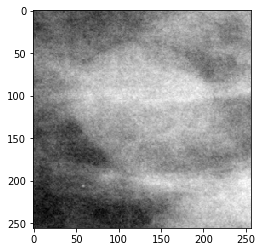

Label: 1
Label: Mass-Training_P_00419_LEFT_MLO.png


In [412]:
import matplotlib.pyplot as plt

idx = 562

plt.imshow(X_train[idx][:,:,0], cmap='gray')
plt.show()

print("Label: " + str(train_mass_labels2_num[idx]))
print("Label: " + train_mass_FN[idx])

#### 데이터 불러오기

In [413]:
train_mass_crop = np.load(os.path.join("../npy_final", "train_mass_crop.npy"))
train_mass_Label1 = np.load(os.path.join("../npy_final", "train_mass_Label1.npy"))
train_mass_Label2 = np.load(os.path.join("../npy_final", "train_mass_Label2.npy"))
train_mass_Label3 = np.load(os.path.join("../npy_final", "train_mass_Label3.npy"))
train_mass_FN = np.load(os.path.join("../npy_final", "train_mass_FN.npy"))

train_calc_crop = np.load(os.path.join("../npy_final", "train_calc_crop.npy"))
train_calc_Label1 = np.load(os.path.join("../npy_final", "train_calc_Label1.npy"))
train_calc_Label2 = np.load(os.path.join("../npy_final", "train_calc_Label2.npy"))
train_calc_Label3 = np.load(os.path.join("../npy_final", "train_calc_Label3.npy"))
train_calc_FN = np.load(os.path.join("../npy_final", "train_calc_FN.npy"))

test_mass_crop = np.load(os.path.join("../npy_final", "test_mass_crop.npy"))
test_mass_Label1 = np.load(os.path.join("../npy_final", "test_mass_Label1.npy"))
test_mass_Label2 = np.load(os.path.join("../npy_final", "test_mass_Label2.npy"))
test_mass_Label3 = np.load(os.path.join("../npy_final", "test_mass_Label3.npy"))
test_mass_FN = np.load(os.path.join("../npy_final", "test_mass_FN.npy"))

test_calc_crop = np.load(os.path.join("../npy_final", "test_calc_crop.npy"))
test_calc_Label1 = np.load(os.path.join("../npy_final", "test_calc_Label1.npy"))
test_calc_Label2 = np.load(os.path.join("../npy_final", "test_calc_Label2.npy"))
test_calc_Label3 = np.load(os.path.join("../npy_final", "test_calc_Label3.npy"))
test_calc_FN = np.load(os.path.join("../npy_final", "test_calc_FN.npy"))

#### 데이터 합치기

In [414]:
train_crop= np.concatenate([train_mass_crop, train_calc_crop], axis=0)
train_Label1 = np.concatenate([train_mass_Label1, train_calc_Label1], axis=0)
train_Label2 = np.concatenate([train_mass_Label2, train_calc_Label2], axis=0)
train_Label3 = np.concatenate([train_mass_Label3, train_calc_Label3], axis=0)
train_FN = np.concatenate([train_mass_FN, train_calc_FN], axis=0)

test_crop = np.concatenate([test_mass_crop, test_calc_crop], axis=0)
test_Label1 = np.concatenate([test_mass_Label1, test_calc_Label1], axis=0)
test_Label2 = np.concatenate([test_mass_Label2, test_calc_Label2], axis=0)
test_Label3 = np.concatenate([test_mass_Label3, test_calc_Label3], axis=0)
test_FN = np.concatenate([test_mass_FN, test_calc_FN], axis=0)

In [415]:
np.save(os.path.join("../combine_final", "combine_train_patch.npy"), train_crop)
np.save(os.path.join("../combine_final", "combine_train_Label1.npy"), train_Label1)
np.save(os.path.join("../combine_final", "combine_train_Label2.npy"), train_Label2)
np.save(os.path.join("../combine_final", "combine_train_Label3.npy"), train_Label3)
np.save(os.path.join("../combine_final", "combine_train_FN.npy"), train_FN)

np.save(os.path.join("../combine_final", "combine_test_patch.npy"), test_crop)
np.save(os.path.join("../combine_final", "combine_test_Label1.npy"), test_Label1)
np.save(os.path.join("../combine_final", "combine_test_Label2.npy"), test_Label2)
np.save(os.path.join("../combine_final", "combine_test_Label3.npy"), test_Label3)
np.save(os.path.join("../combine_final", "combine_test_FN.npy"), test_FN)

#### full version data 확인

In [416]:
#train data
CBIS_train_crop = np.load(os.path.join("../combine_final", "combine_train_patch.npy"))
CBIS_train_Labels1 = np.load(os.path.join("../combine_final", "combine_train_Label1.npy"))
CBIS_train_Labels2 = np.load(os.path.join("../combine_final", "combine_train_Label2.npy"))
CBIS_train_Labels3 = np.load(os.path.join("../combine_final", "combine_train_Label3.npy"))
CBIS_train_FNs = np.load(os.path.join("../combine_final", "combine_train_FN.npy"))

#test data
CBIS_test_crop = np.load(os.path.join("../combine_final", "combine_test_patch.npy"))
CBIS_test_Labels1 = np.load(os.path.join("../combine_final", "combine_test_Label1.npy"))
CBIS_test_Labels2 = np.load(os.path.join("../combine_final", "combine_test_Label2.npy"))
CBIS_test_Labels3 = np.load(os.path.join("../combine_final", "combine_test_Label3.npy"))
CBIS_test_FNs = np.load(os.path.join("../combine_final", "combine_test_FN.npy"))



print("Abnaormal train Patches:", CBIS_train_crop.shape)
print("Abnaormal train Labels:", CBIS_train_Labels1.shape)
print("Abnaormal train Labels:", CBIS_train_Labels2.shape)
print("Abnaormal train Labels:", CBIS_train_Labels3.shape)
print("Abnaormal train File Names:", CBIS_train_FNs.shape)
print("\n")
print("Abnaormal test Patches:", CBIS_test_crop.shape)
print("Abnaormal test Labels:", CBIS_test_Labels1.shape)
print("Abnaormal test Labels:", CBIS_test_Labels2.shape)
print("Abnaormal test Labels:", CBIS_test_Labels3.shape)
print("Abnaormal test File Names:", CBIS_test_FNs.shape)

Abnaormal train Patches: (2864, 256, 256, 1)
Abnaormal train Labels: (2864,)
Abnaormal train Labels: (2864,)
Abnaormal train Labels: (2864,)
Abnaormal train File Names: (2864,)


Abnaormal test Patches: (704, 256, 256, 1)
Abnaormal test Labels: (704,)
Abnaormal test Labels: (704,)
Abnaormal test Labels: (704,)
Abnaormal test File Names: (704,)


In [417]:
CBIS_test_crop.shape

(704, 256, 256, 1)

In [418]:
le = preprocessing.LabelEncoder()
le.fit(CBIS_test_Labels1)

LabelEncoder()

In [419]:
list(le.classes_)

['calcification', 'mass']

In [420]:
train_labels1_num = le.transform(CBIS_train_Labels1)
test_labels1_num = le.transform(CBIS_test_Labels1)

In [421]:
CBIS_train_Labels1

array(['mass', 'mass', 'mass', ..., 'calcification', 'calcification',
       'calcification'], dtype='<U13')

In [422]:
train_labels1_num

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [423]:
np.save(os.path.join("../Label_final_fullver", "train_labels1_num.npy"), train_labels1_num)
np.save(os.path.join("../Label_final_fullver", "test_labels1_num.npy"), test_labels1_num)

In [424]:
le.fit(CBIS_test_Labels2)
list(le.classes_)

['BENIGN', 'MALIGNANT']

In [425]:
train_labels2_num = le.transform(CBIS_train_Labels2)
test_labels2_num = le.transform(CBIS_test_Labels2)
CBIS_train_Labels2

array(['MALIGNANT', 'MALIGNANT', 'BENIGN', ..., 'MALIGNANT', 'BENIGN',
       'BENIGN'], dtype='<U9')

In [426]:
train_labels2_num

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [427]:
np.save(os.path.join("../Label_final_fullver", "train_labels2_num.npy"), train_labels2_num)
np.save(os.path.join("../Label_final_fullver", "test_labels2_num.npy"), test_labels2_num)

In [428]:
le.fit(CBIS_test_Labels3)
list(le.classes_)

['BENIGN_calcification',
 'BENIGN_mass',
 'MALIGNANT_calcification',
 'MALIGNANT_mass']

In [429]:
train_labels3_num = le.transform(CBIS_train_Labels3)
test_labels3_num = le.transform(CBIS_test_Labels3)
CBIS_train_Labels3

array(['MALIGNANT_mass', 'MALIGNANT_mass', 'BENIGN_mass', ...,
       'MALIGNANT_calcification', 'BENIGN_calcification',
       'BENIGN_calcification'], dtype='<U23')

In [430]:
np.save(os.path.join("../Label_final_fullver", "train_labels3_num.npy"), train_labels3_num)
np.save(os.path.join("../Label_final_fullver", "test_labels3_num.npy"), test_labels3_num)

#### data 셔플

In [431]:
X_train, CBIS_train_Labels1, CBIS_train_Labels2, CBIS_train_Labels3, train_labels1_num, train_labels2_num, train_labels3_num, CBIS_train_FNs = shuffle(CBIS_train_crop, CBIS_train_Labels1, CBIS_train_Labels2, CBIS_train_Labels3, train_labels1_num, train_labels2_num, train_labels3_num, CBIS_train_FNs, random_state=32421354)
X_test, CBIS_test_Labels1, CBIS_test_Labels2, CBIS_test_Labels3, test_labels1_num, test_labels2_num, test_labels3_num, CBIS_test_FNs = shuffle(CBIS_test_crop, CBIS_test_Labels1, CBIS_test_Labels2, CBIS_test_Labels3, test_labels1_num, test_labels2_num, test_labels3_num, CBIS_test_FNs, random_state=87653158)

In [432]:
train_labels1_num

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [433]:
len(X_train)

2864

In [434]:
np.save(os.path.join("../Data_final_fullver", 'X_train.npy'), X_train)
np.save(os.path.join("../Data_final_fullver", 'CBIS_train_Labels1.npy'), CBIS_train_Labels1)
np.save(os.path.join("../Data_final_fullver", 'CBIS_train_Labels2.npy'), CBIS_train_Labels2)
np.save(os.path.join("../Data_final_fullver", 'CBIS_train_Labels3.npy'), CBIS_train_Labels3)
np.save(os.path.join("../Data_final_fullver", 'train_labels1_num.npy'), train_labels1_num)
np.save(os.path.join("../Data_final_fullver", 'train_labels2_num.npy'), train_labels2_num)
np.save(os.path.join("../Data_final_fullver", 'train_labels3_num.npy'), train_labels3_num)
np.save(os.path.join("../Data_final_fullver", 'CBIS_train_FNs.npy'), CBIS_train_FNs)

np.save(os.path.join("../Data_final_fullver", 'X_test.npy'), X_test)
np.save(os.path.join("../Data_final_fullver", 'CBIS_test_Labels1.npy'), CBIS_test_Labels1)
np.save(os.path.join("../Data_final_fullver", 'CBIS_test_Labels2.npy'), CBIS_test_Labels2)
np.save(os.path.join("../Data_final_fullver", 'CBIS_test_Labels3.npy'), CBIS_test_Labels3)
np.save(os.path.join("../Data_final_fullver", 'test_labels1_num.npy'), test_labels1_num)
np.save(os.path.join("../Data_final_fullver", 'test_labels2_num.npy'), test_labels2_num)
np.save(os.path.join("../Data_final_fullver", 'test_labels3_num.npy'), test_labels3_num)
np.save(os.path.join("../Data_final_fullver", 'CBIS_test_FNs.npy'), CBIS_test_FNs)

In [435]:
CBIS_test_FNs[524]

'Calc-Test_P_01820_LEFT_MLO.png'

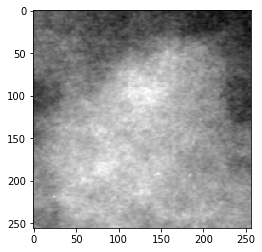

Label: 1
Label: Mass-Training_P_00845_RIGHT_CC.png


In [436]:
import matplotlib.pyplot as plt

idx = 54

plt.imshow(X_train[idx][:,:,0], cmap='gray')
plt.show()

print("Label: " + str(train_labels1_num[idx]))
print("Label: " + CBIS_train_FNs[idx])